In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import scipy
from scipy import stats
import math

In [2]:
#reading data into notebook
train_identity = pd.read_csv(r'train_identity.csv')
test_identity = pd.read_csv(r'test_identity.csv')
test_transaction = pd.read_csv(r'test_transaction.csv')
train_transaction = pd.read_csv(r'train_transaction.csv')

#print features
print("Features in train_identity:\n", train_identity.columns.tolist())
print(train_identity.dtypes)
print("\nFeatures in train_transaction:\n", train_transaction.columns.tolist())
print(train_transaction.dtypes)
print("\nFeatures in test_identity:\n", test_identity.columns.tolist())
print(test_identity.dtypes)
print("\nFeatures in test_transaction:\n", test_transaction.columns.tolist())
print(test_transaction.dtypes)

Features in train_identity:
 ['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23   

In [3]:
#print null values
missing_train_identity = train_identity.isnull().sum()
missing_train_transaction = train_transaction.isnull().sum()
print("Missing values in train_identity: \n", missing_train_identity[missing_train_identity > 100000])
print("\nMissing values in train_transaction:\n", missing_train_transaction[missing_train_transaction > 500000])

Missing values in train_identity: 
 id_07    139078
id_08    139078
id_21    139074
id_22    139064
id_23    139064
id_24    139486
id_25    139101
id_26    139070
id_27    139064
dtype: int64

Missing values in train_transaction:
 dist2    552913
D6       517353
D7       551623
D8       515614
D9       515614
D12      525823
D13      528588
D14      528353
V138     508595
V139     508595
V140     508595
V141     508595
V142     508595
V143     508589
V144     508589
V145     508589
V146     508595
V147     508595
V148     508595
V149     508595
V150     508589
V151     508589
V152     508589
V153     508595
V154     508595
V155     508595
V156     508595
V157     508595
V158     508595
V159     508589
V160     508589
V161     508595
V162     508595
V163     508595
V164     508589
V165     508589
V166     508589
V322     508189
V323     508189
V324     508189
V325     508189
V326     508189
V327     508189
V328     508189
V329     508189
V330     508189
V331     508189
V332     508189


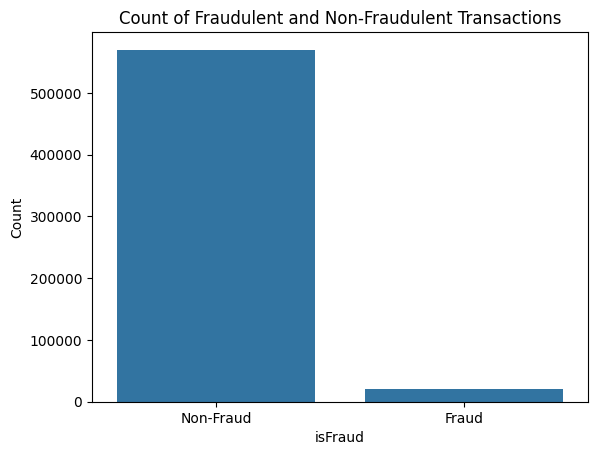

In [4]:
#Counts of Transactions Flagged Fraudulent
fraud_counts = train_transaction['isFraud'].value_counts()
sns.barplot(x=fraud_counts.index.map({0:"Non-Fraud", 1:"Fraud"}), y=fraud_counts.values)
plt.ylabel('Count')
plt.title('Count of Fraudulent and Non-Fraudulent Transactions')
plt.show()

In [5]:
#Correlation between transaction amount and fraudulent classification of transactions.
correlation = train_transaction['TransactionAmt'].corr(train_transaction['isFraud'])
print(correlation)

0.01131982533321524


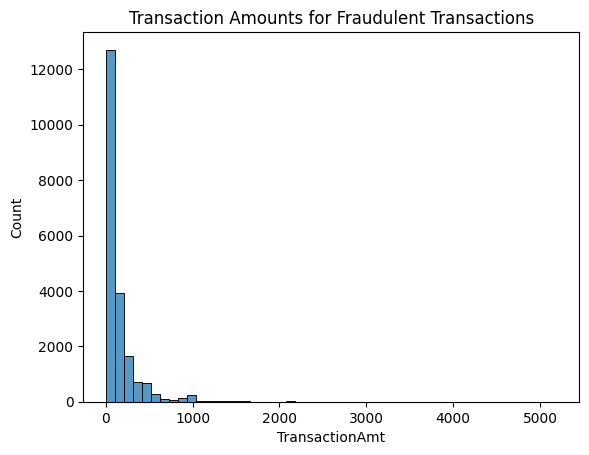

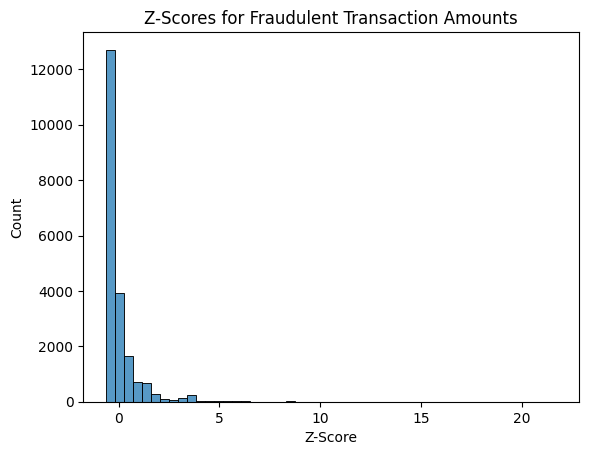

In [6]:
#Z-Test between isFraud and transactionAmt, Outlier Detection
fraudulent_transactions = train_transaction[train_transaction['isFraud']==1]
transaction_amounts = fraudulent_transactions['TransactionAmt']
z_scores = stats.zscore(transaction_amounts)

outliers = fraudulent_transactions[(z_scores > 3)|(z_scores < -3)]

sns.histplot(transaction_amounts, bins=50)
plt.title('Transaction Amounts for Fraudulent Transactions')
plt.show()

sns.histplot(z_scores, bins=50)
plt.title('Z-Scores for Fraudulent Transaction Amounts')
plt.xlabel('Z-Score')
plt.show()

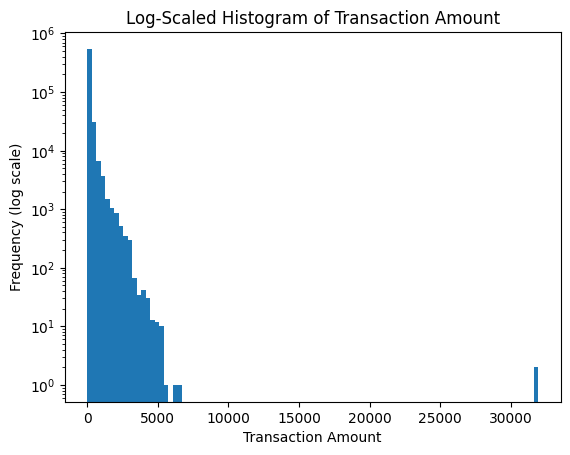

Fraud Ratio in Long-Tail Transactions: 0.024109200496365894


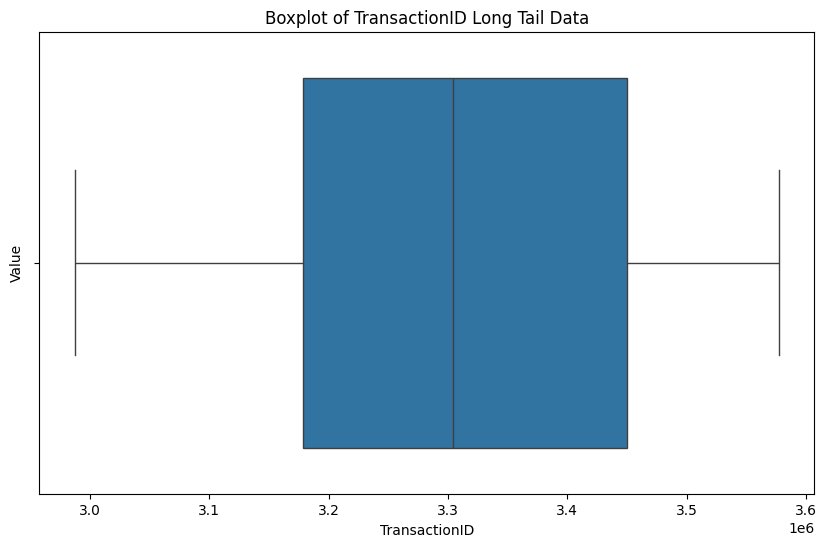

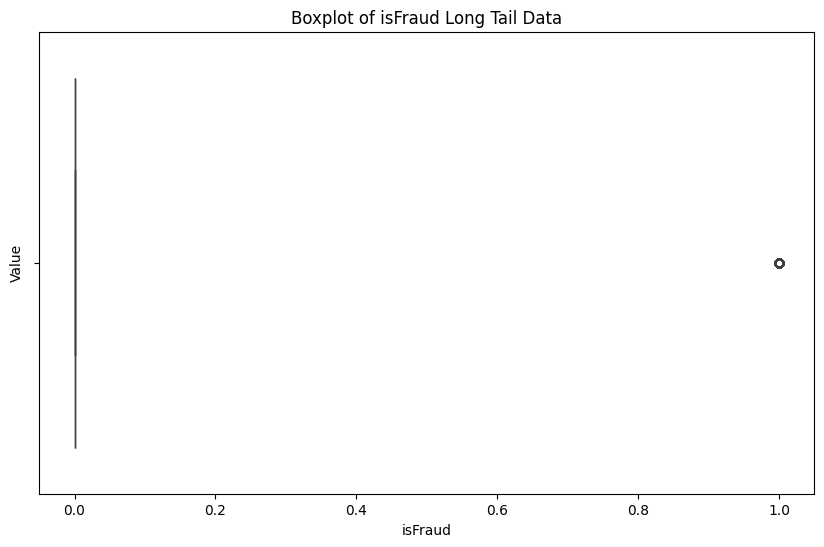

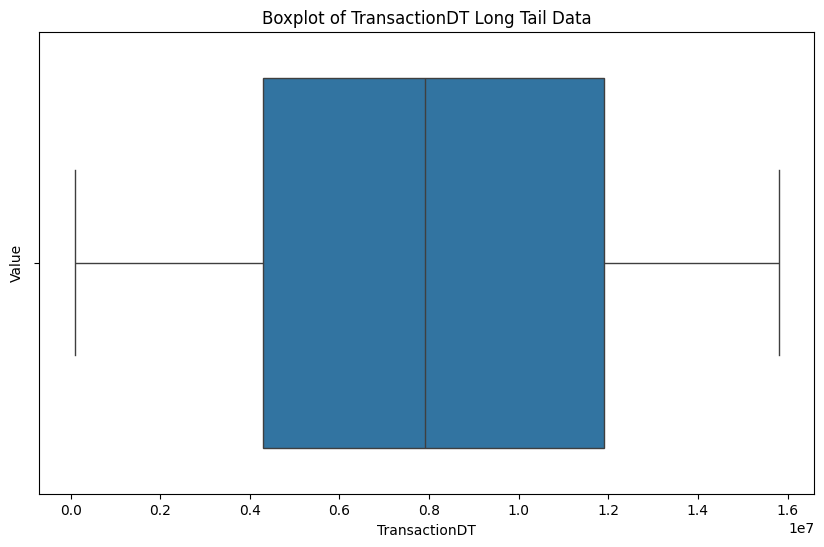

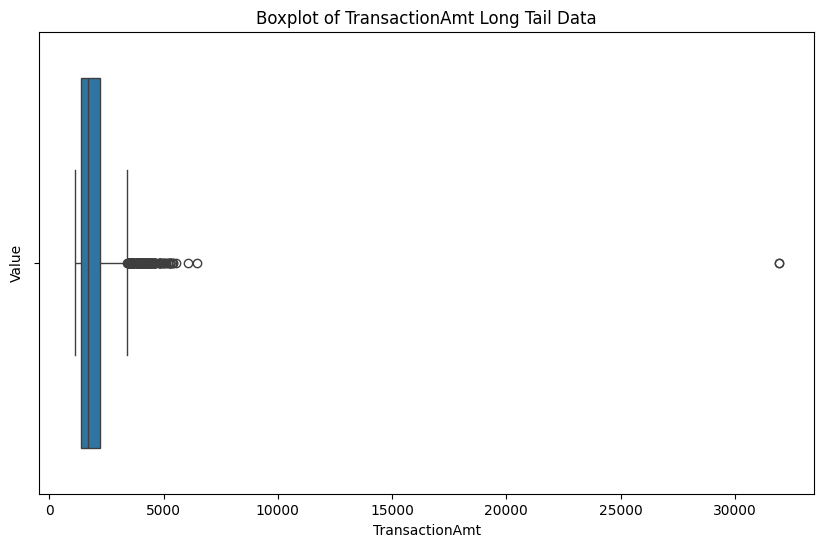

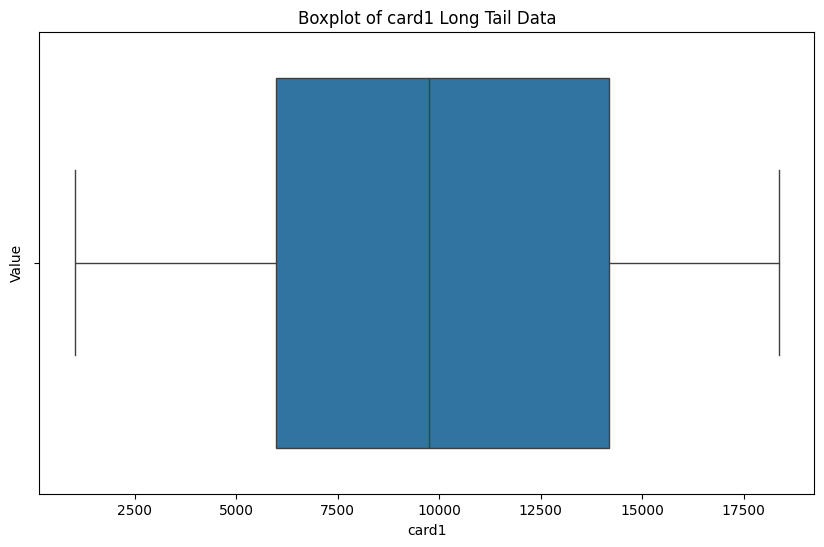

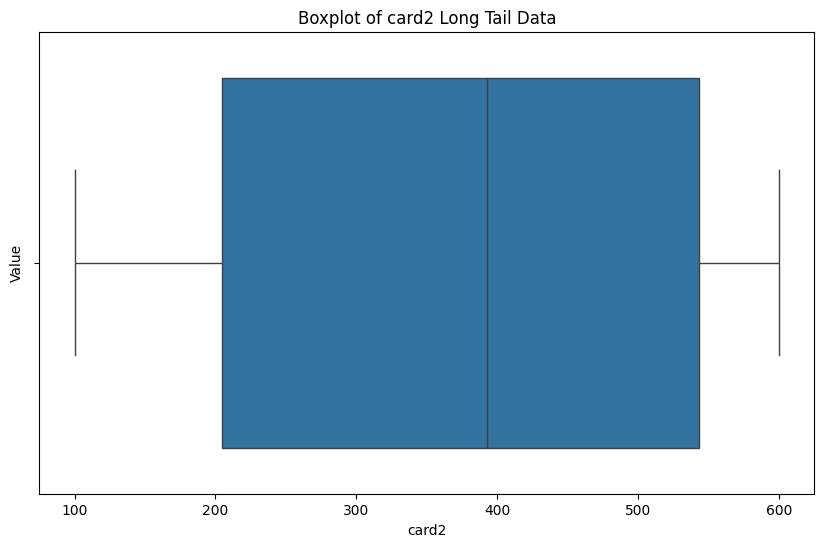

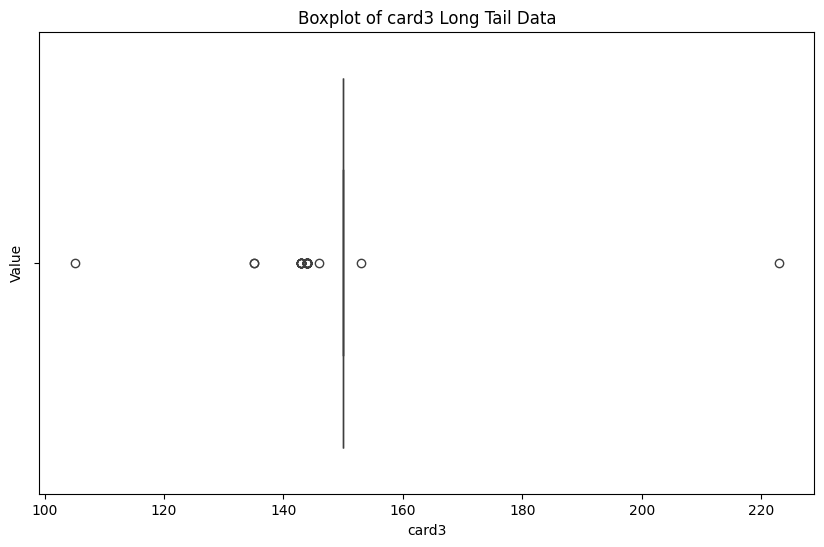

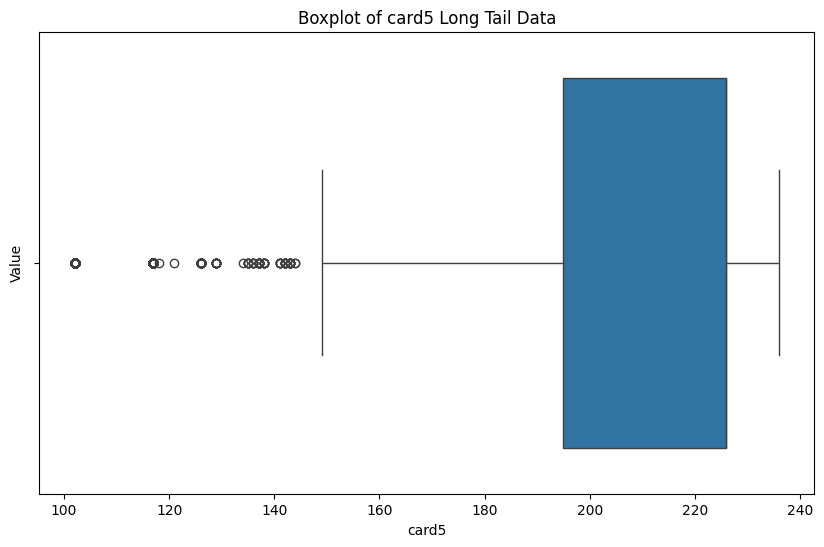

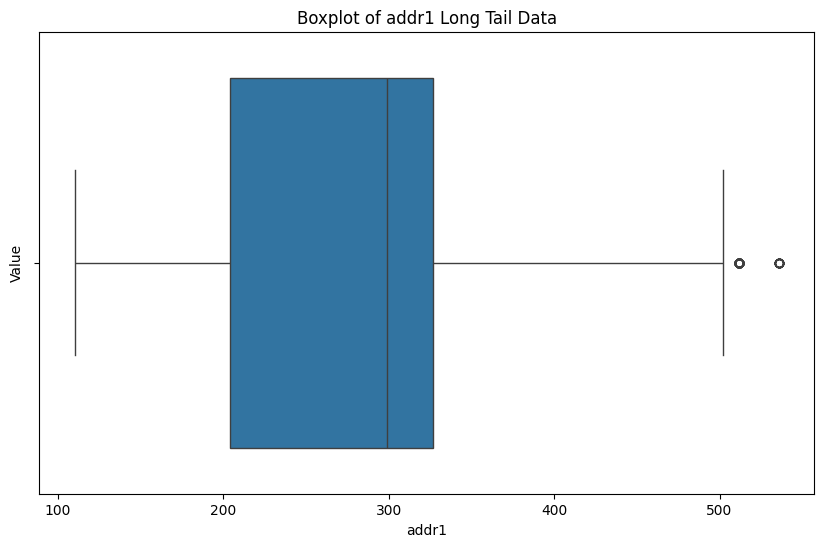

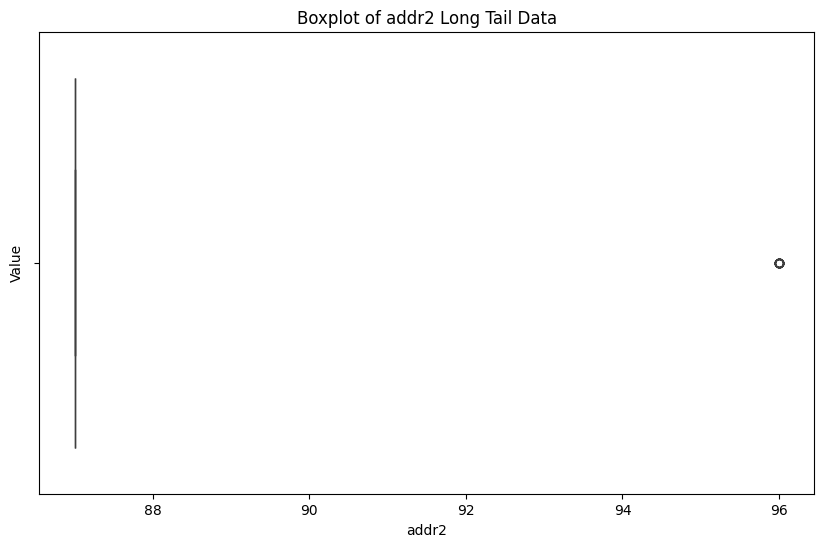

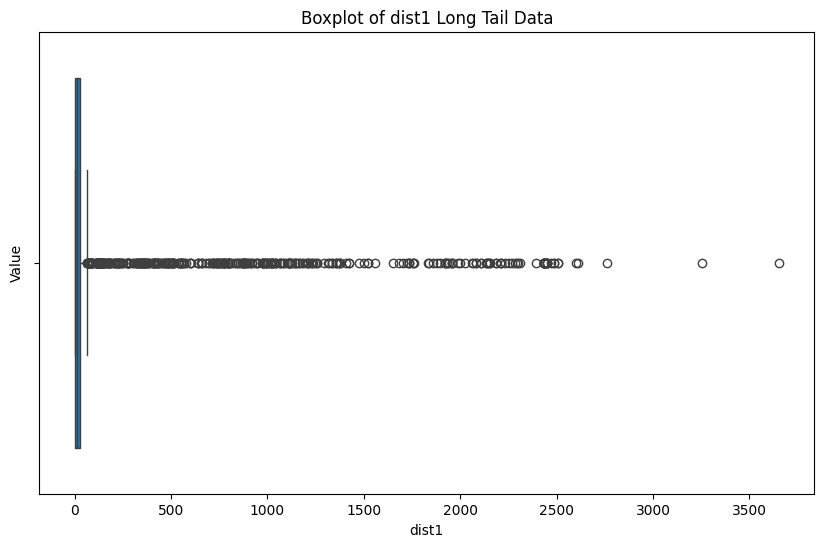

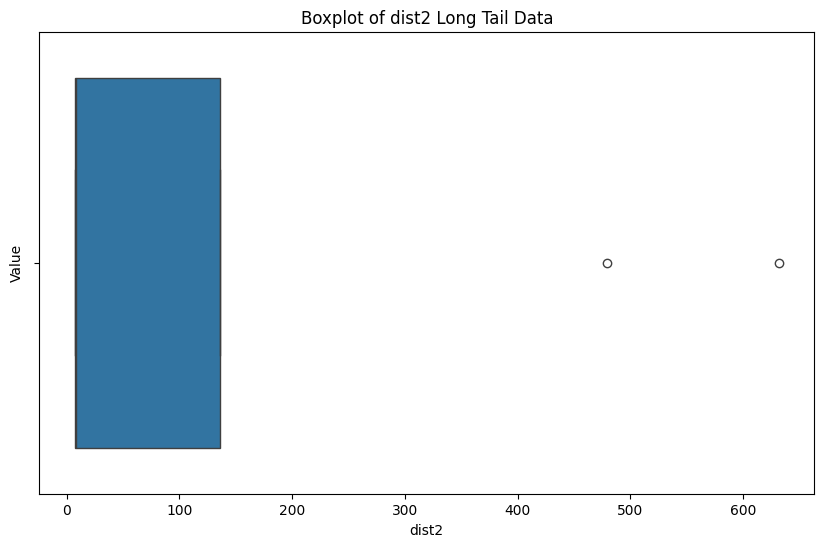

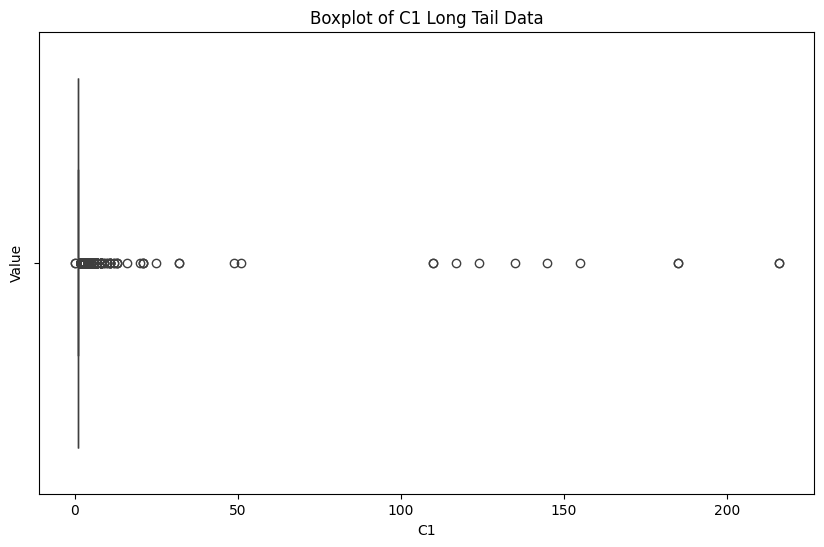

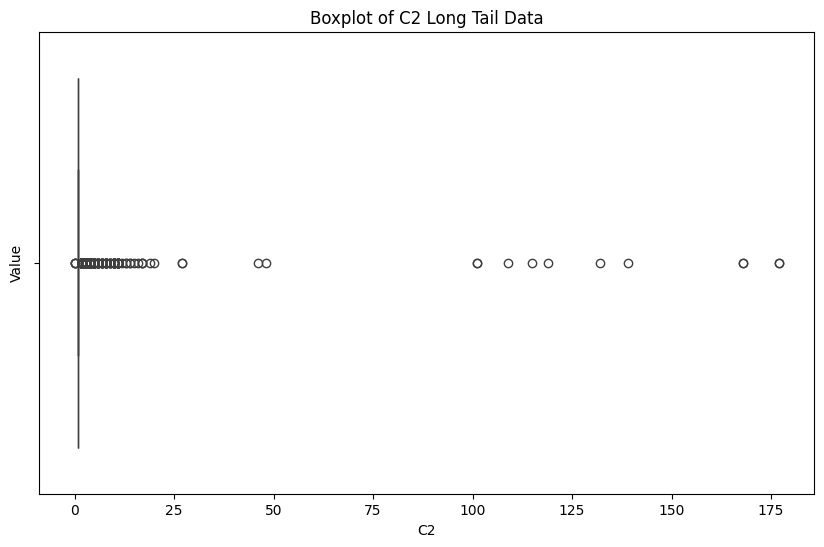

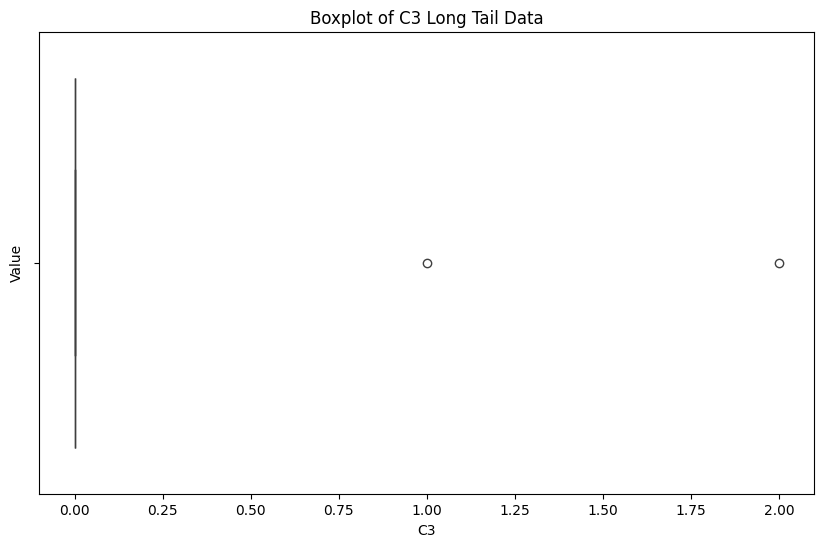

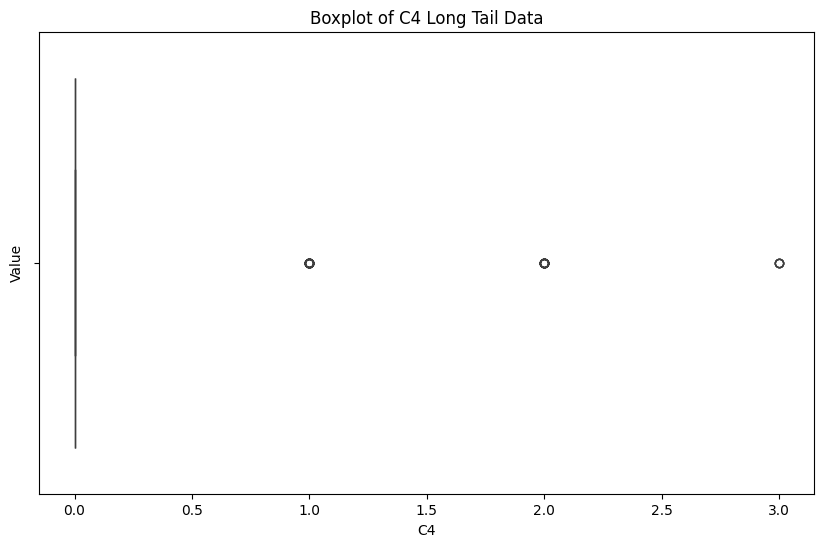

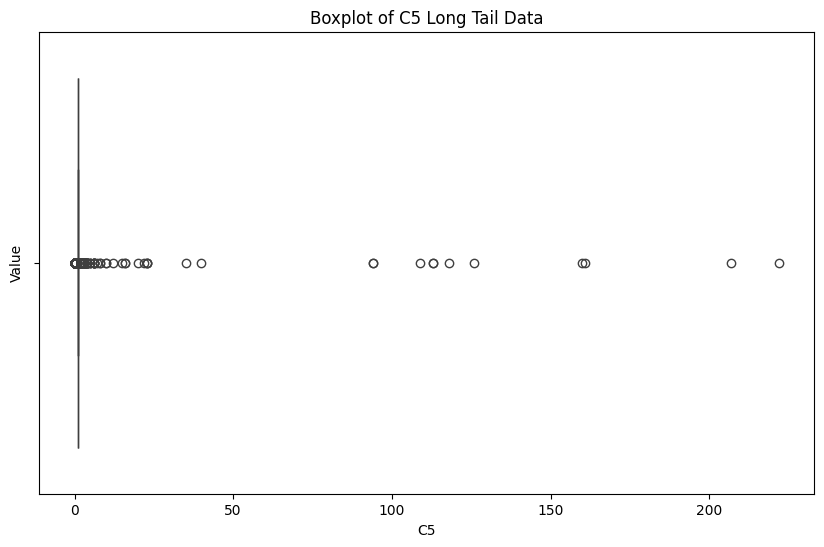

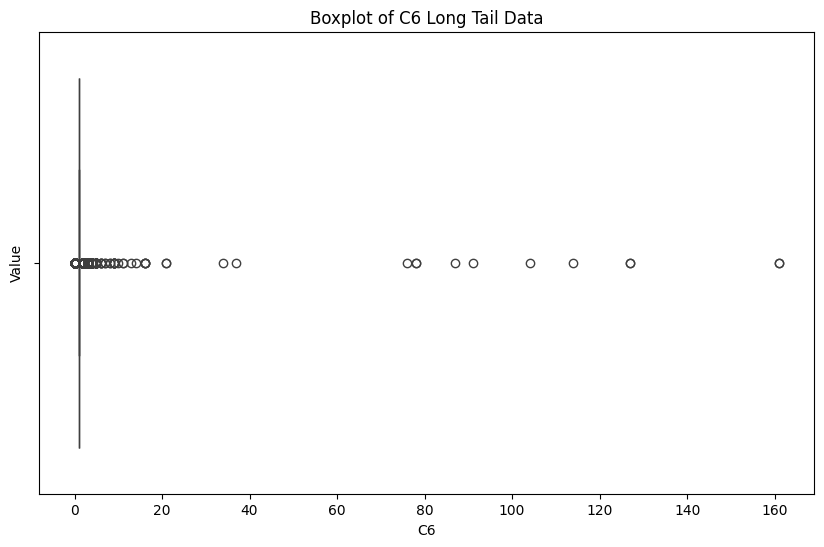

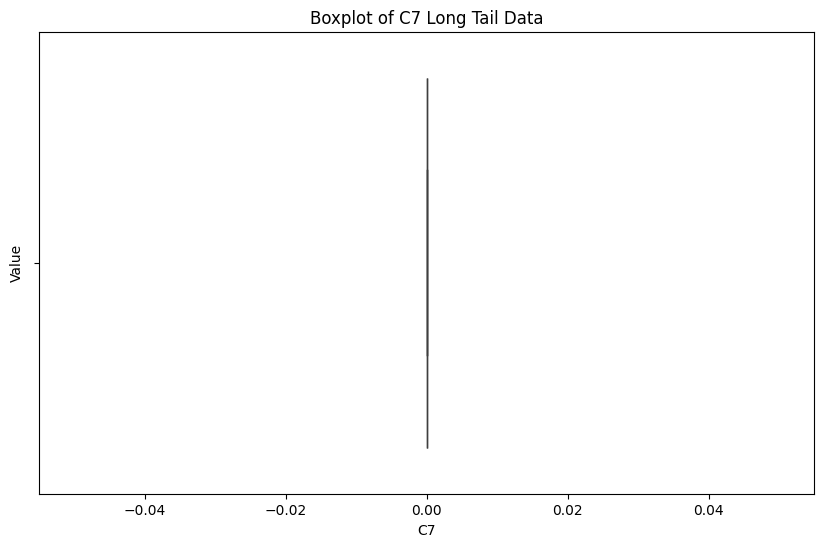

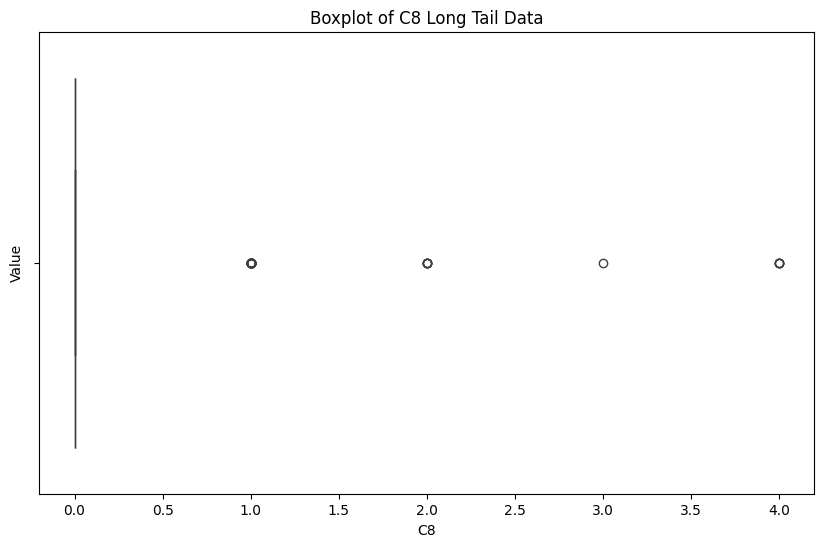

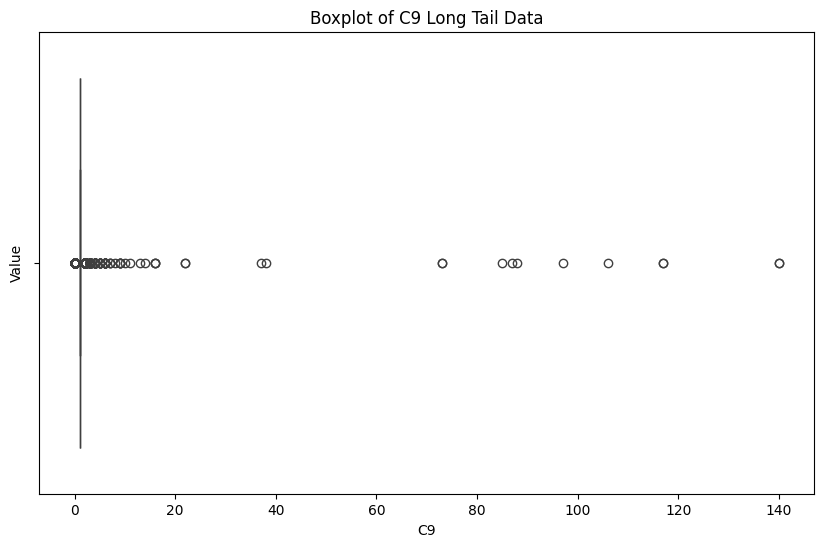

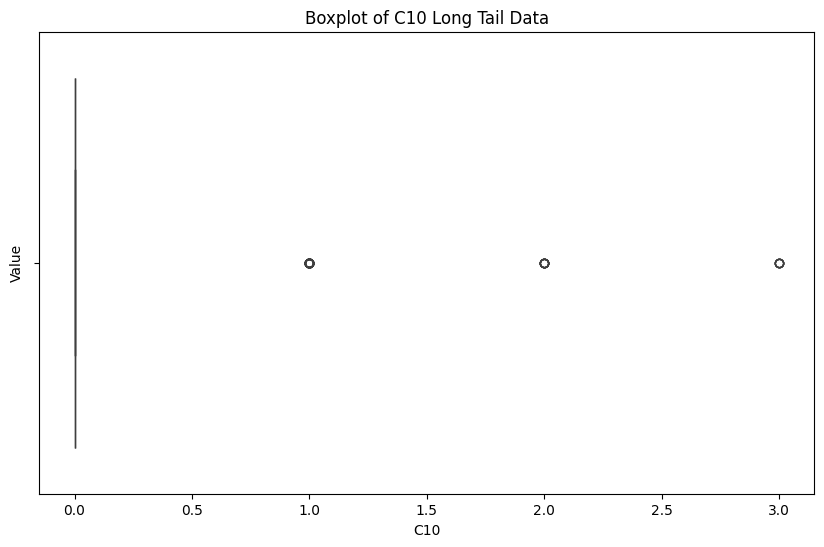

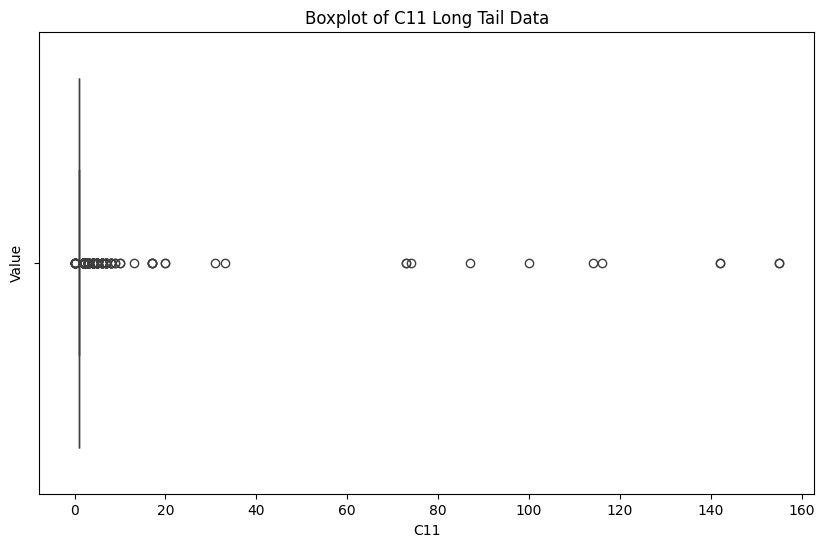

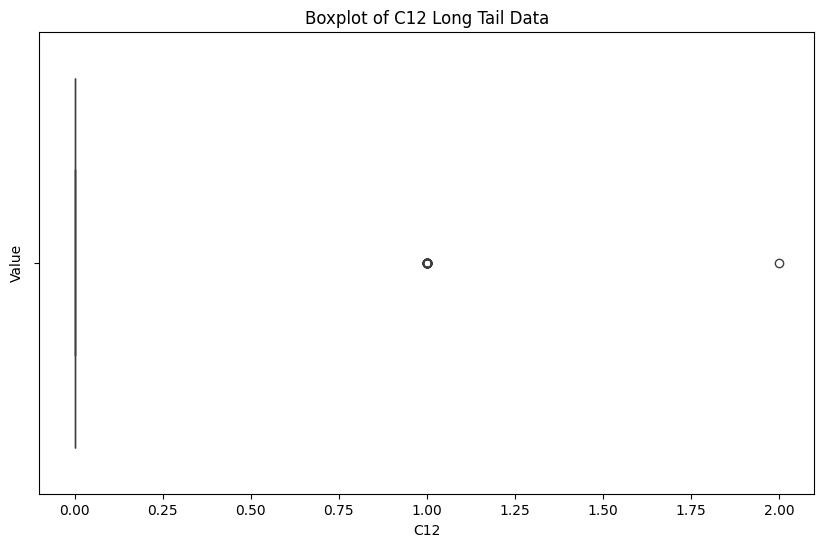

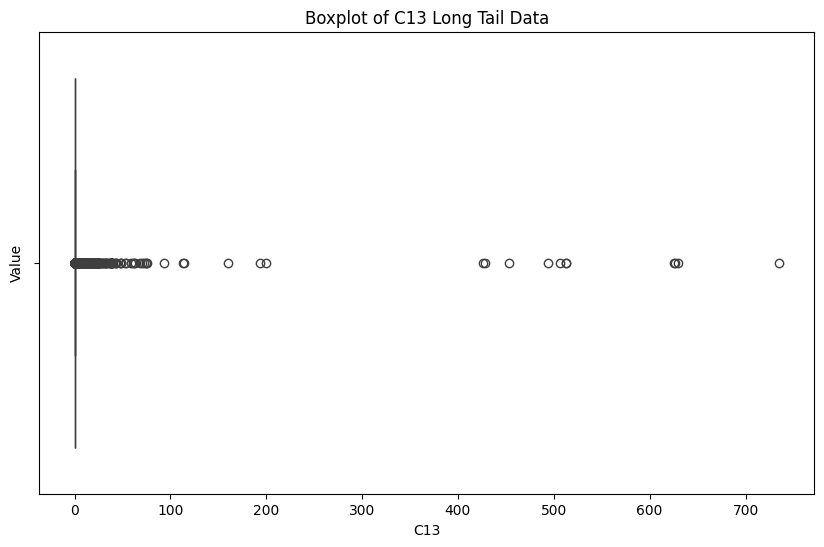

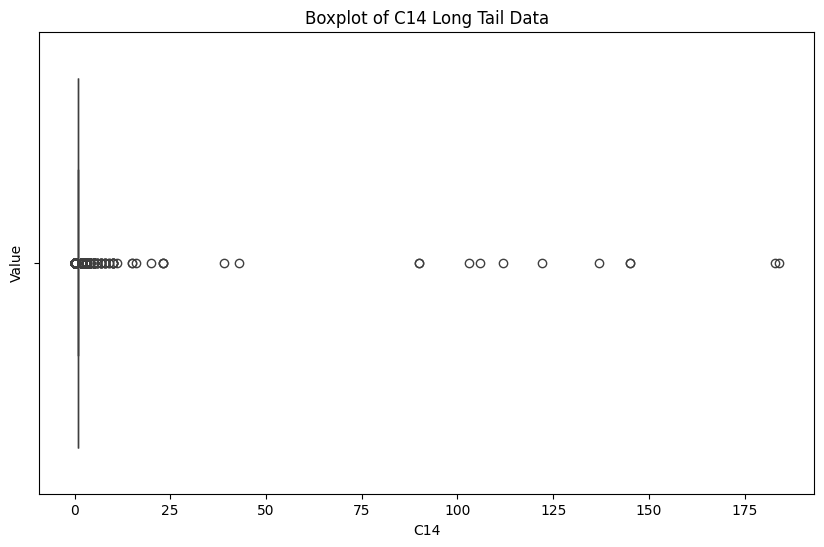

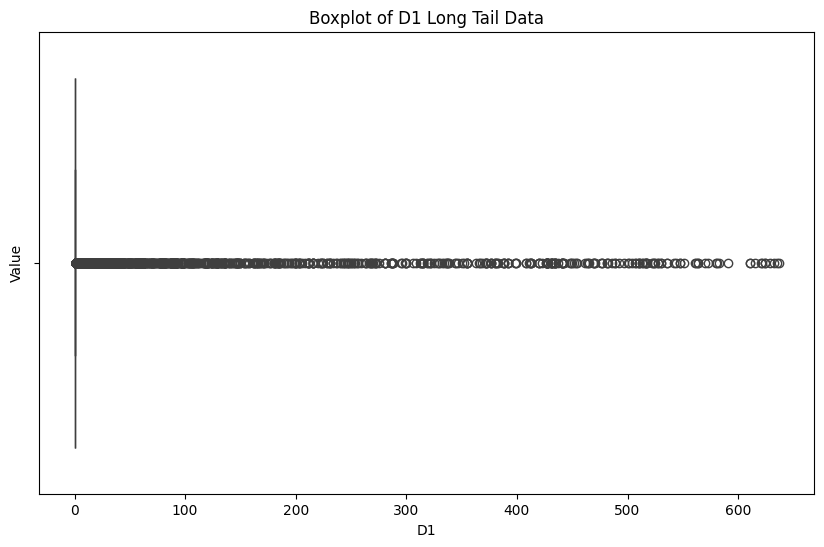

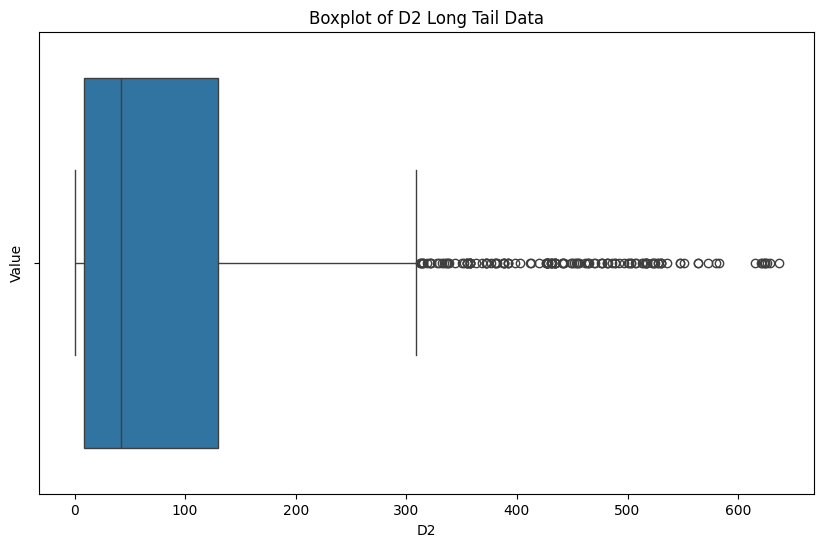

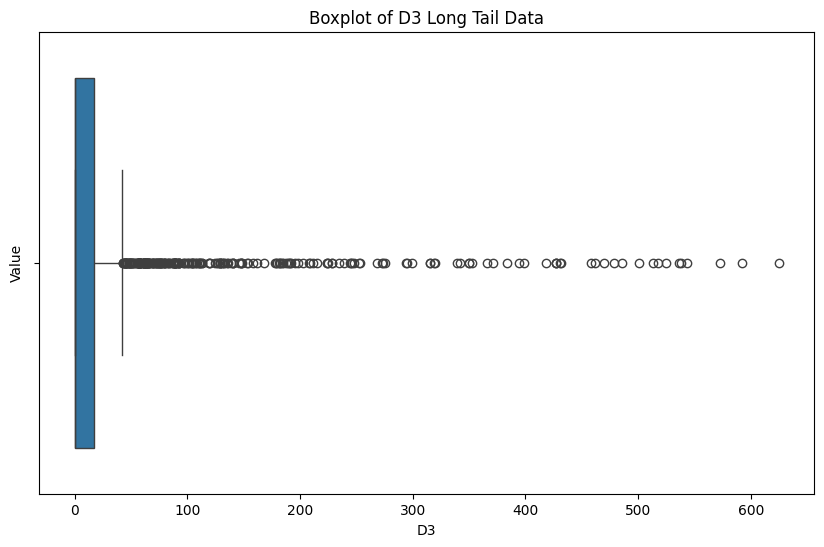

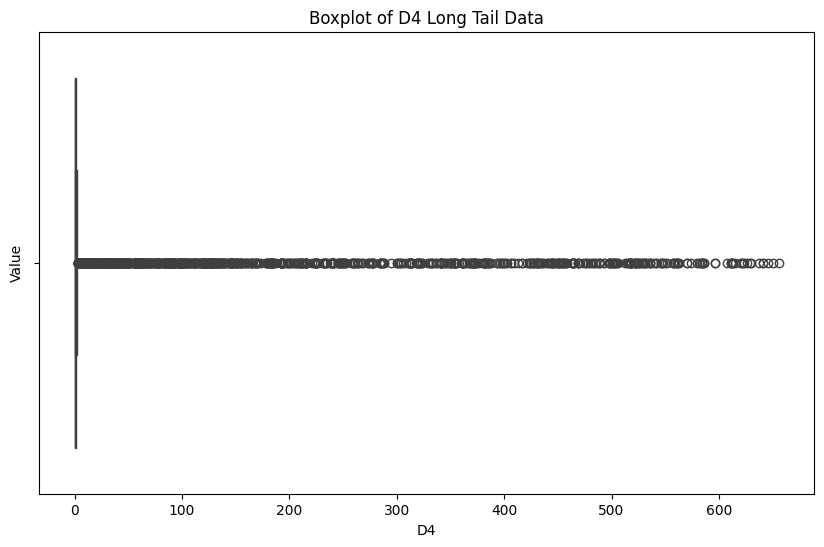

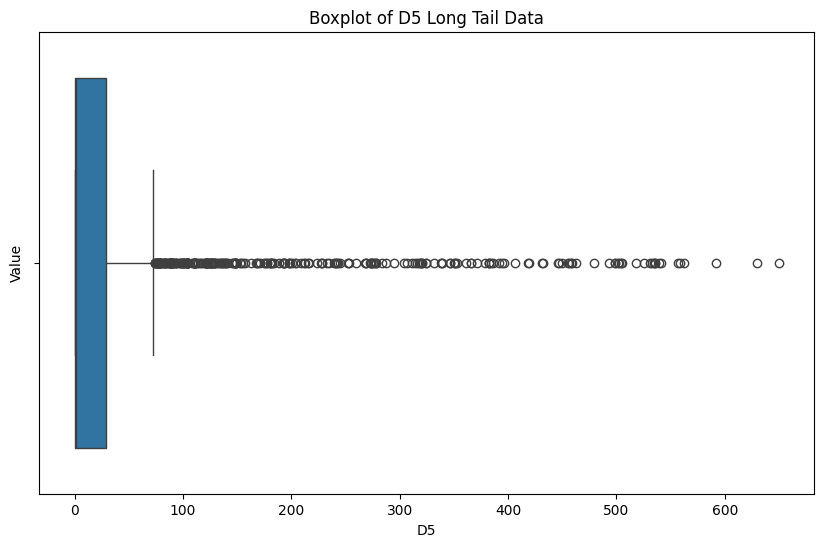

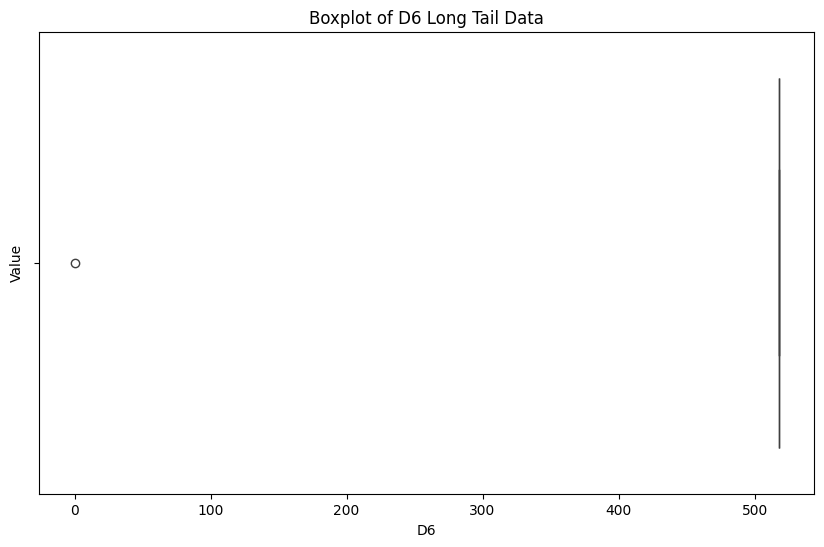

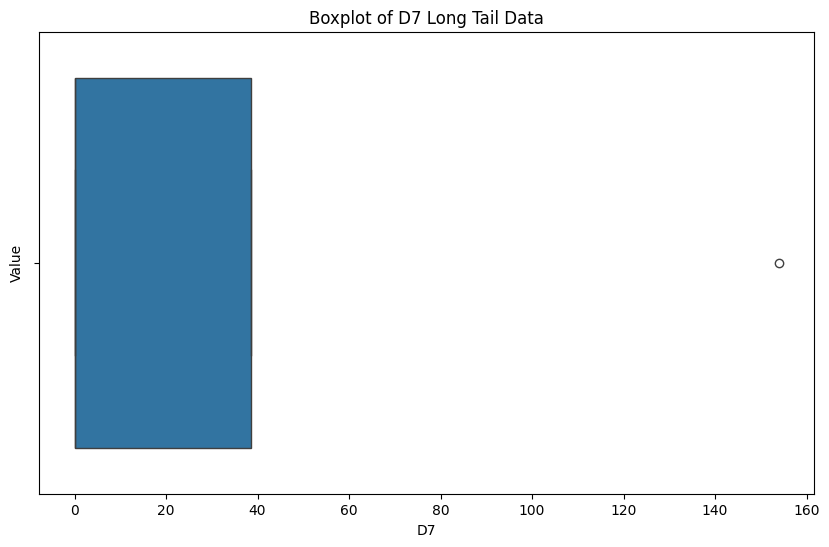

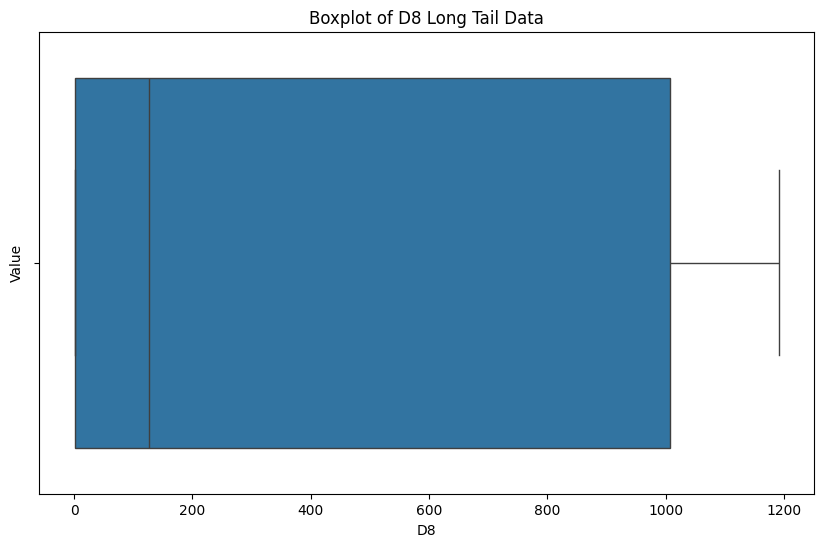

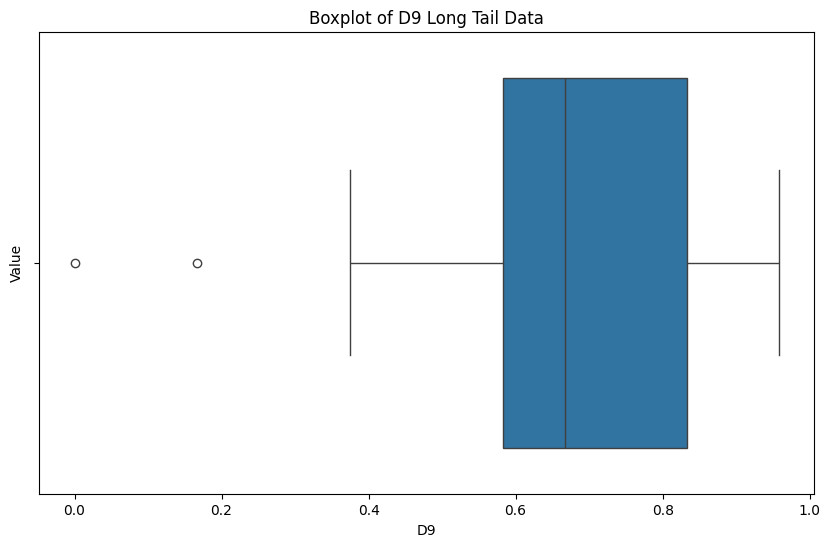

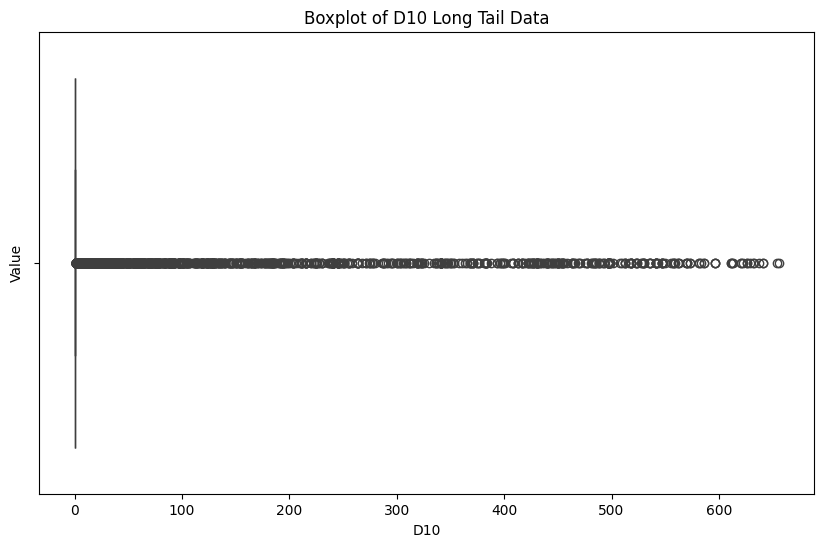

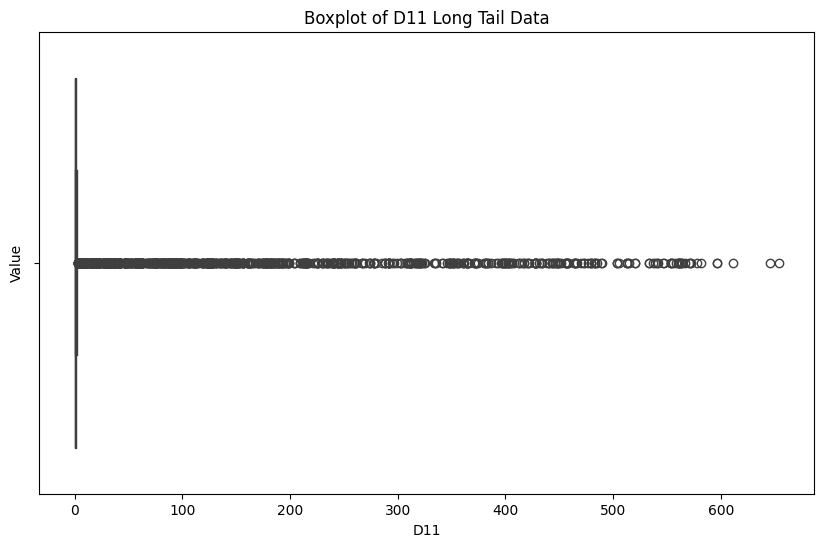

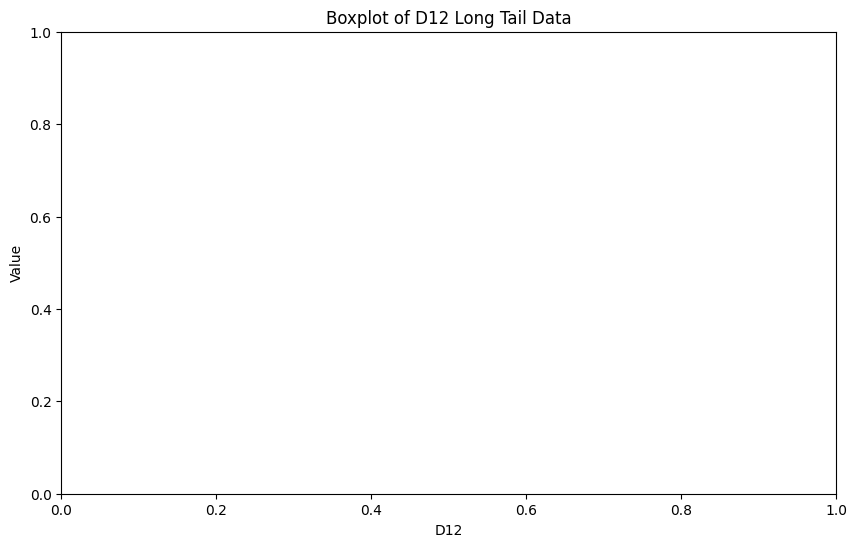

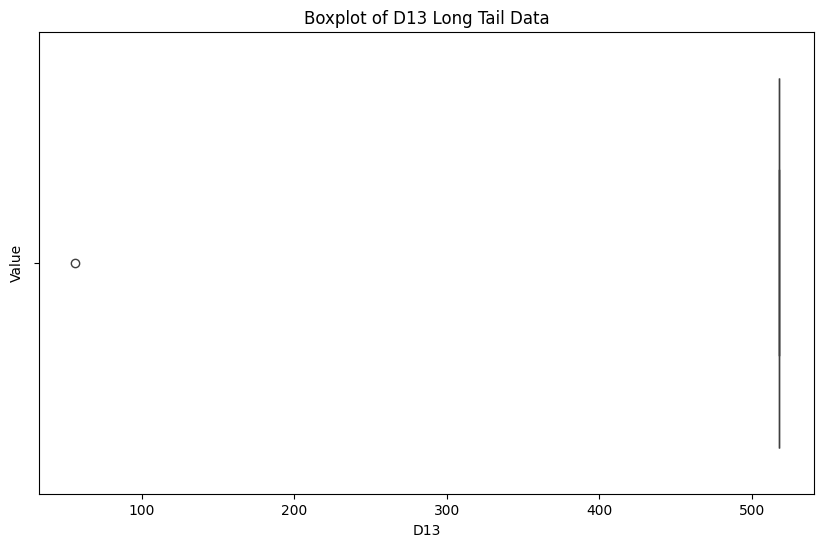

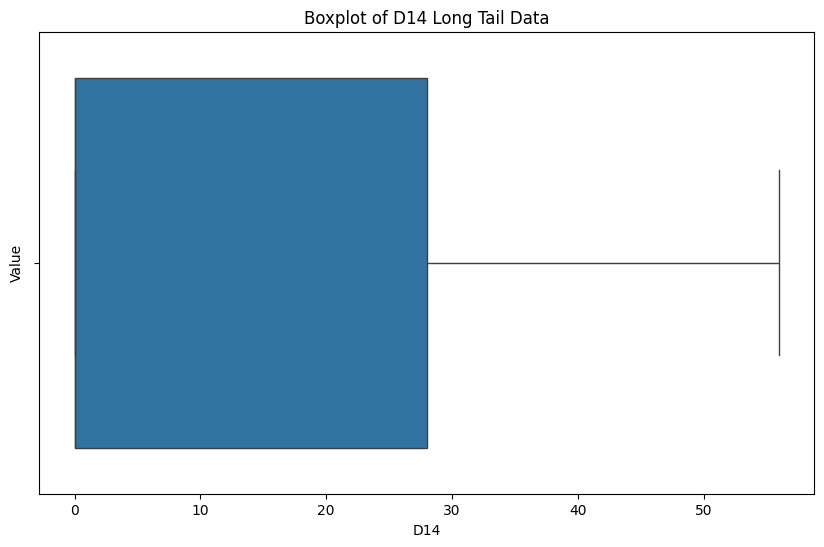

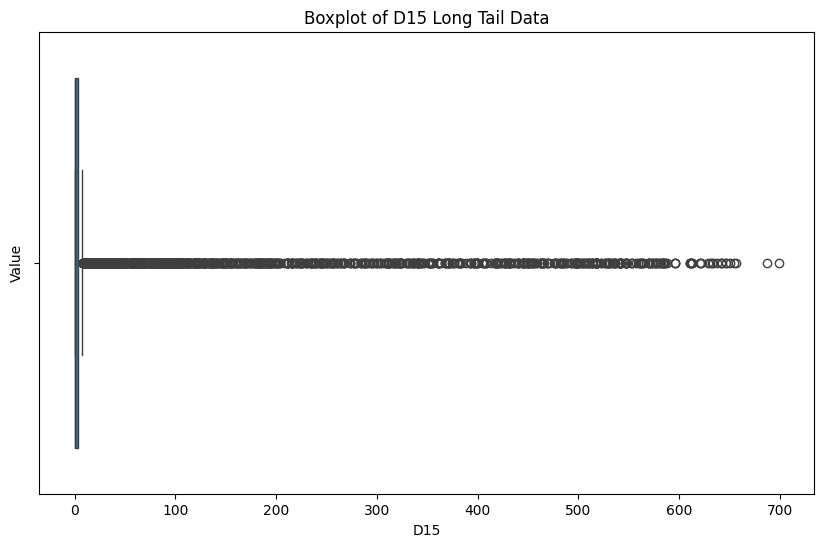

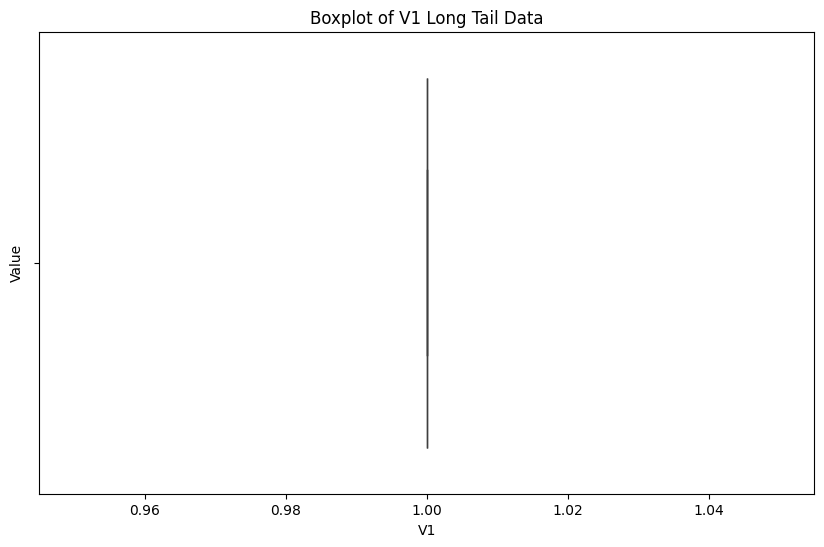

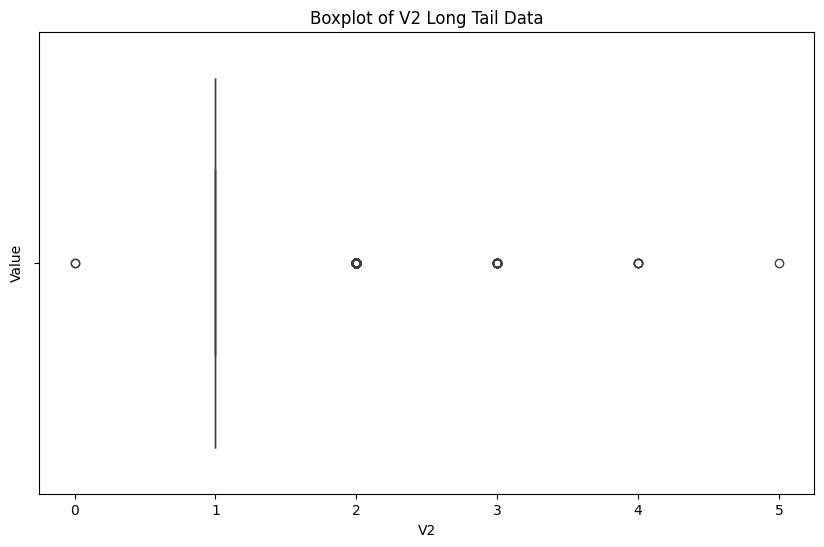

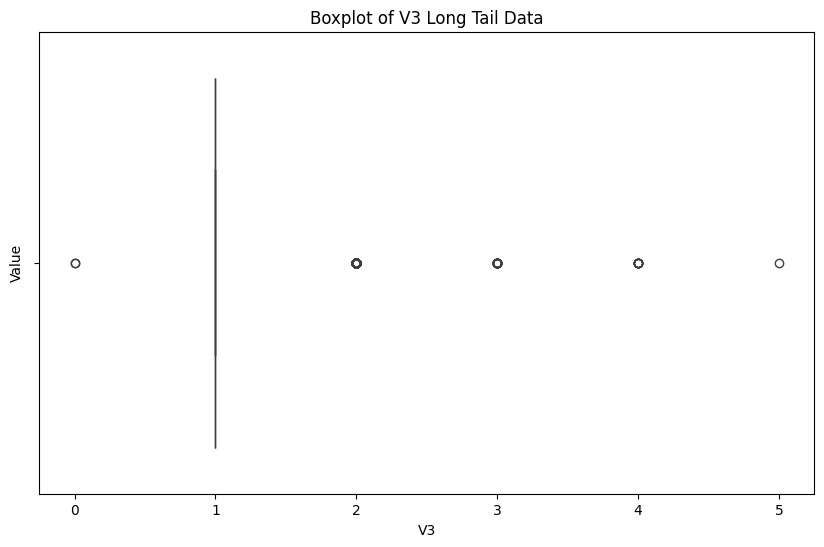

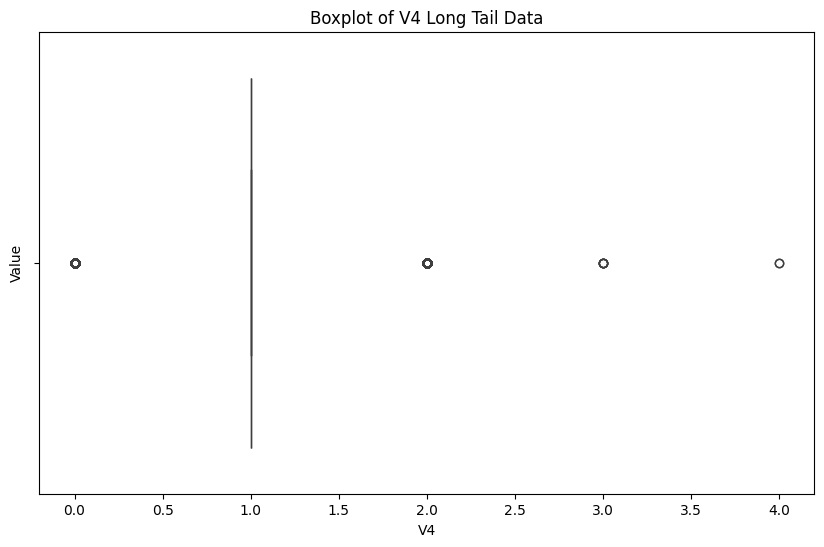

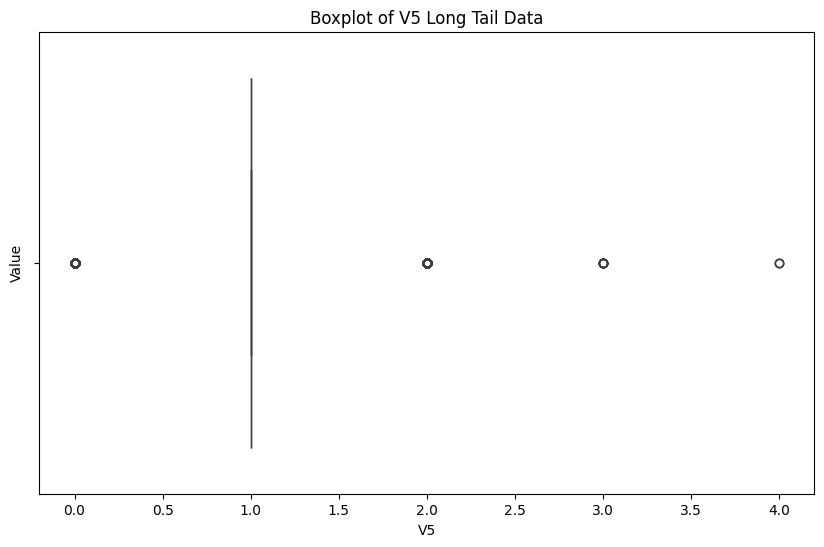

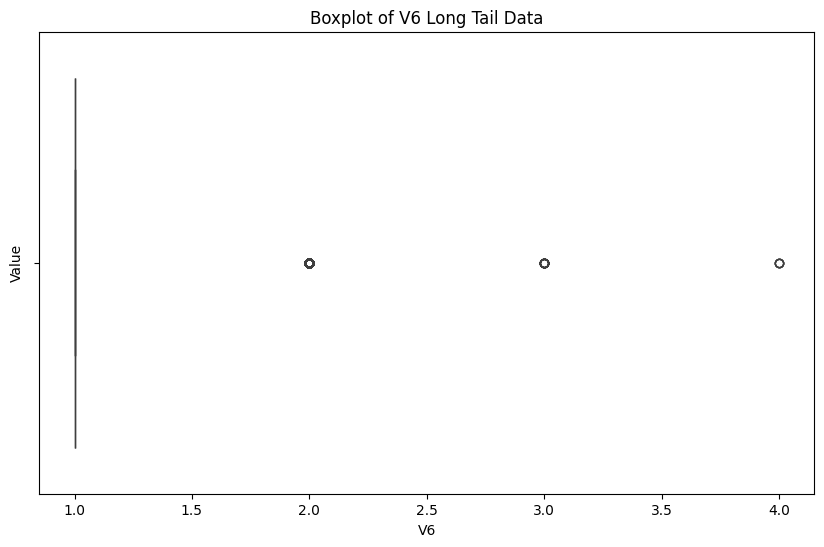

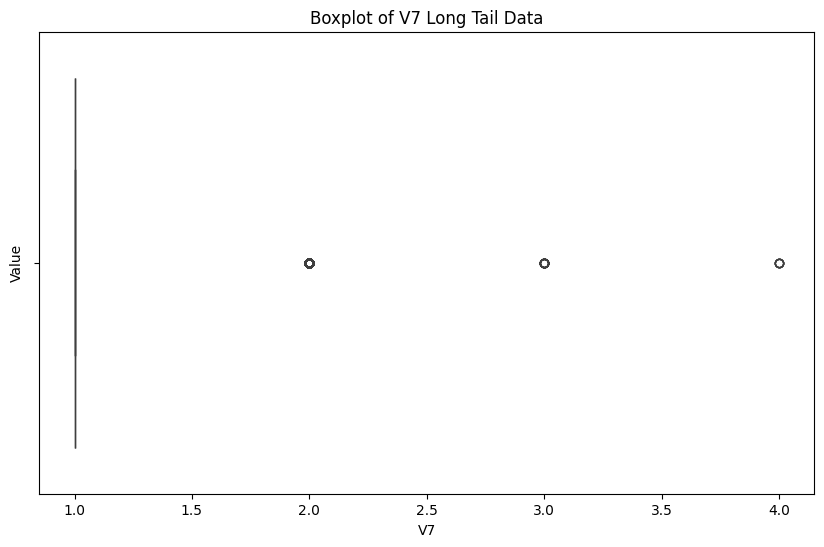

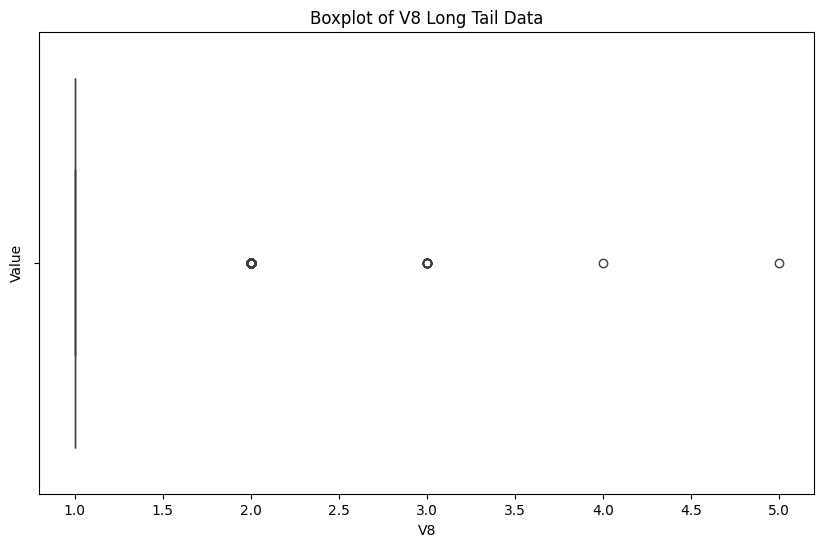

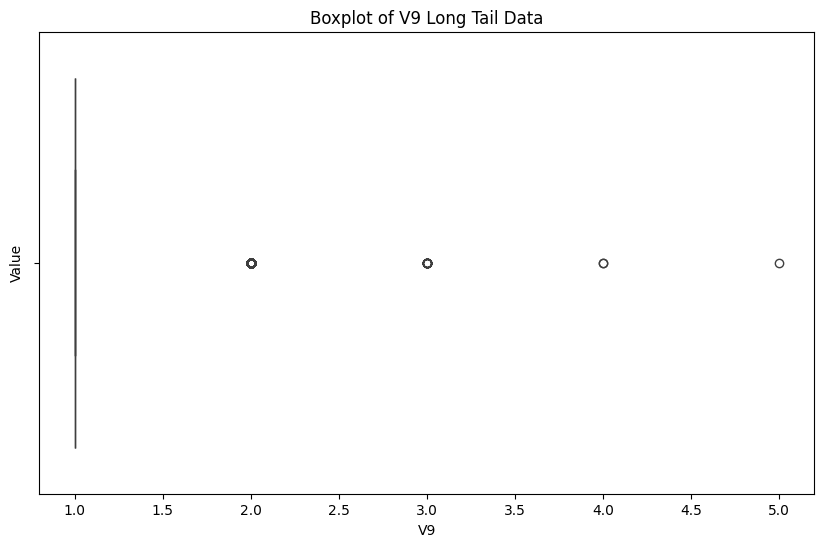

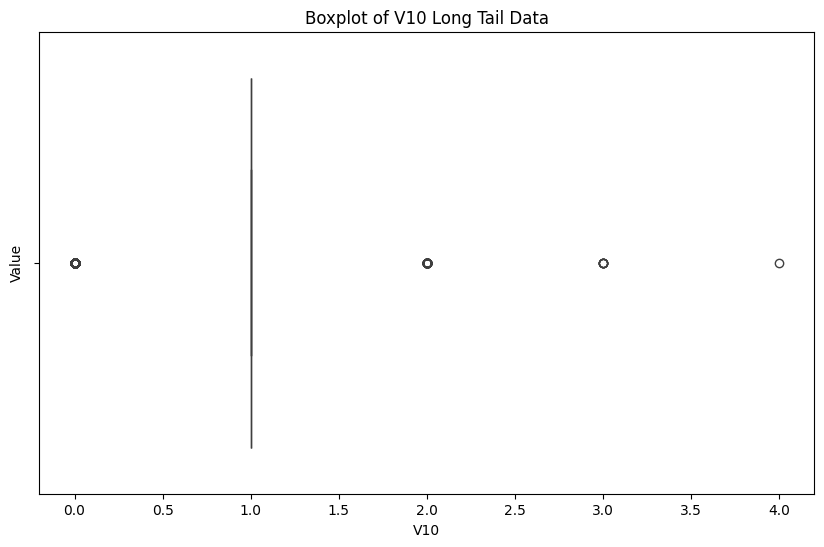

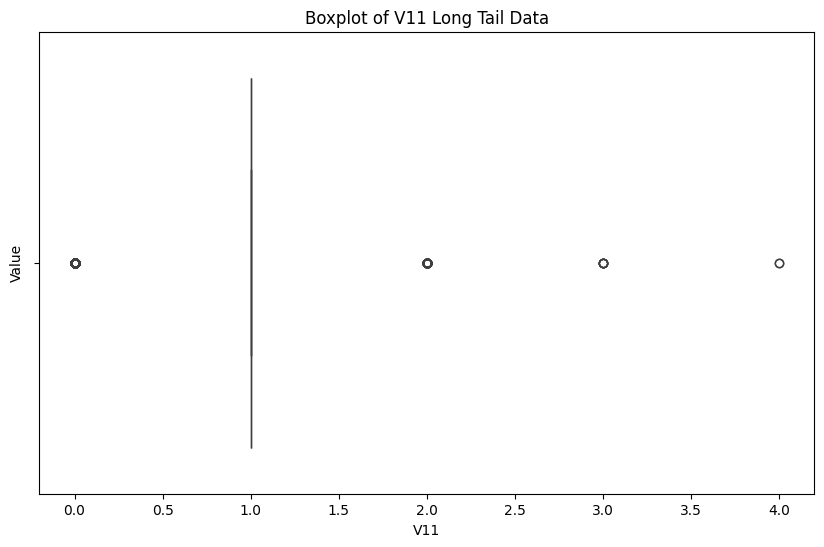

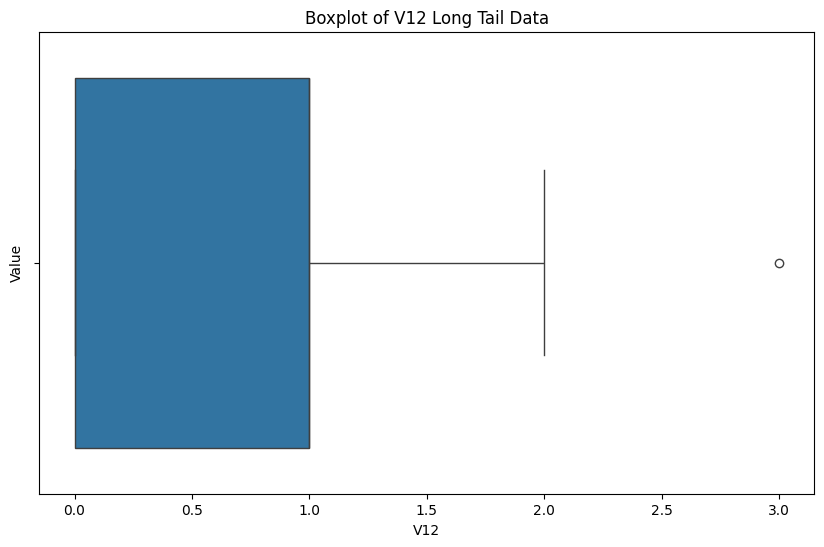

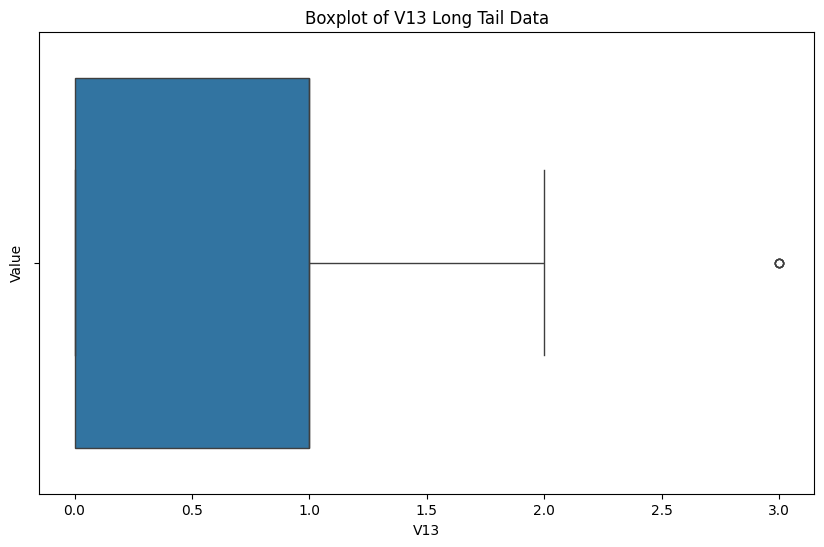

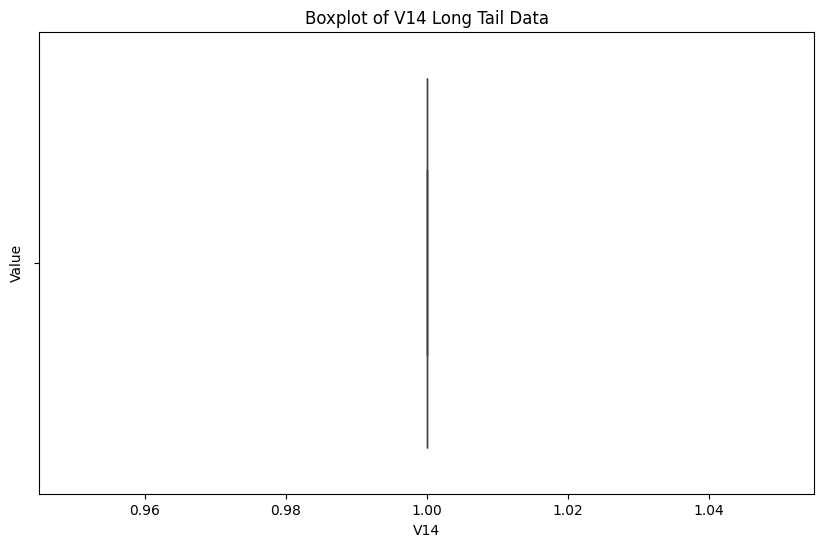

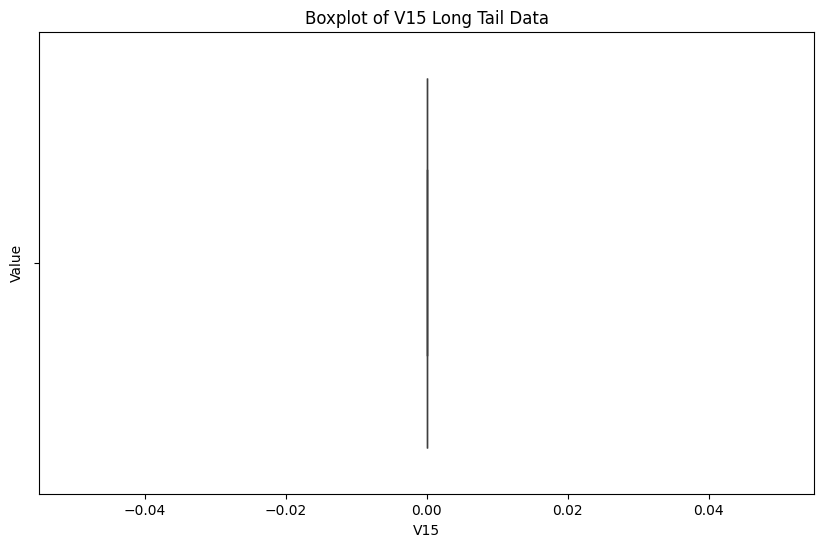

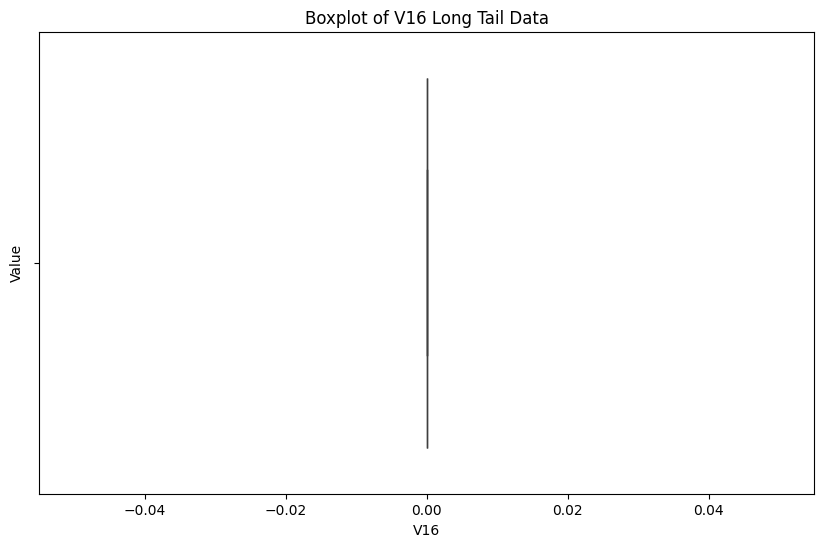

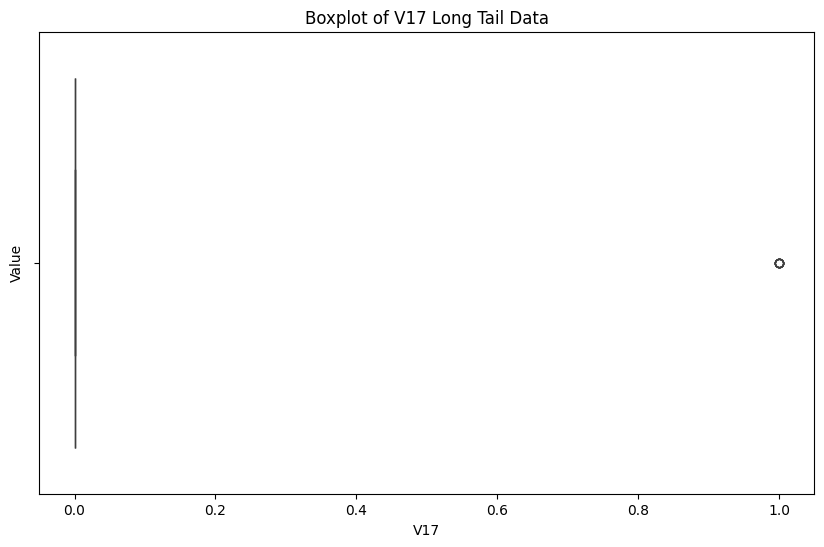

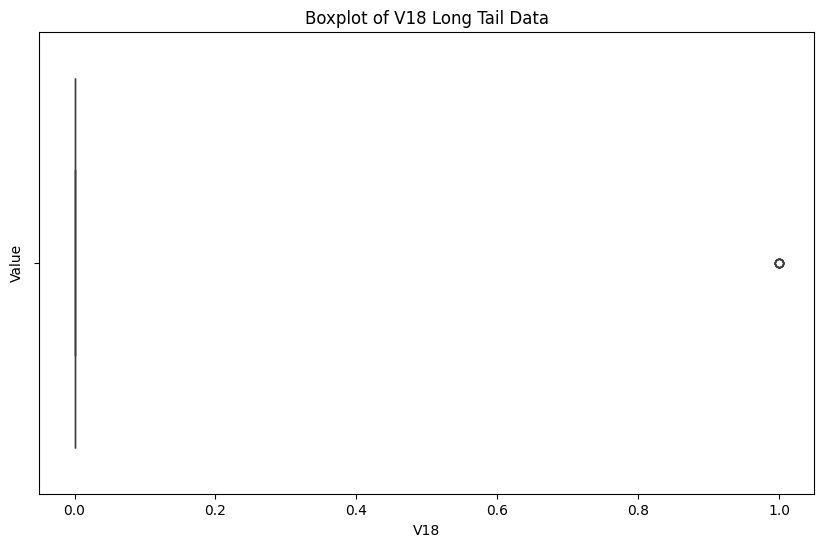

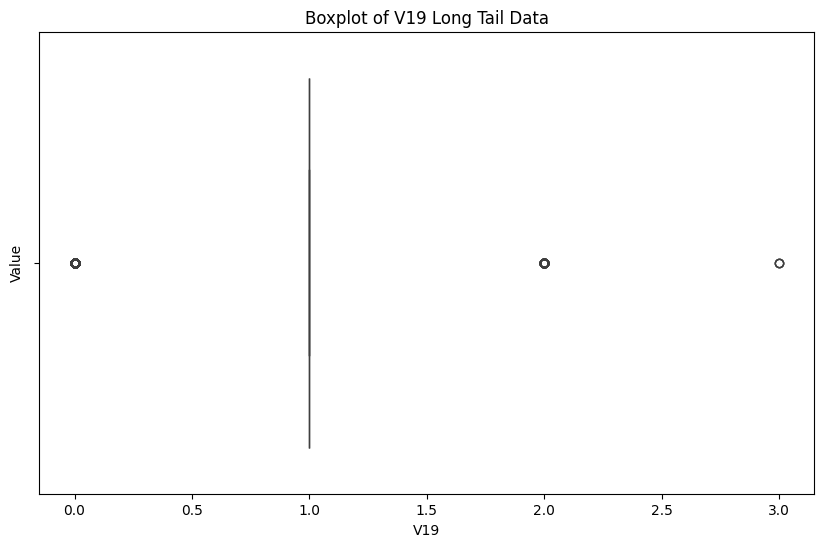

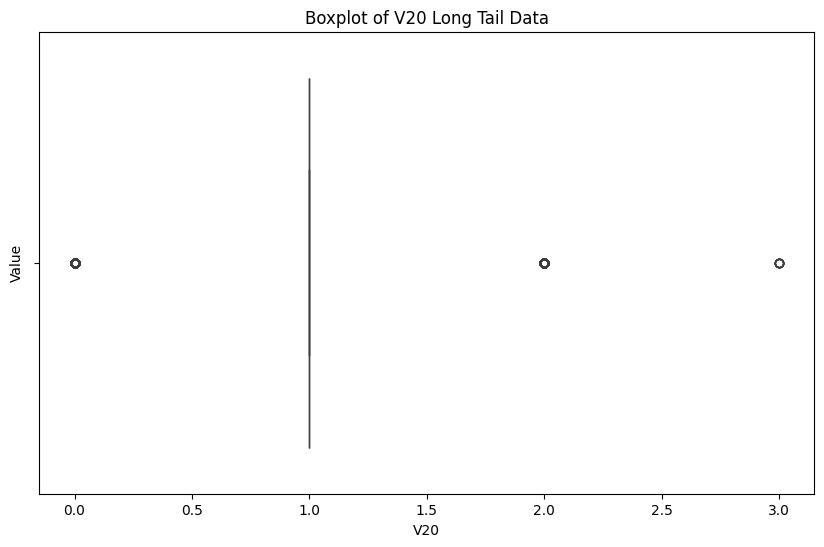

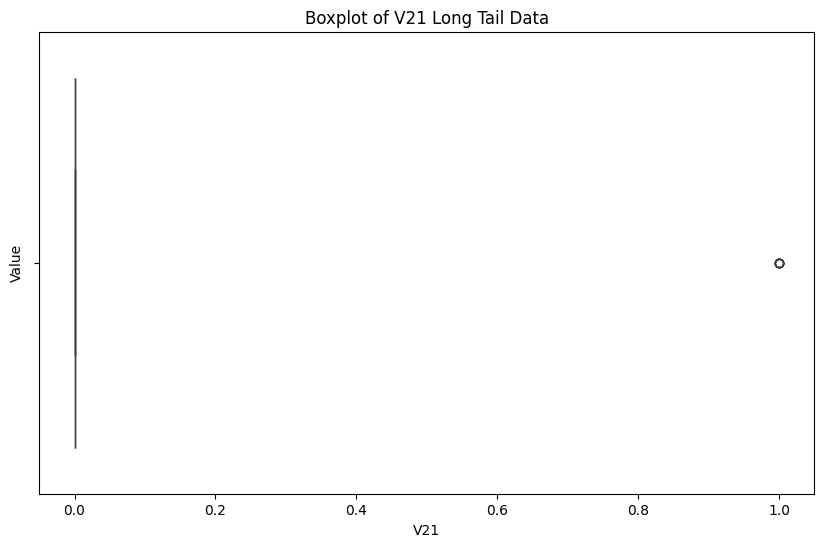

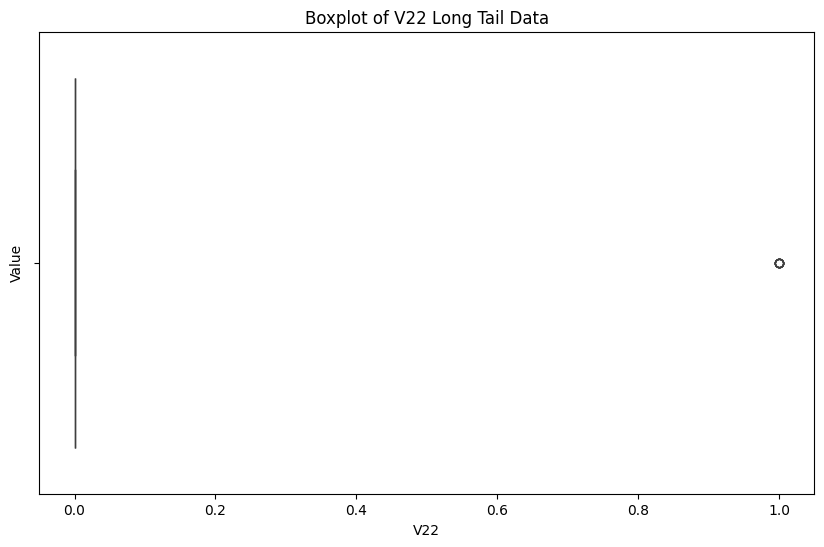

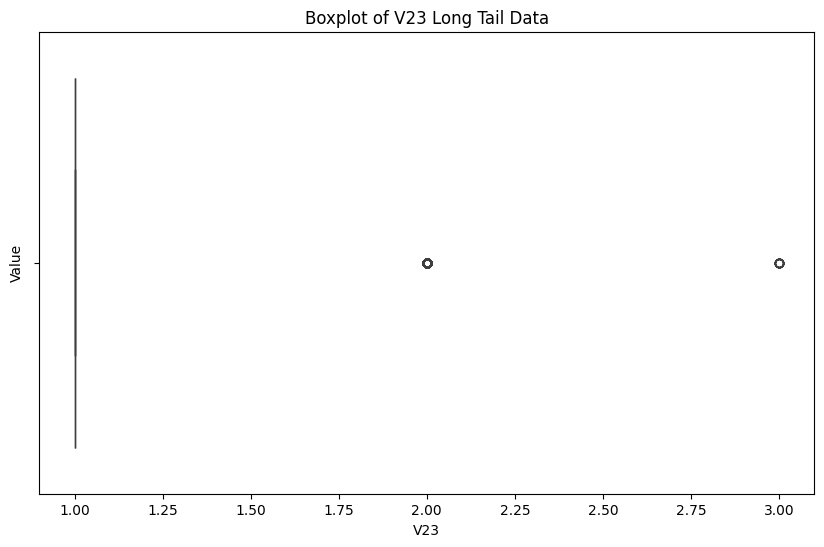

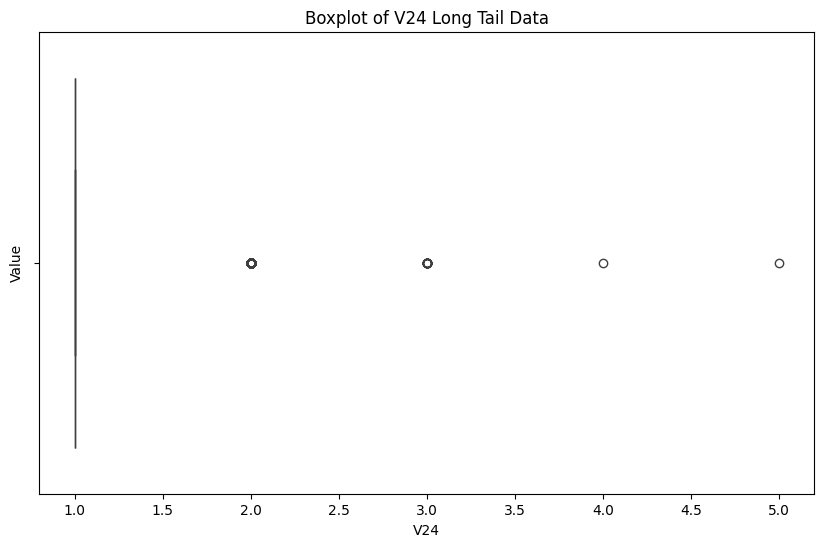

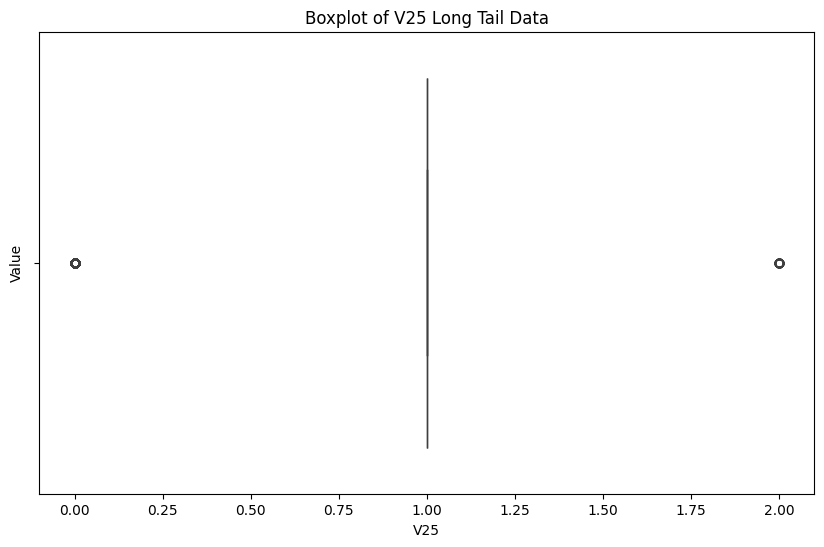

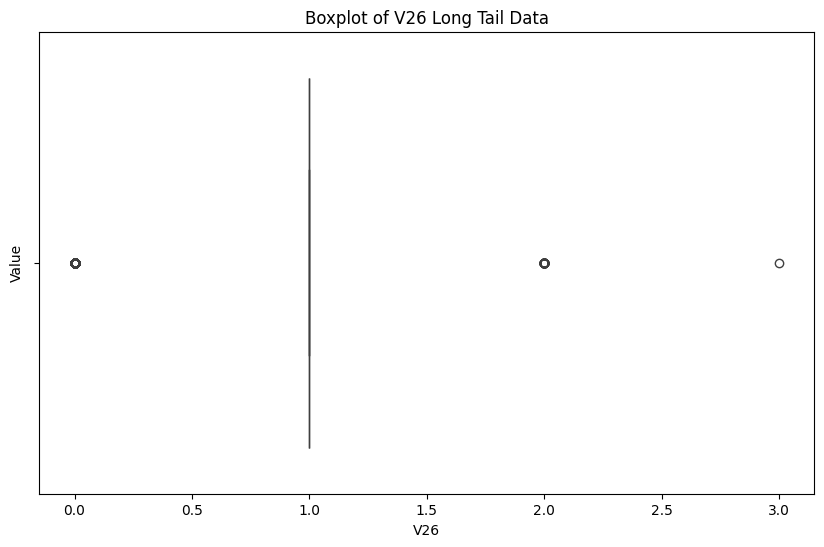

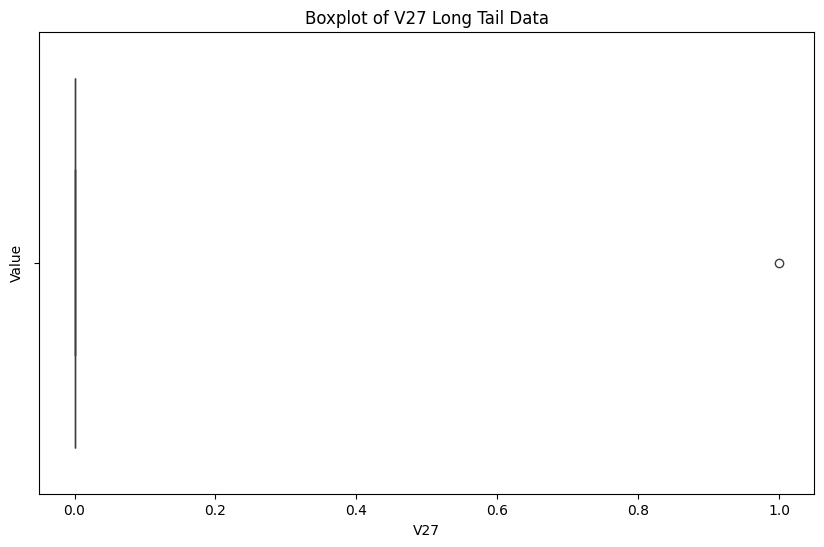

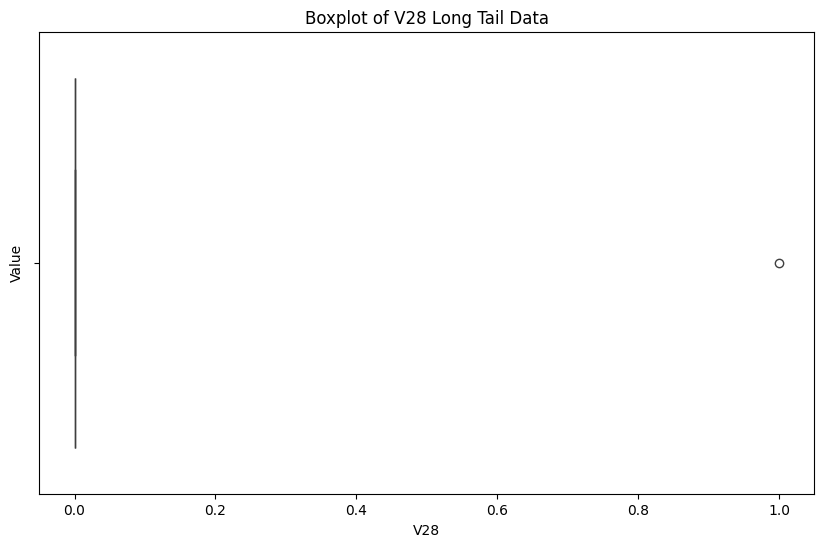

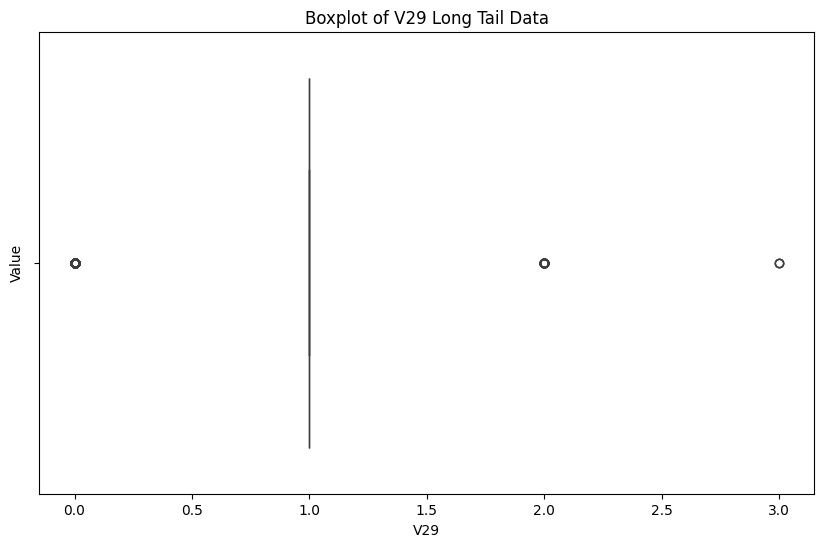

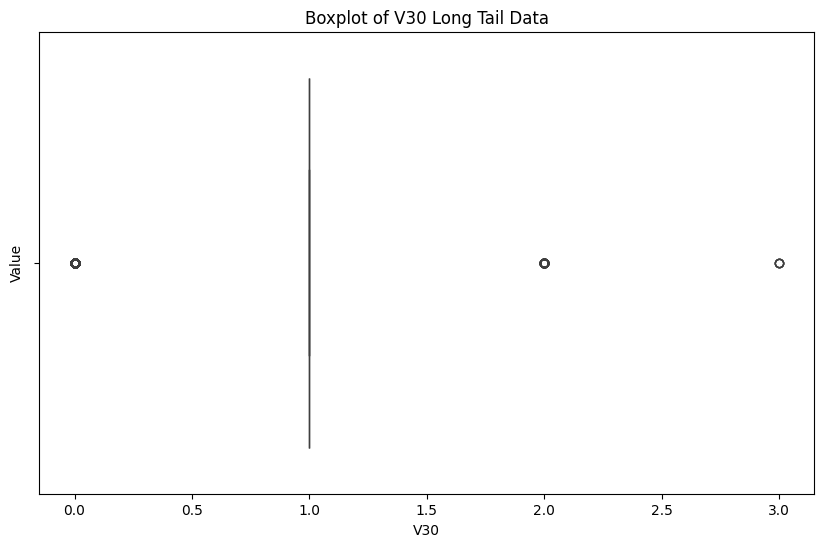

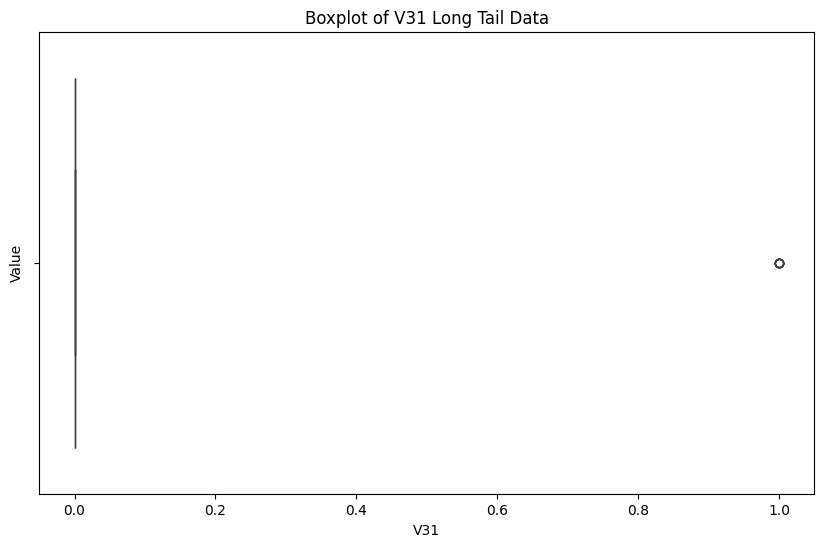

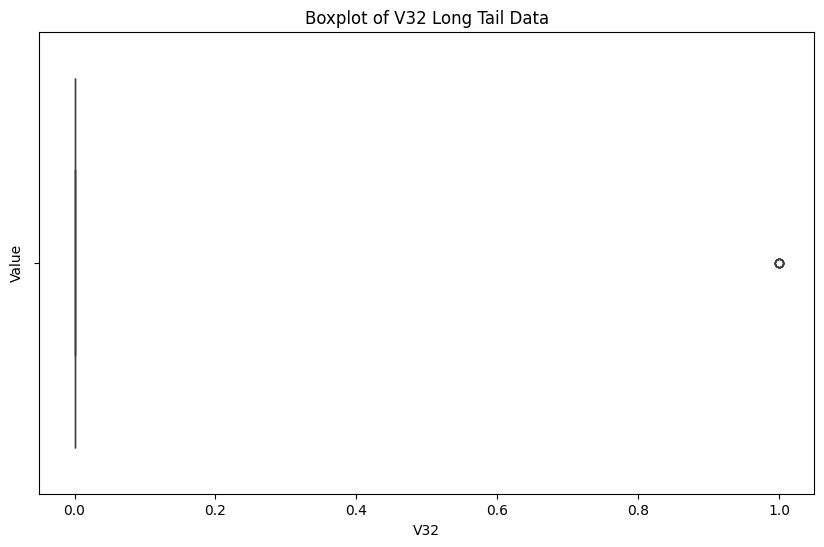

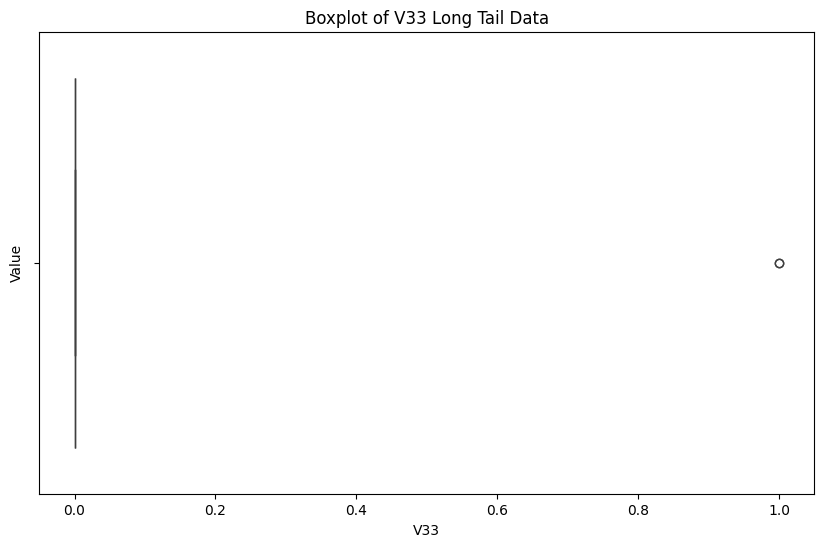

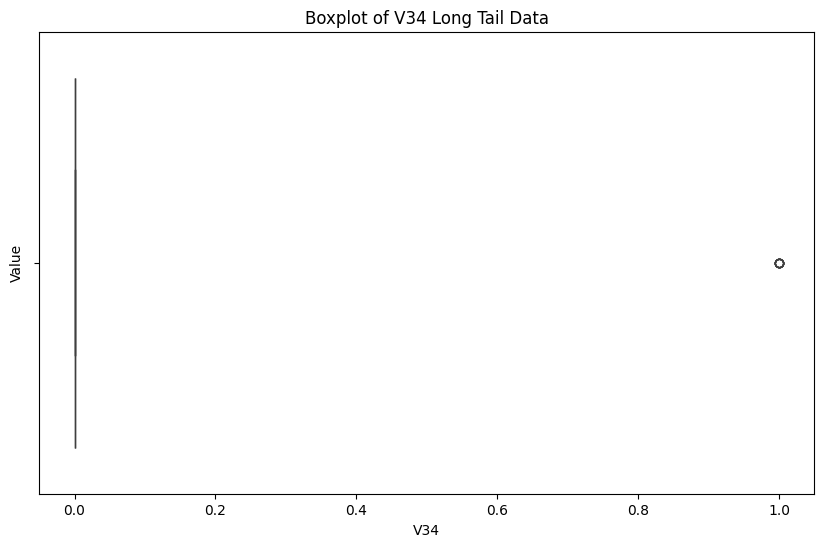

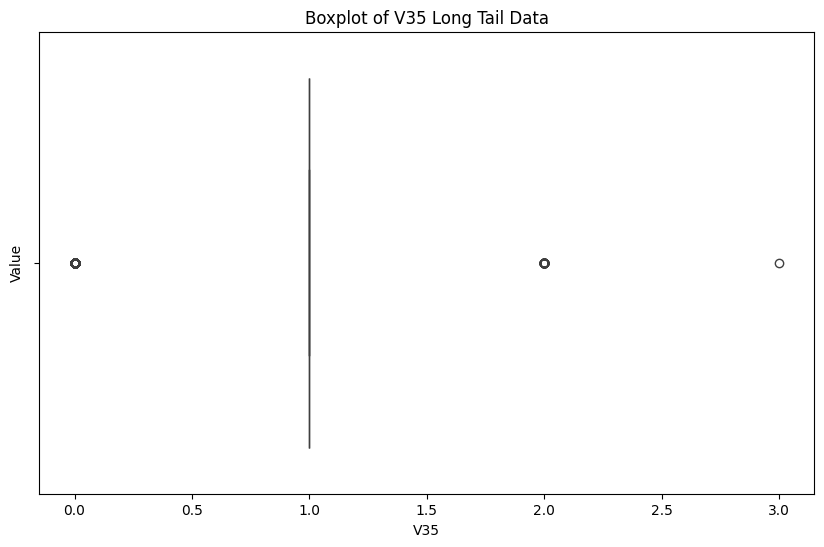

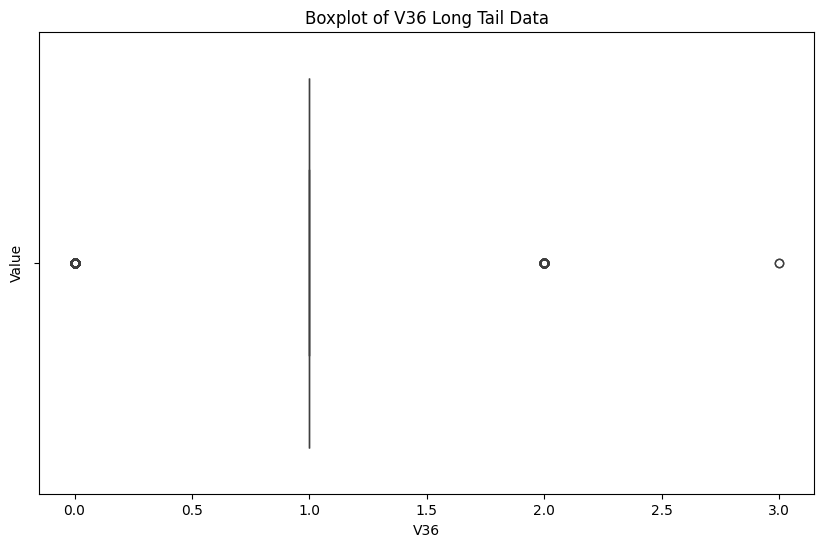

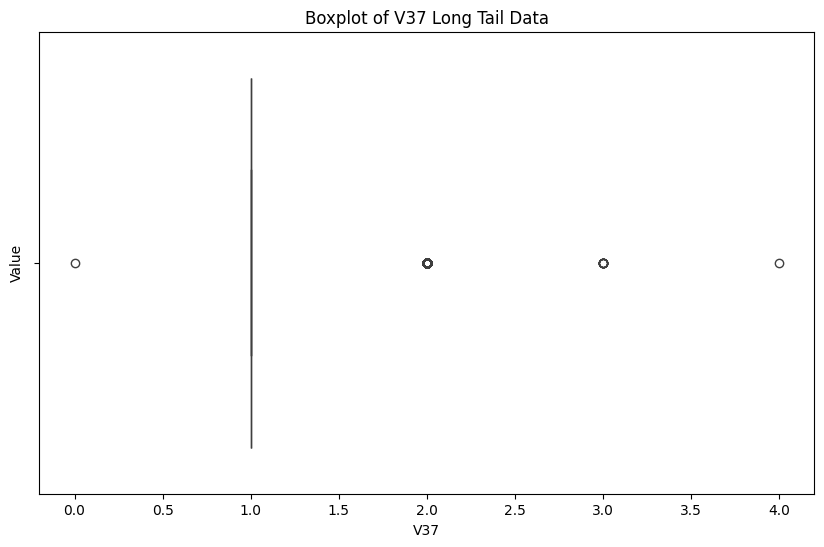

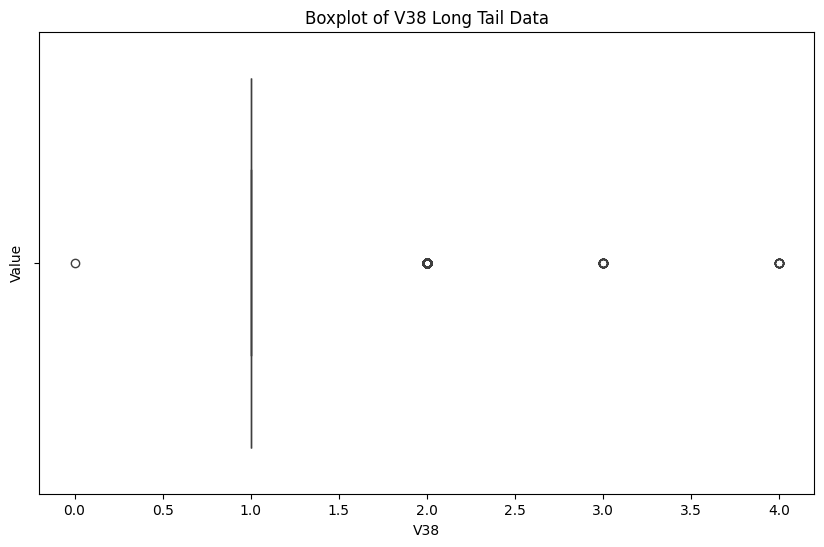

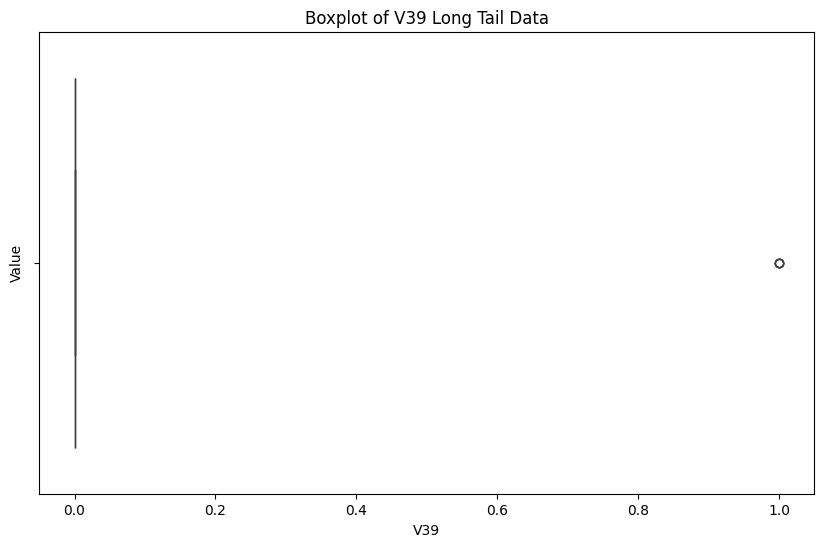

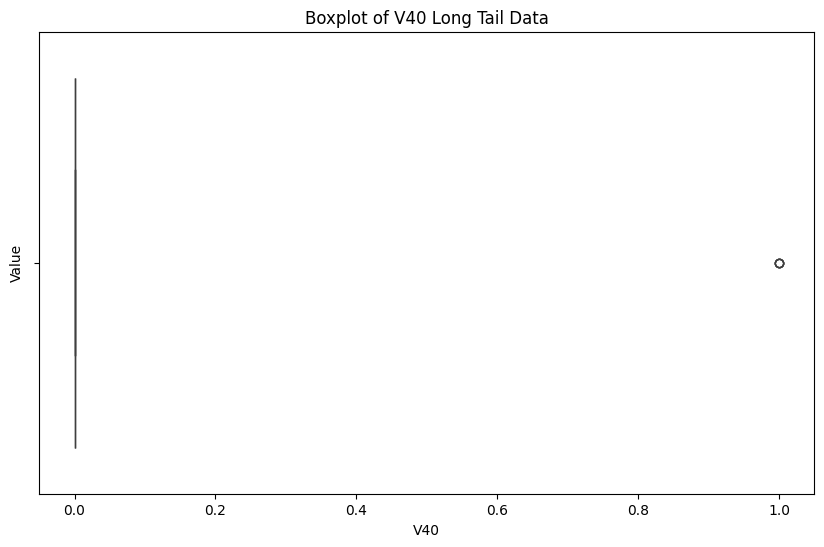

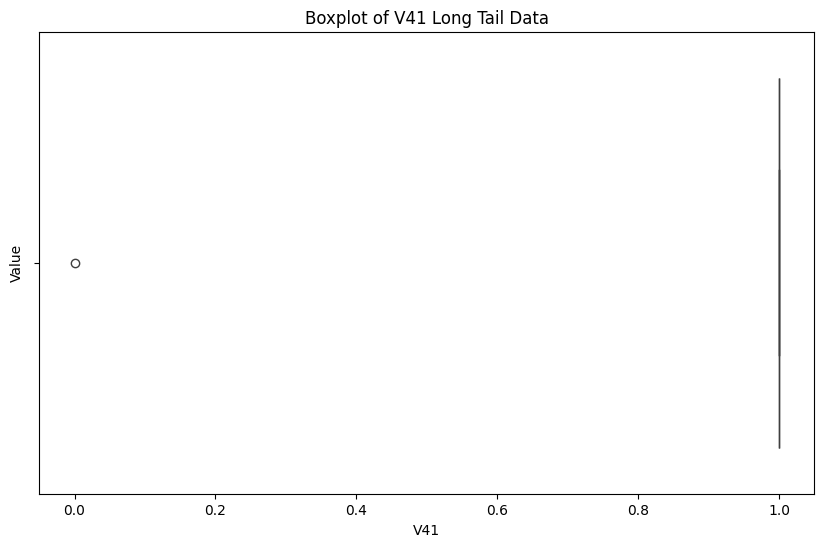

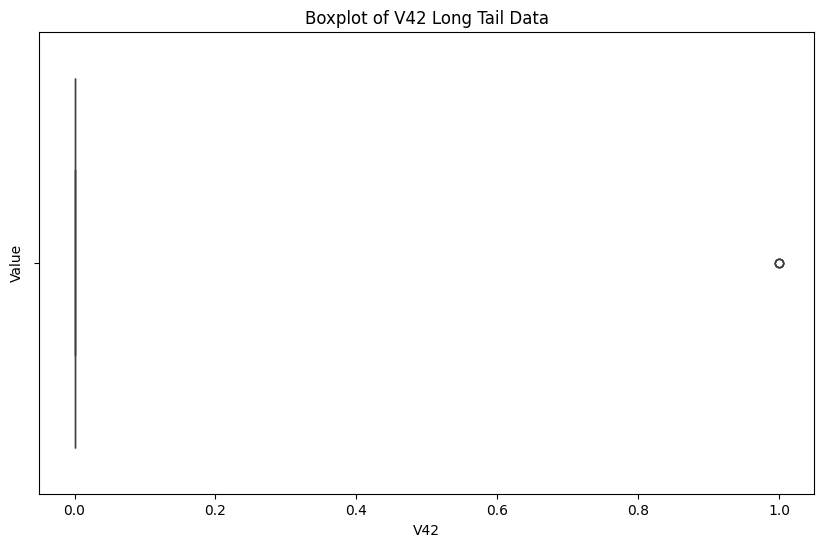

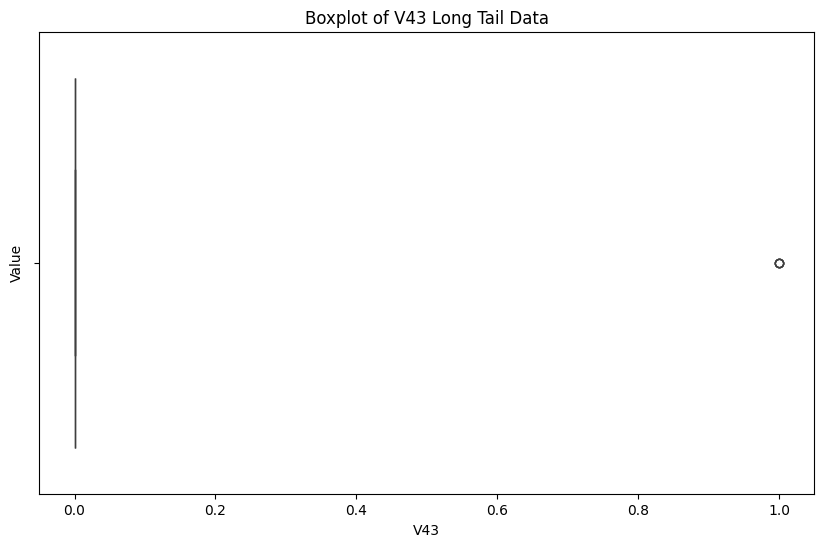

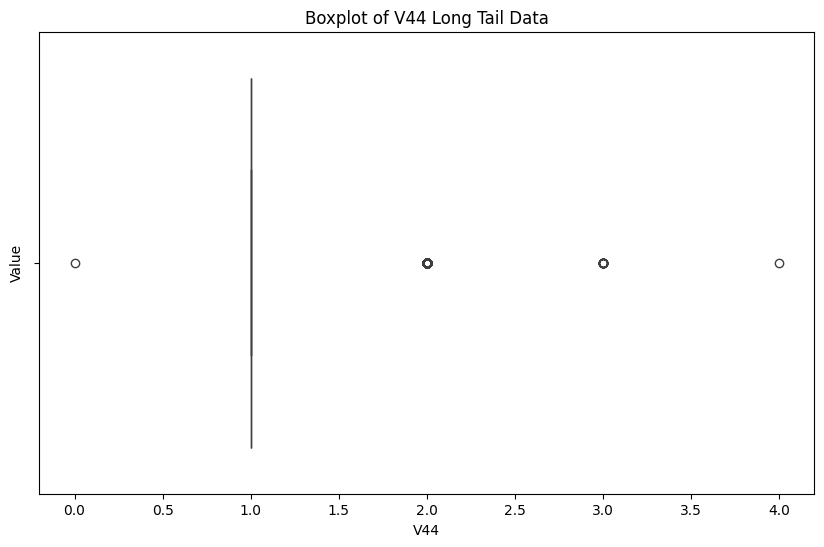

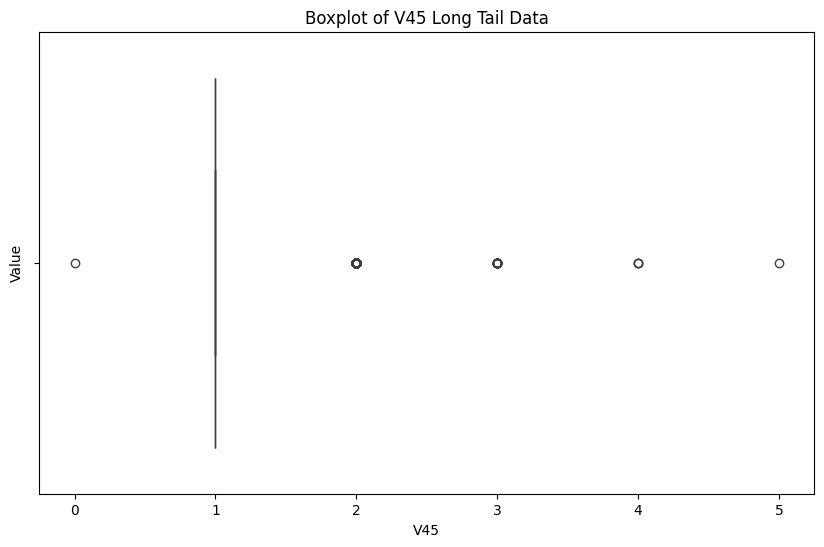

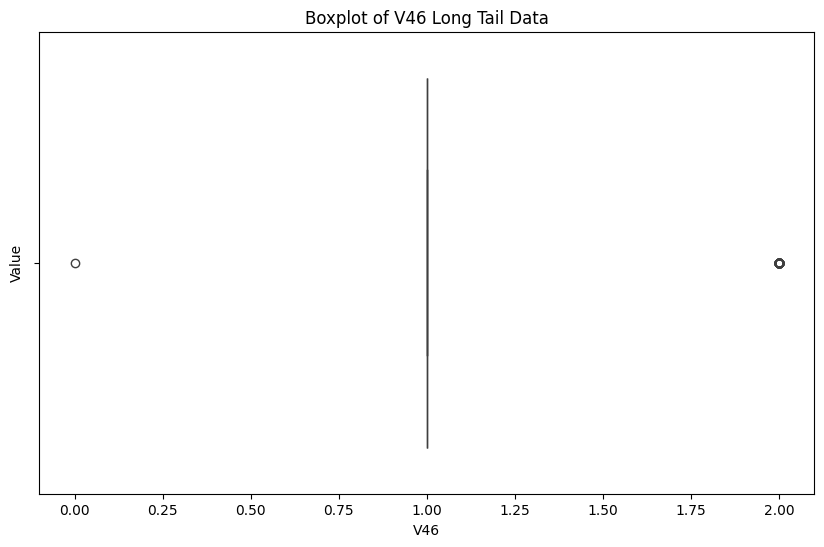

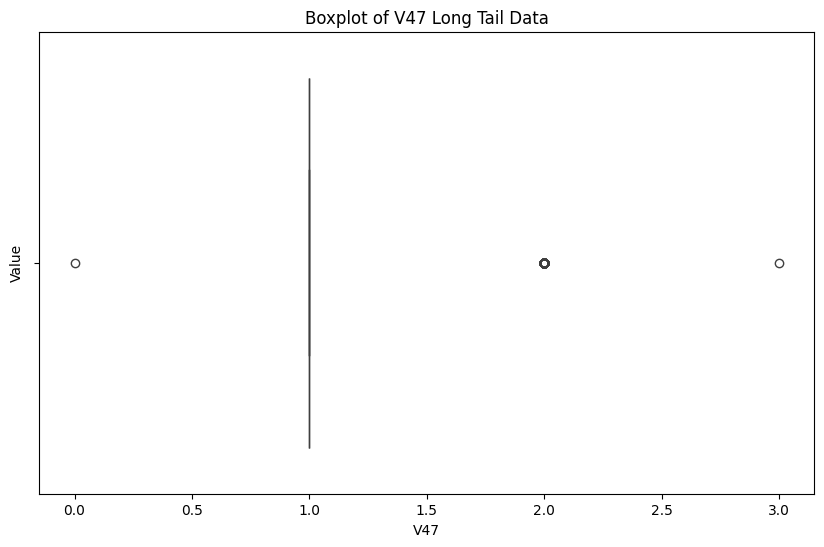

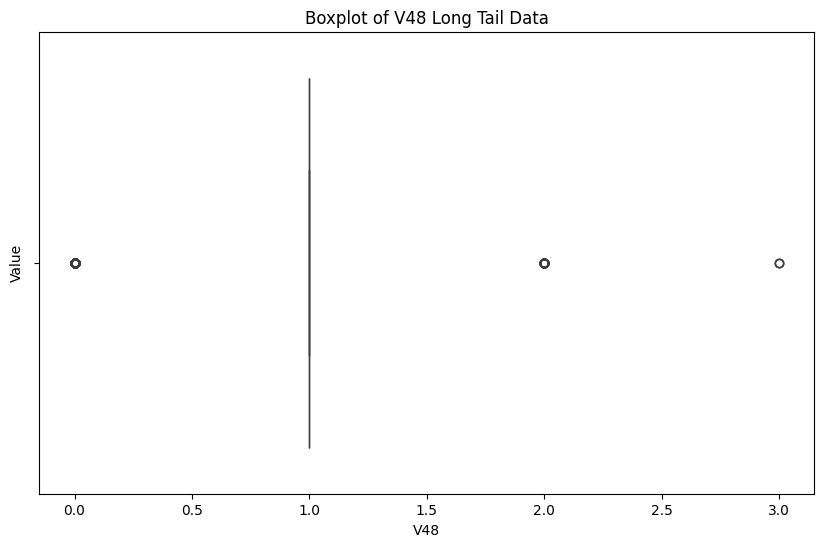

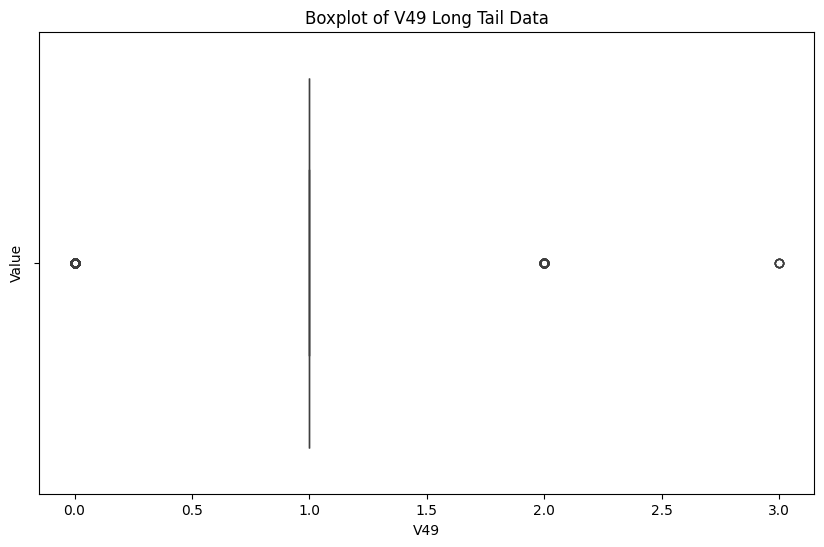

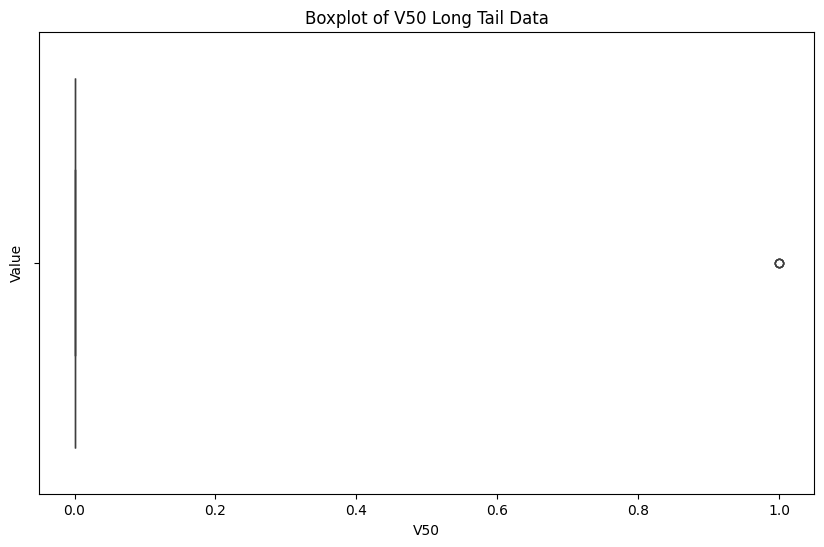

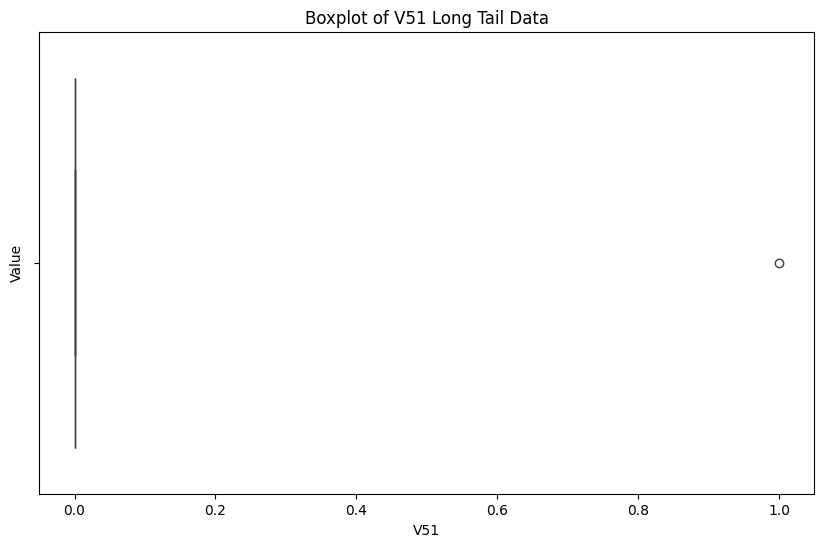

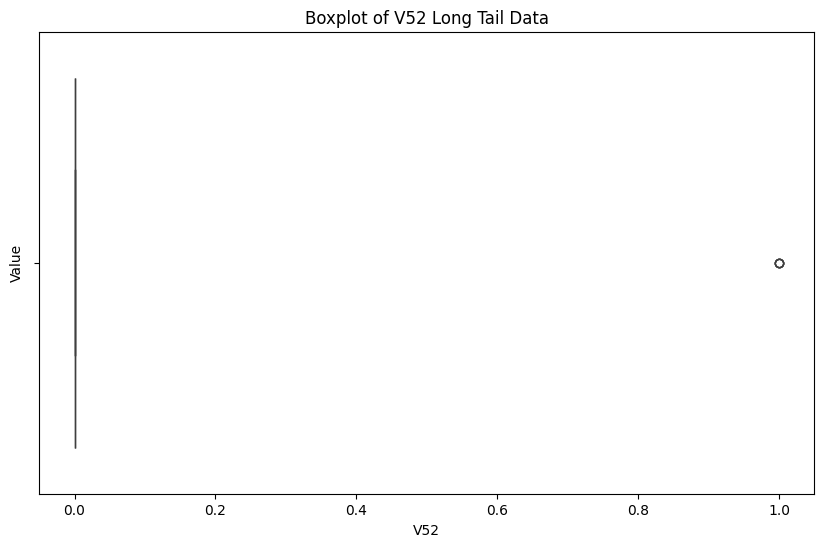

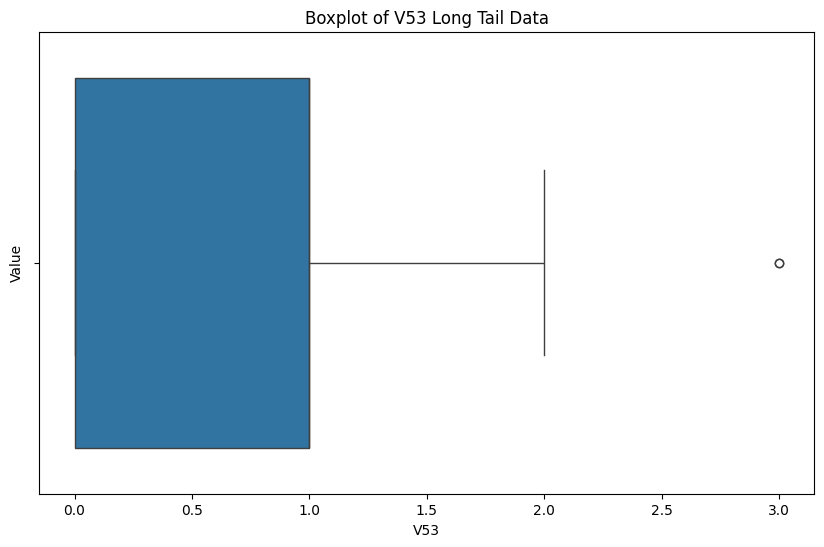

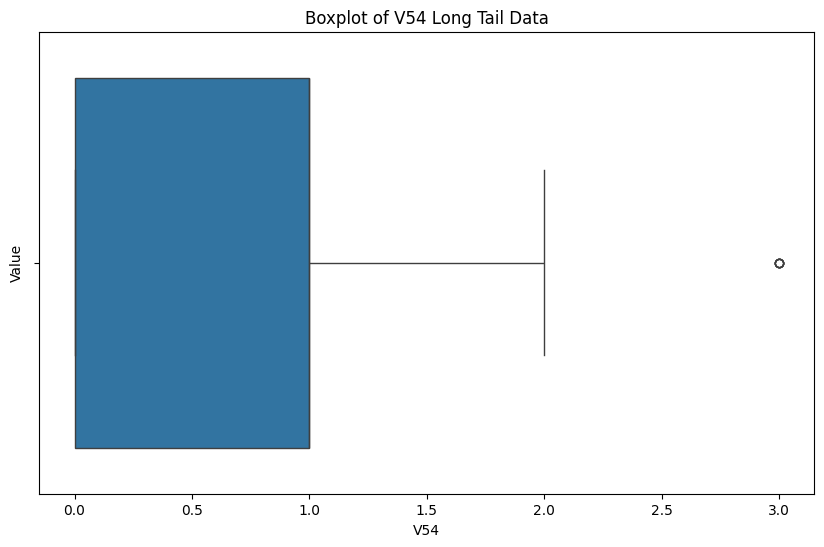

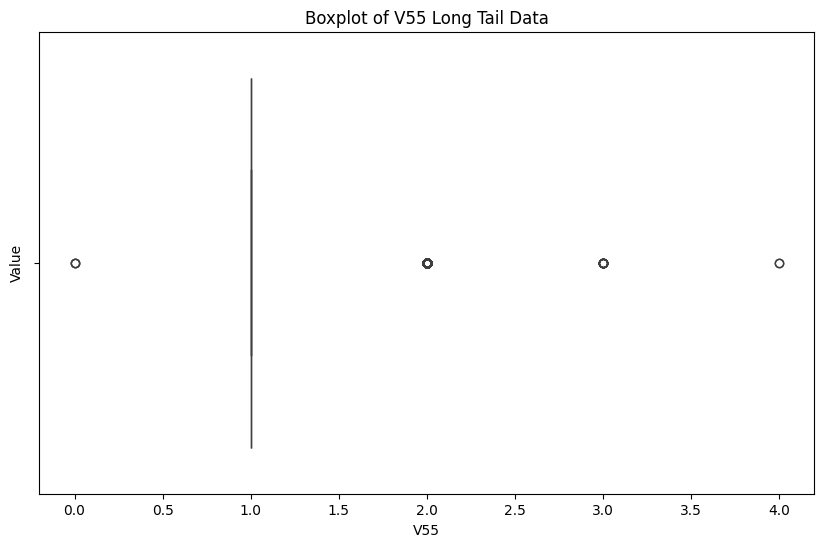

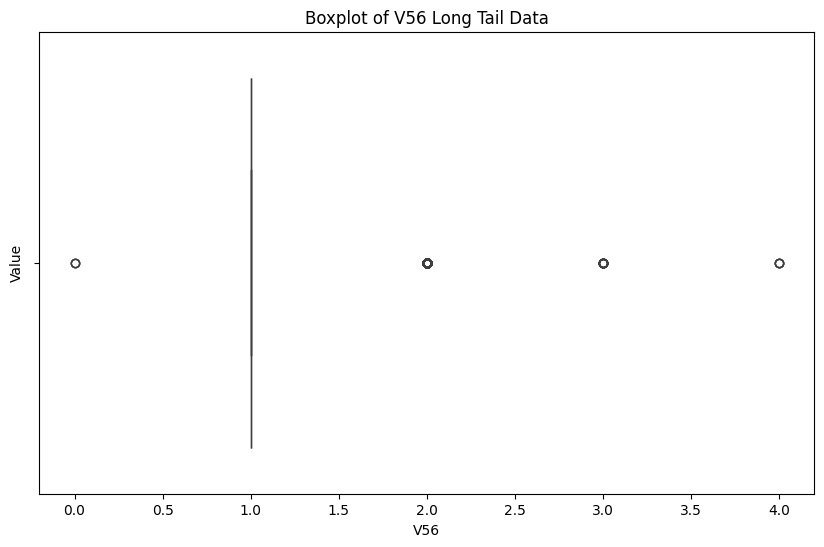

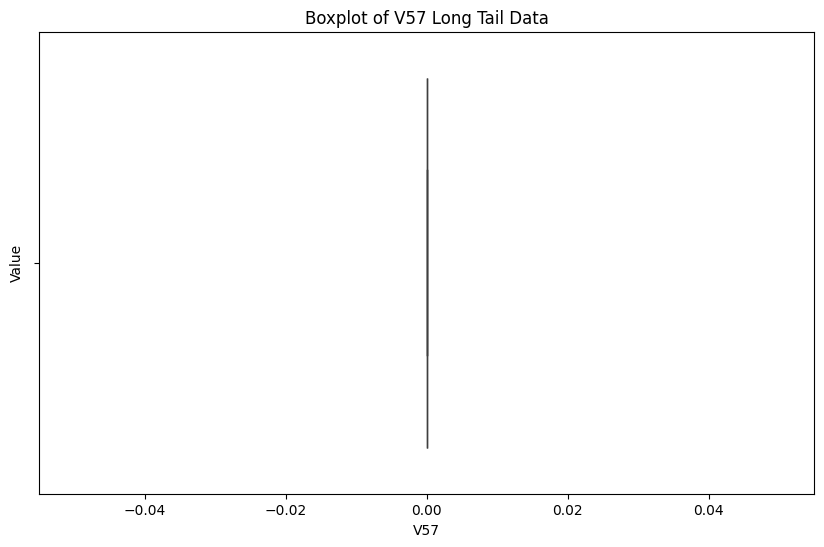

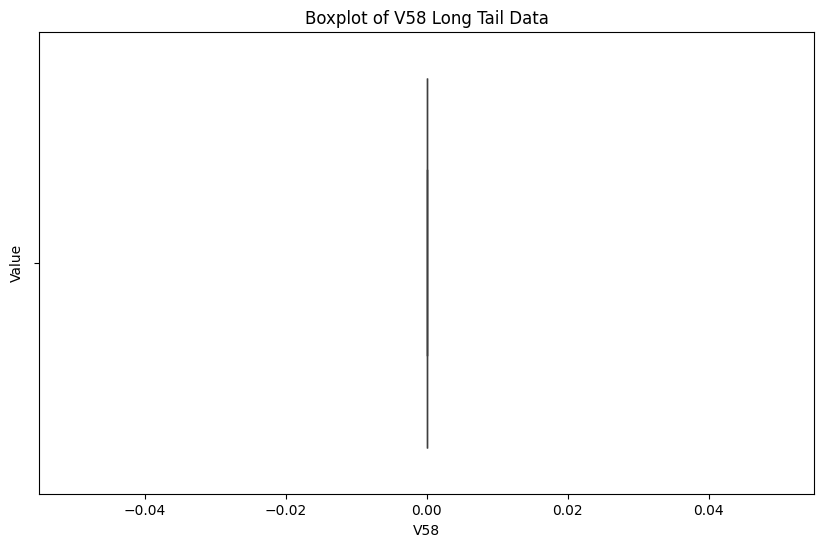

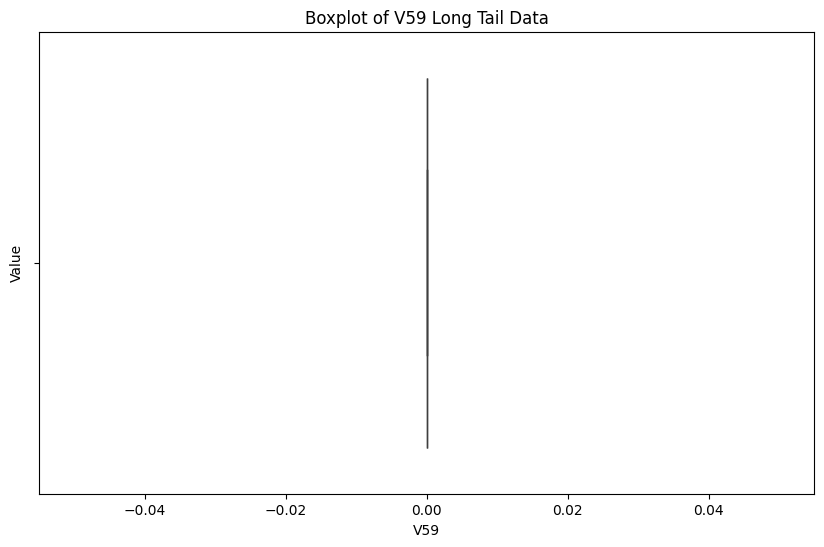

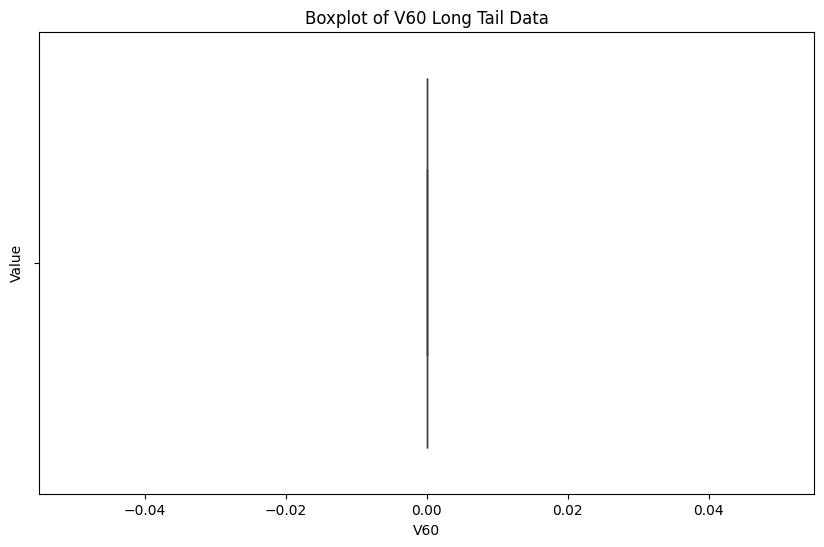

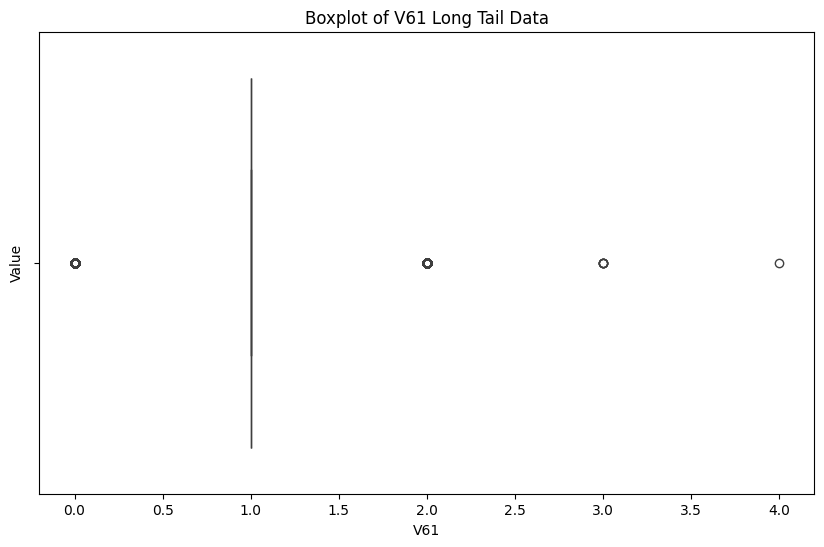

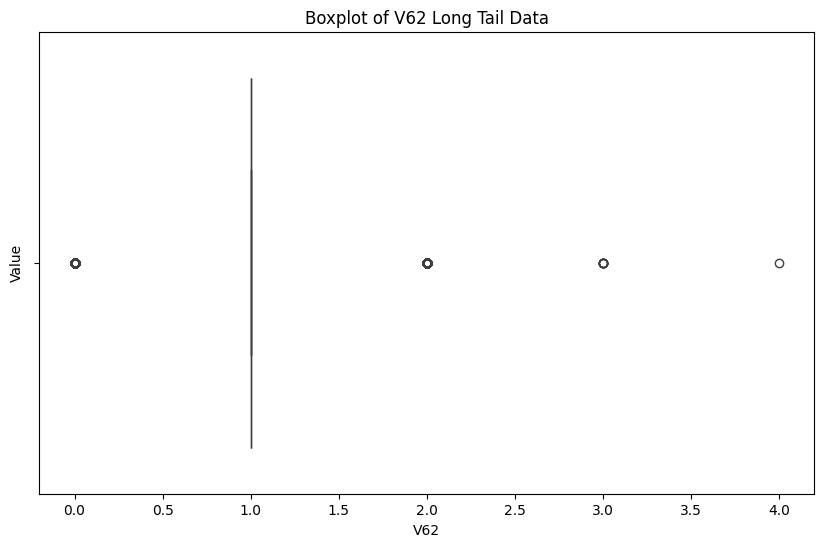

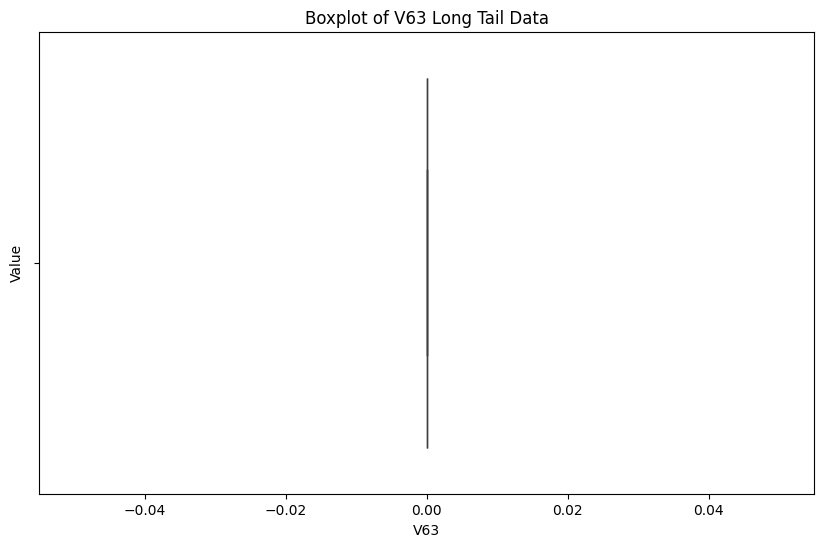

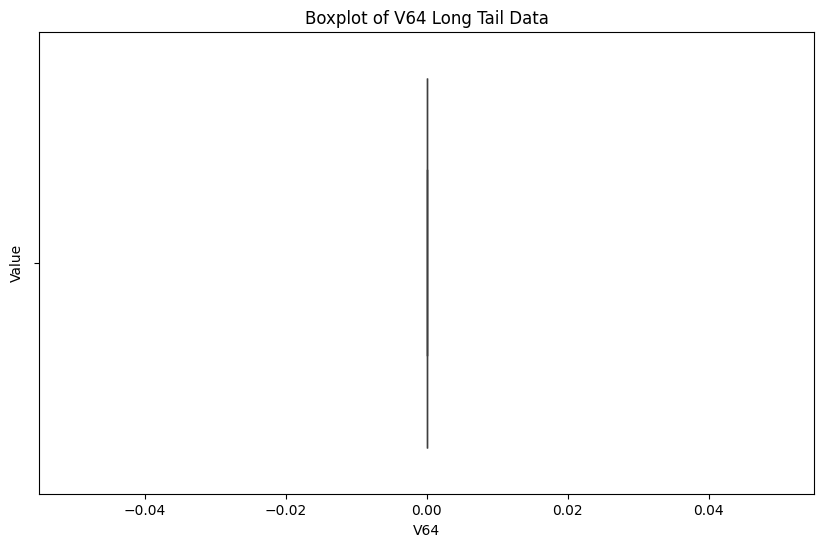

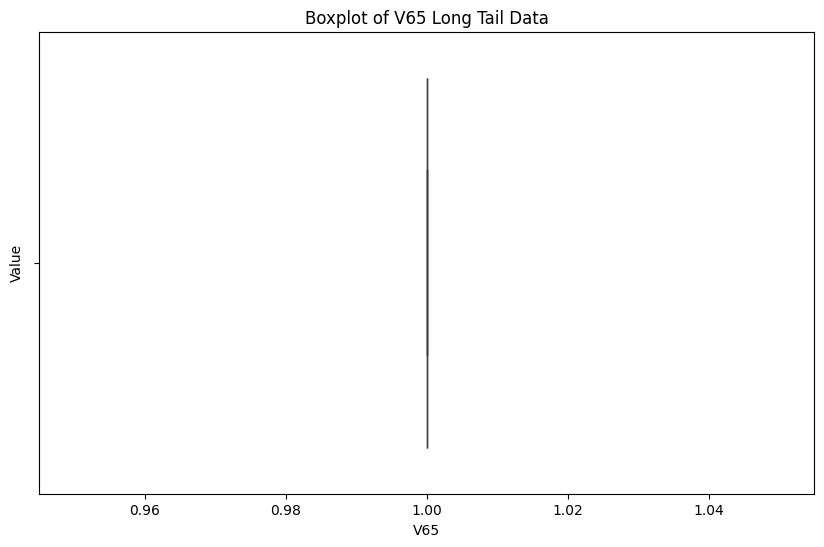

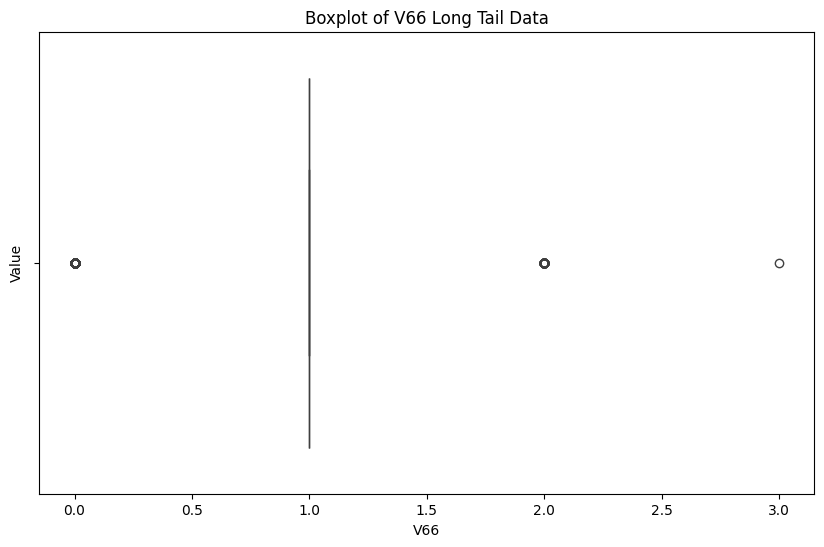

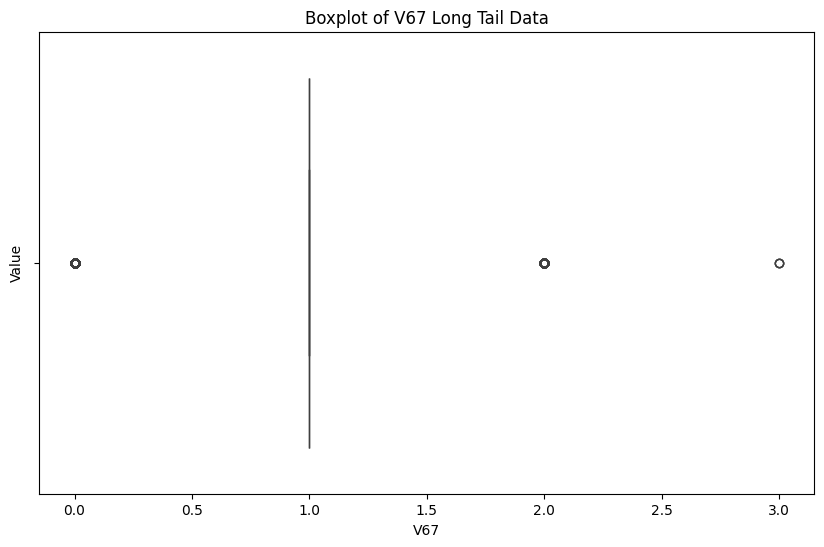

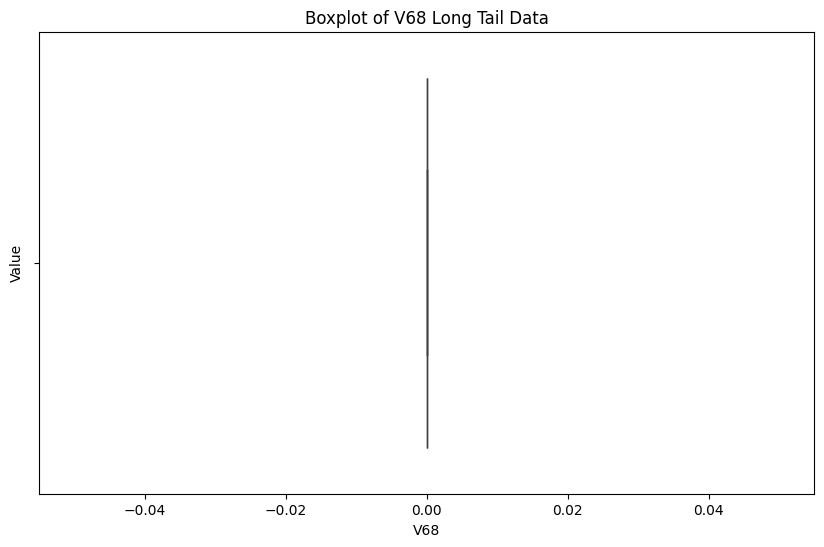

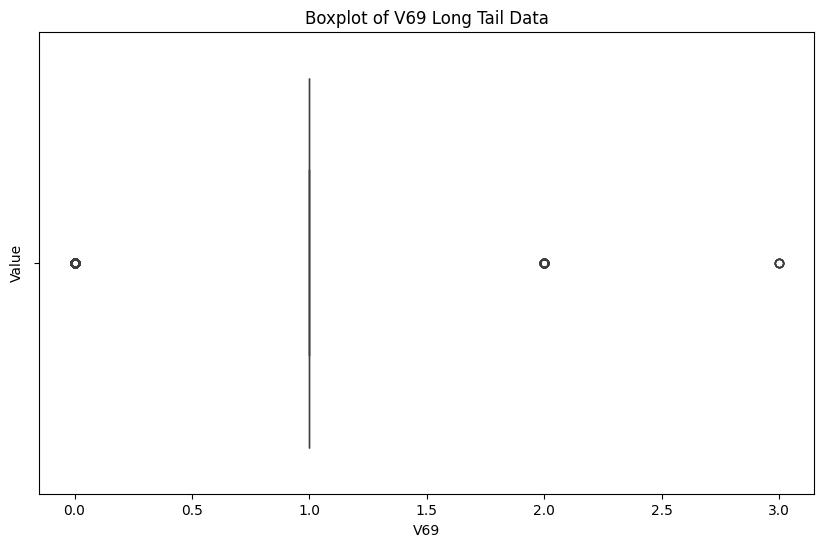

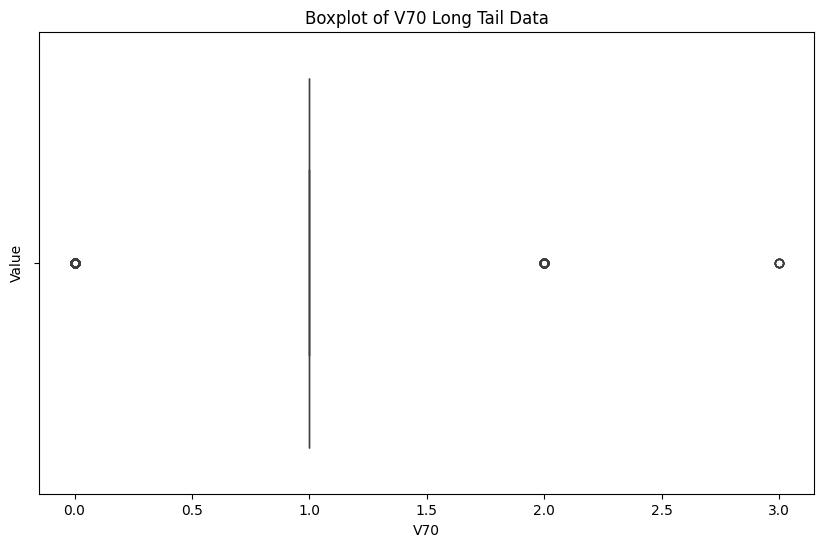

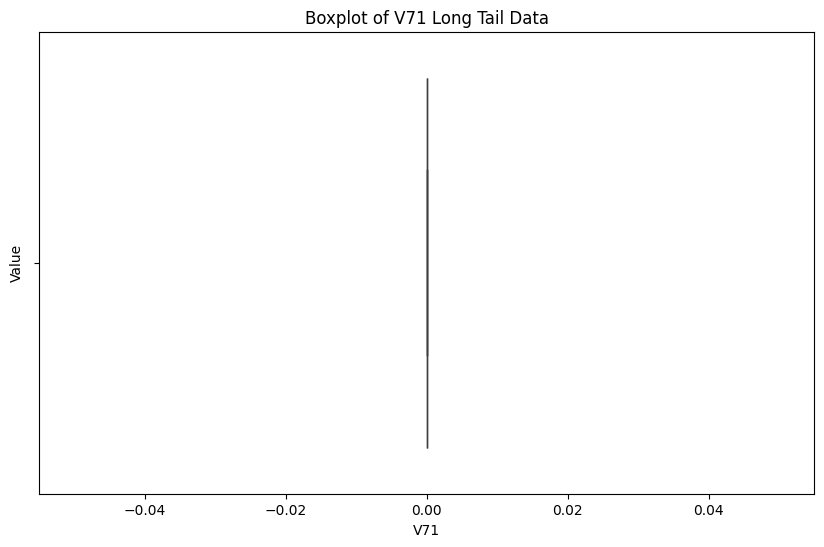

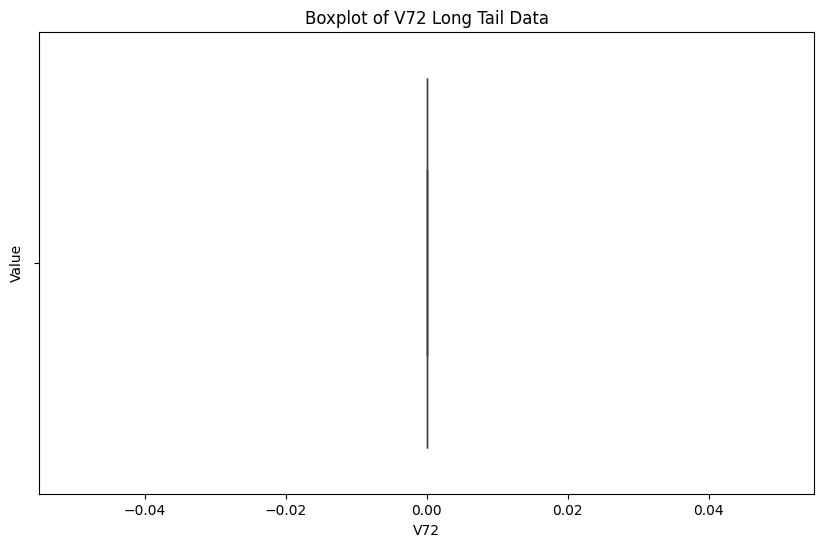

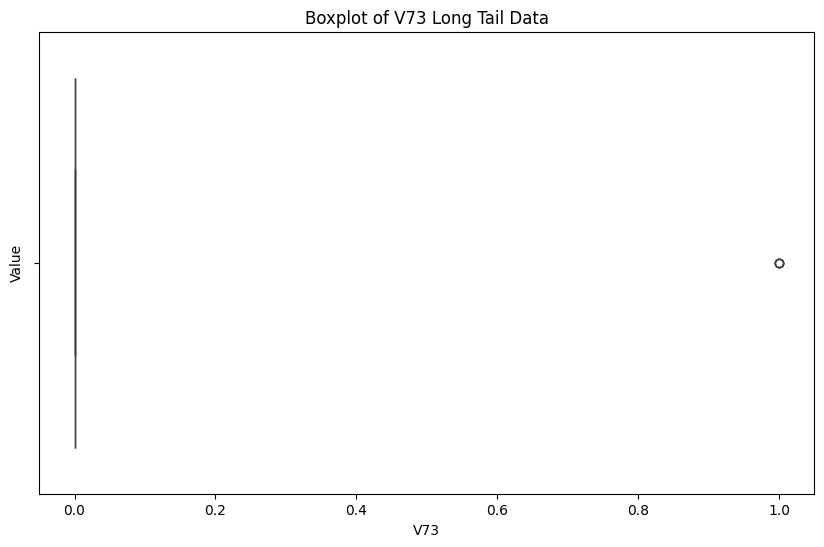

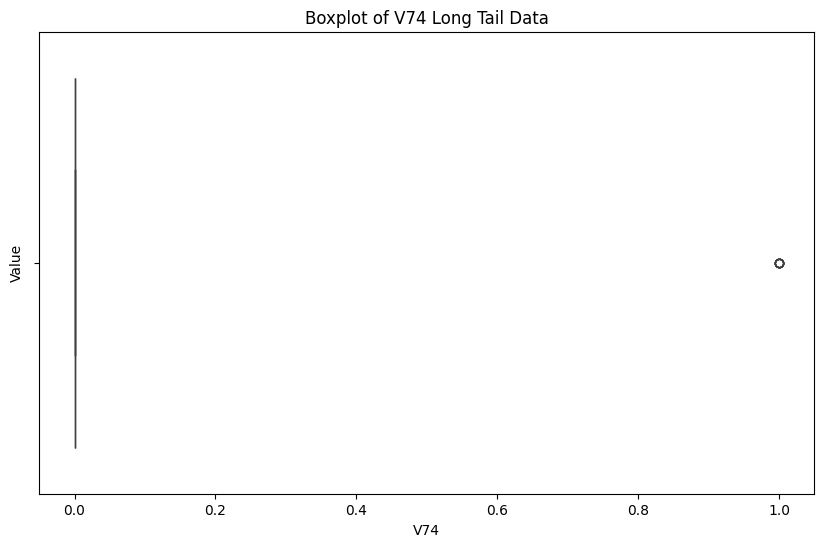

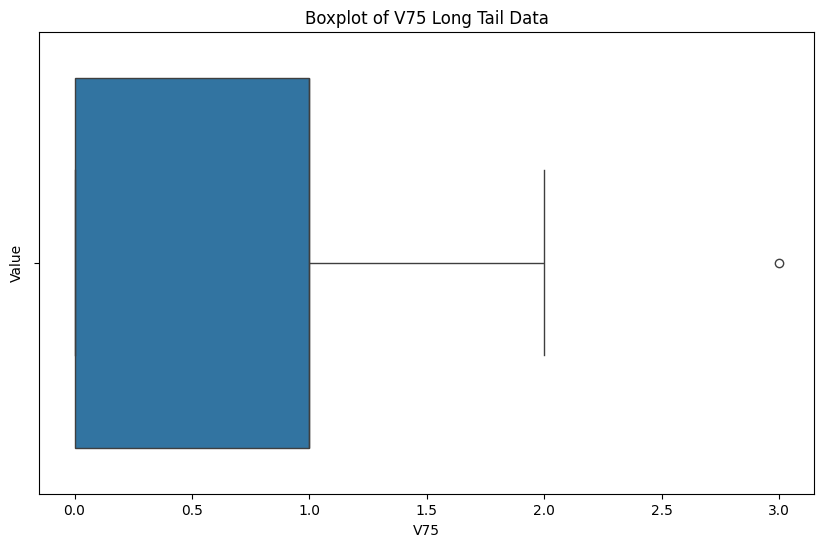

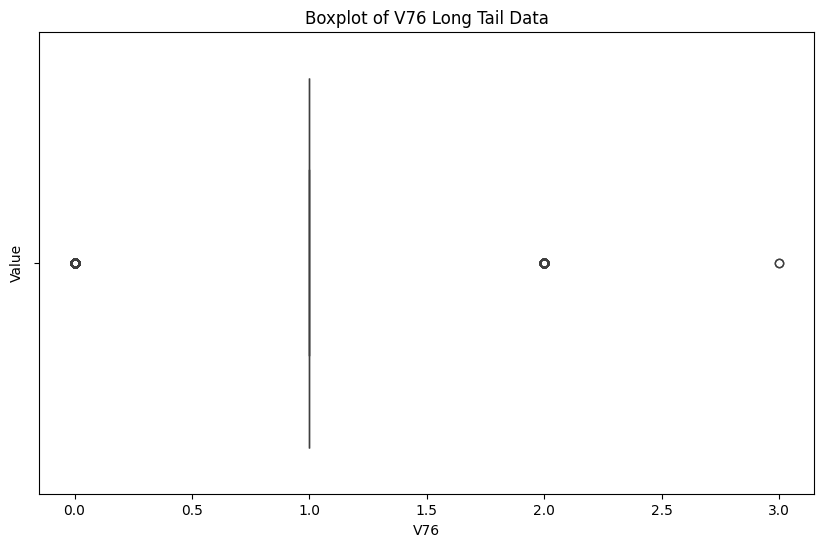

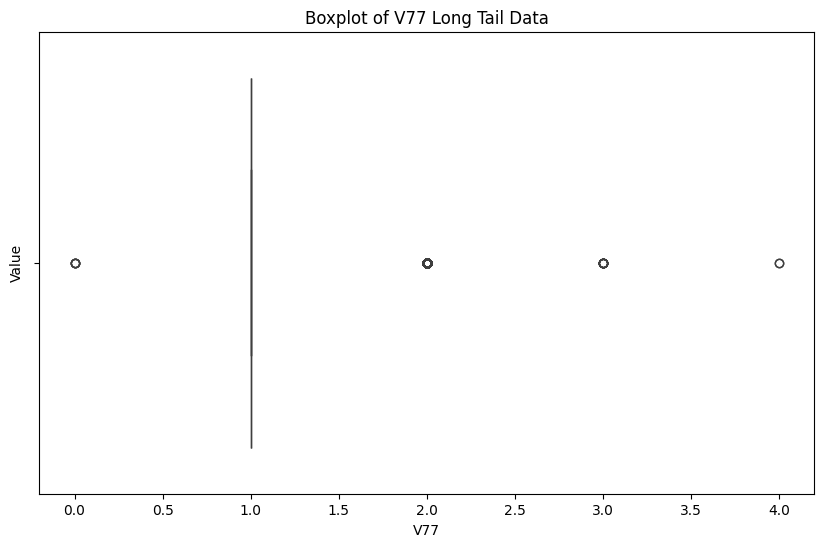

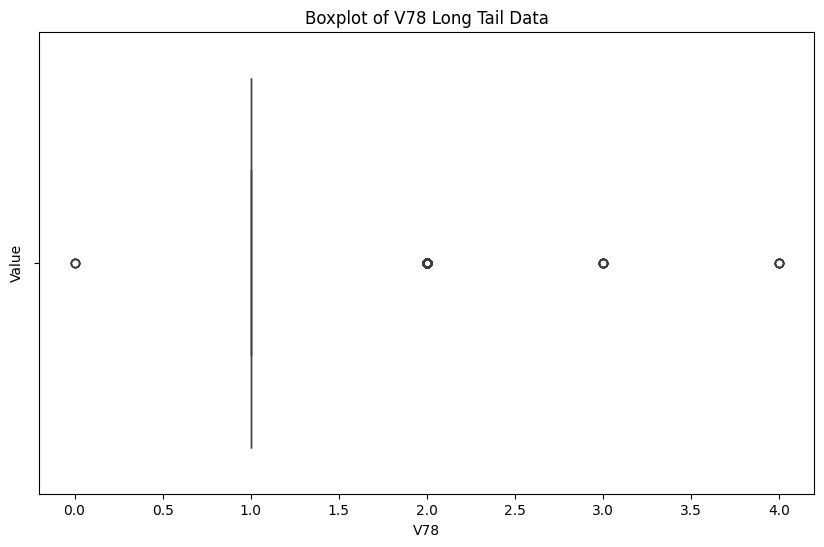

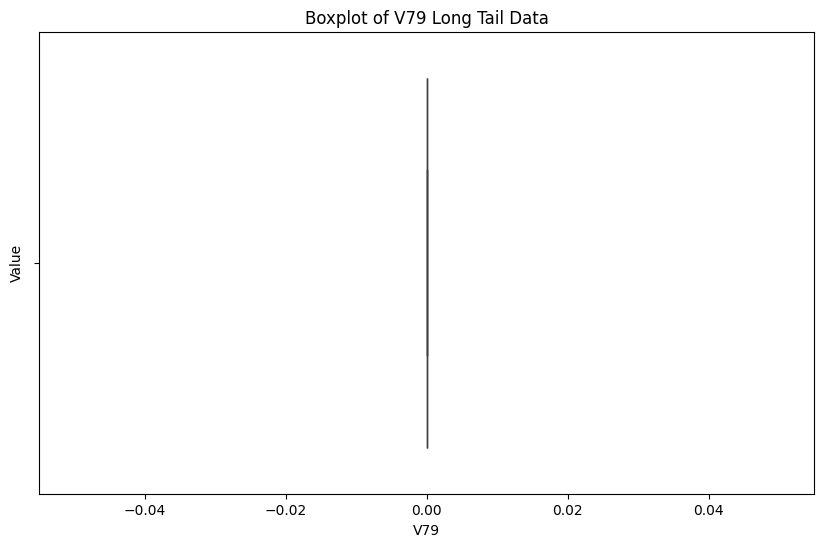

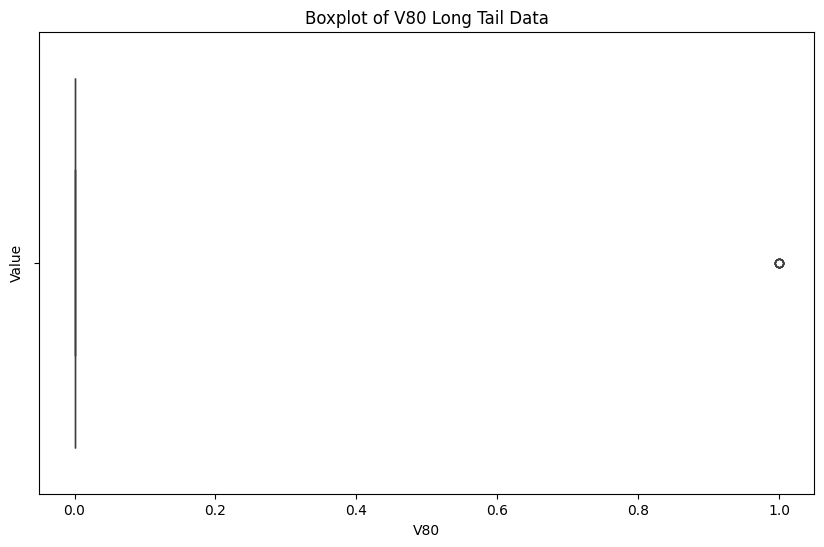

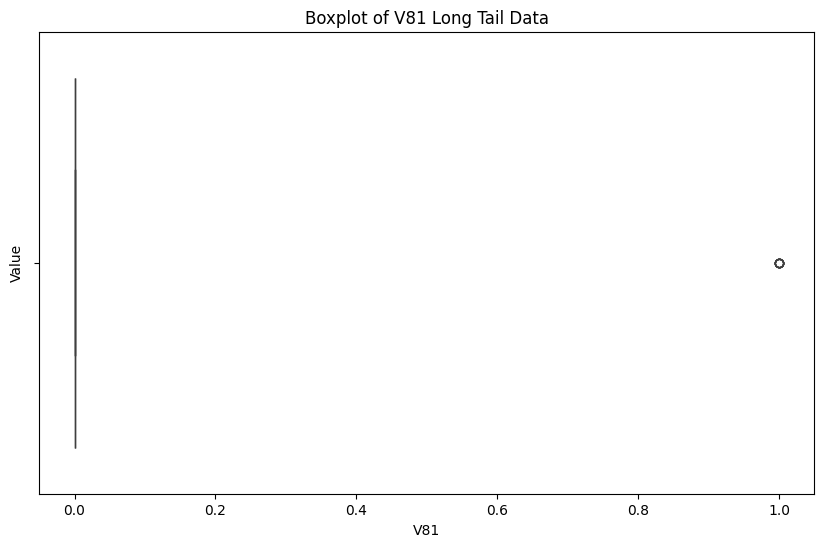

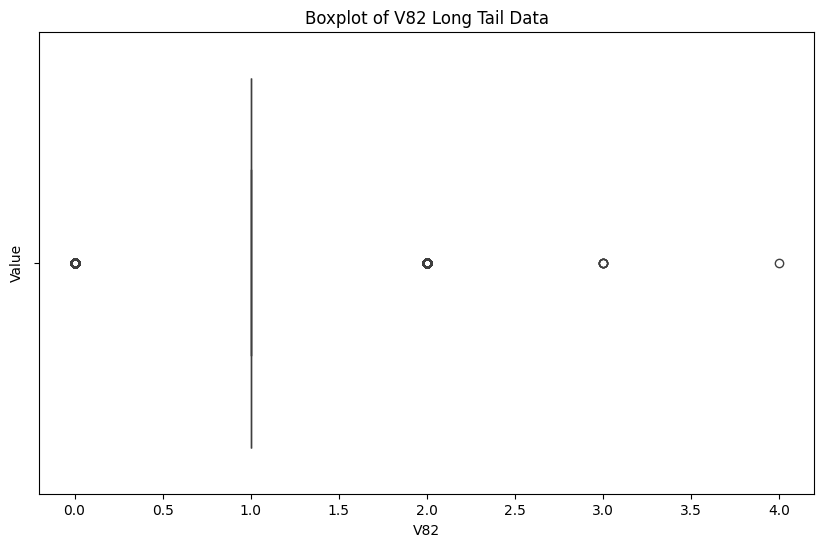

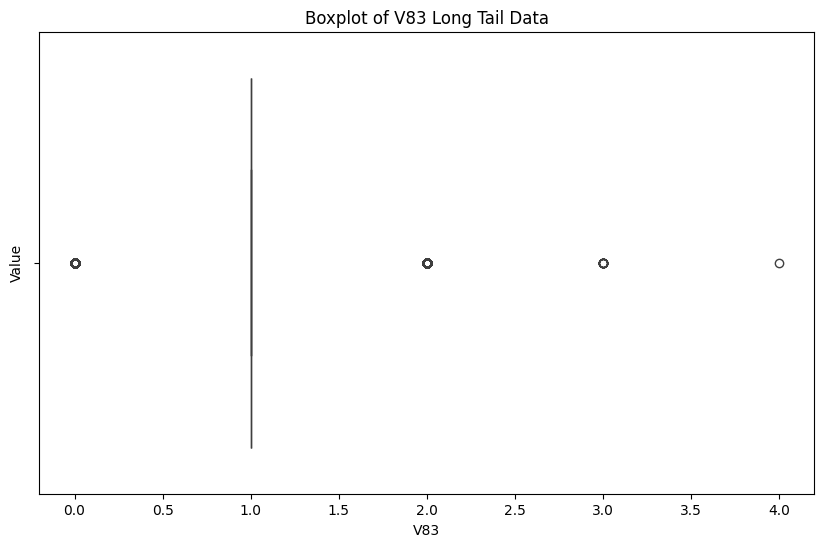

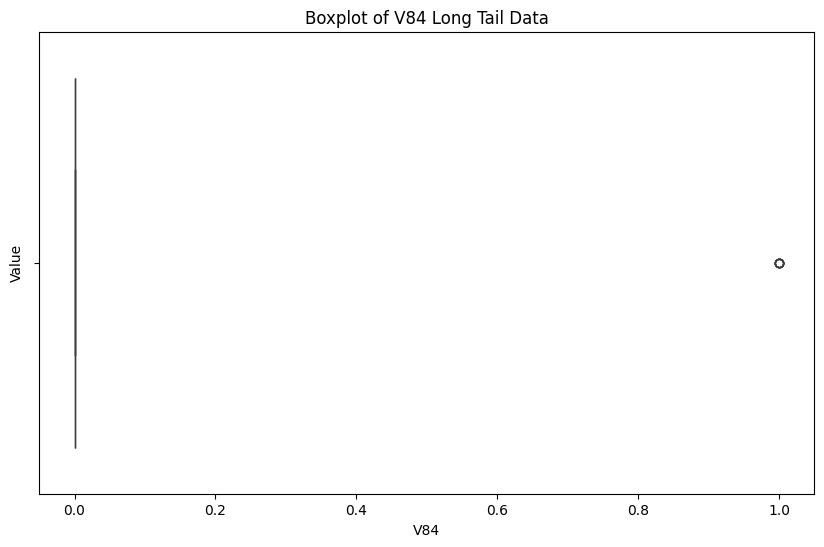

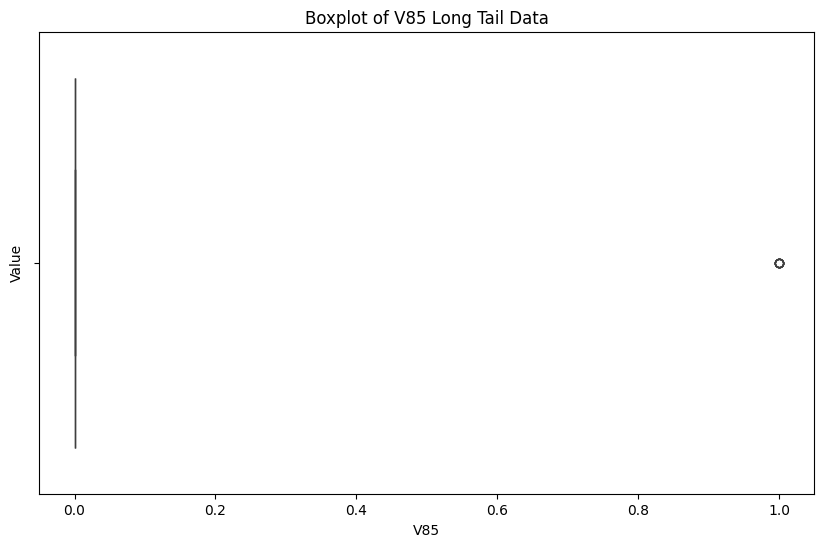

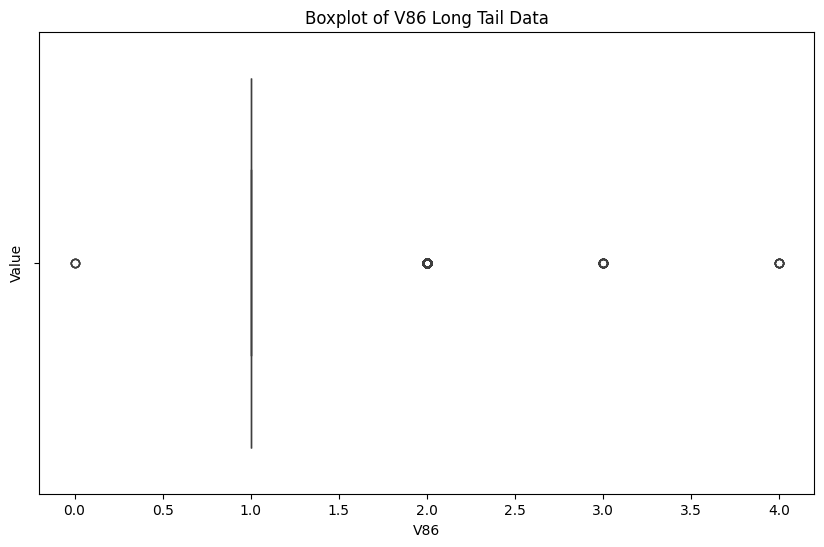

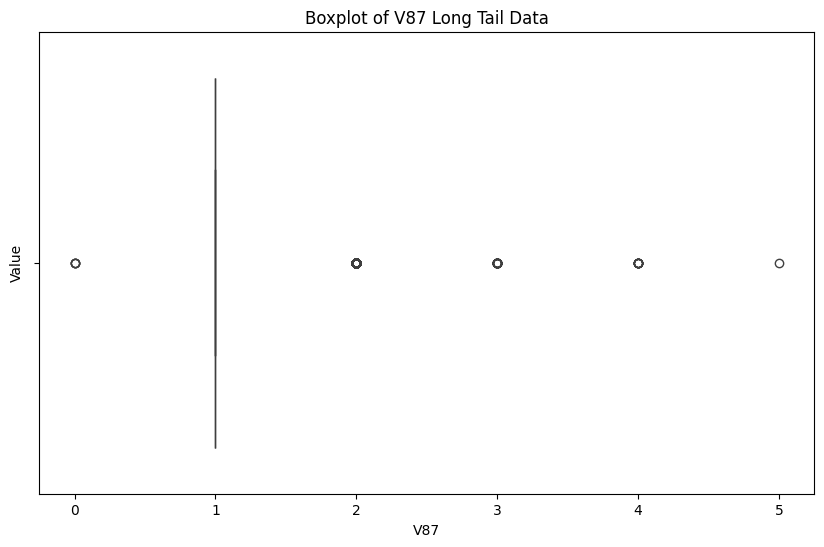

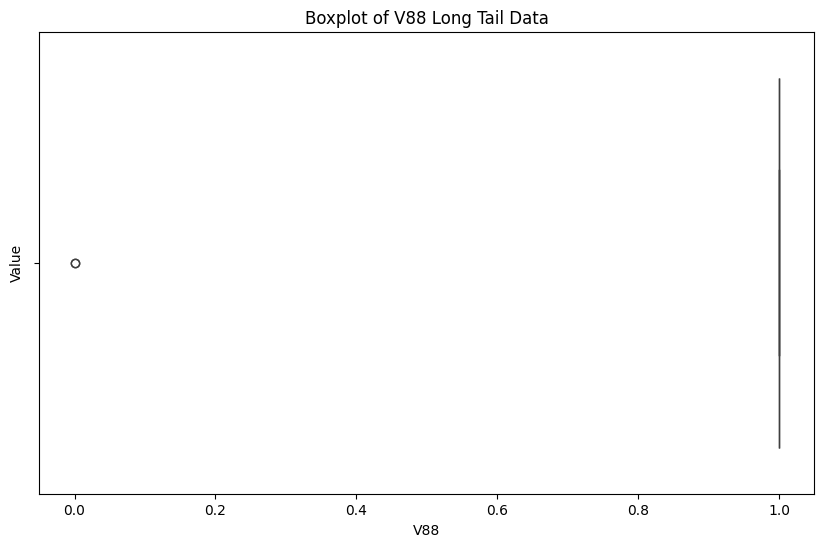

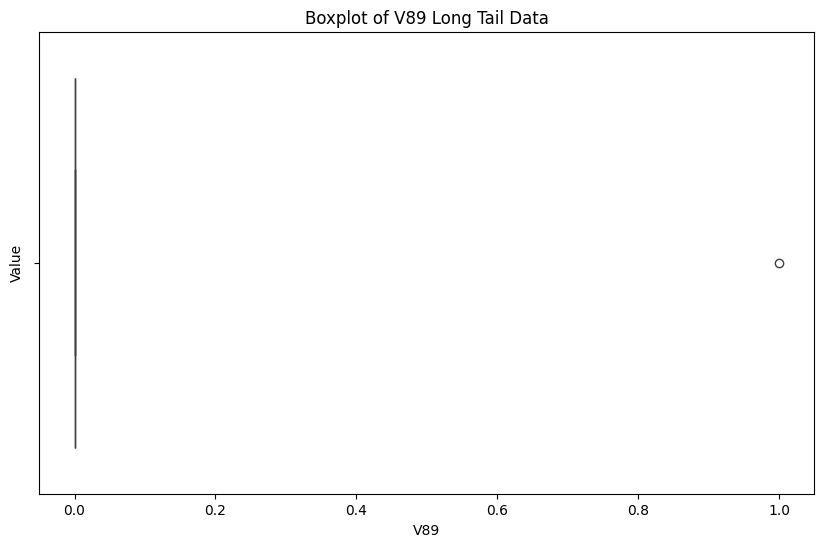

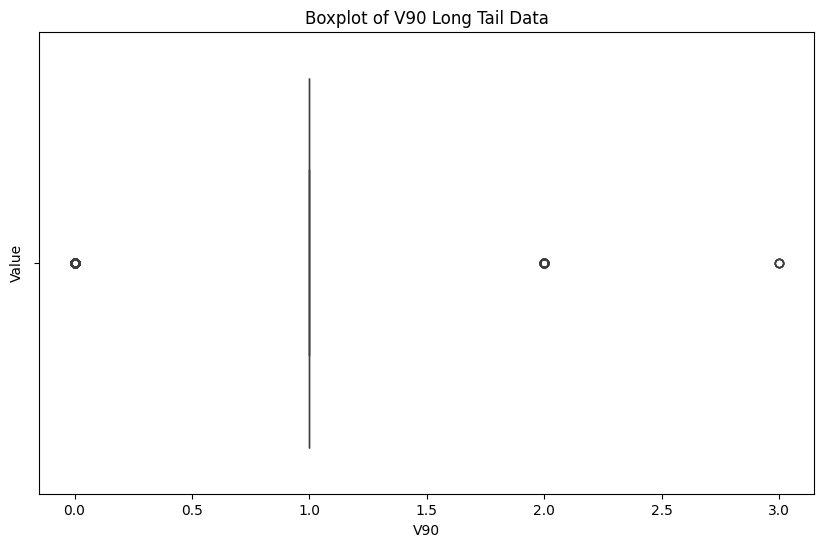

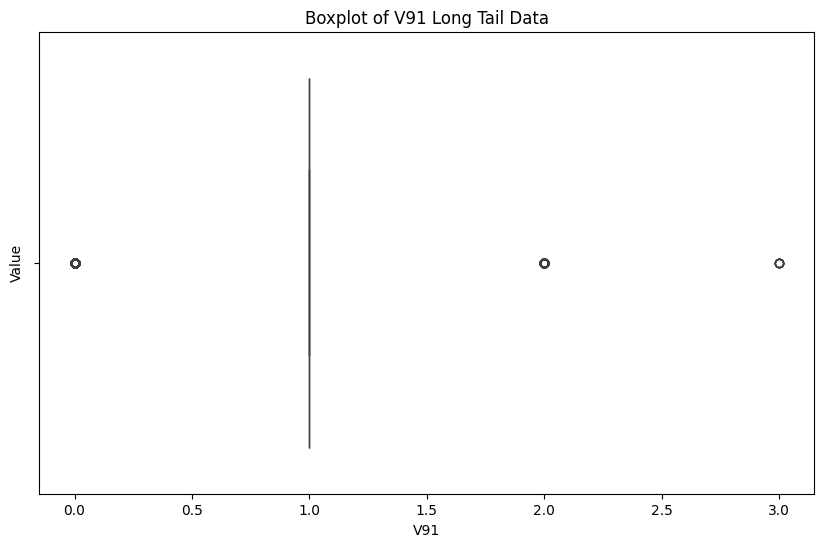

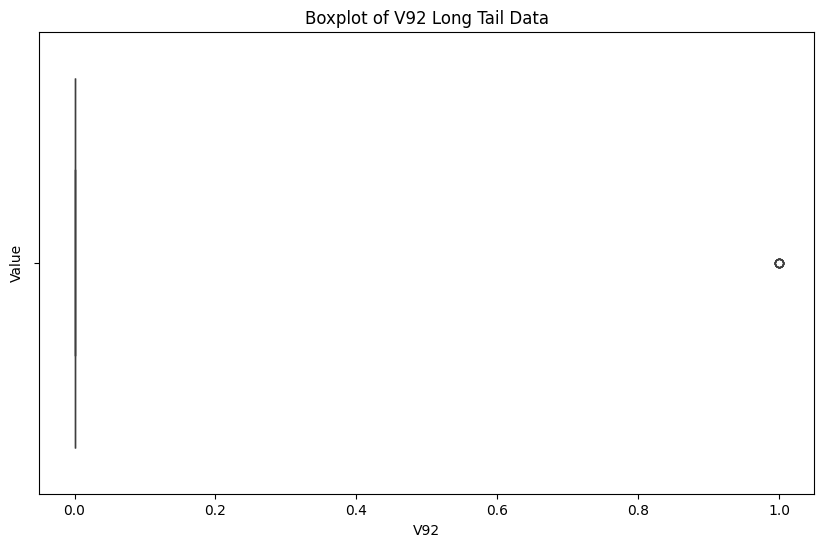

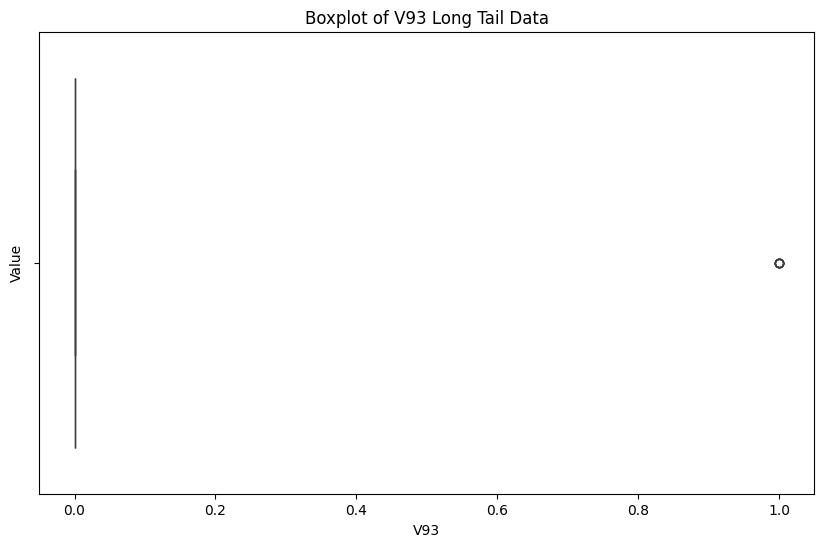

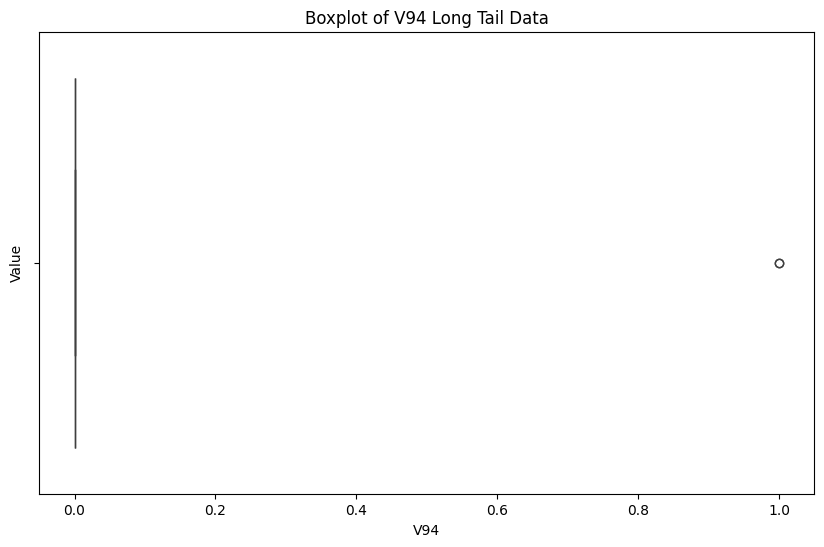

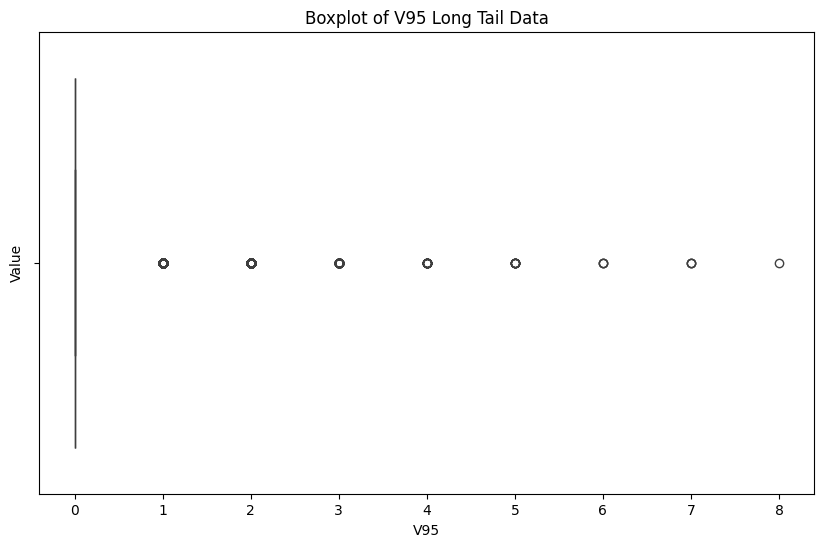

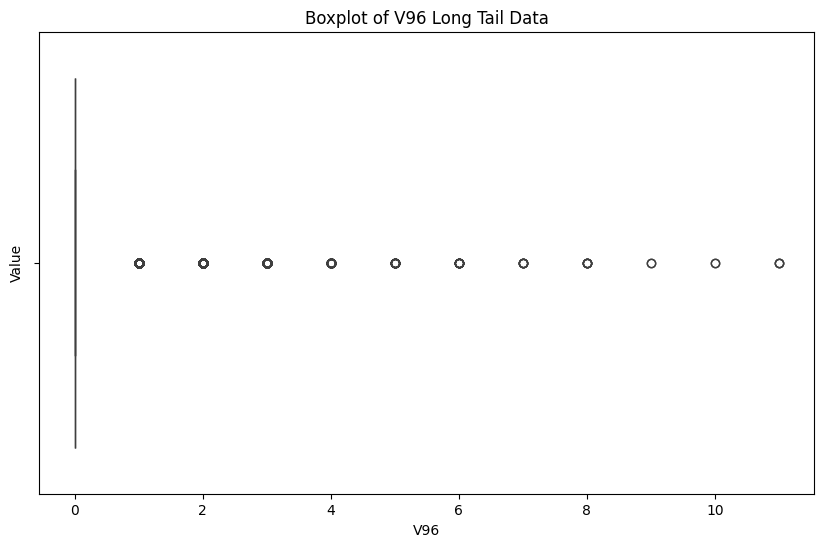

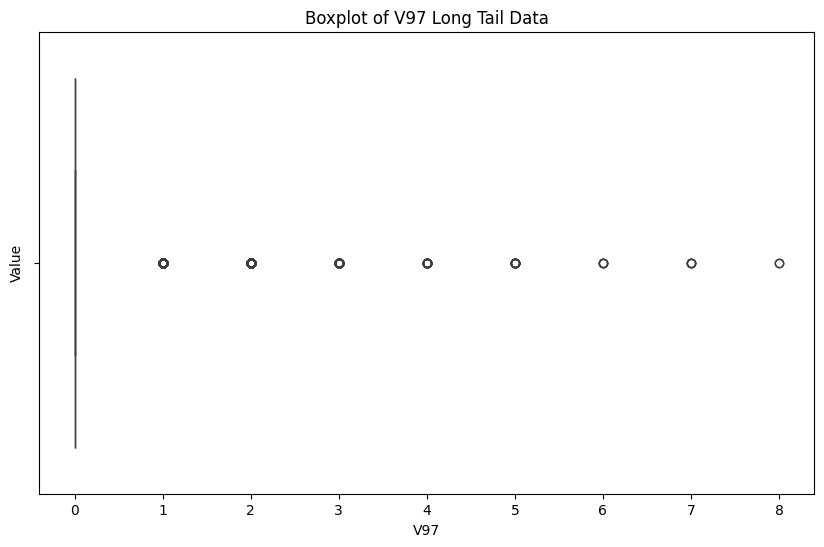

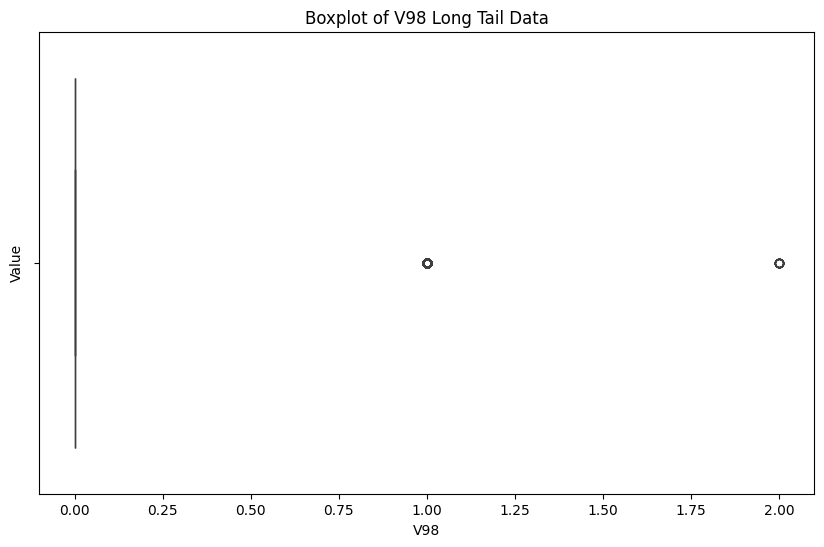

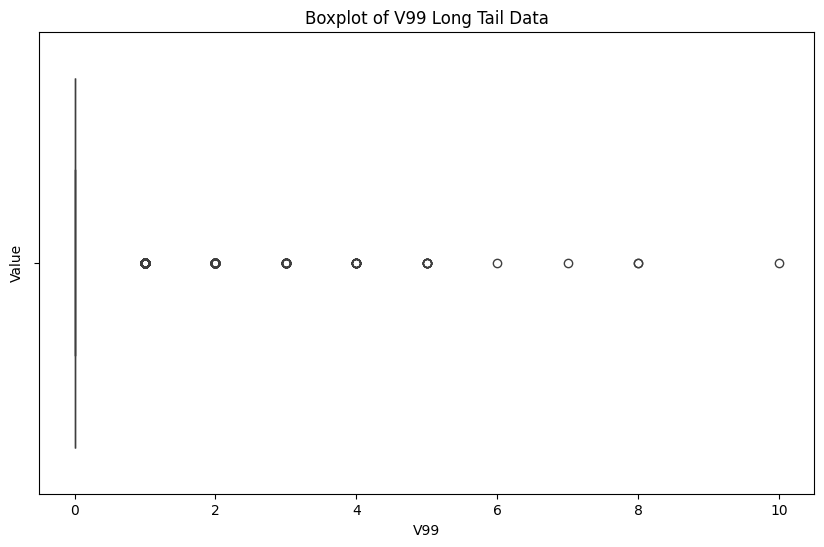

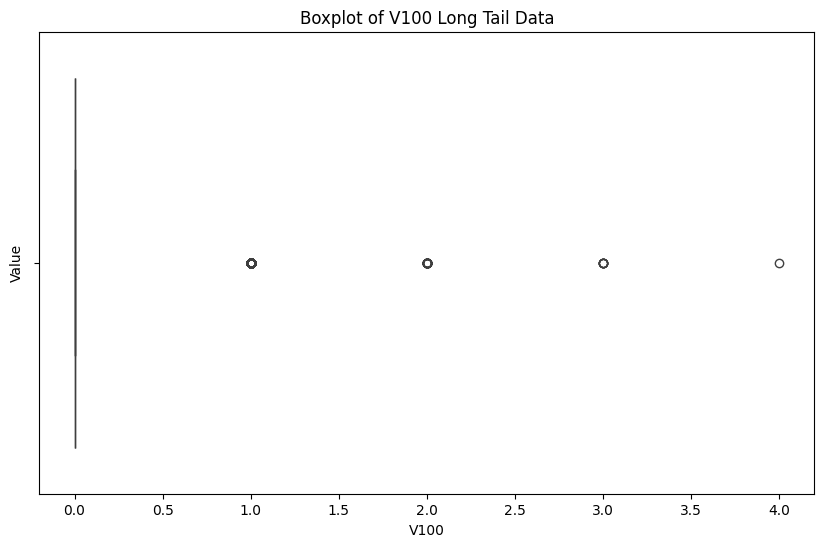

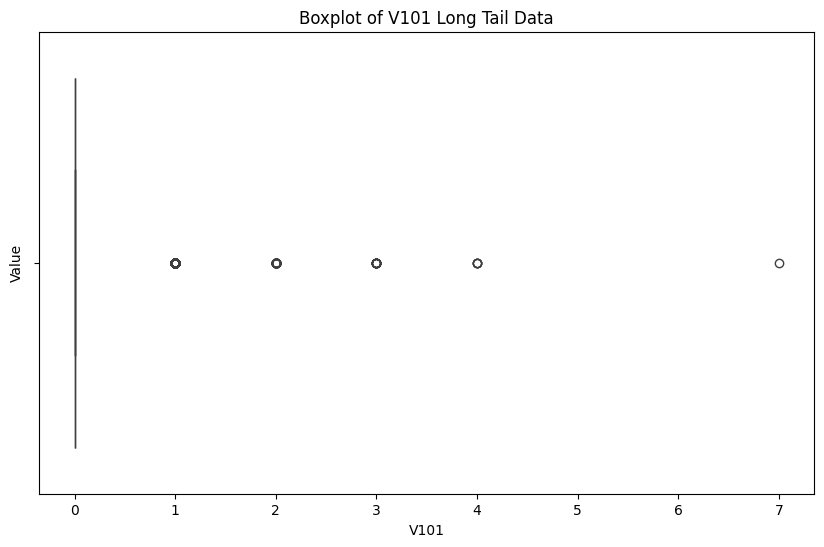

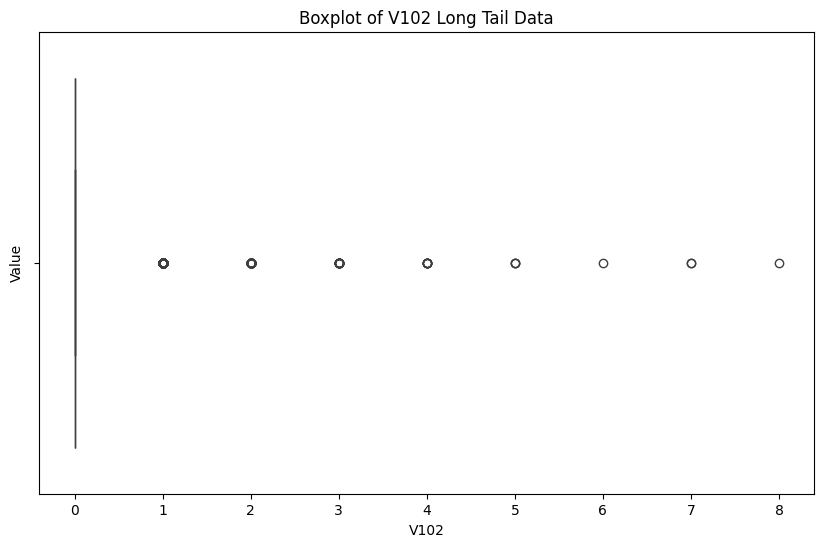

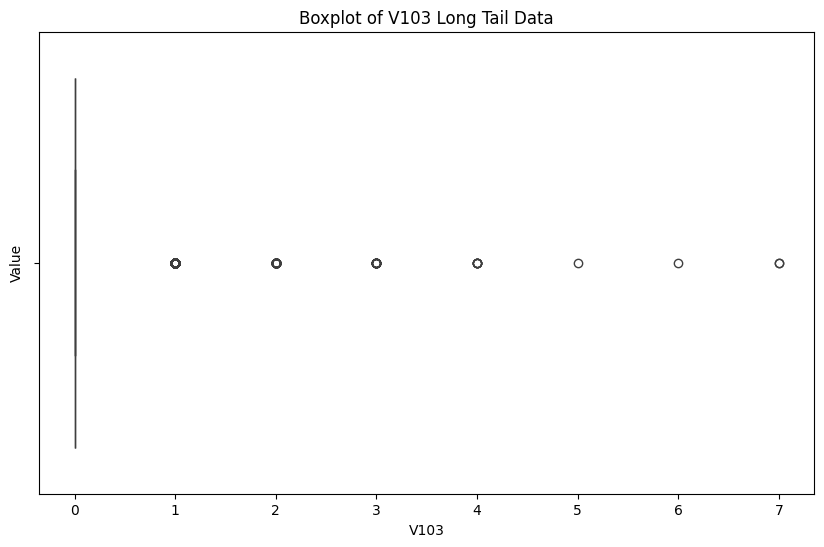

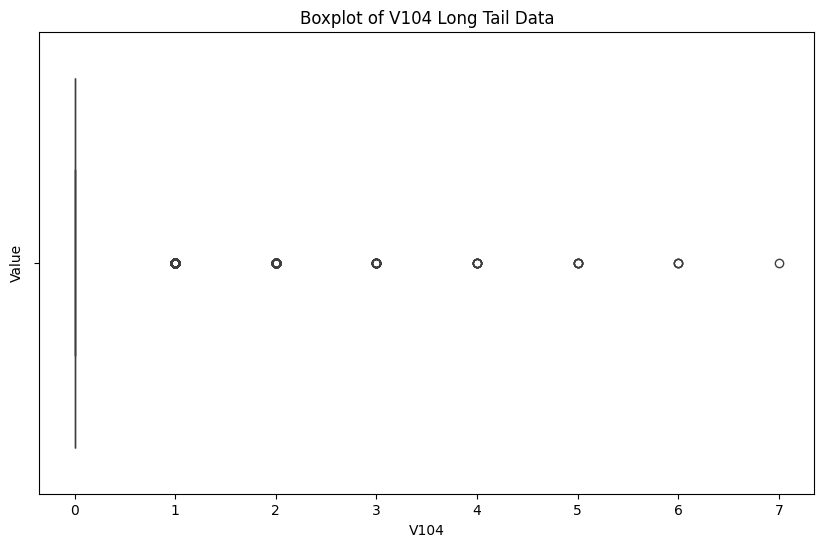

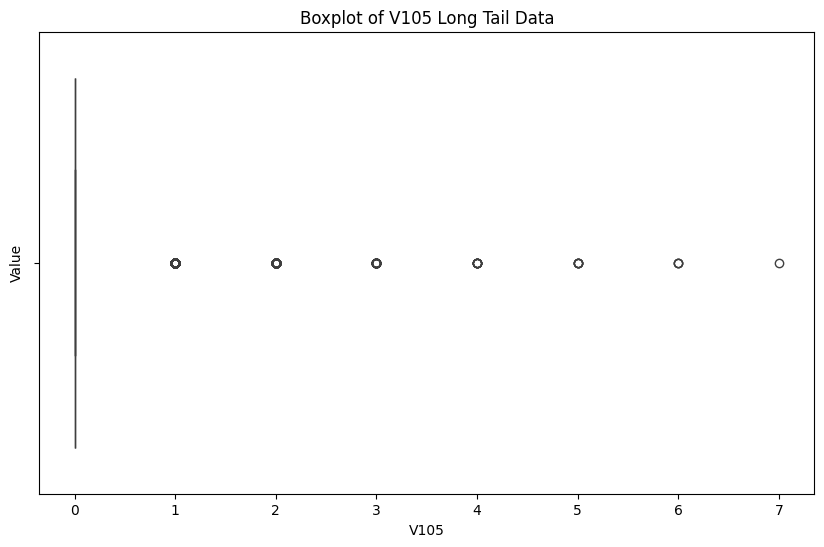

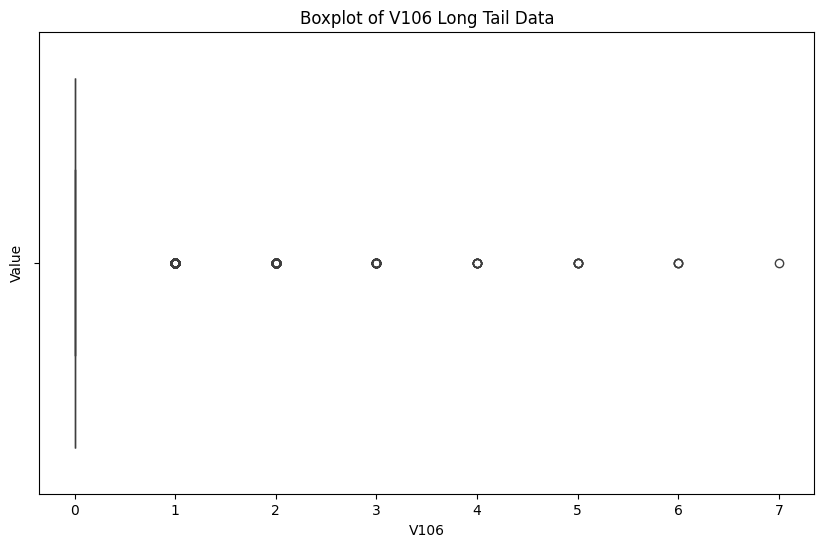

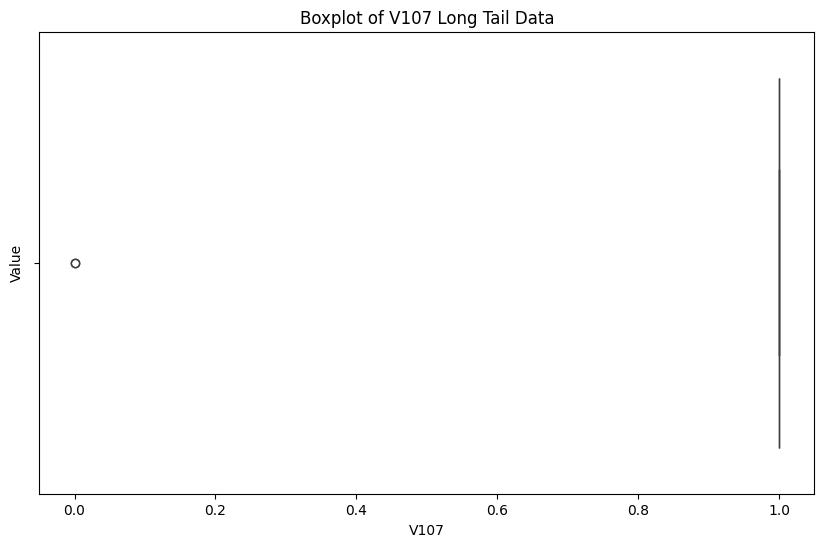

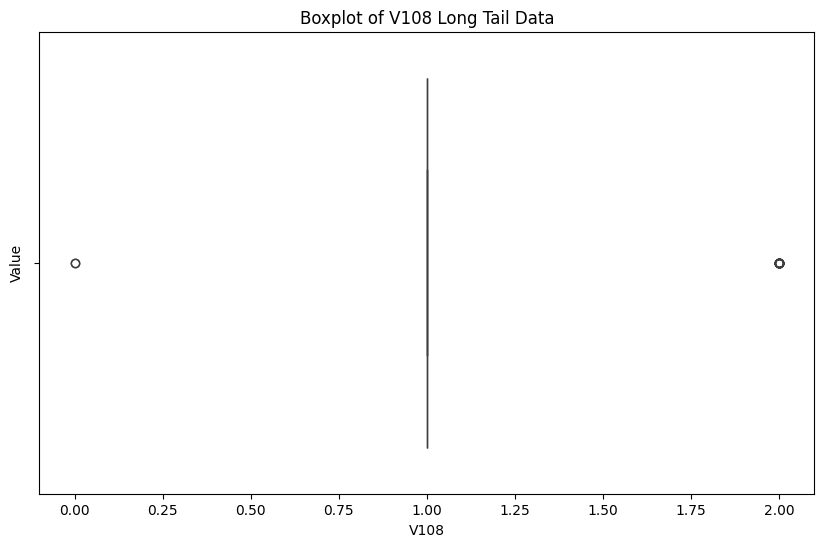

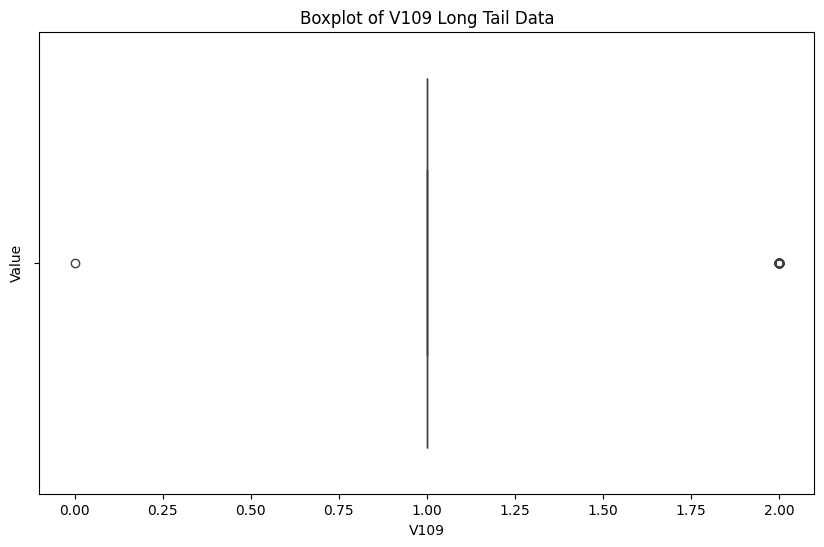

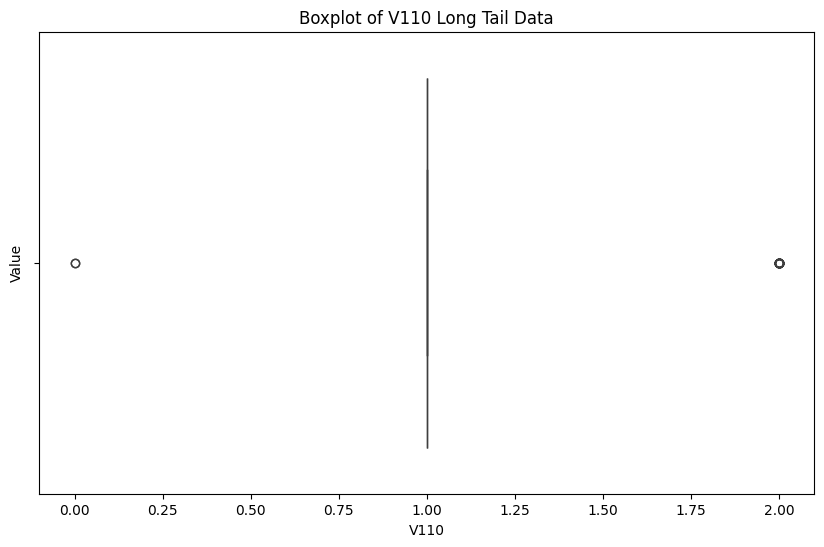

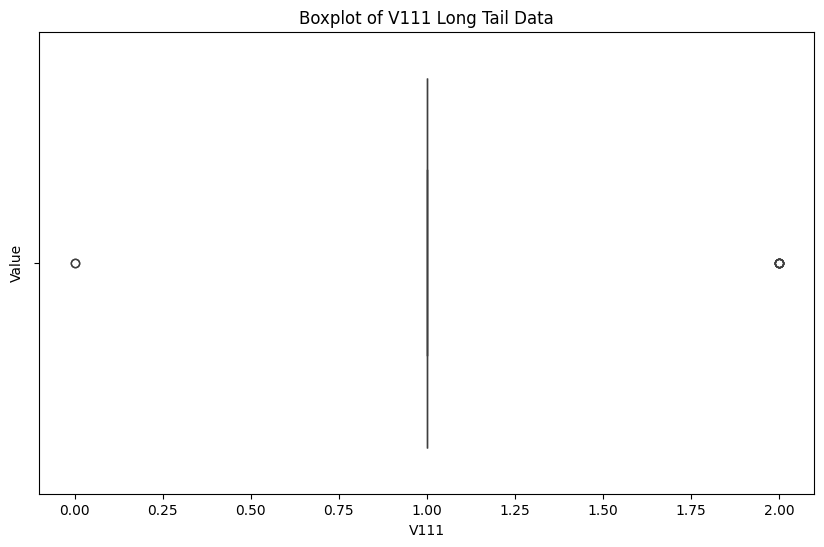

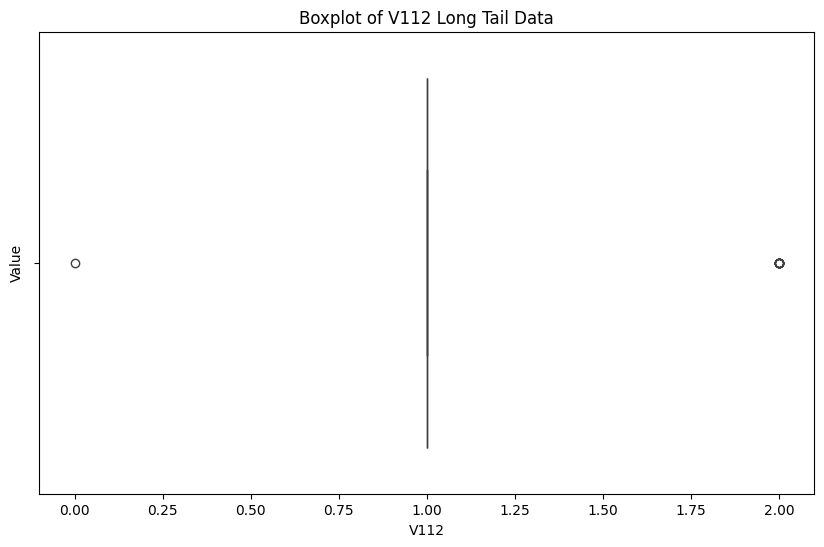

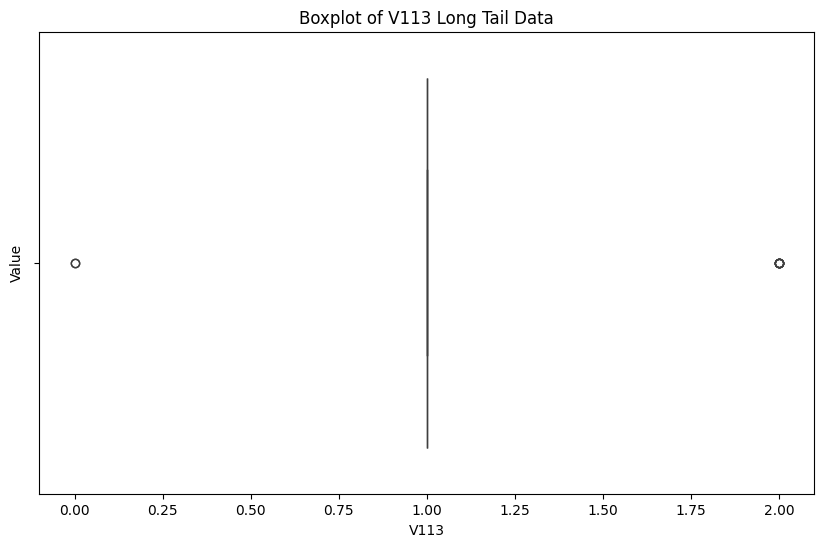

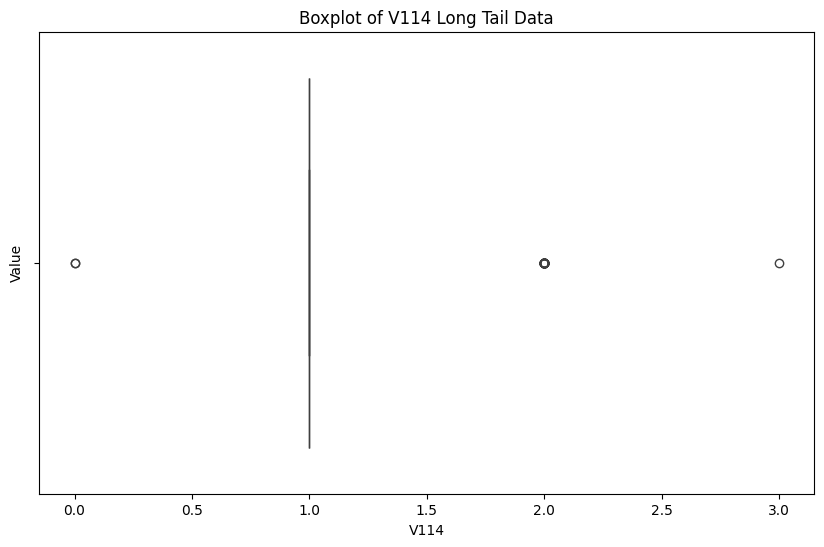

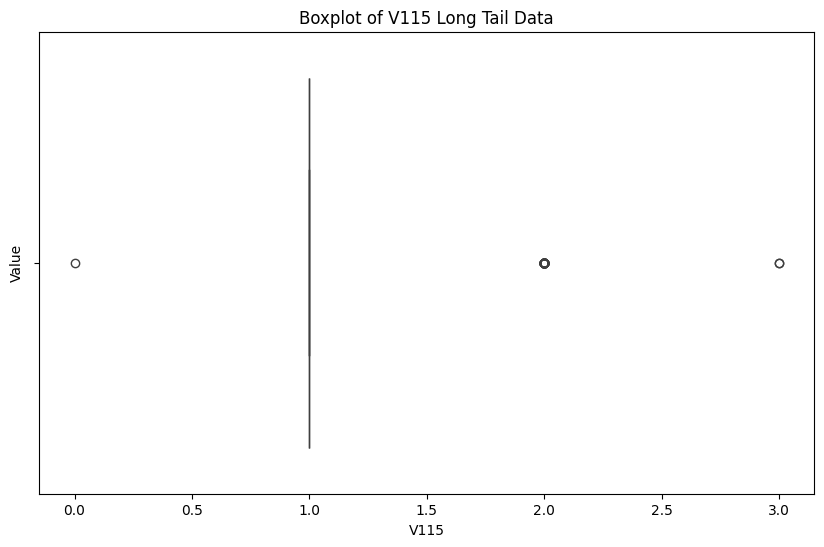

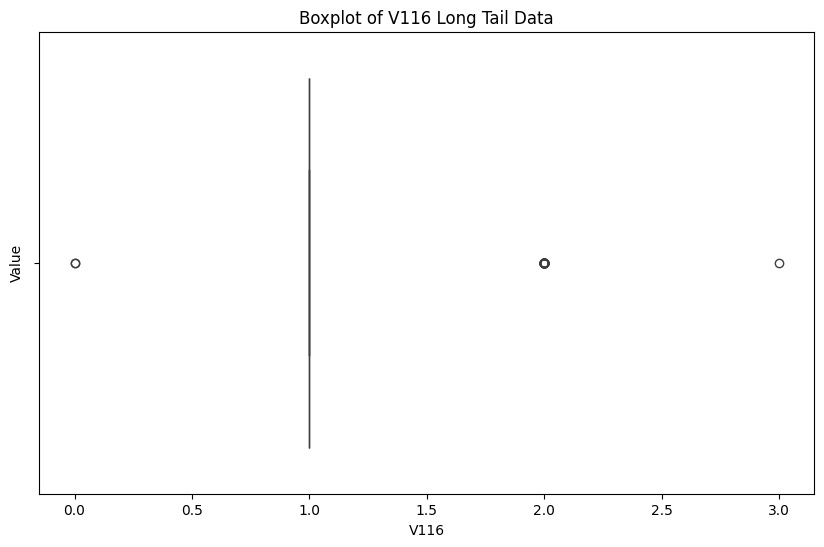

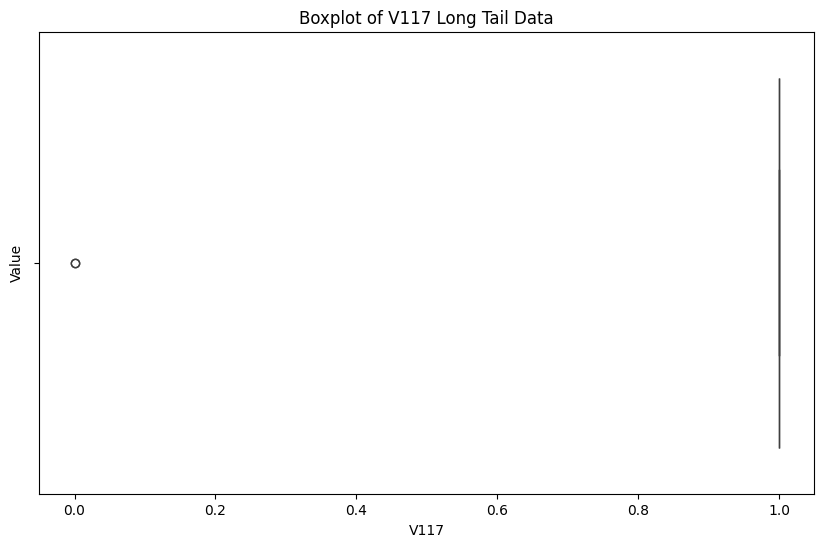

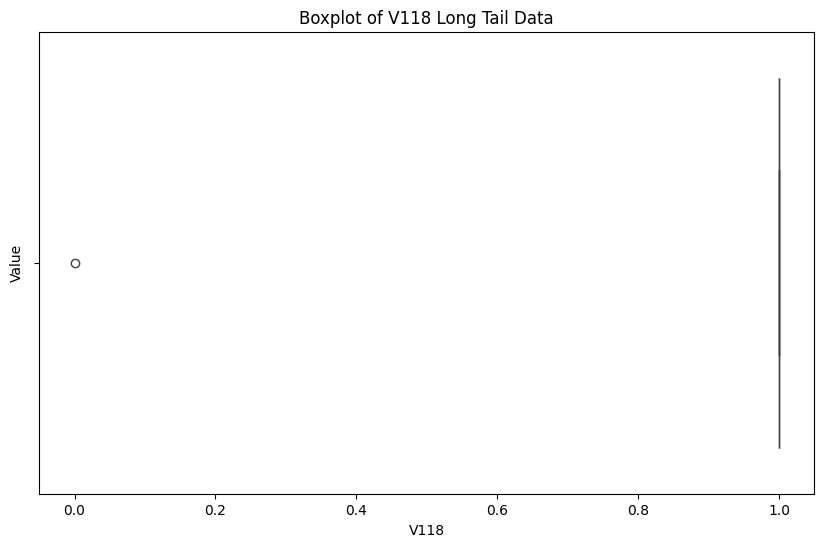

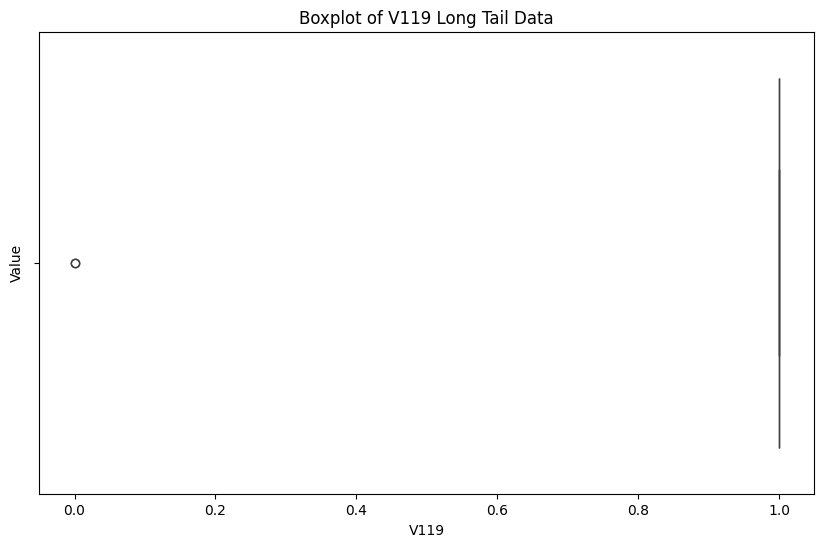

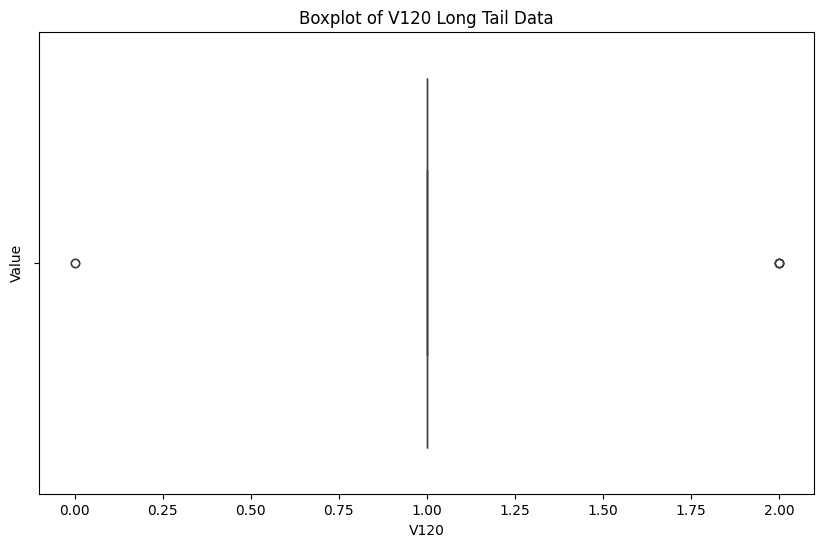

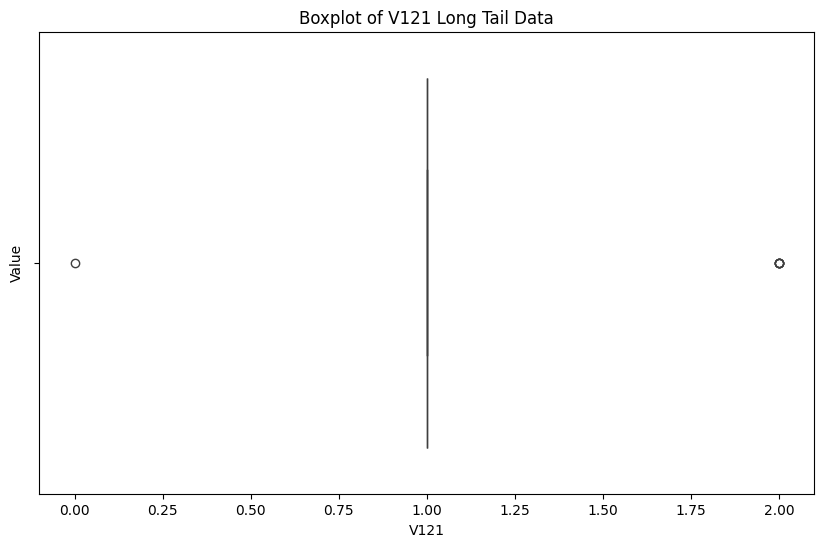

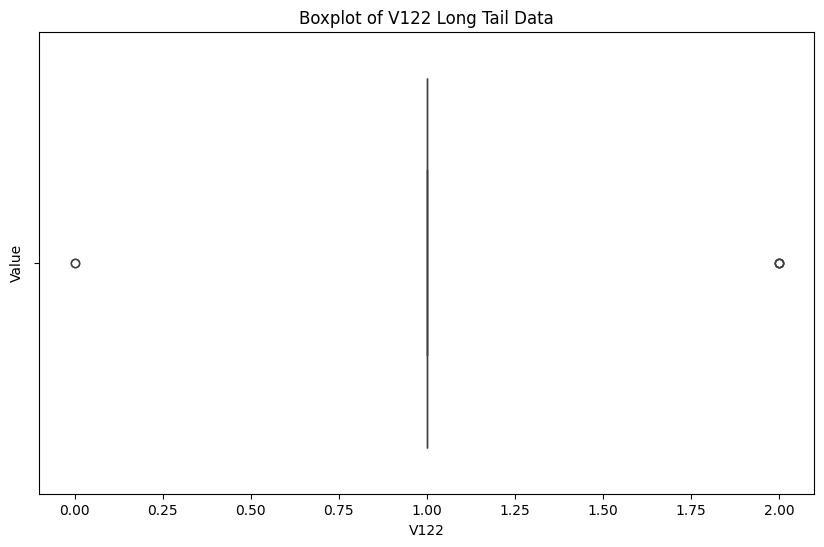

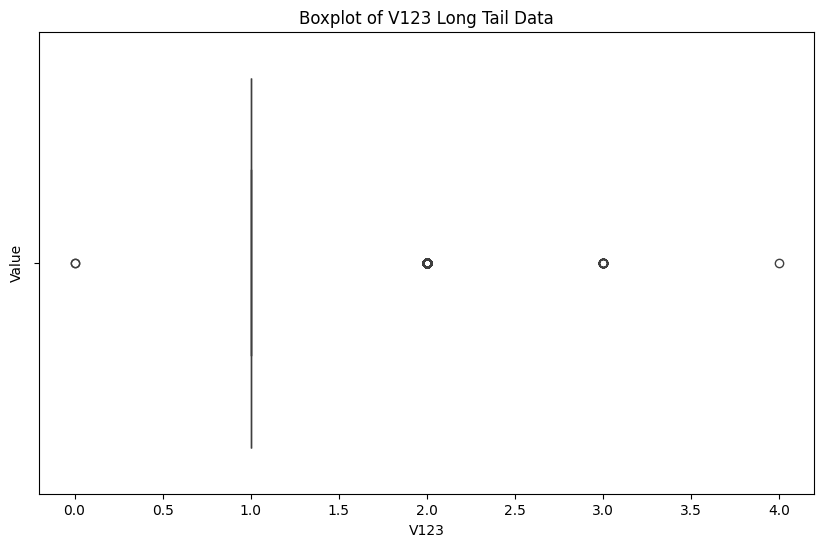

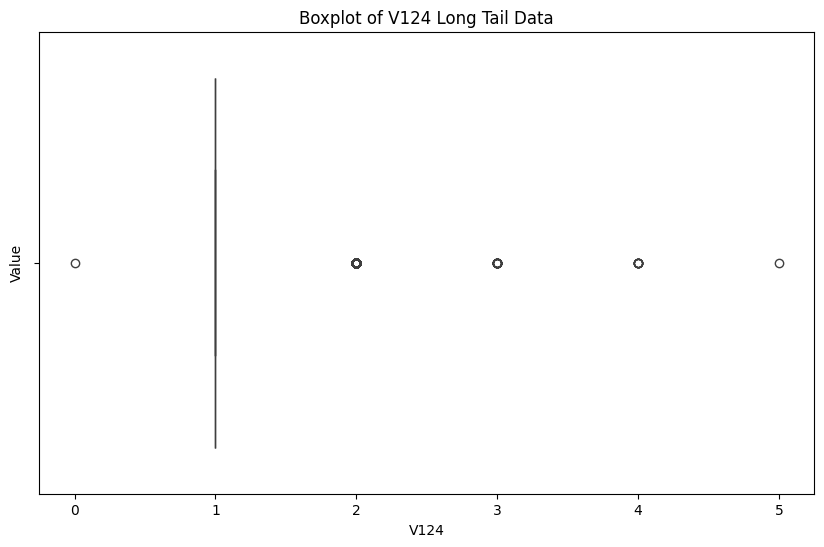

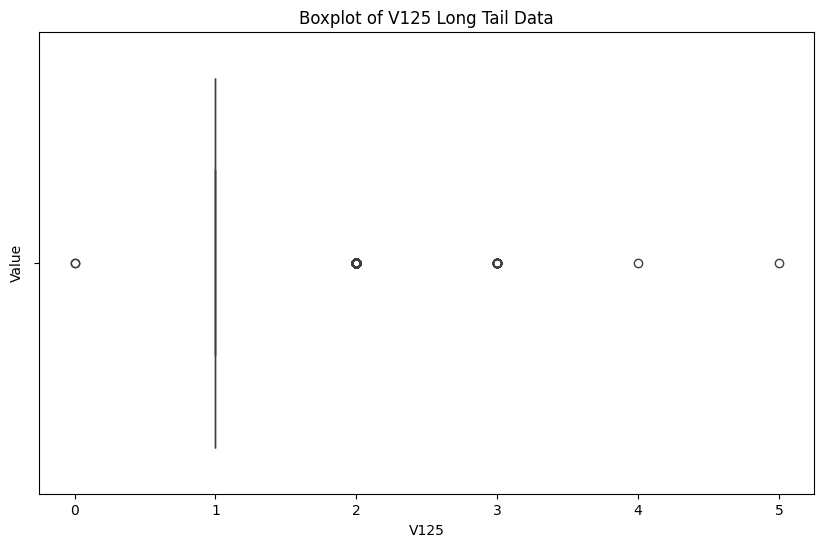

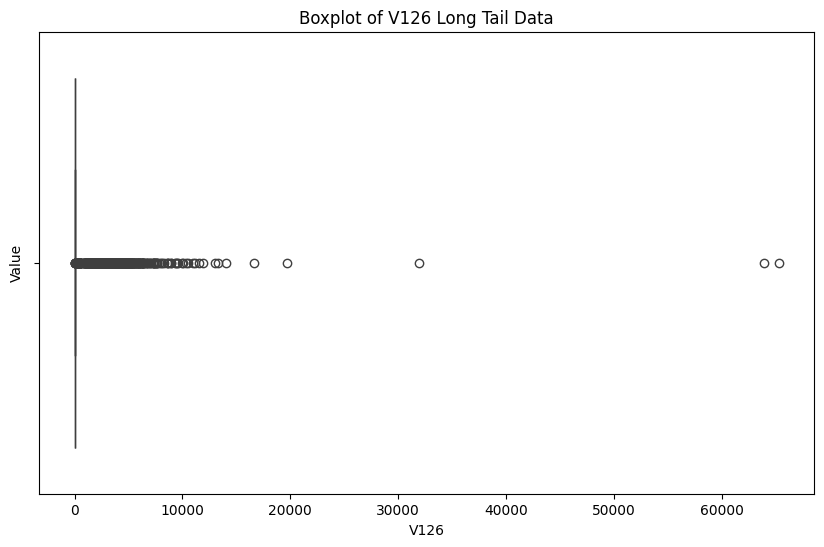

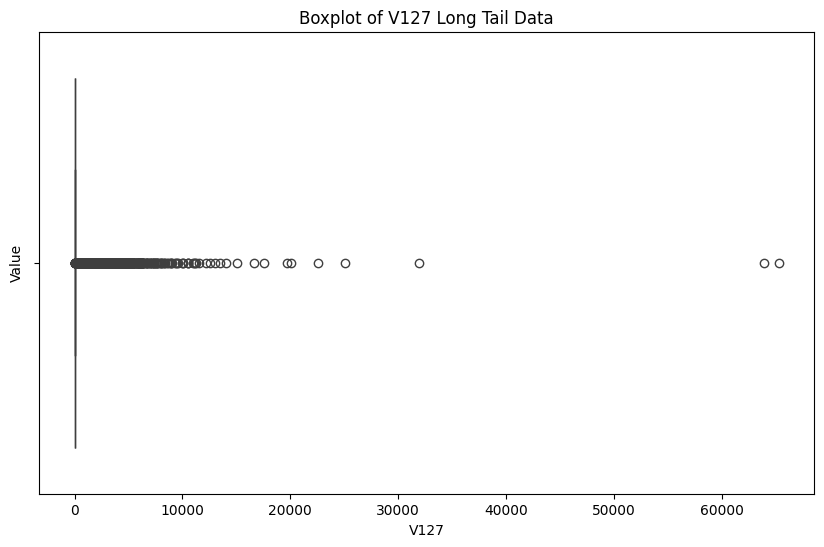

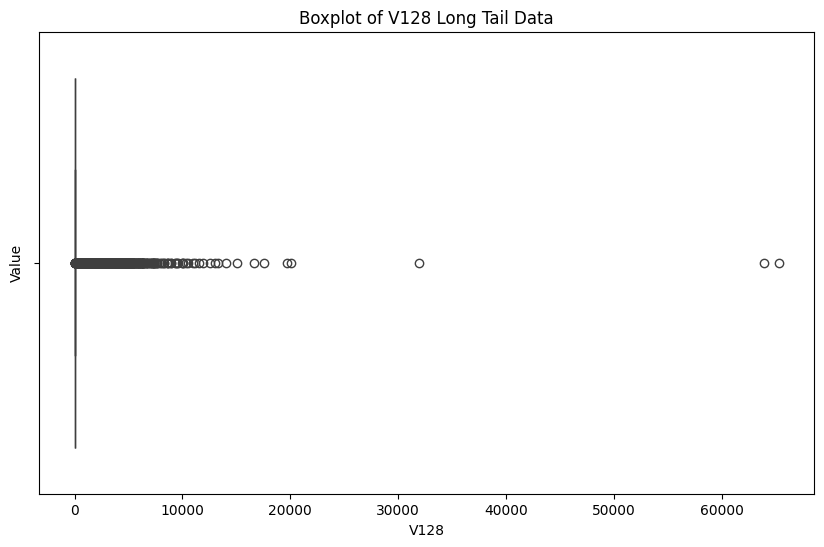

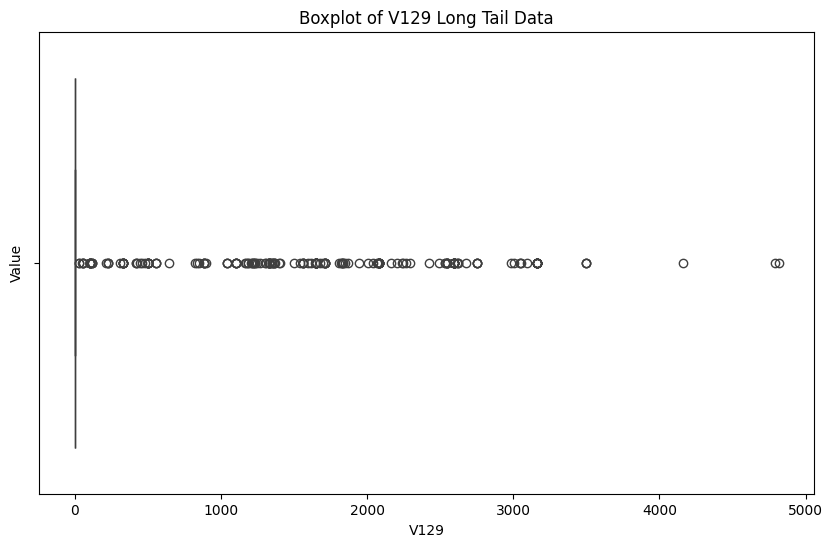

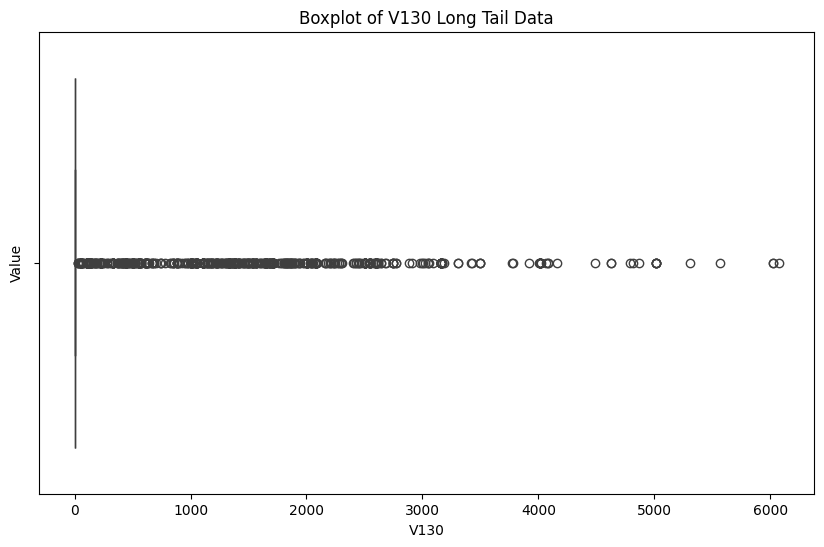

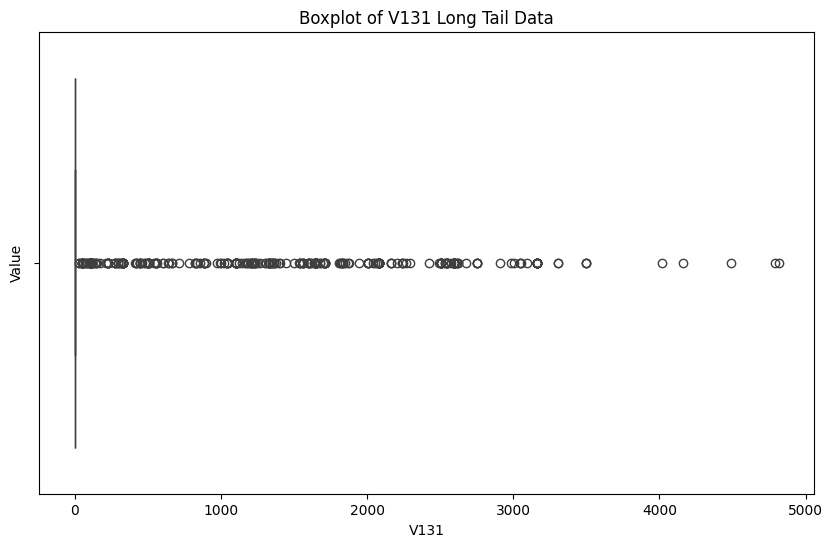

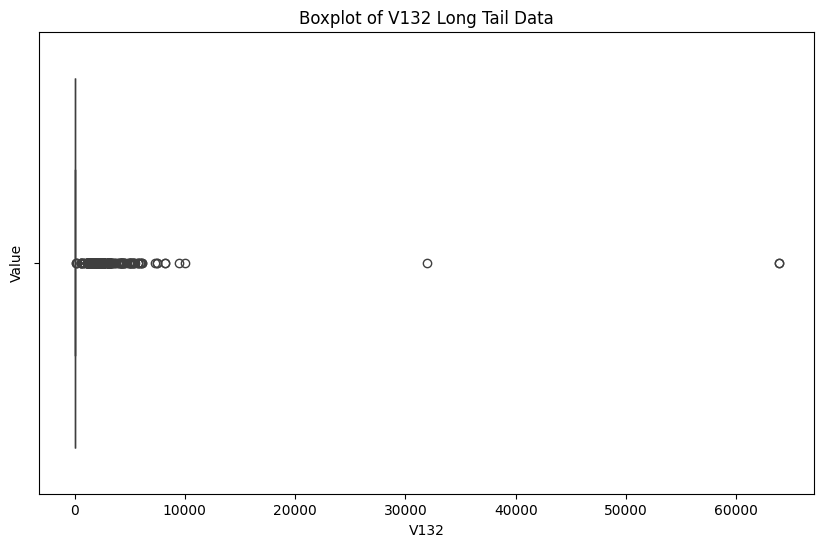

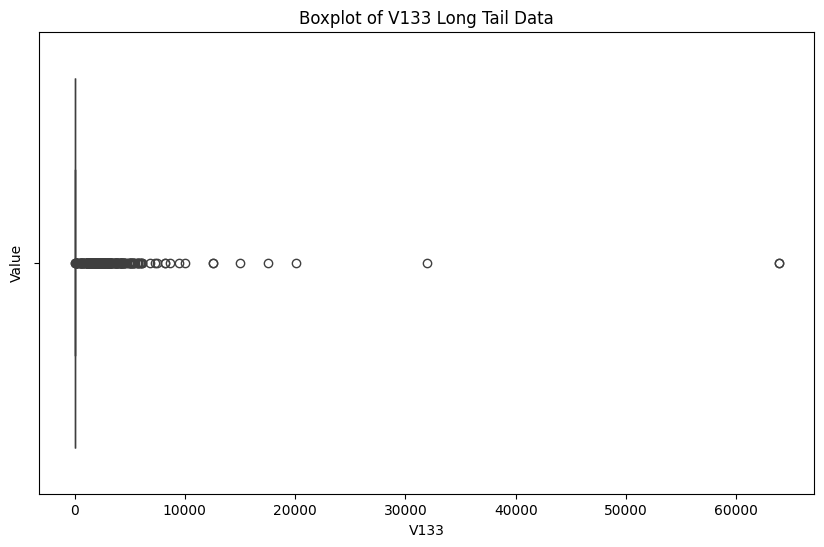

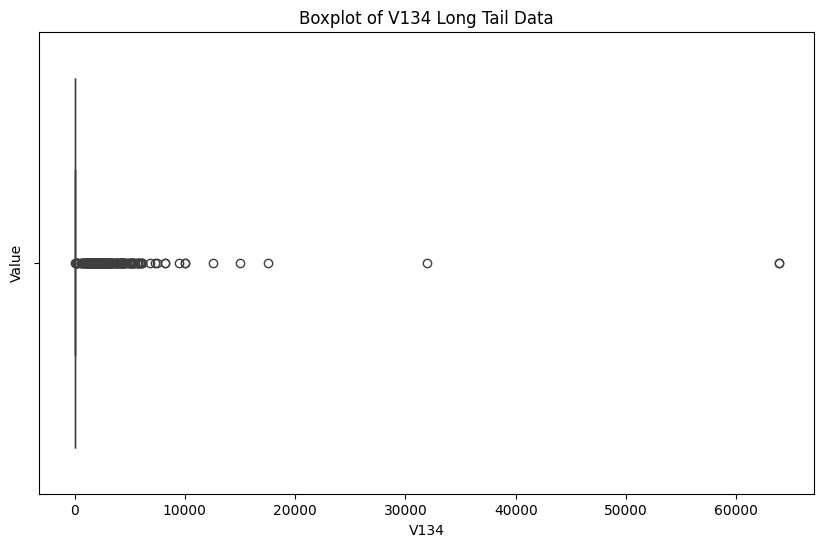

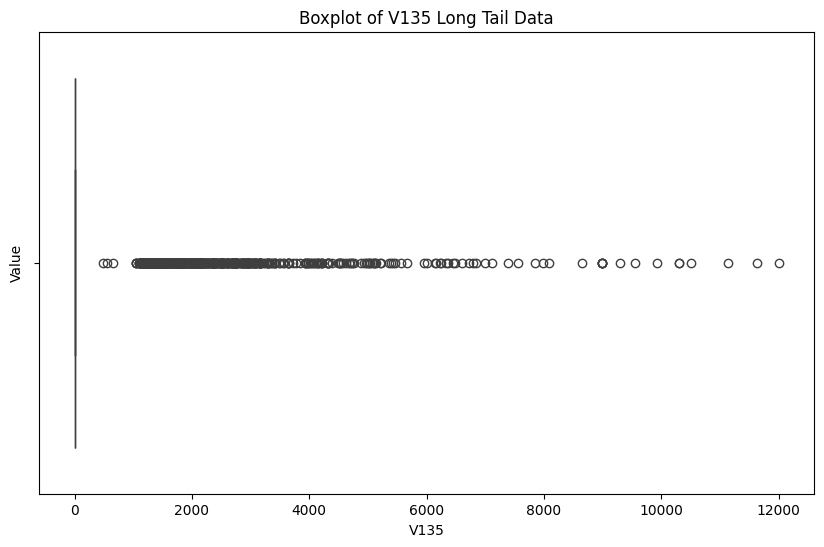

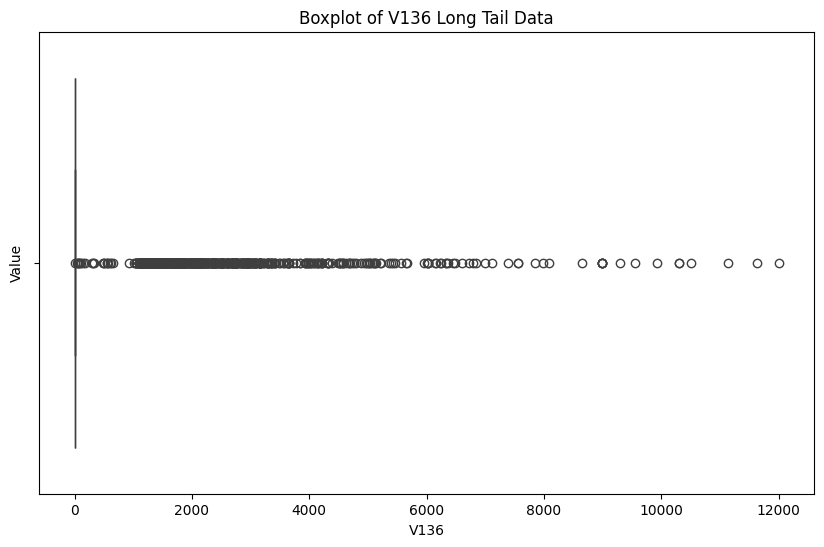

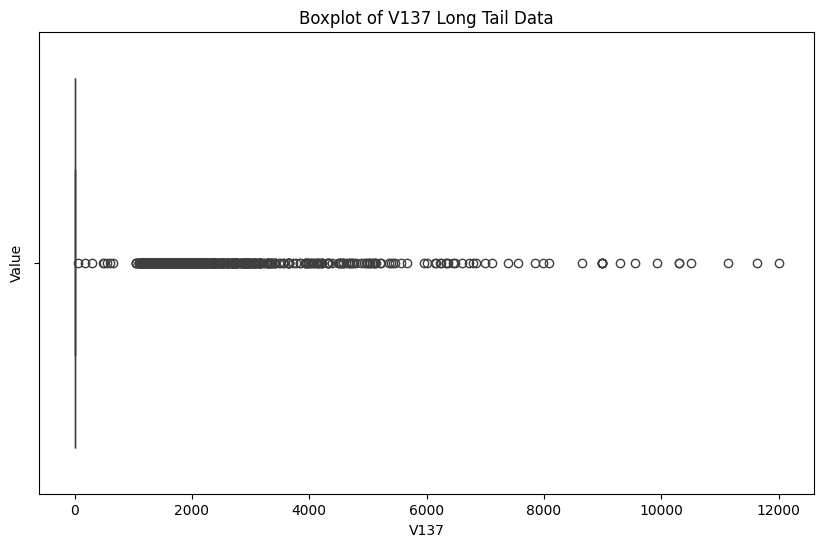

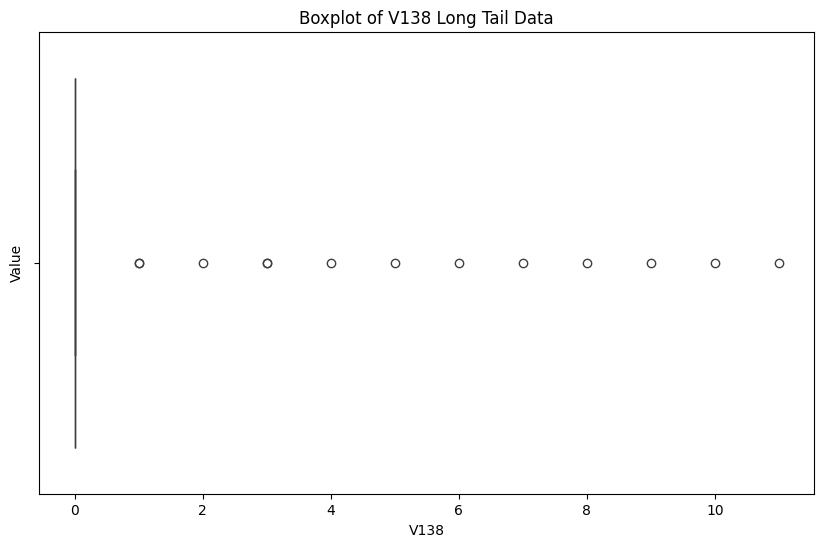

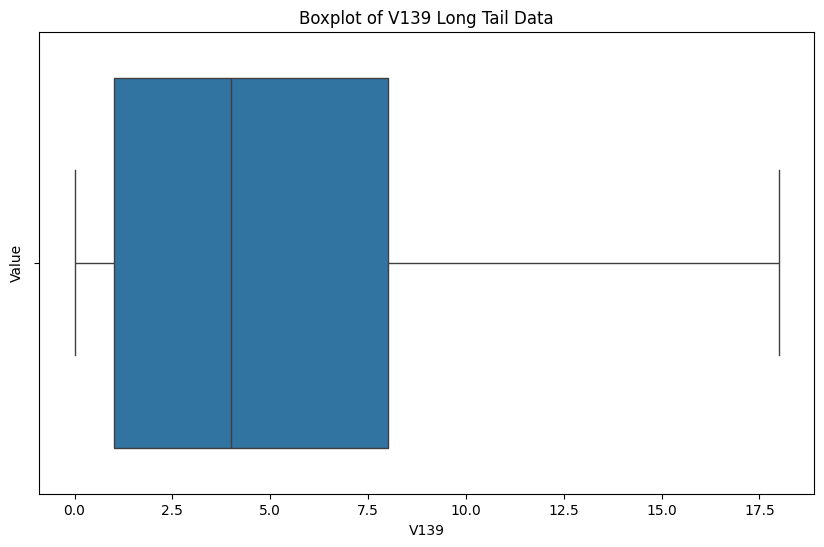

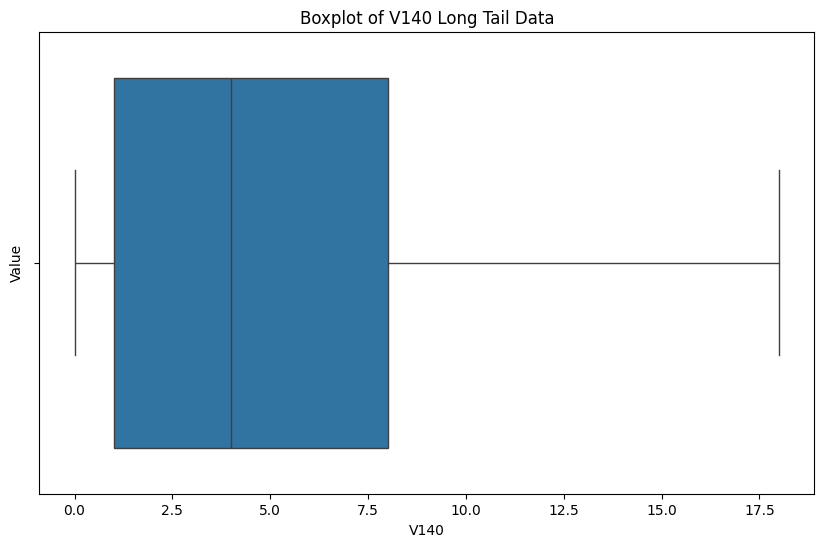

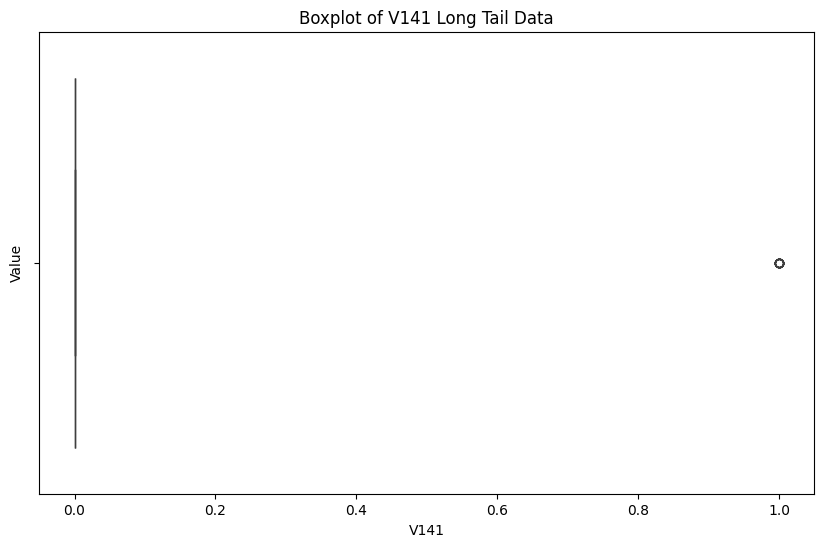

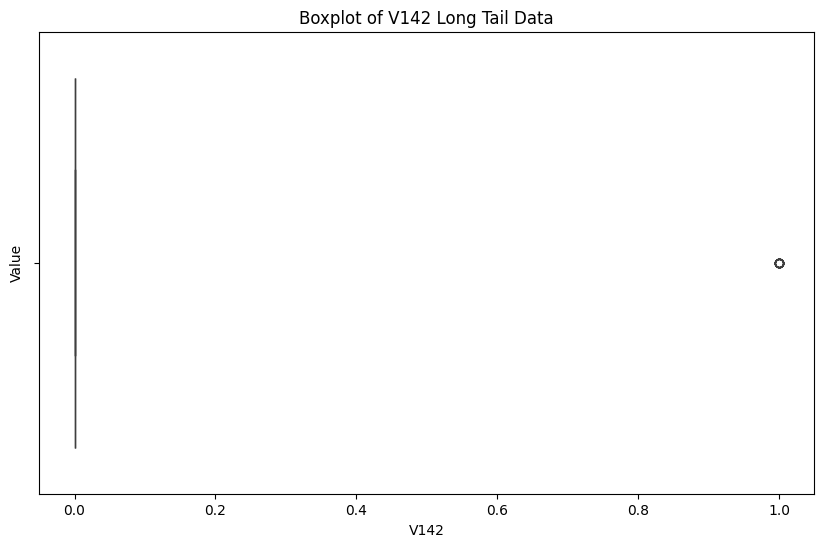

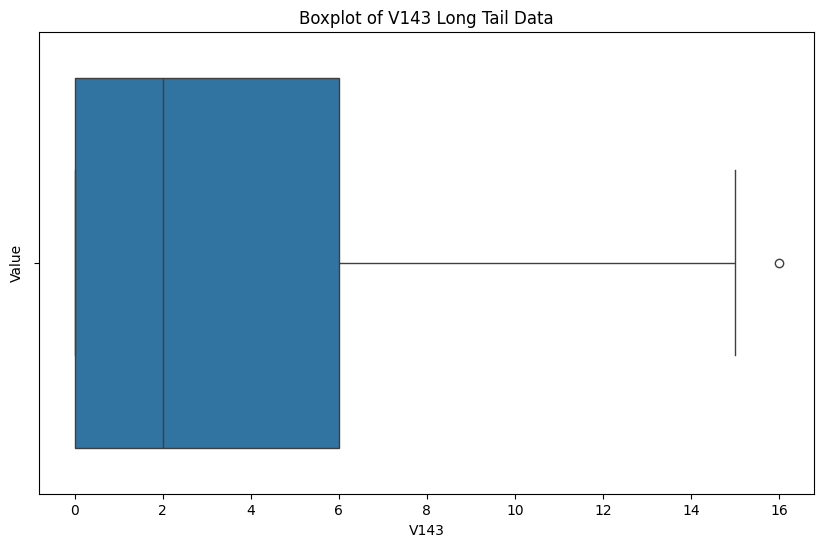

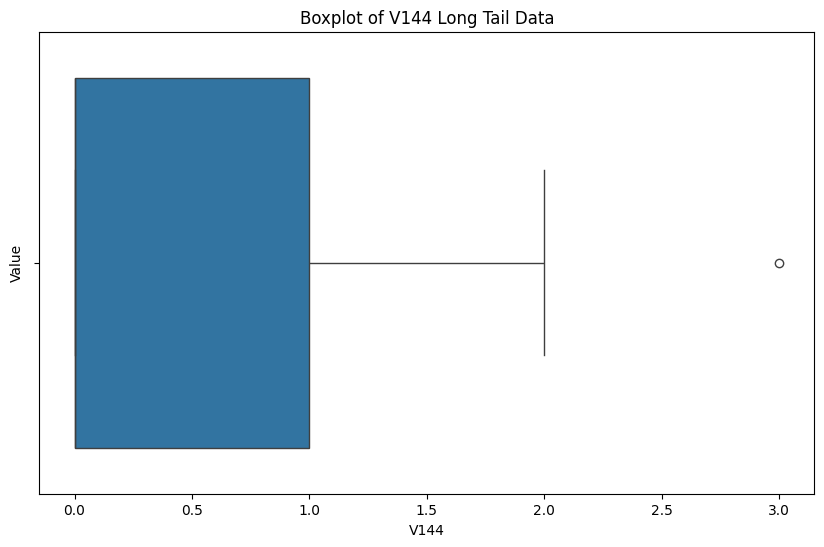

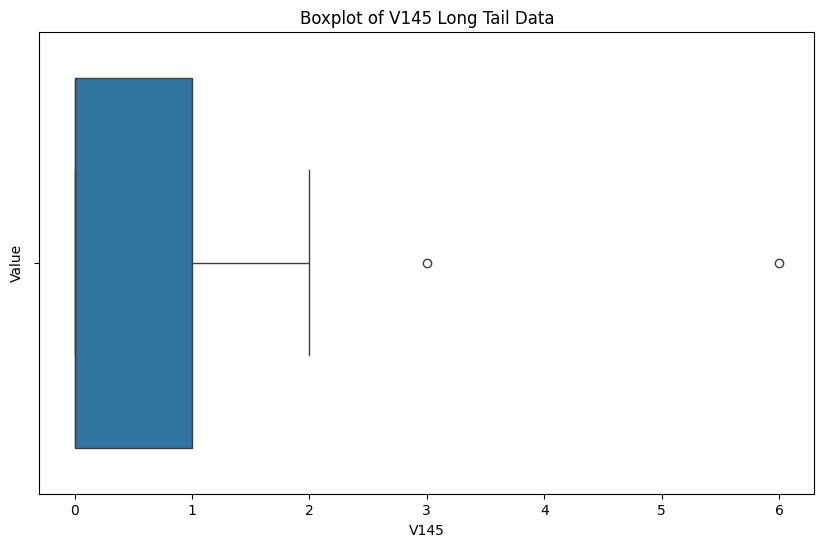

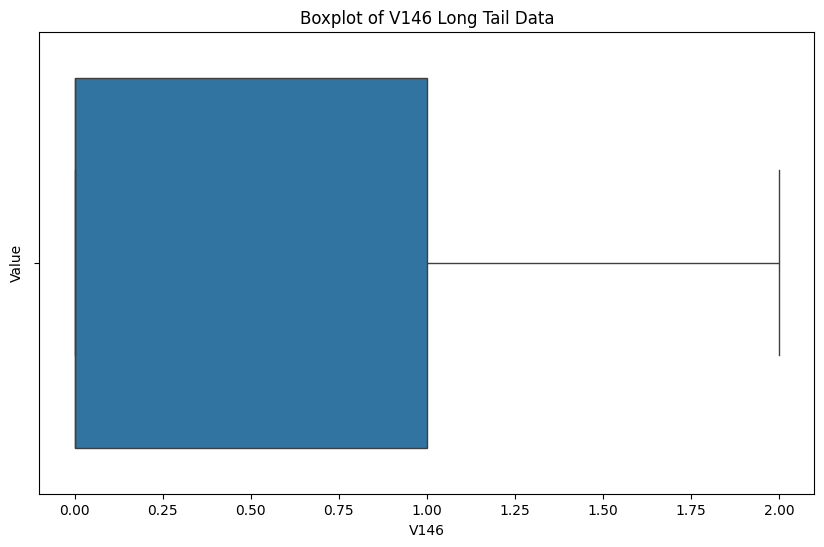

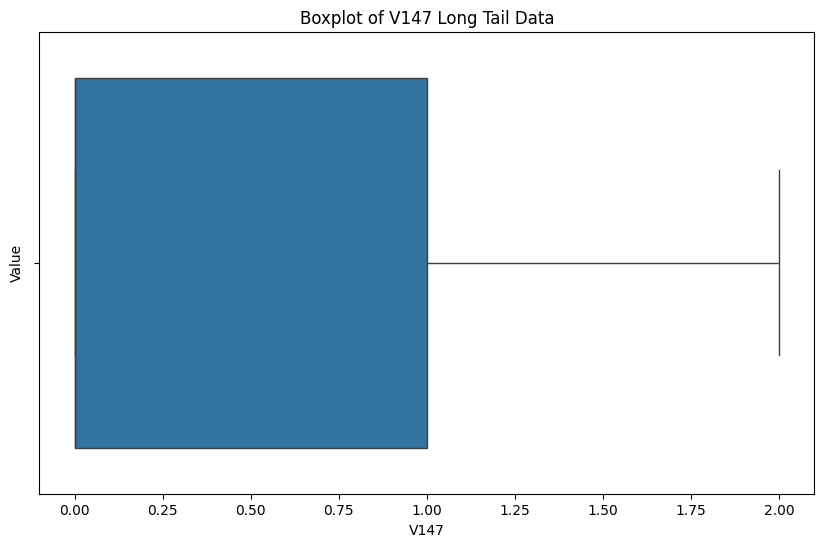

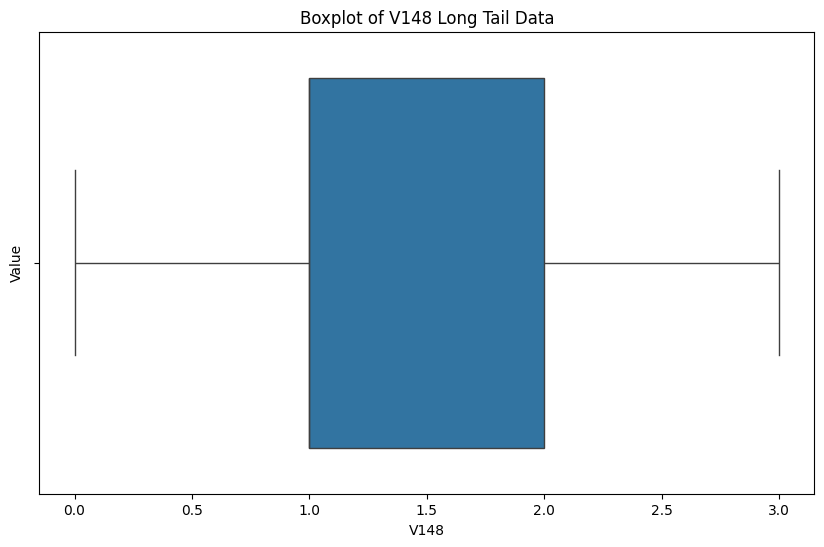

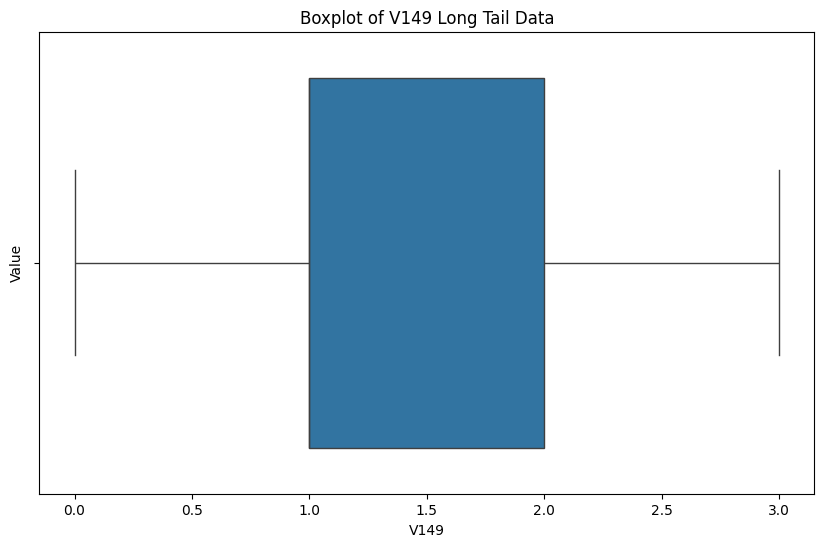

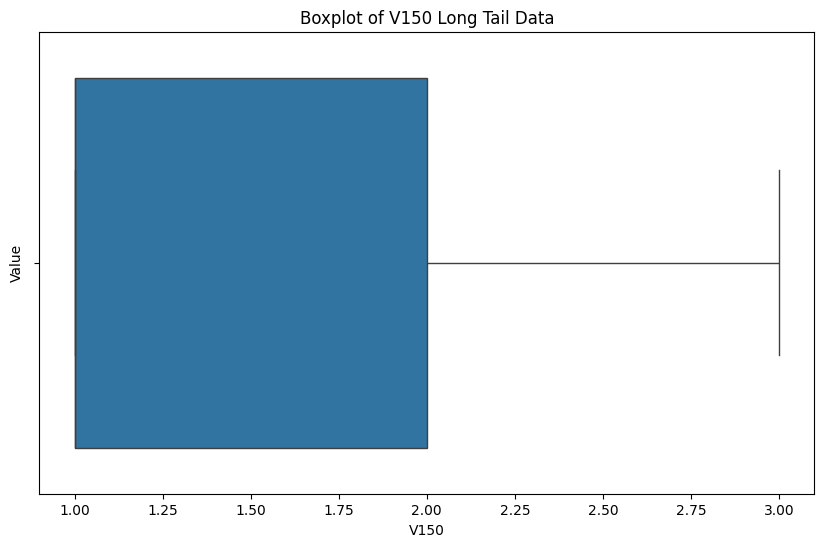

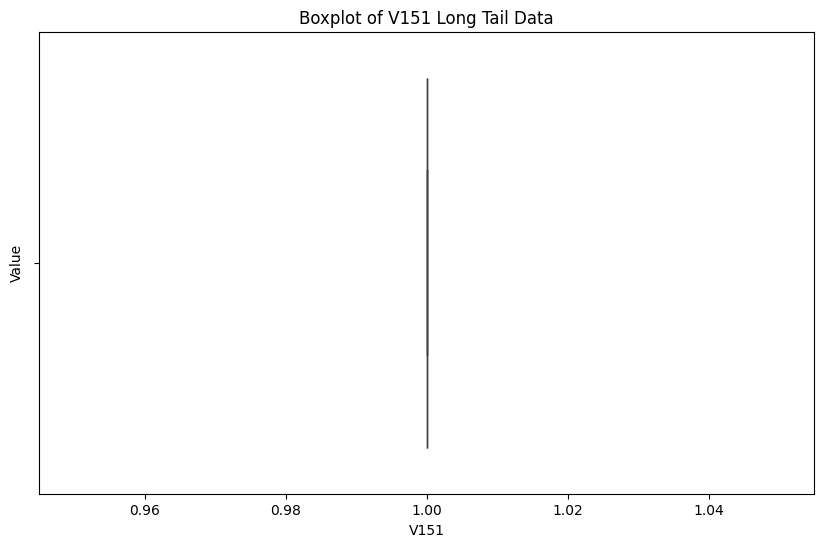

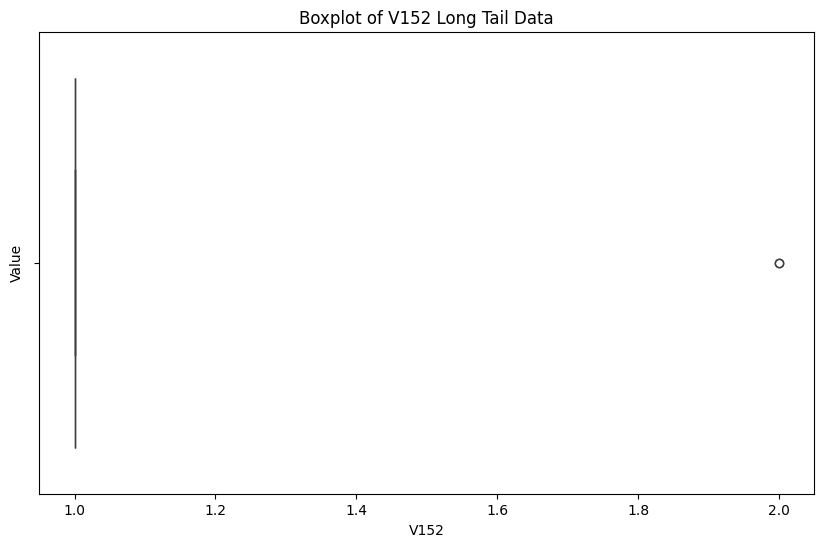

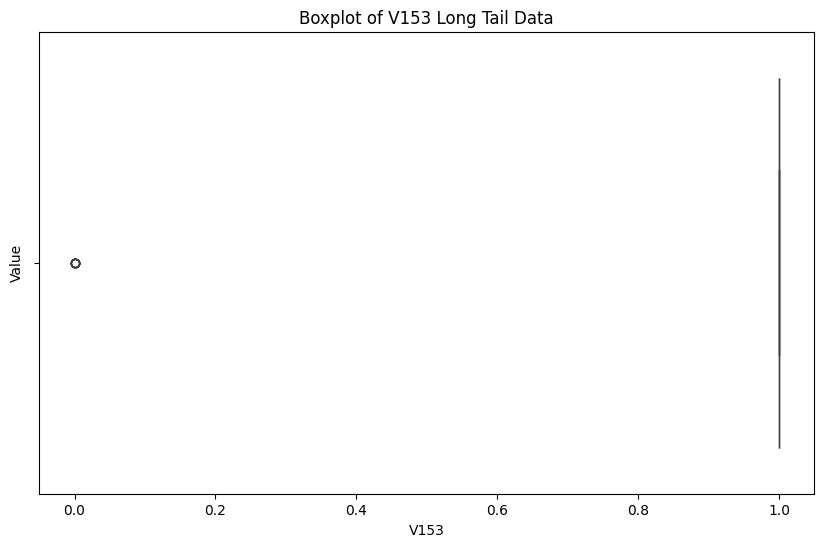

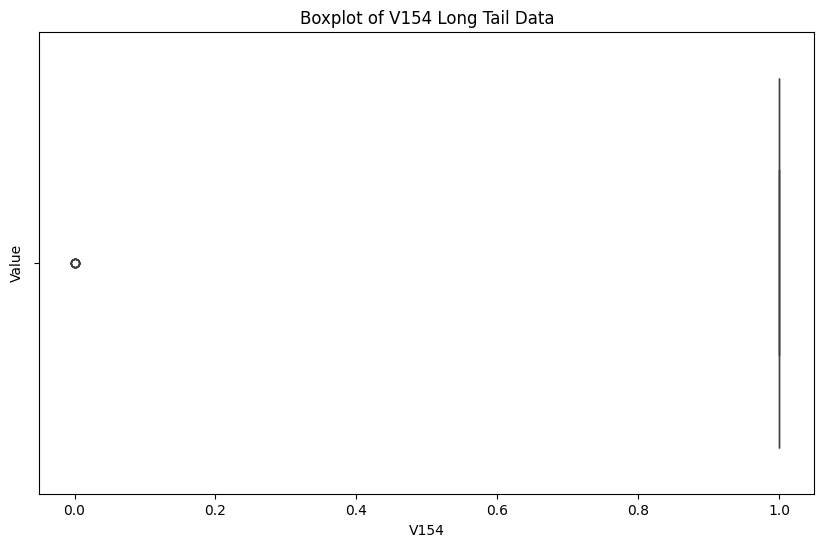

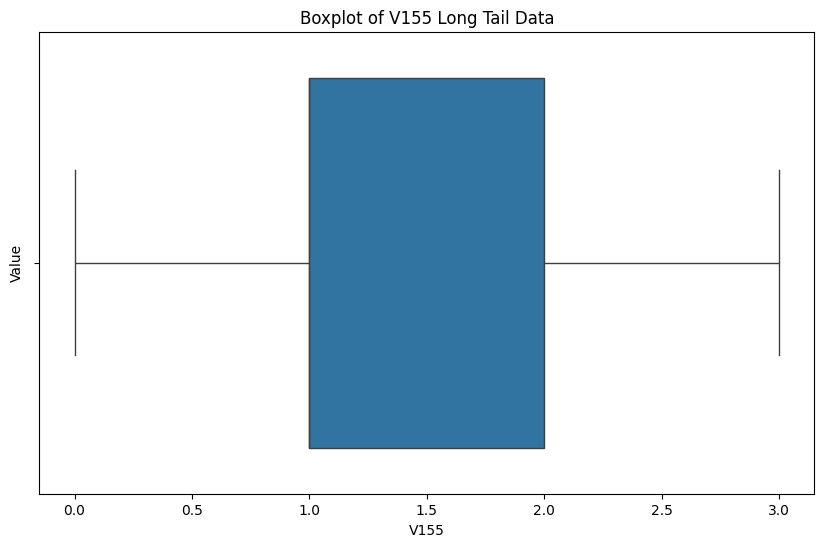

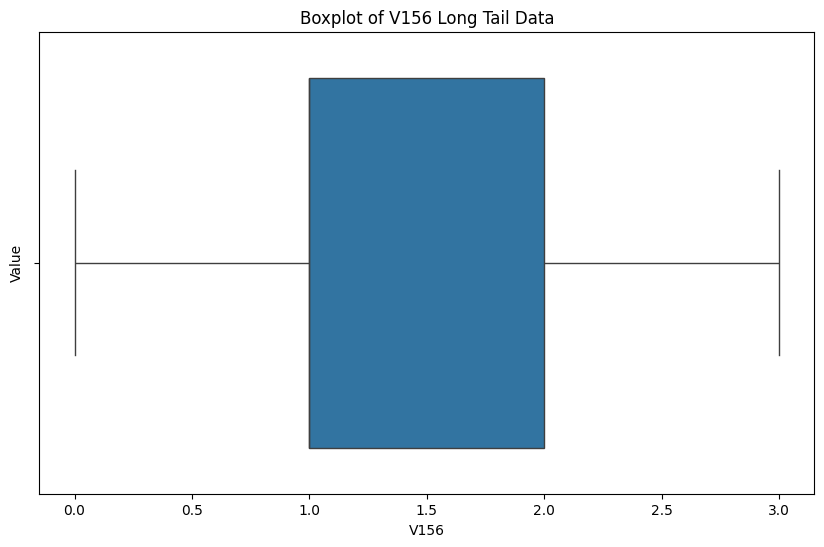

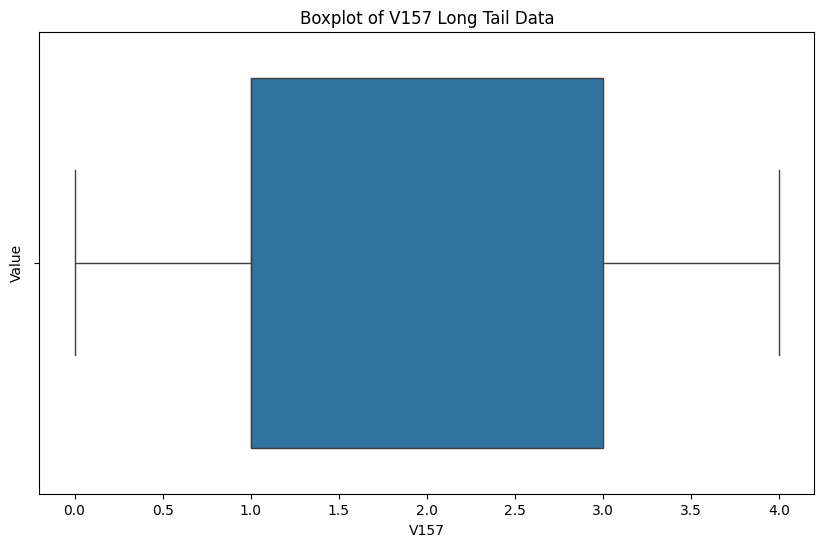

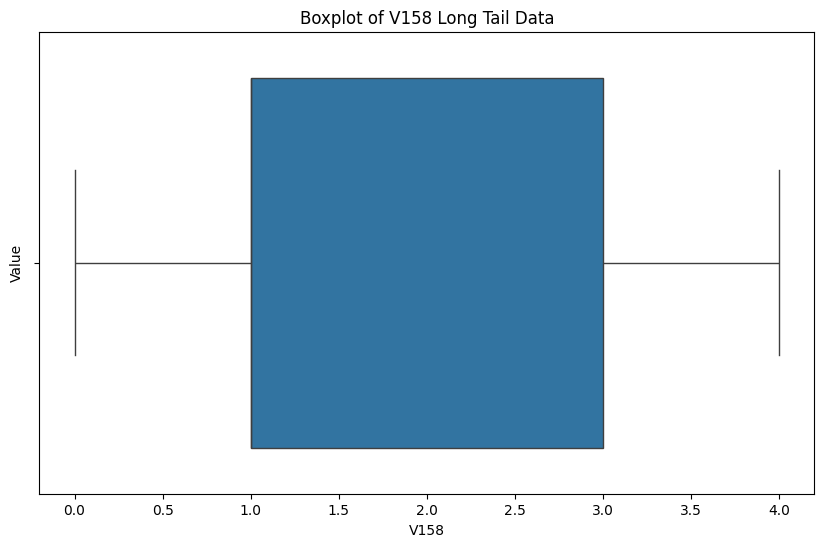

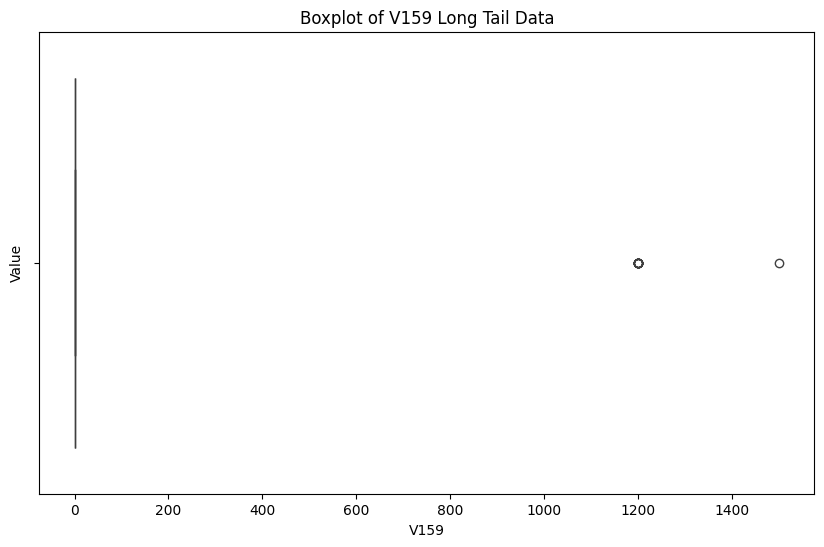

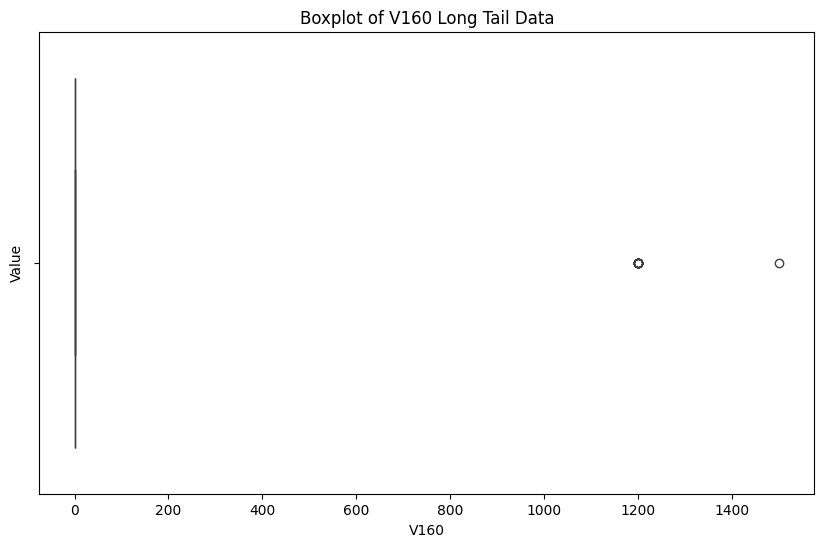

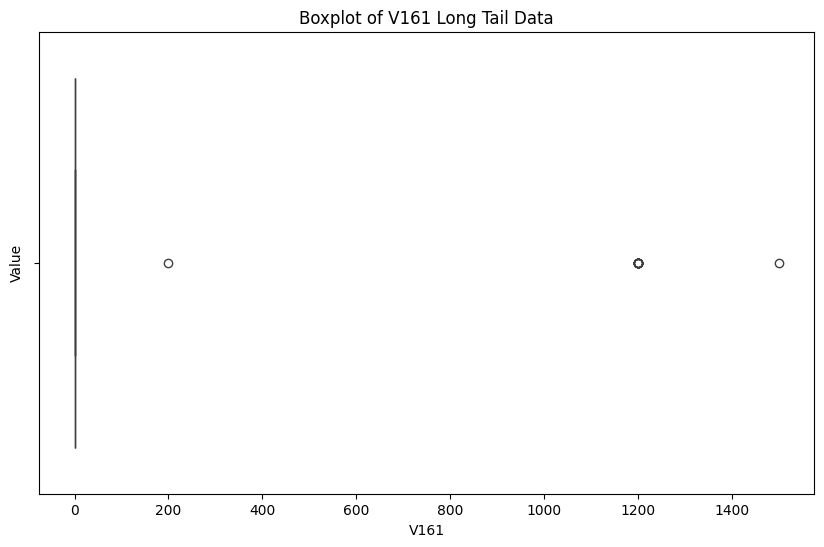

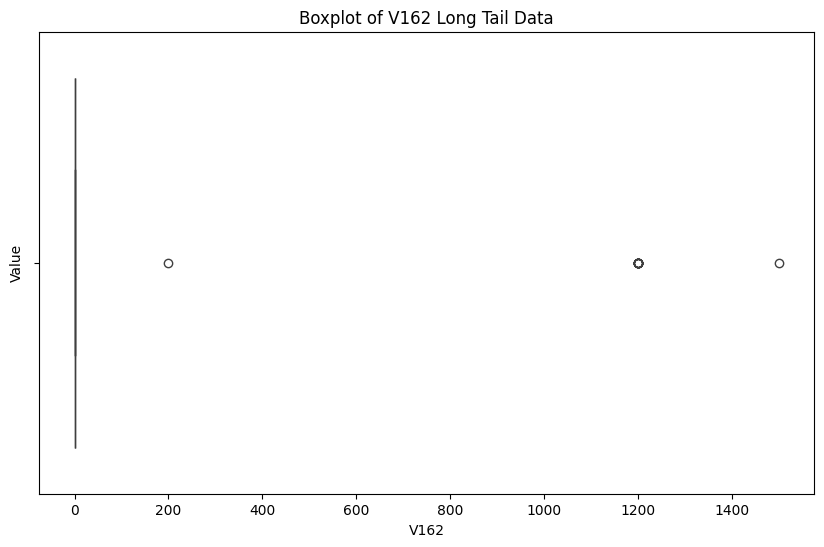

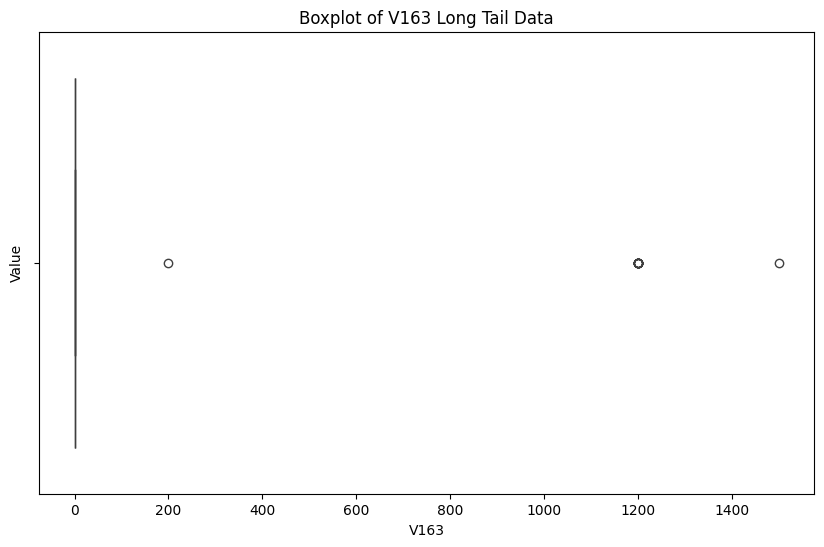

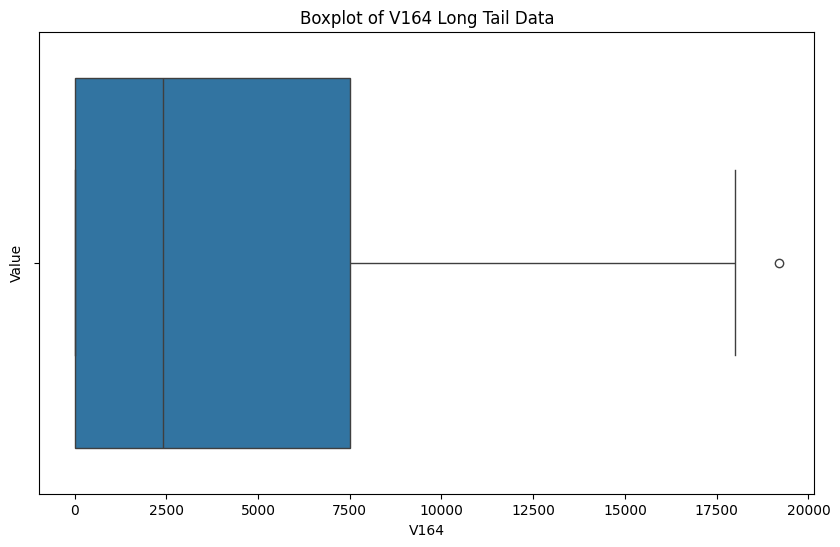

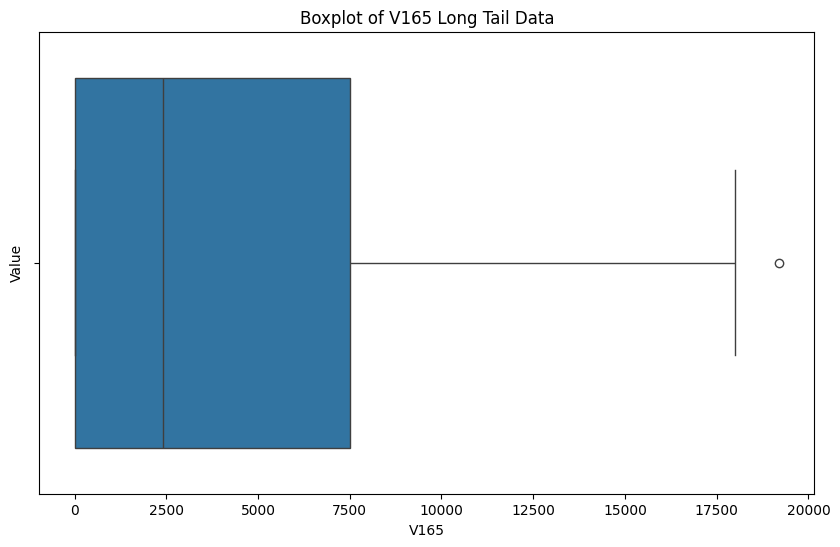

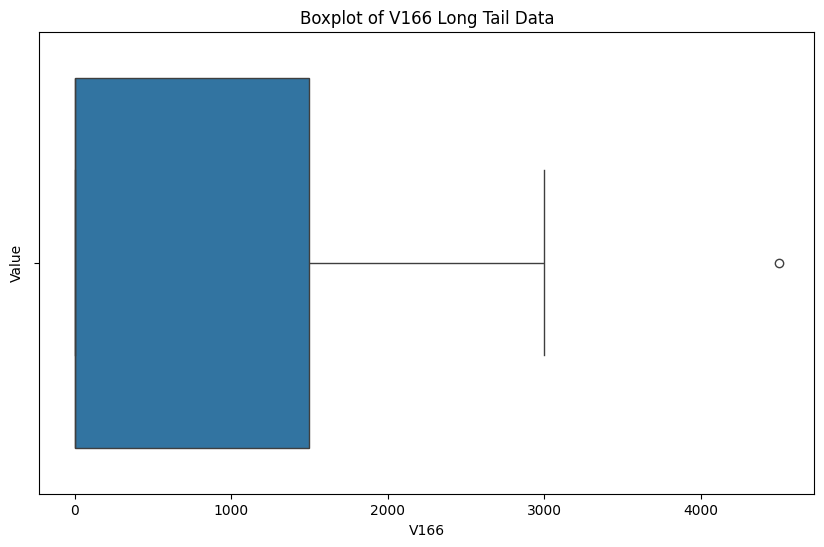

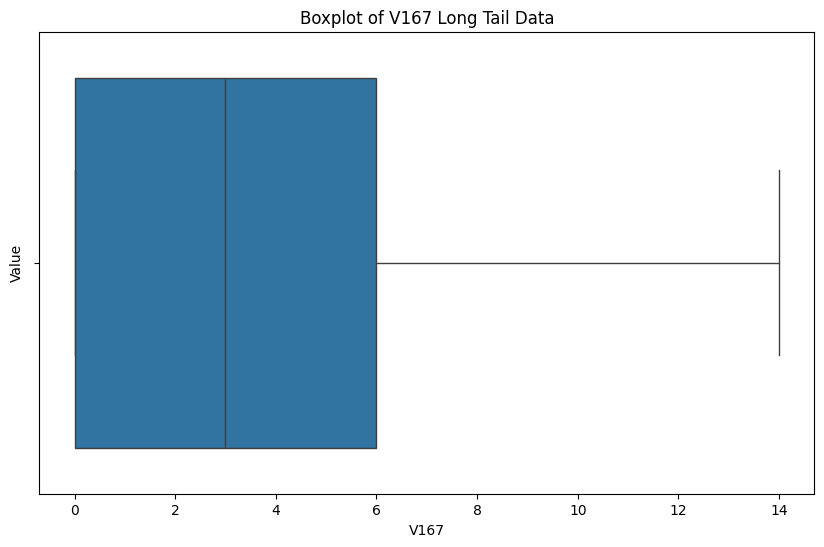

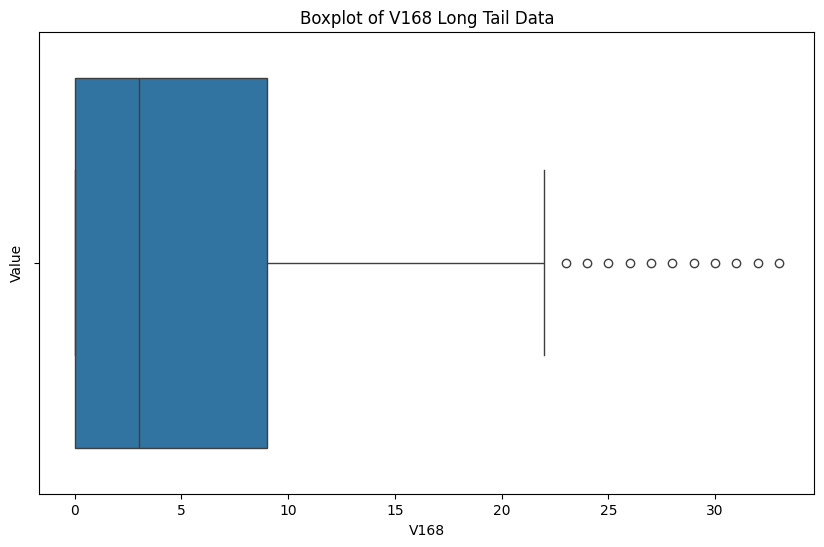

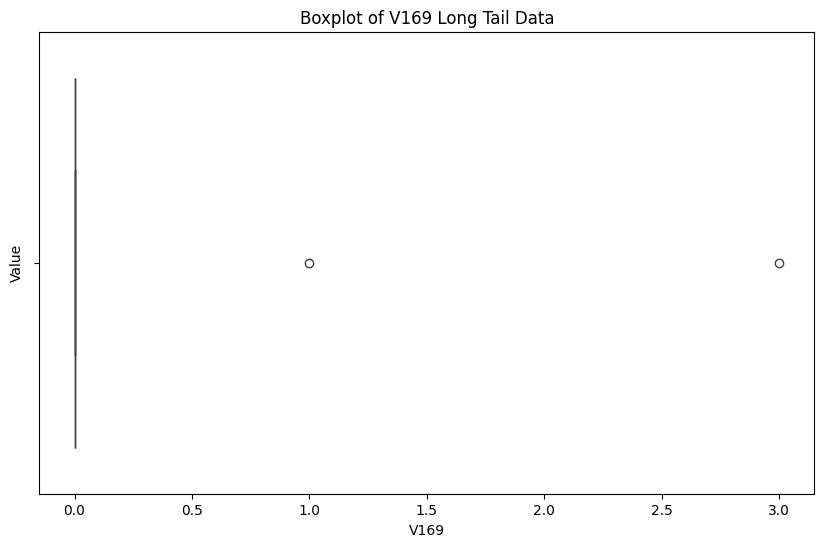

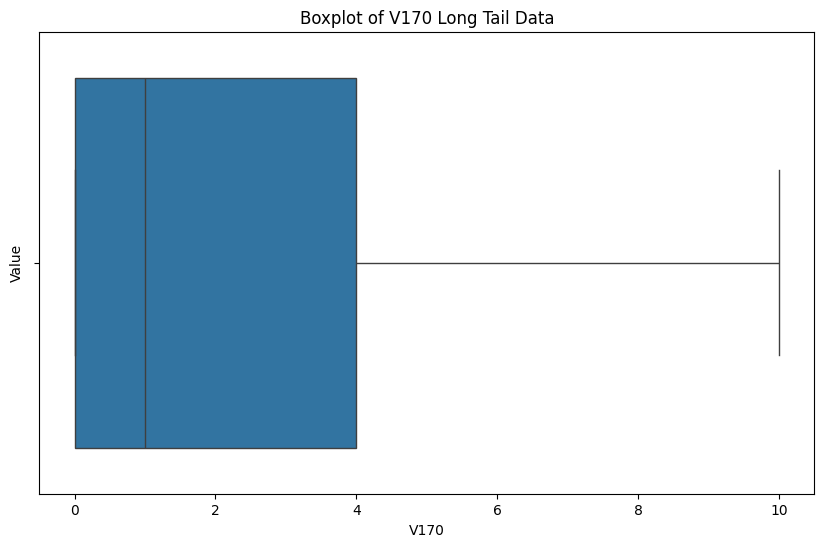

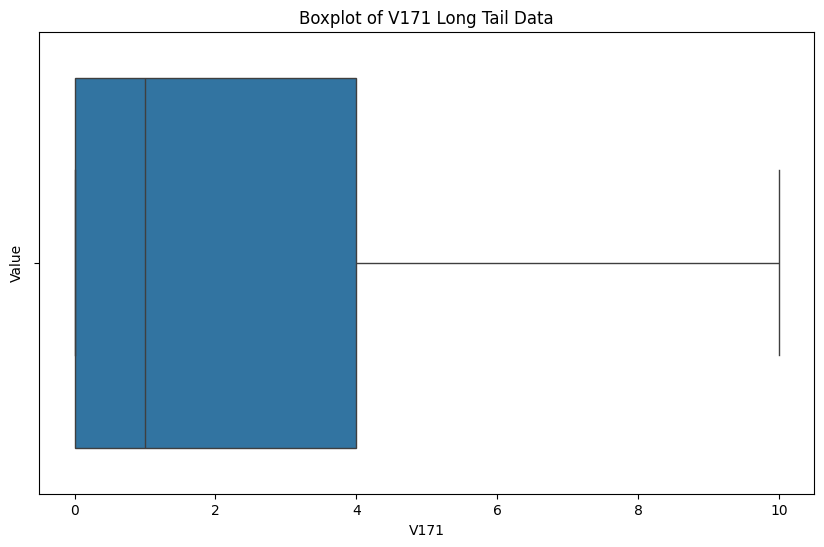

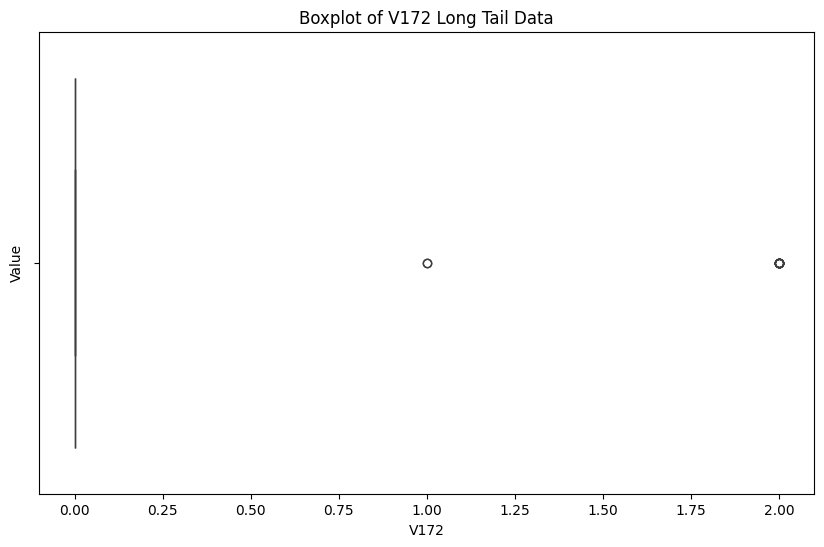

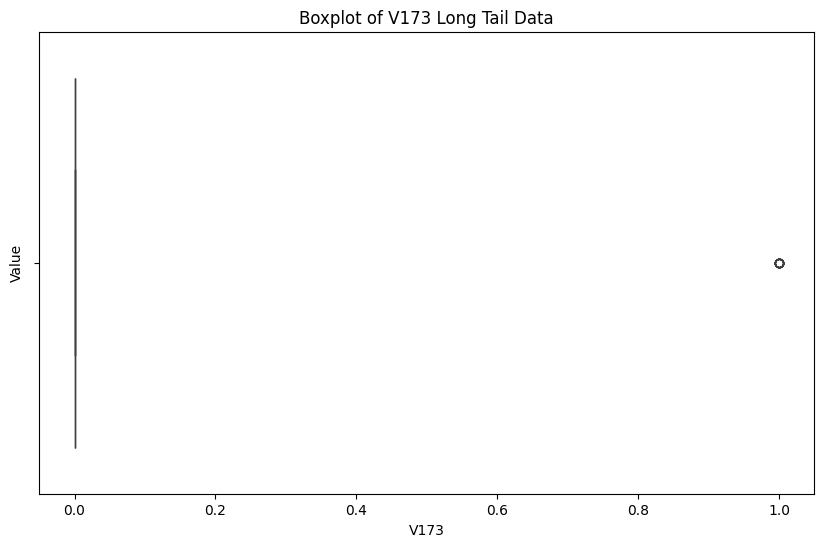

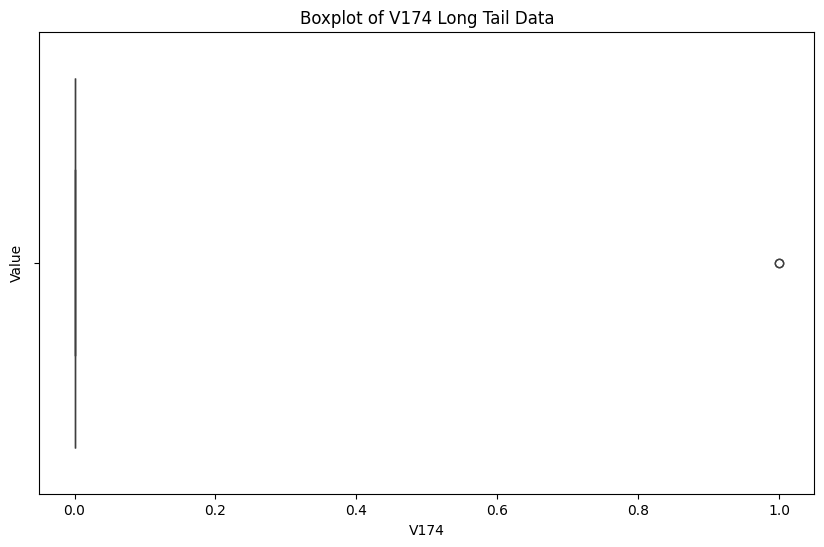

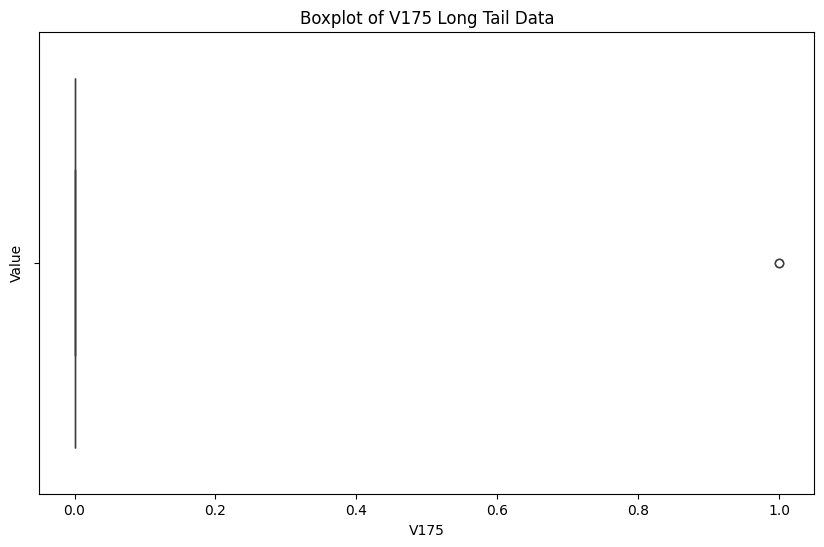

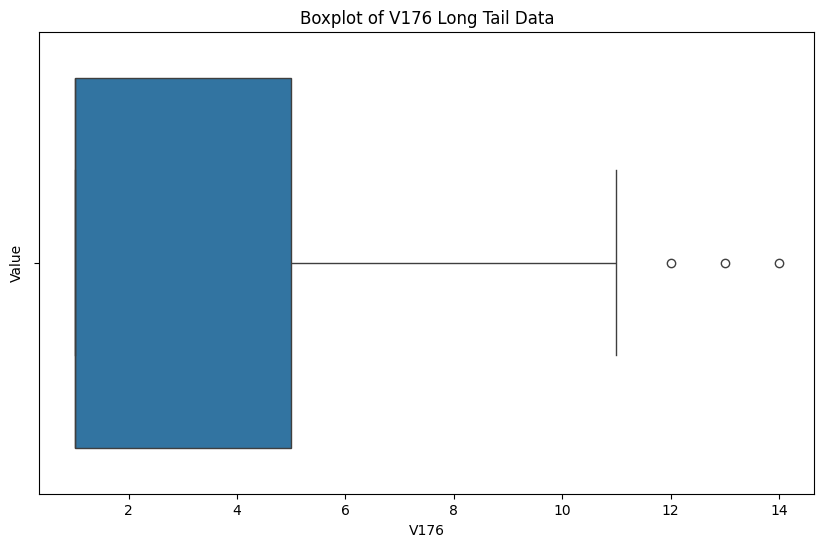

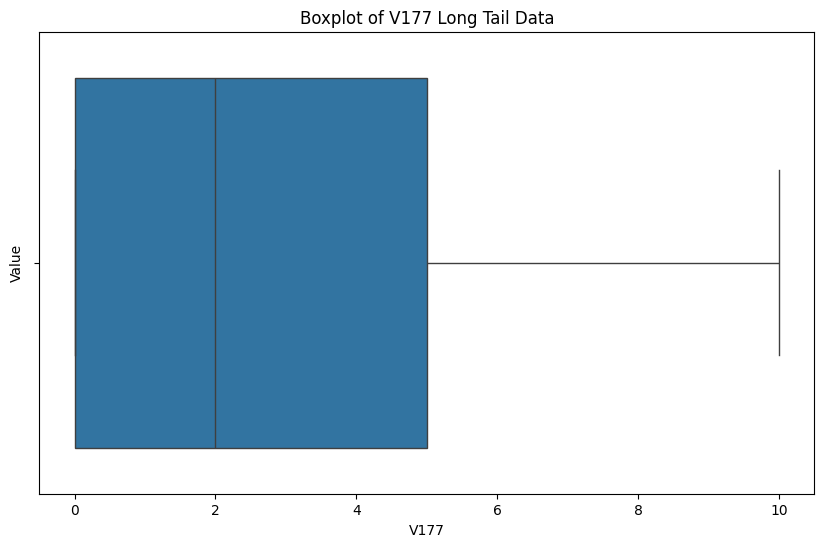

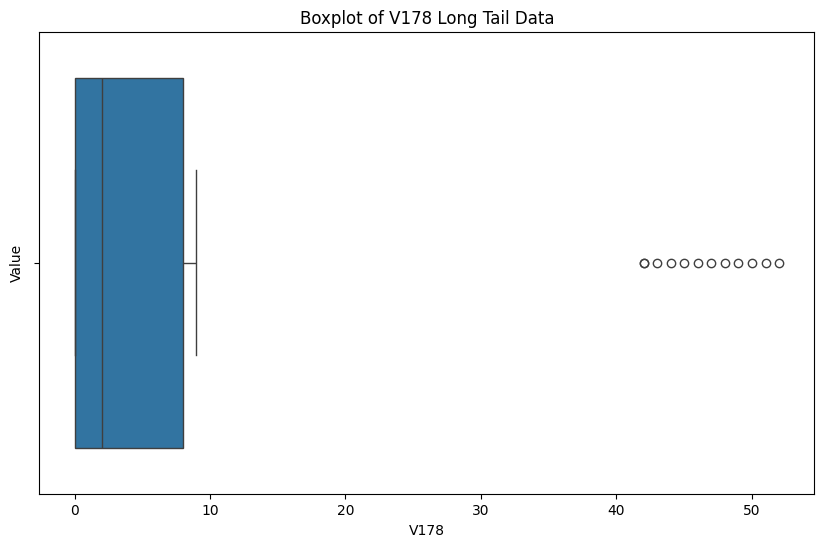

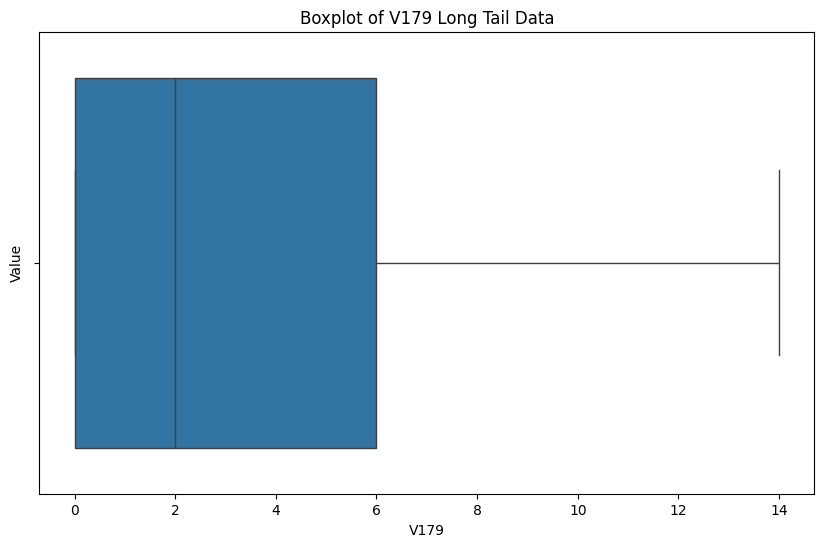

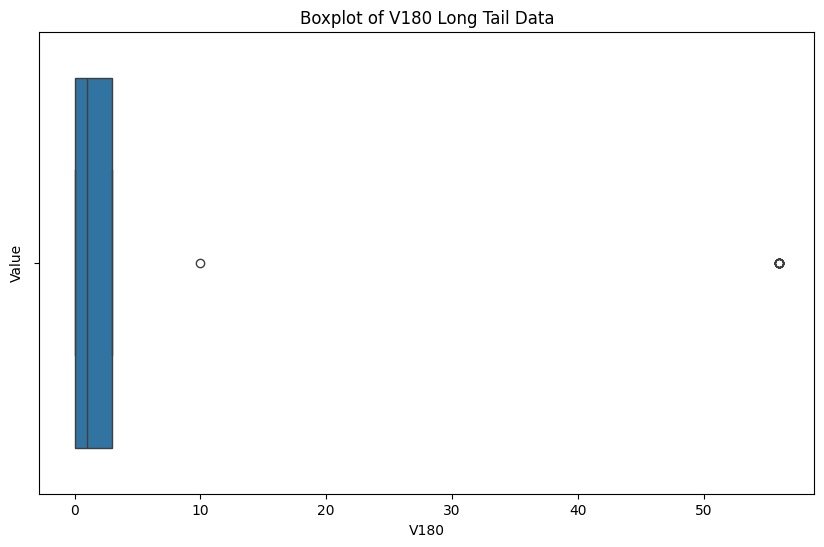

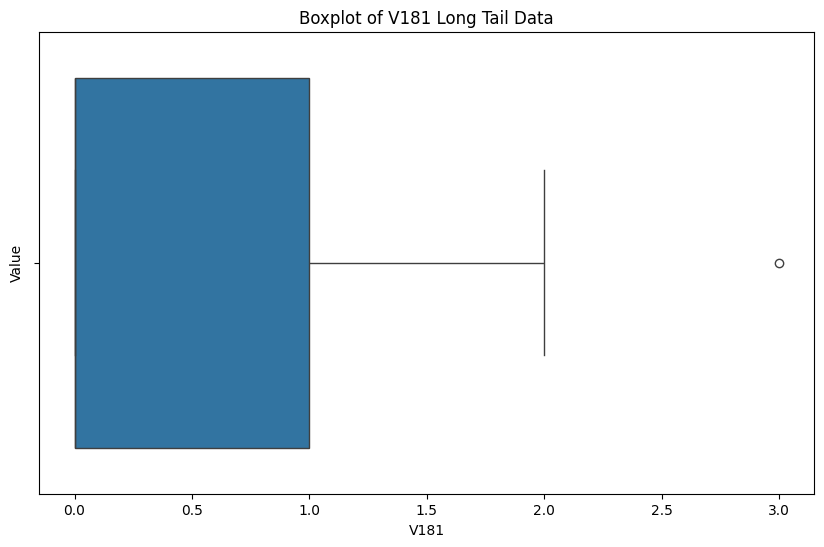

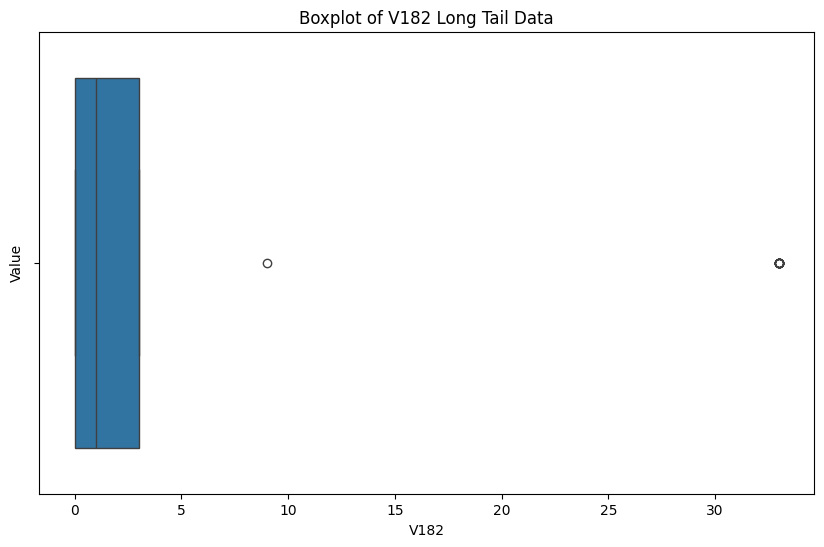

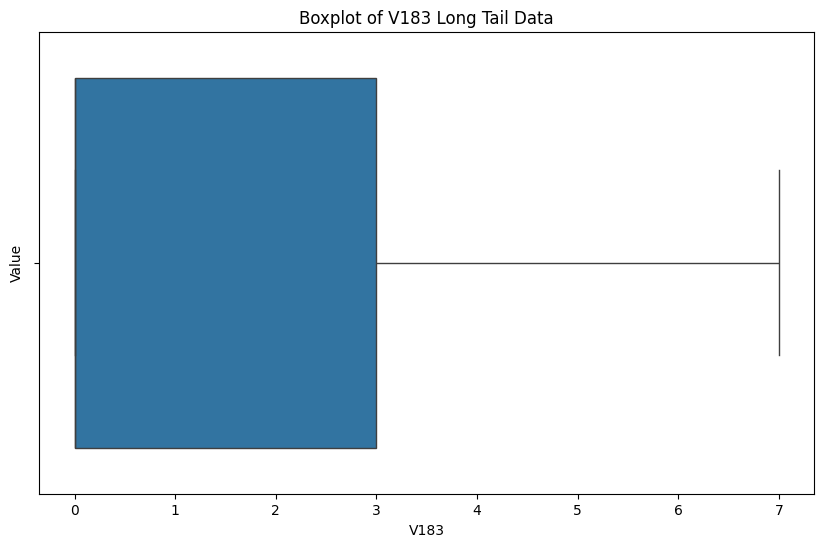

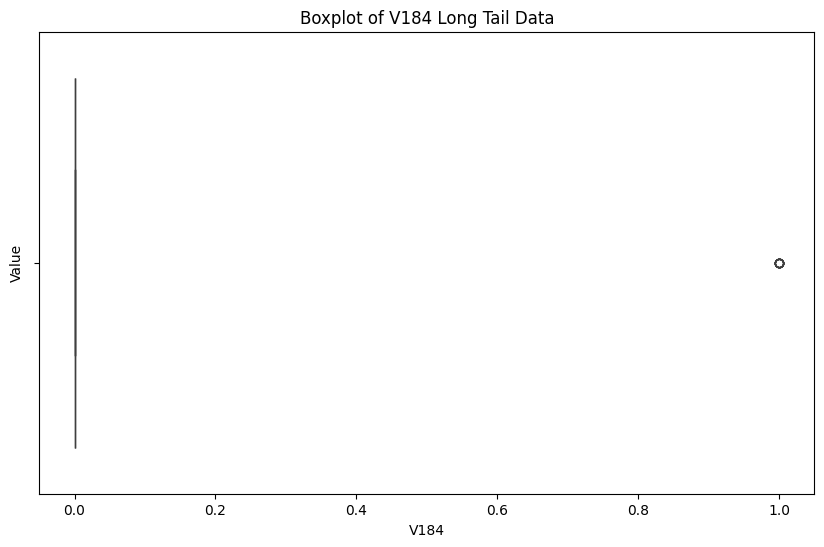

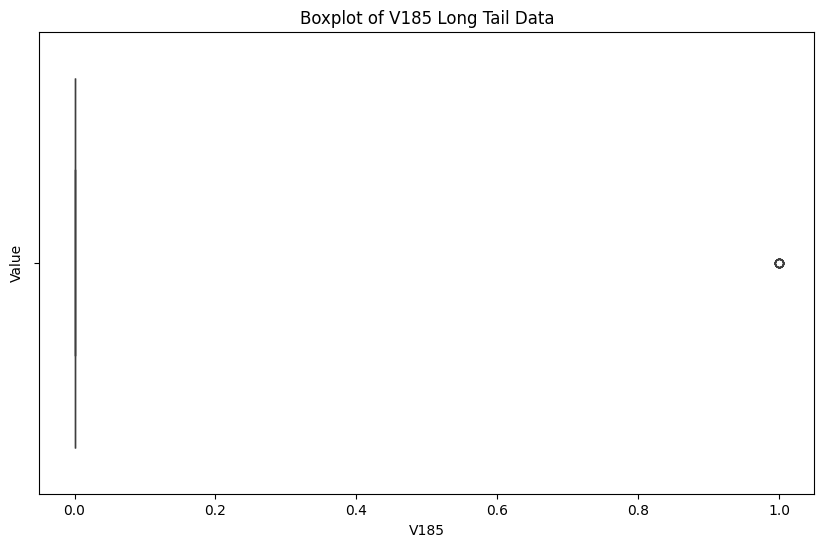

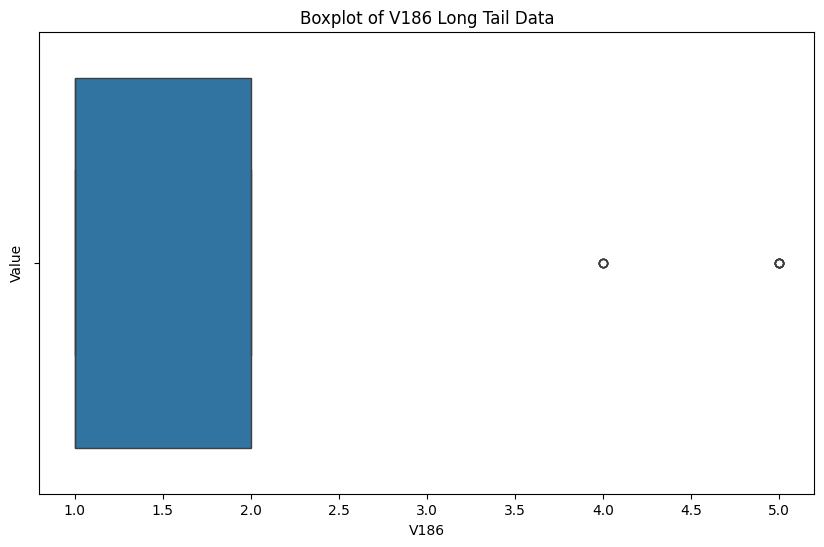

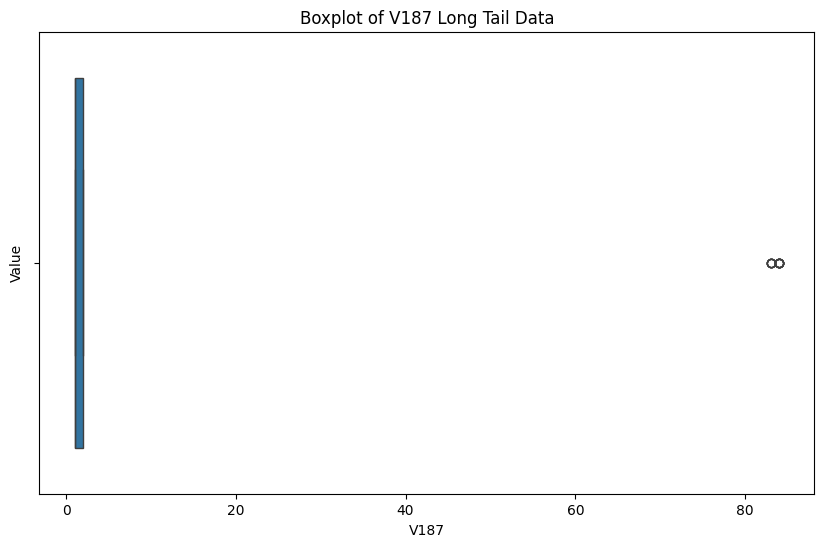

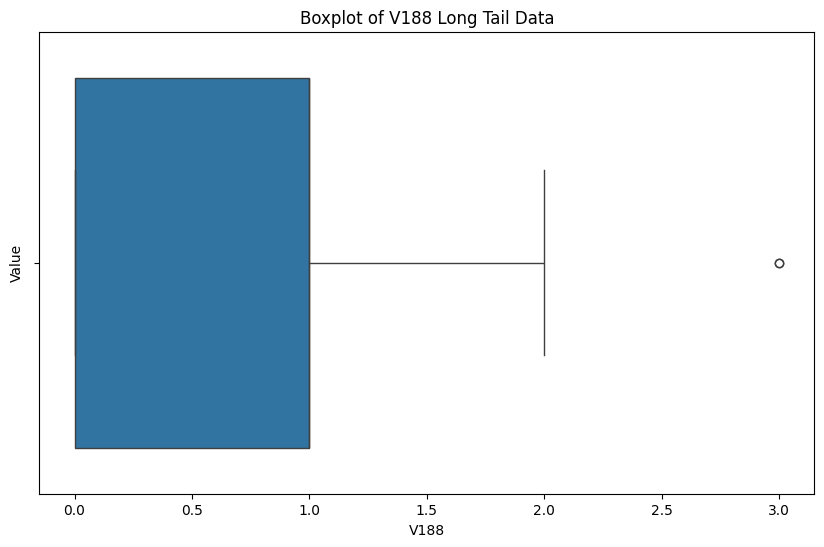

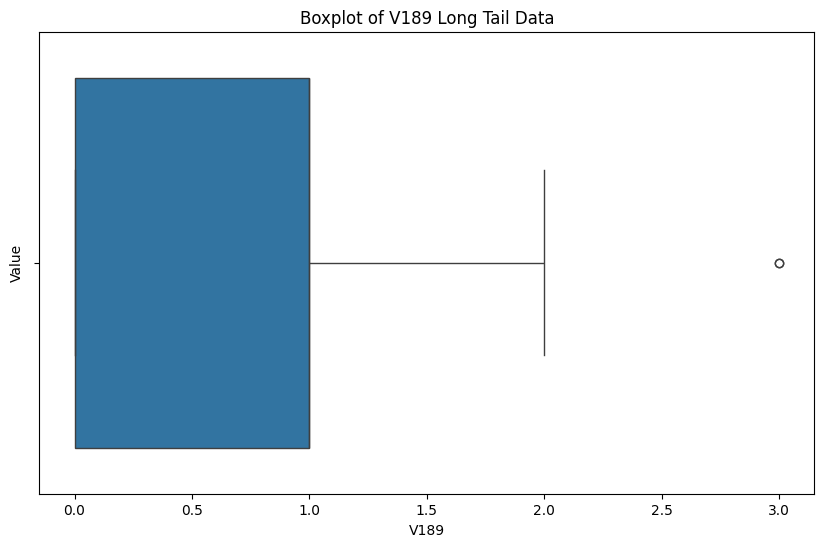

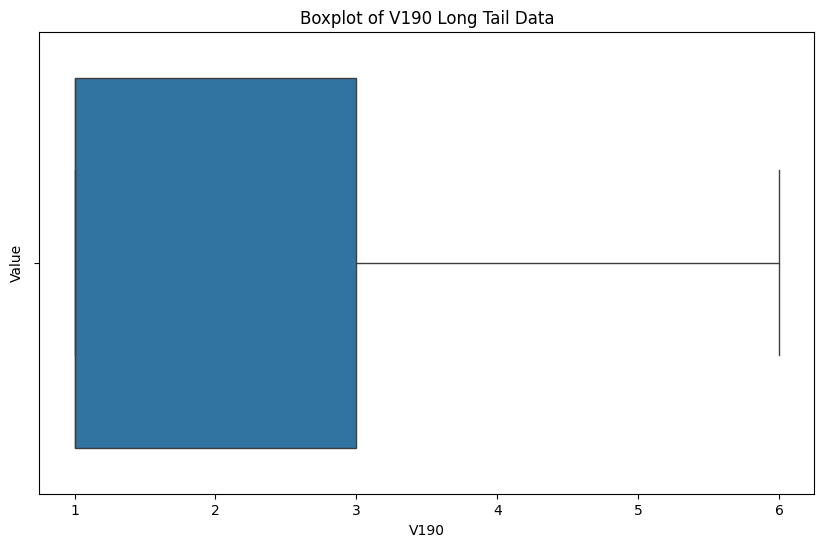

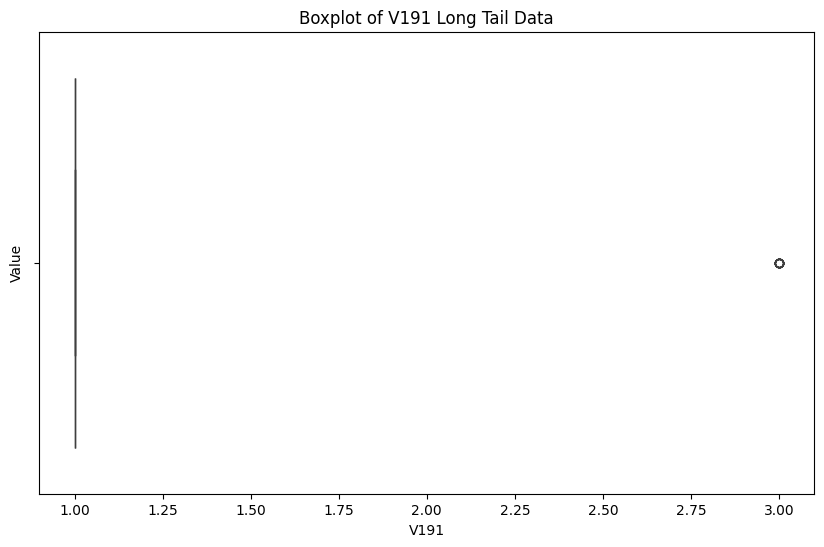

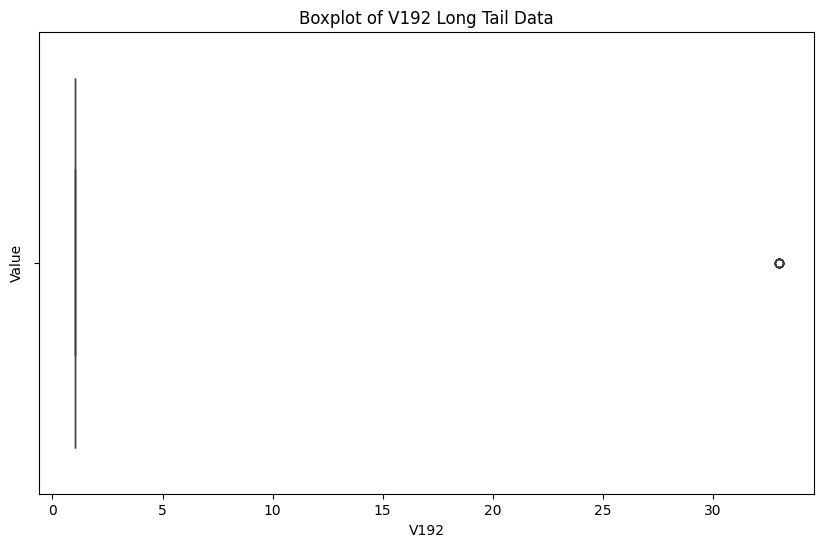

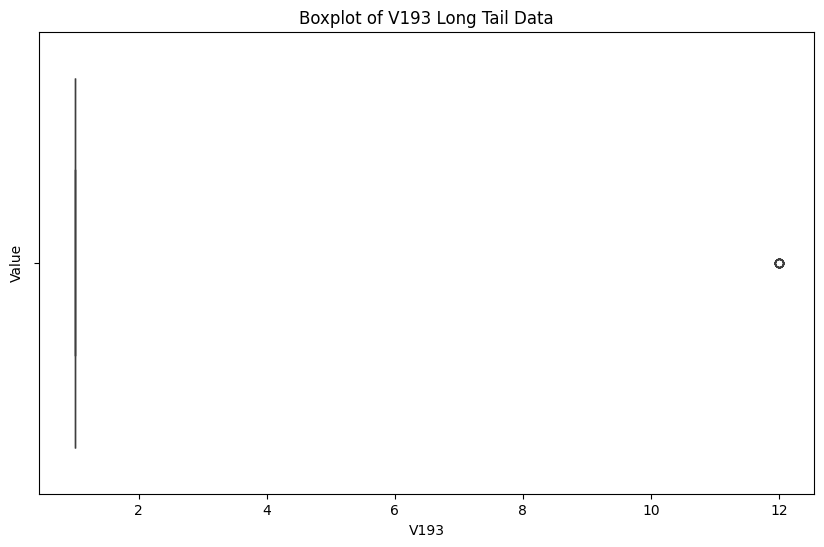

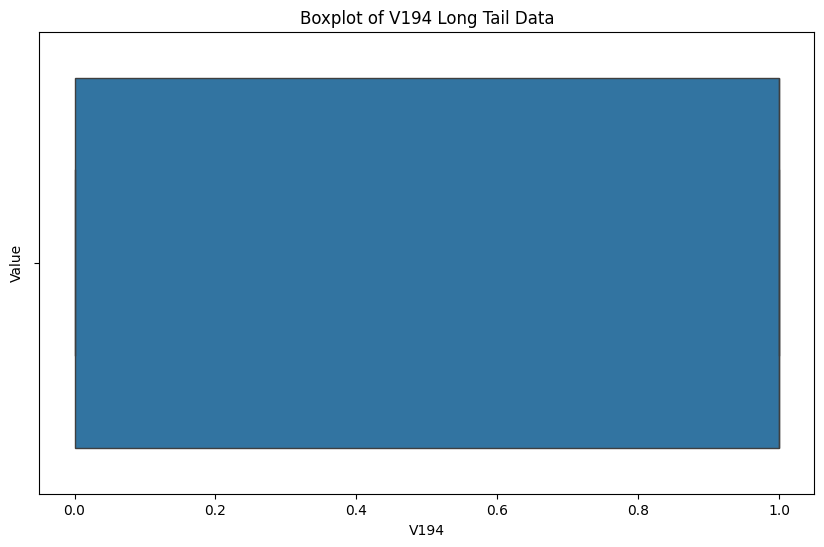

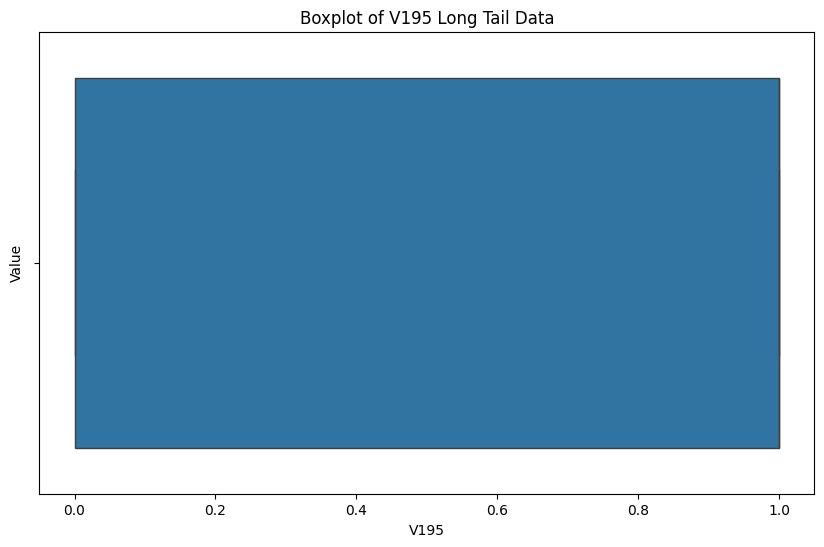

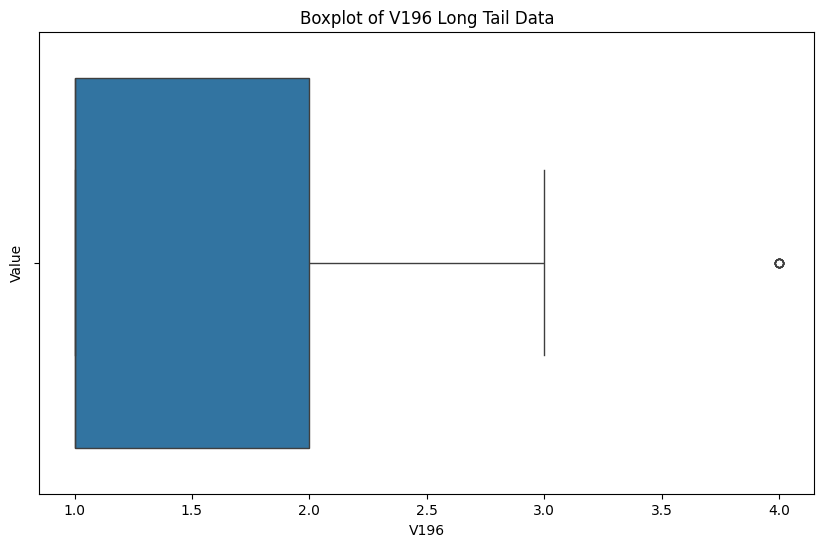

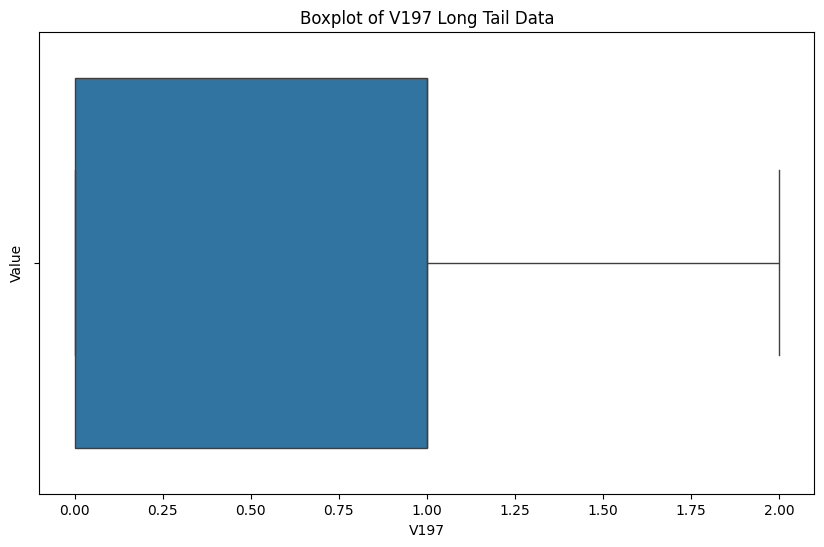

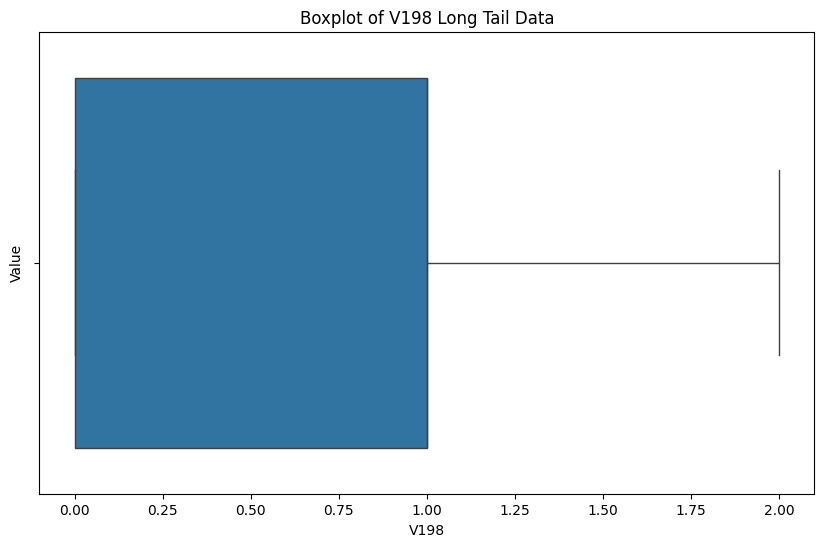

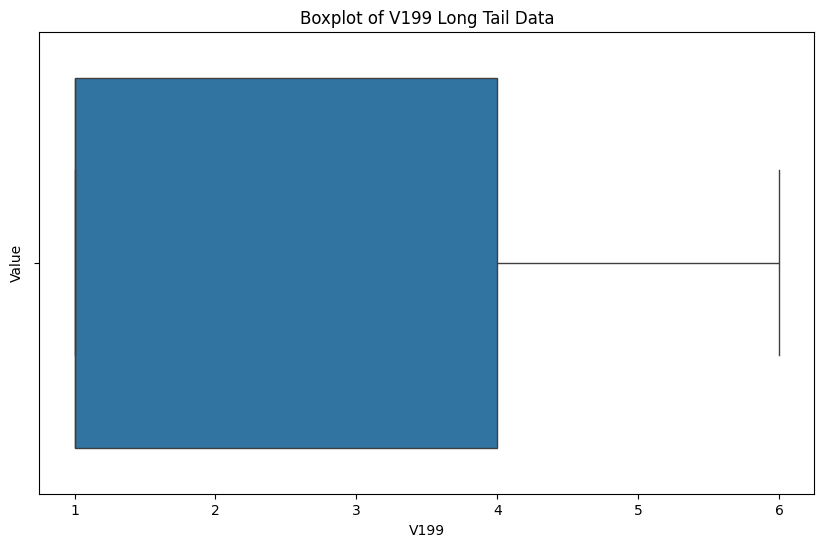

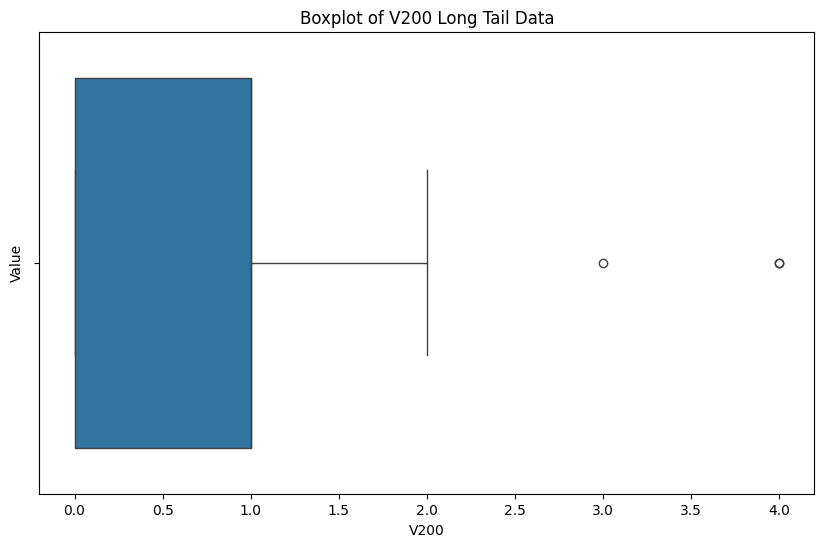

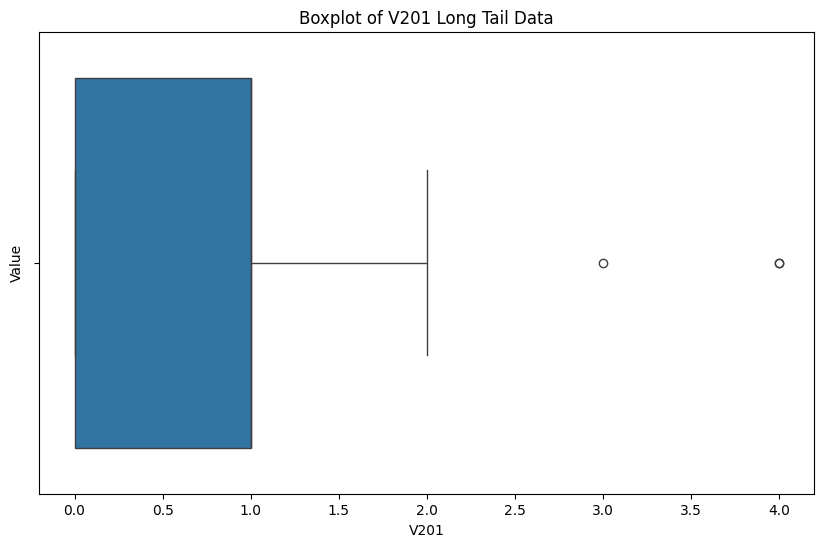

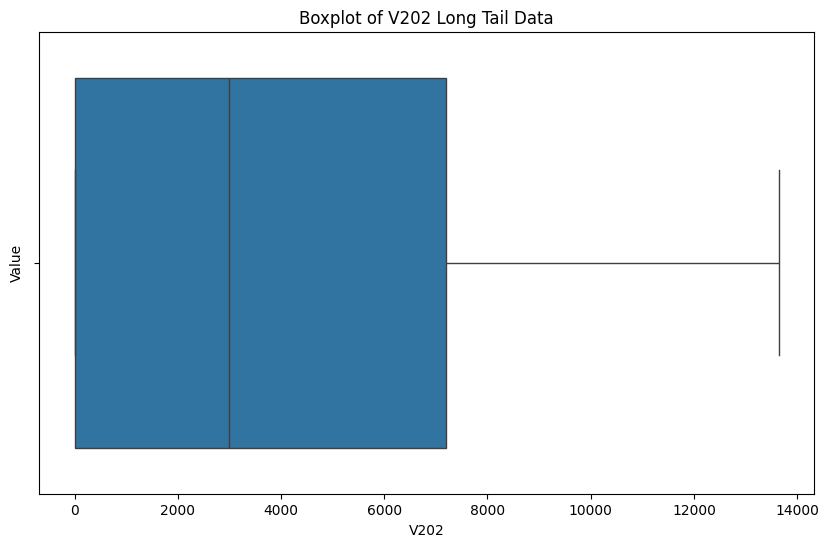

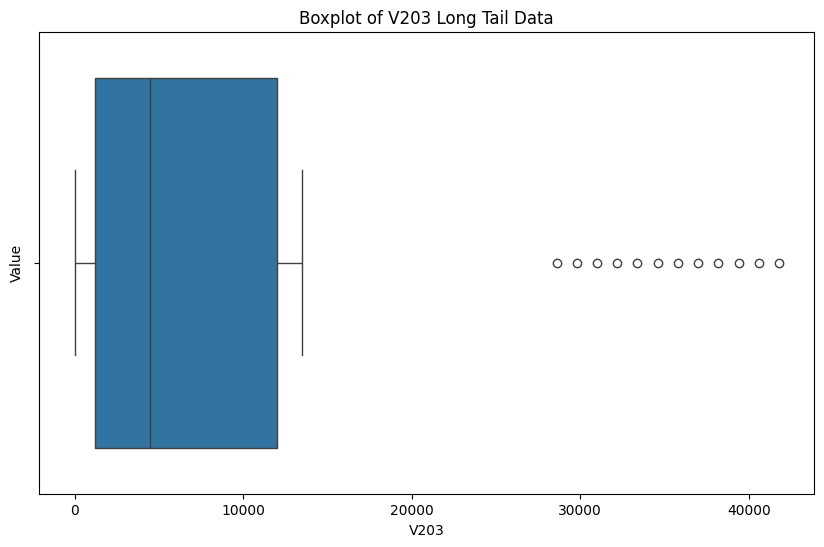

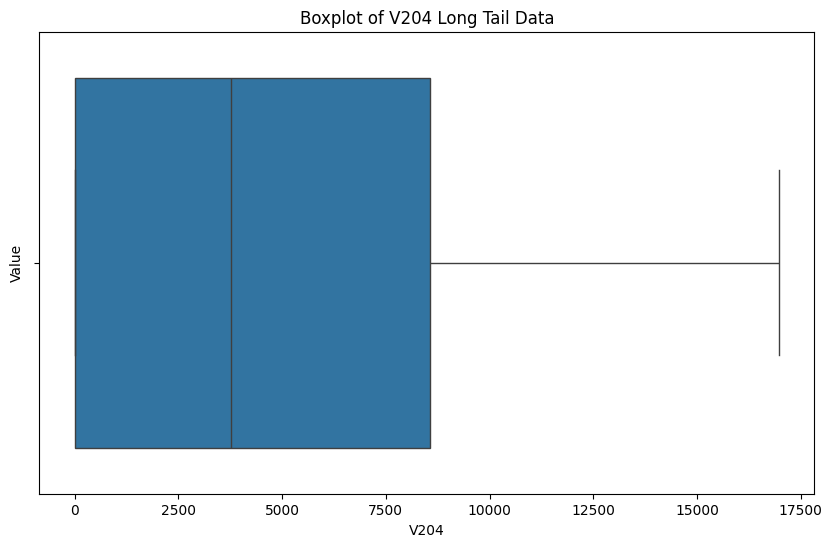

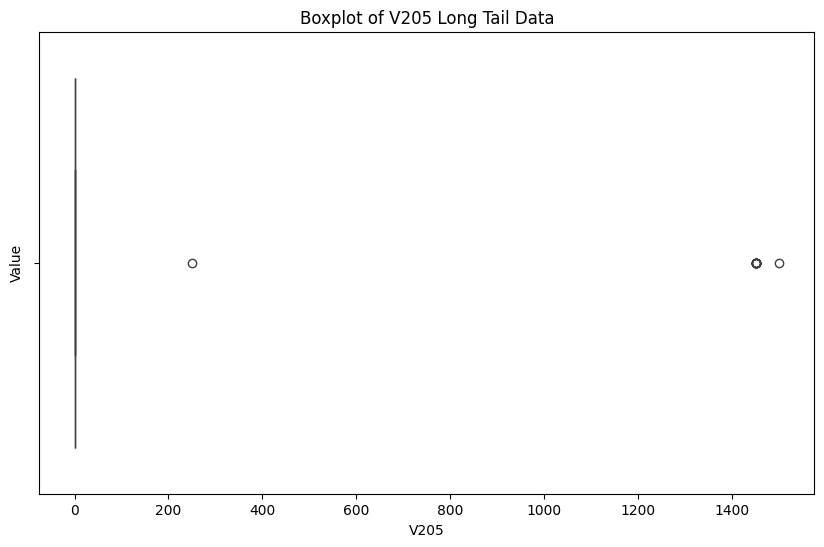

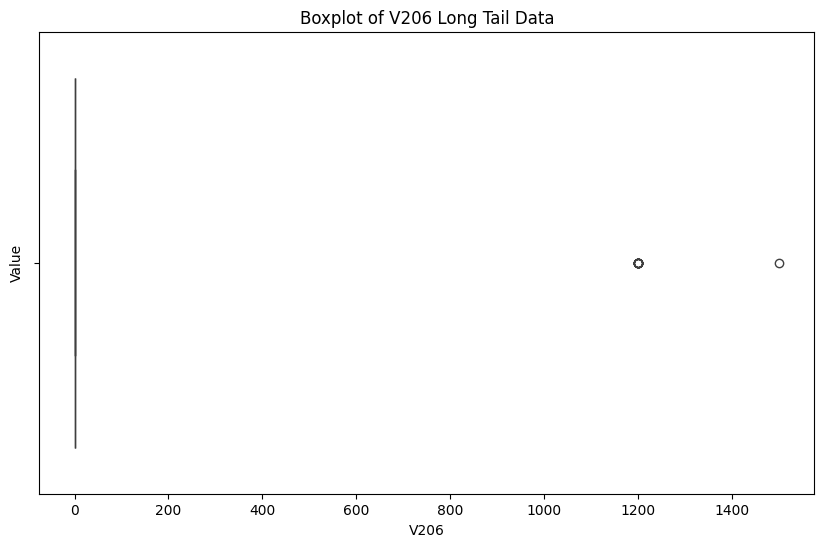

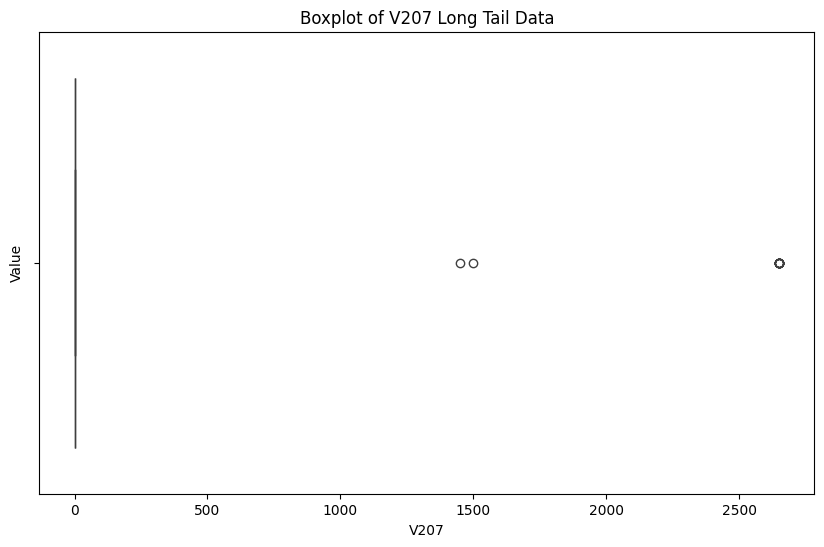

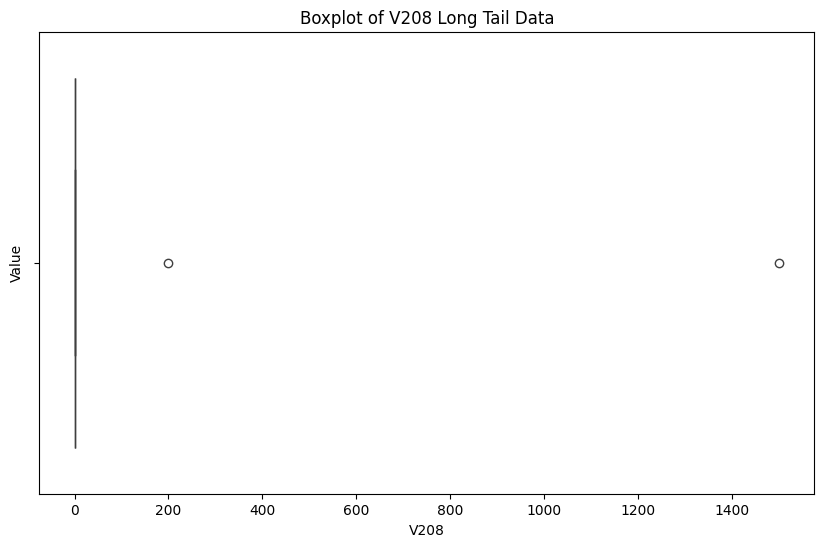

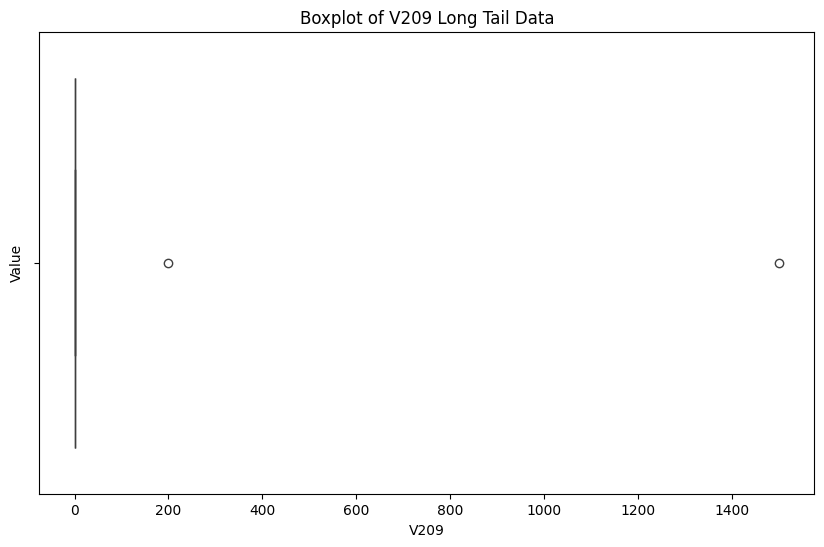

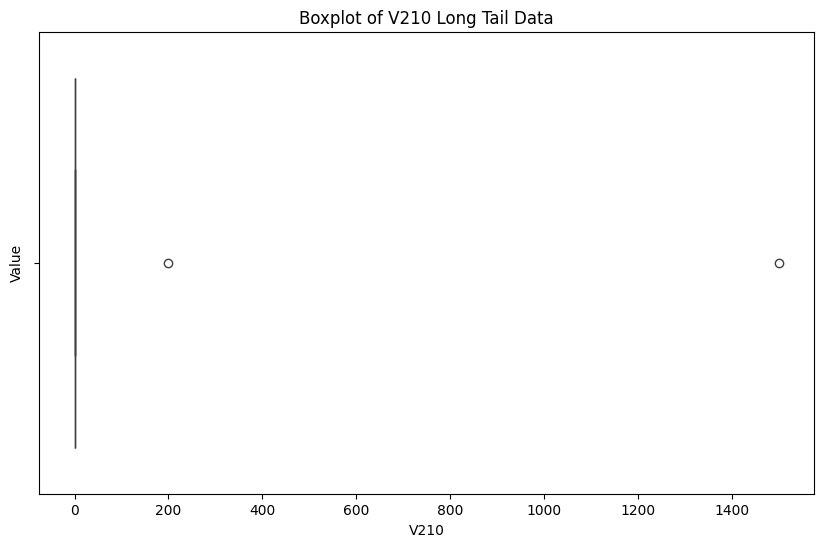

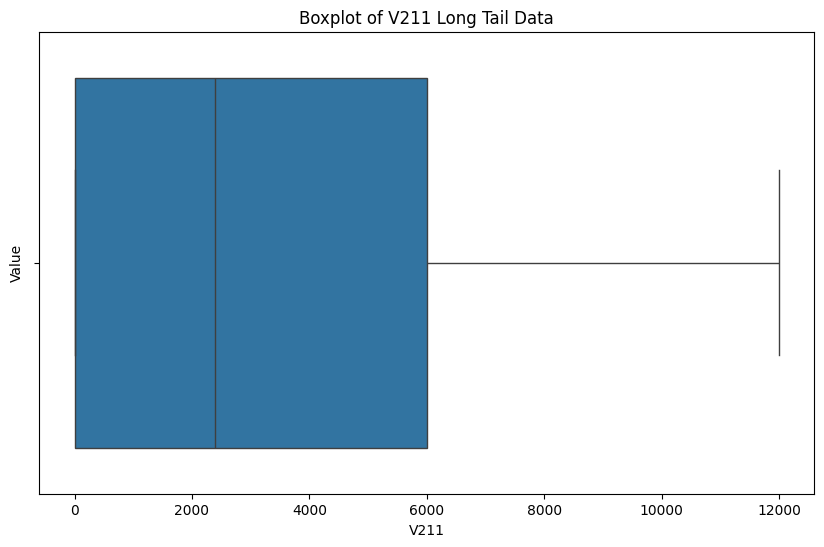

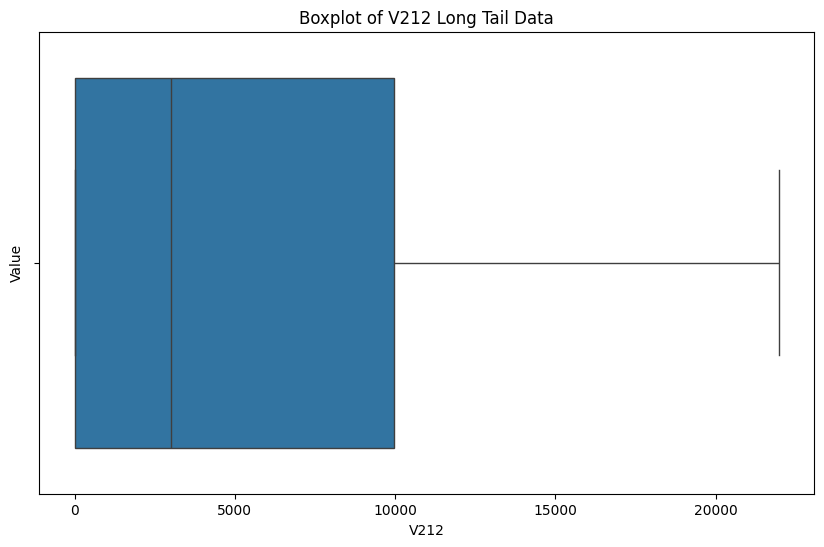

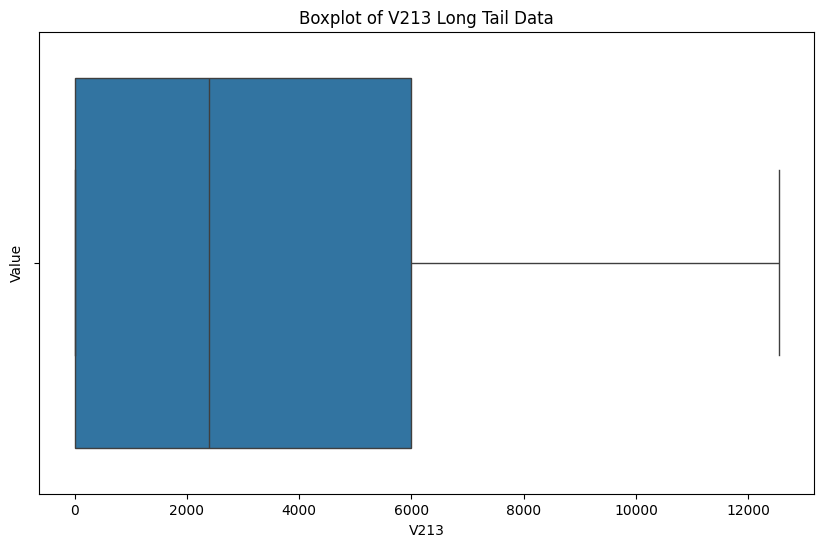

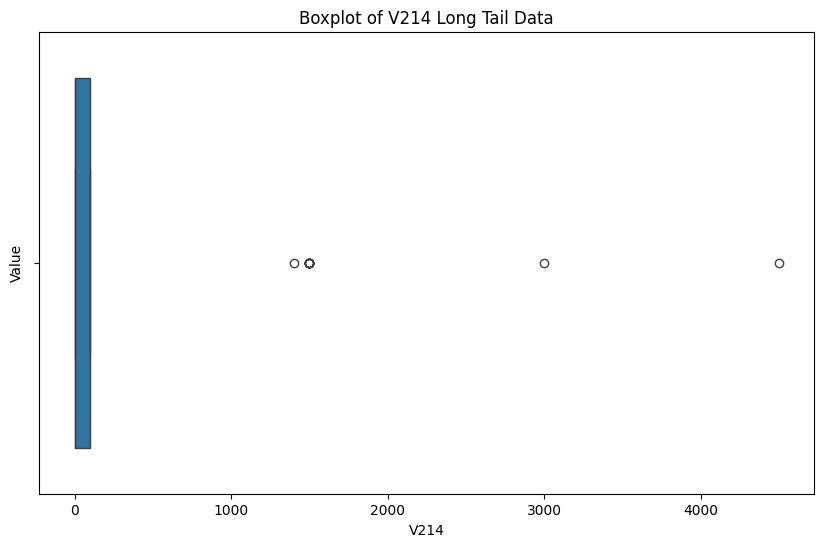

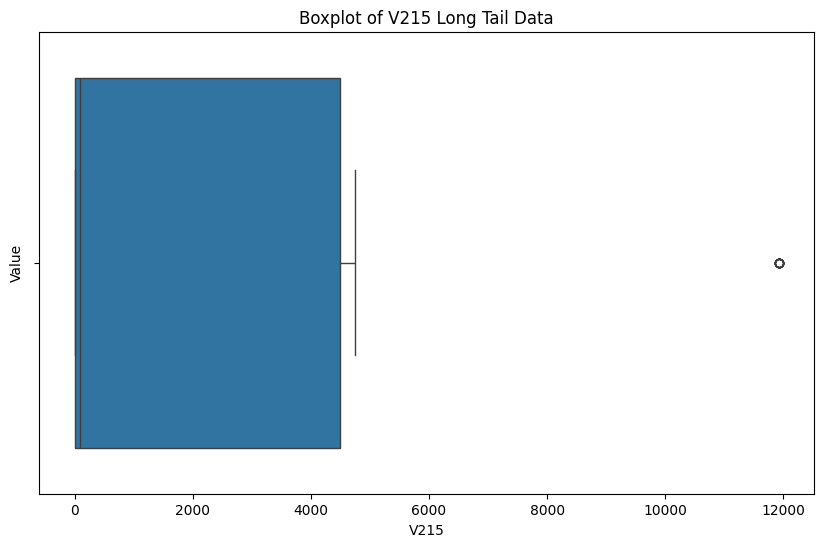

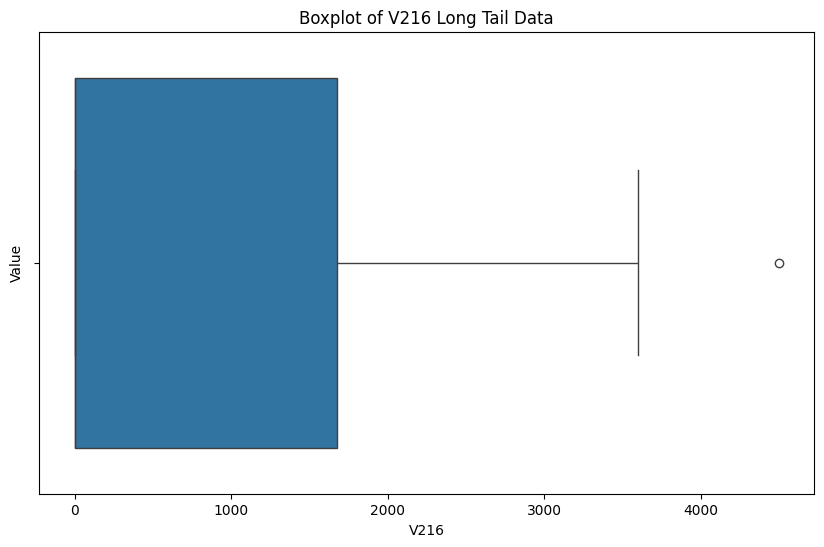

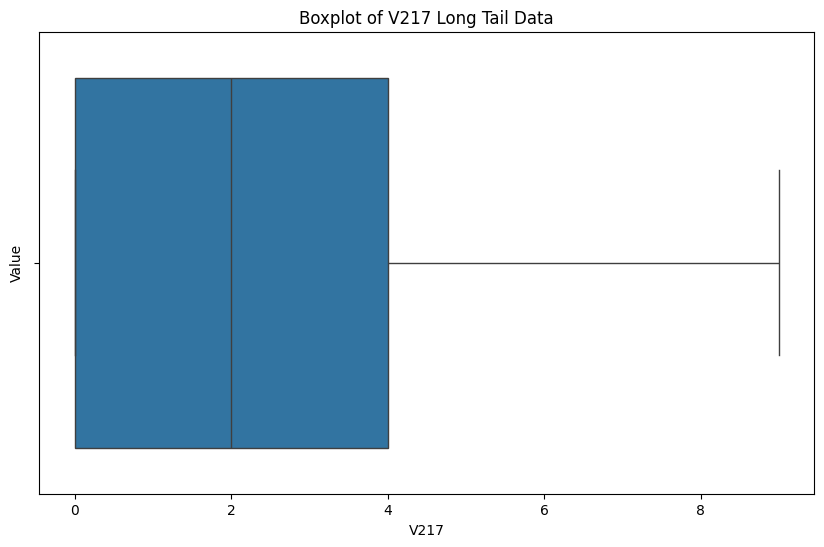

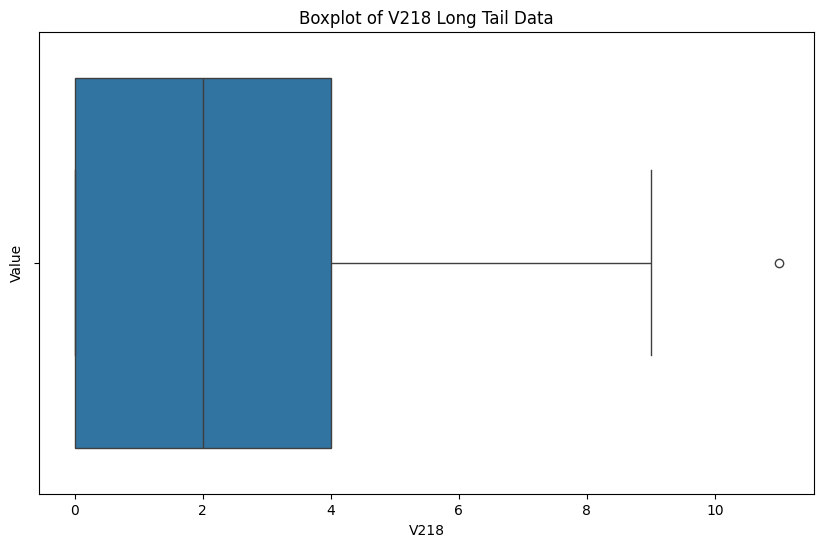

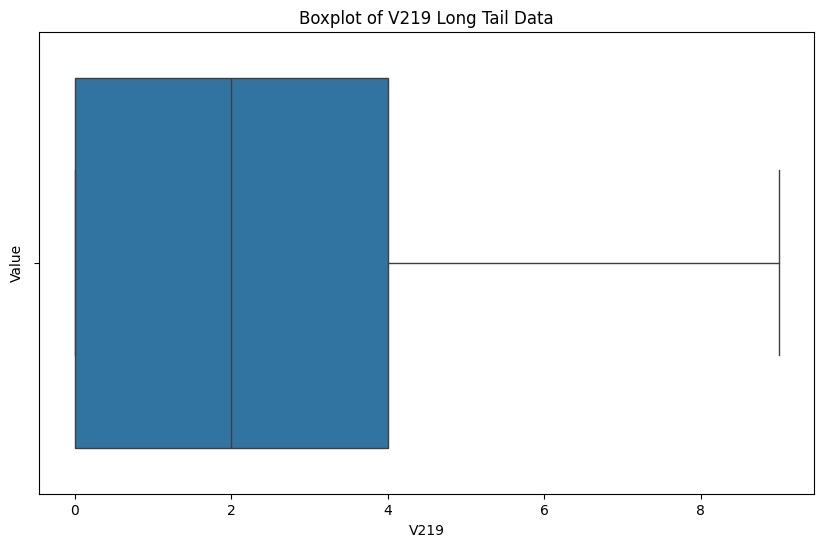

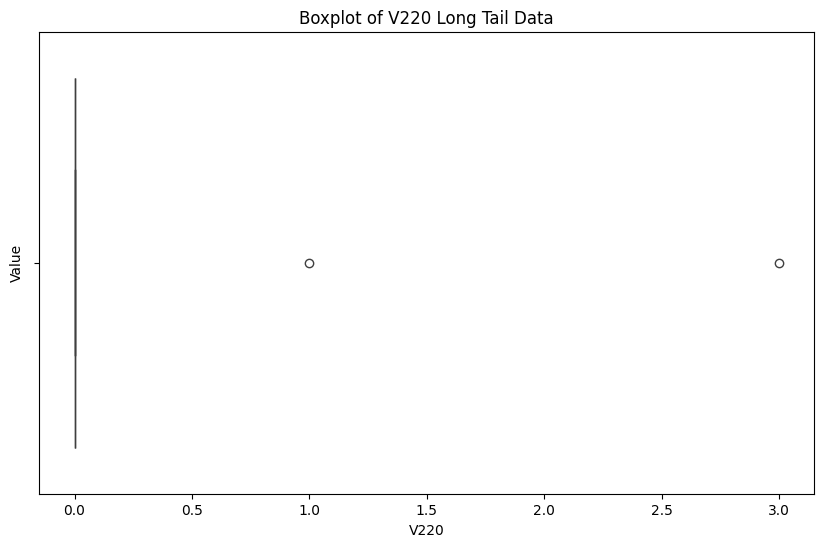

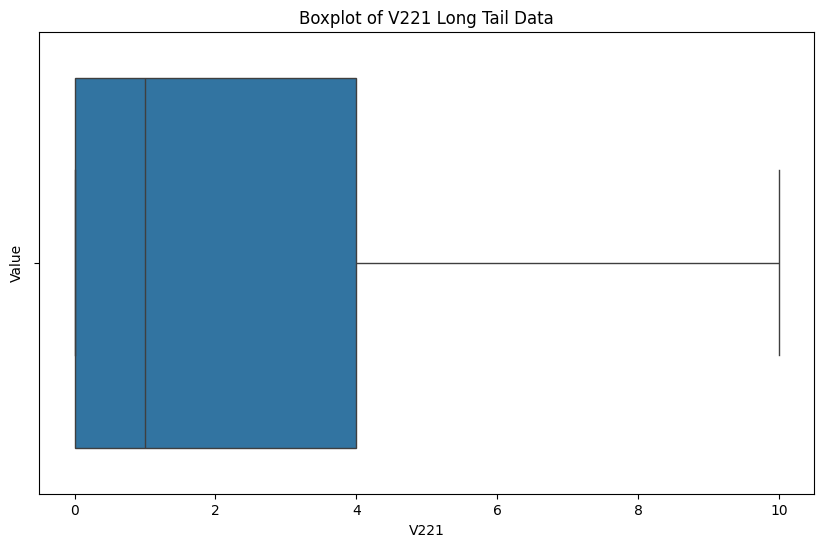

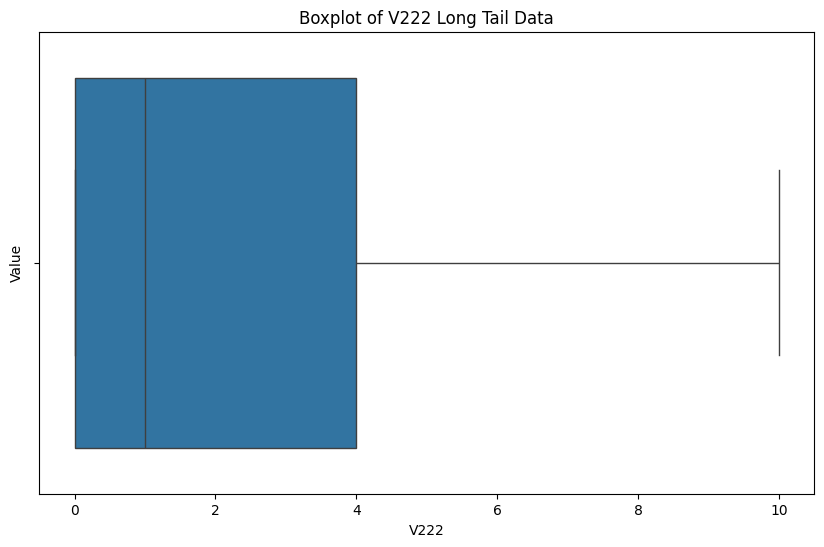

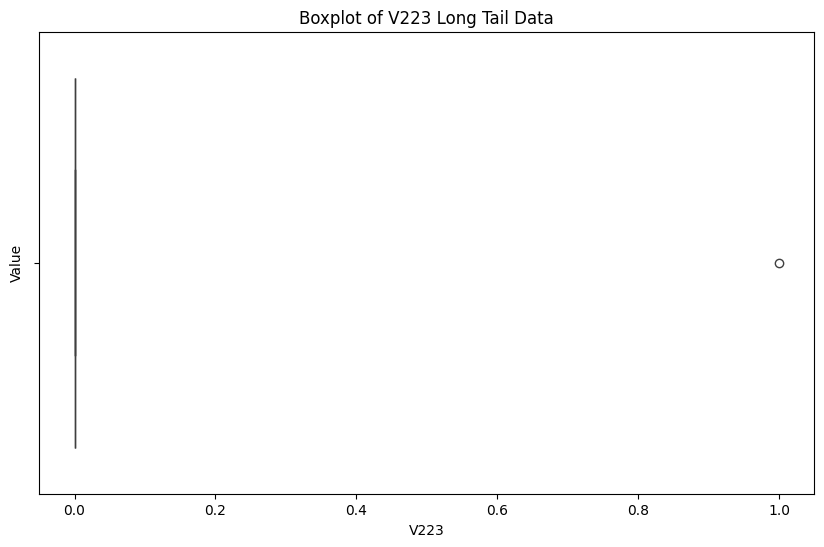

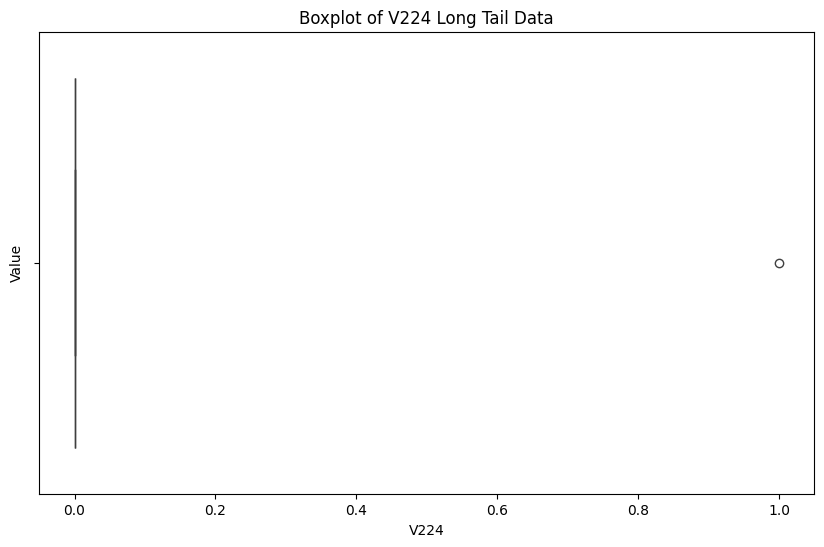

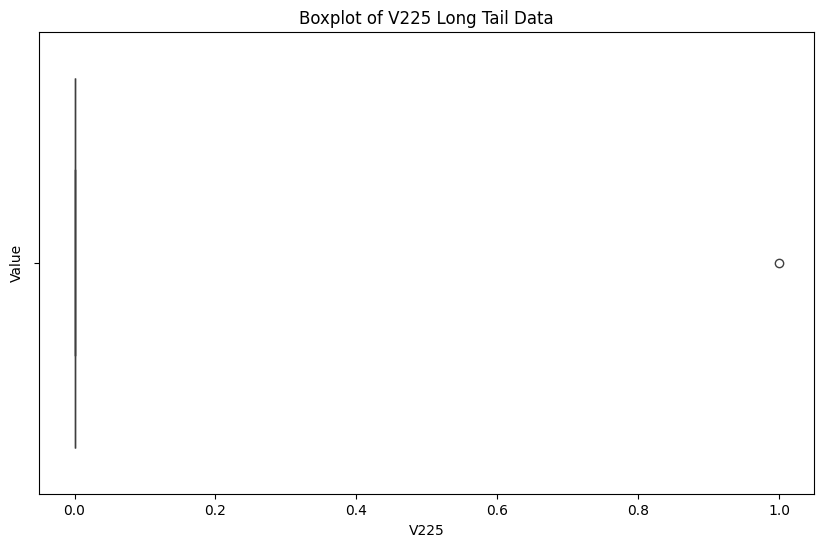

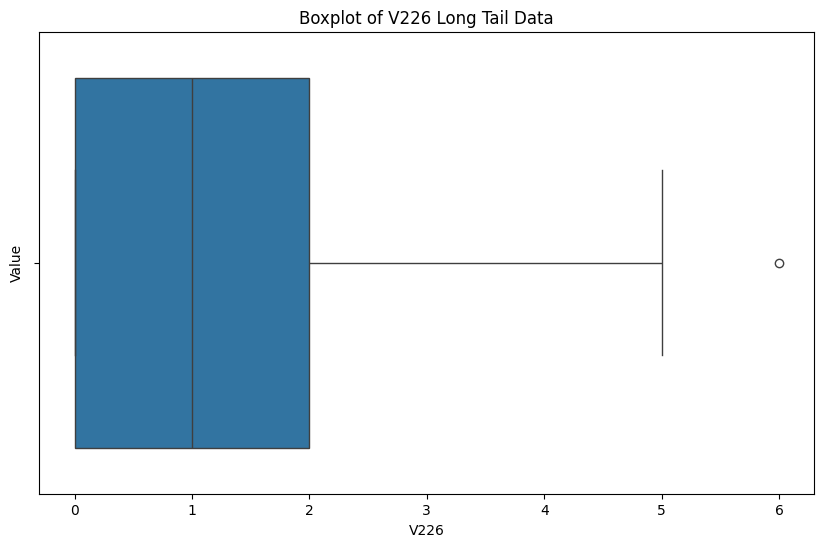

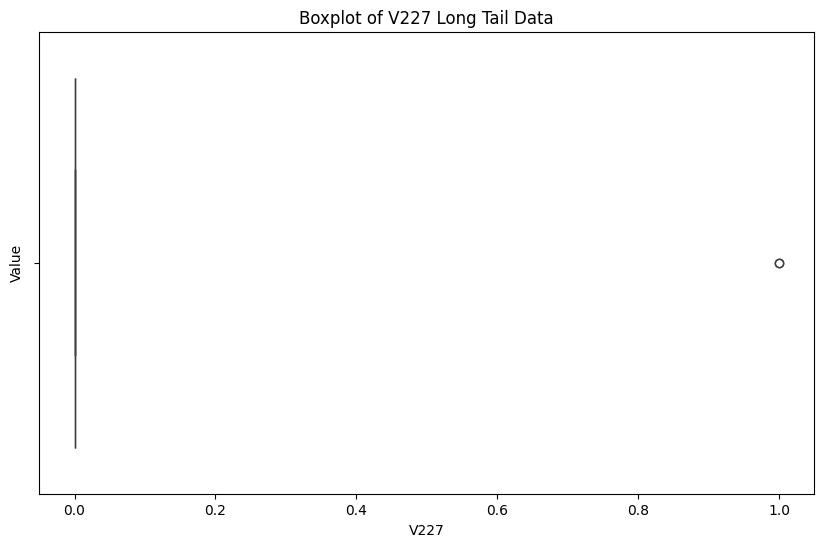

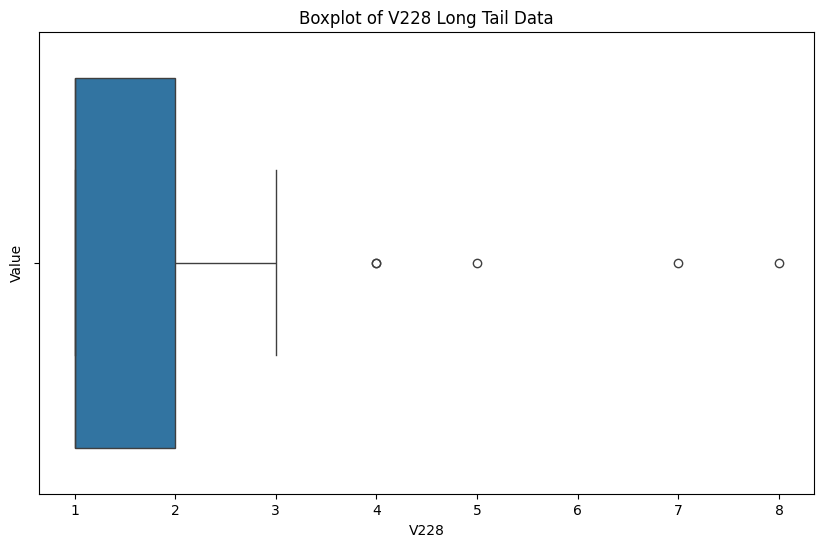

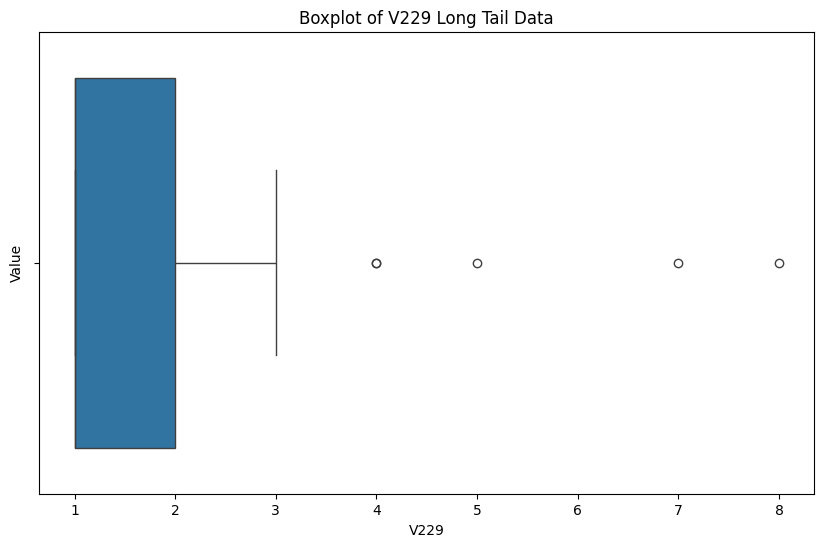

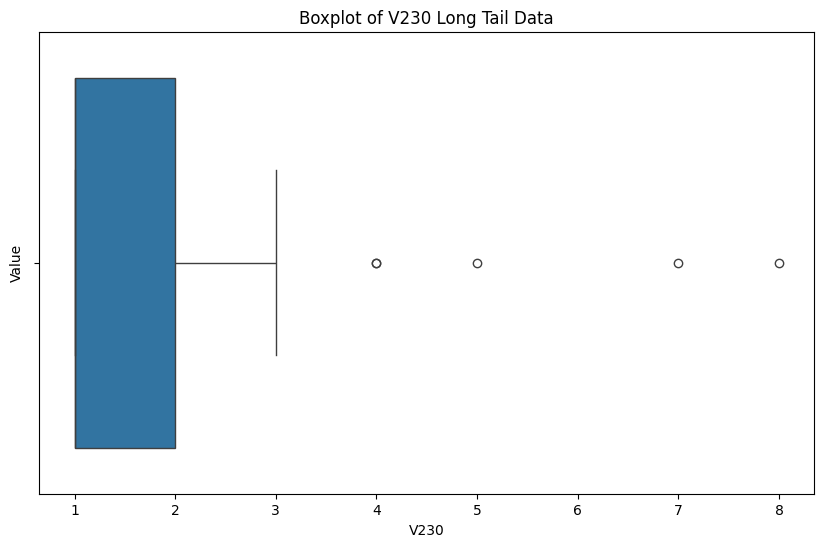

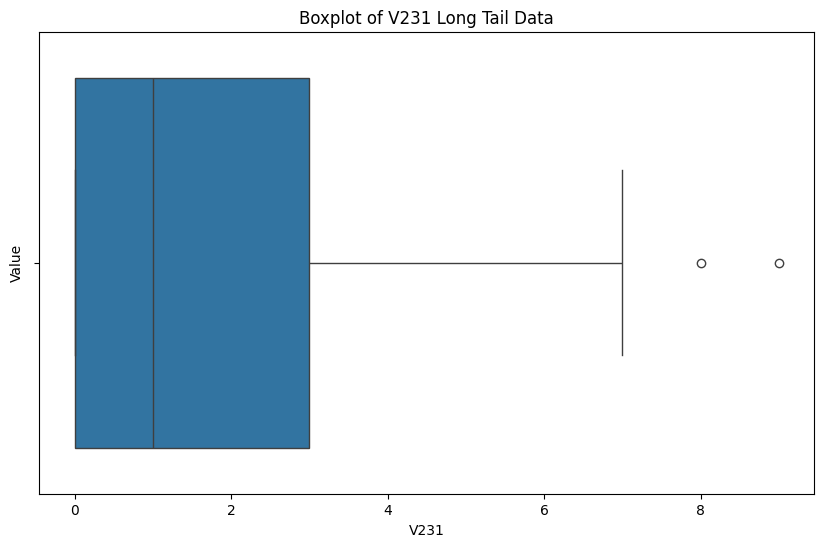

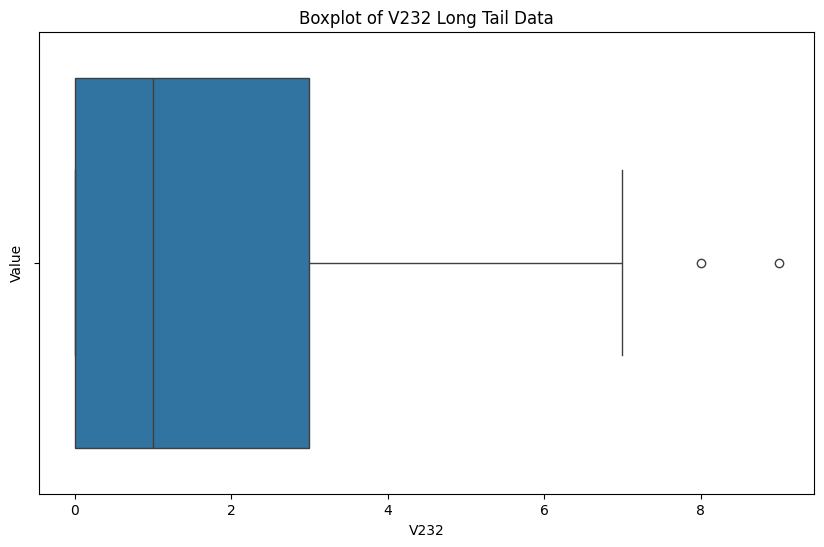

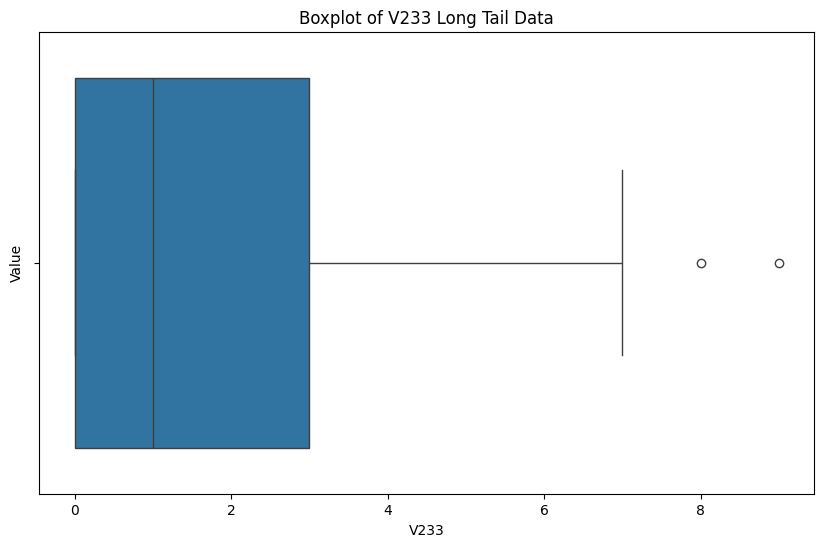

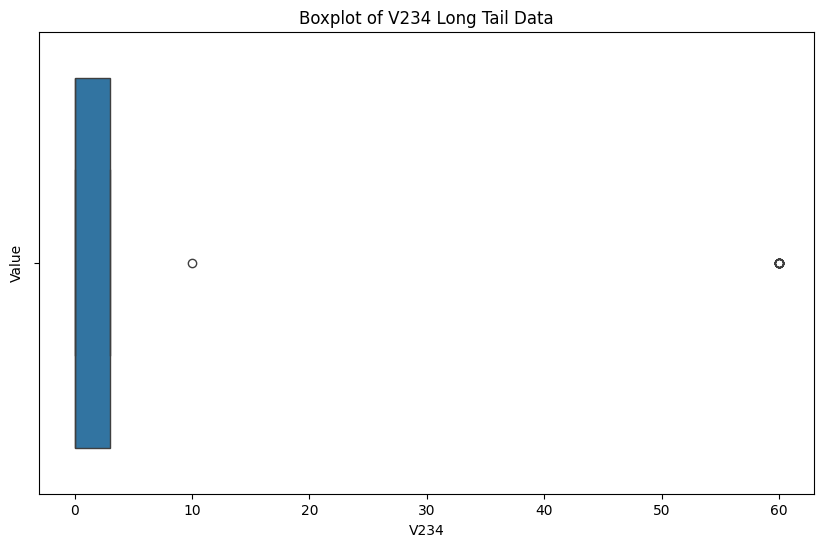

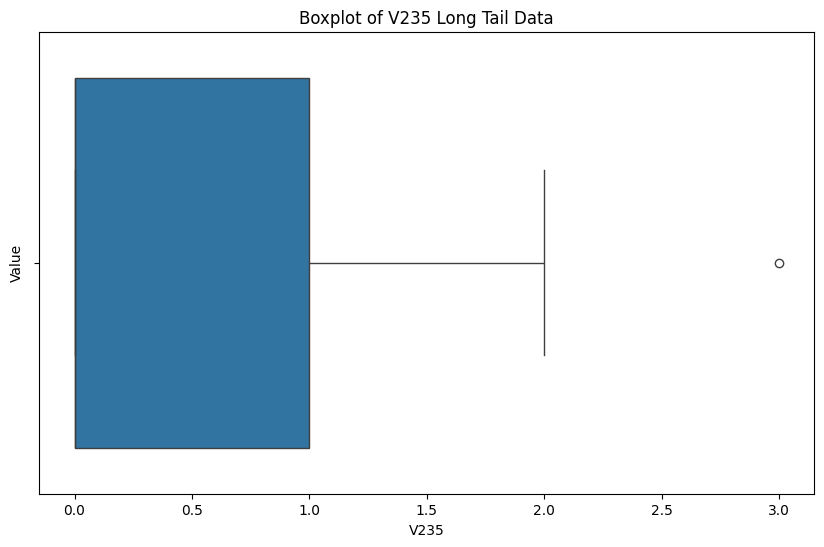

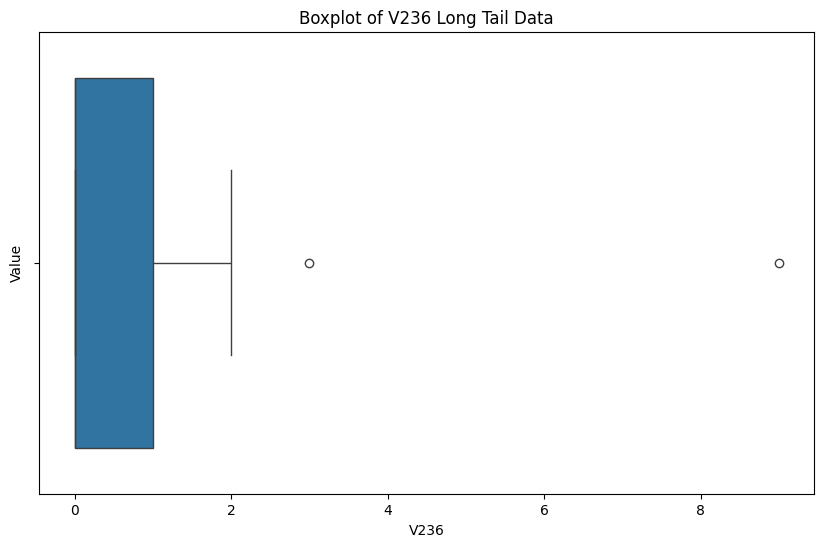

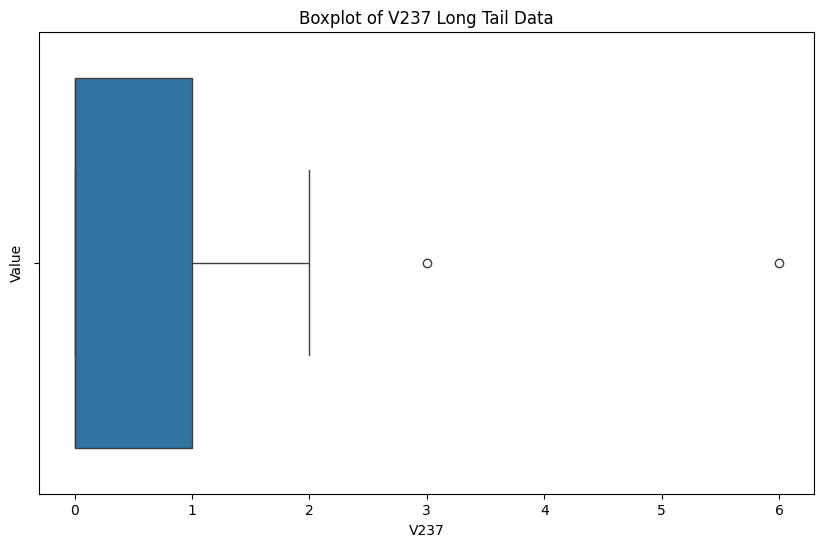

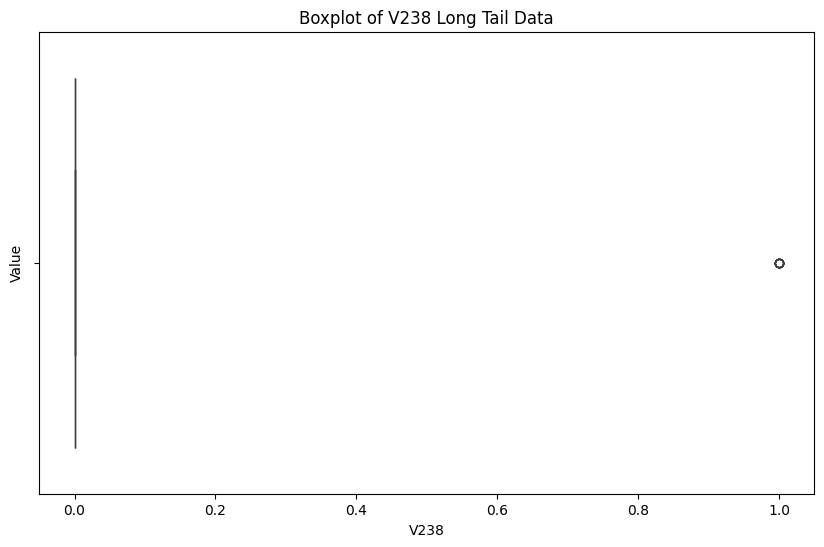

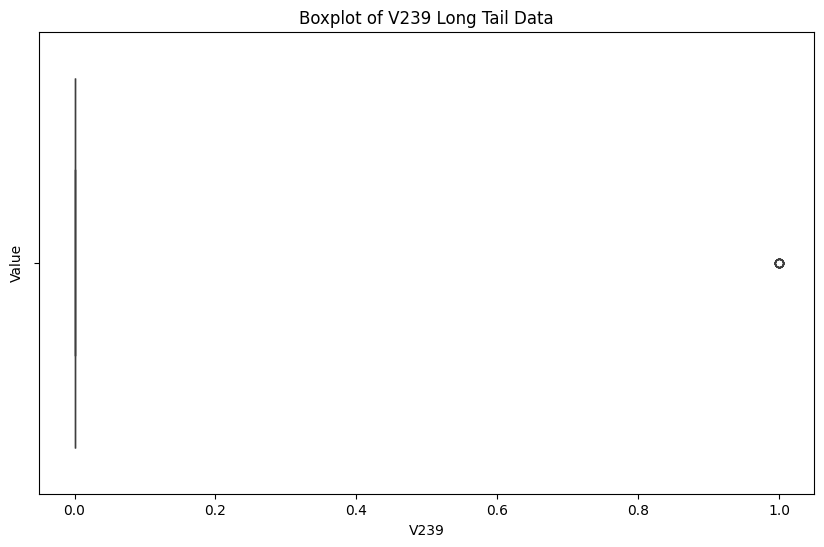

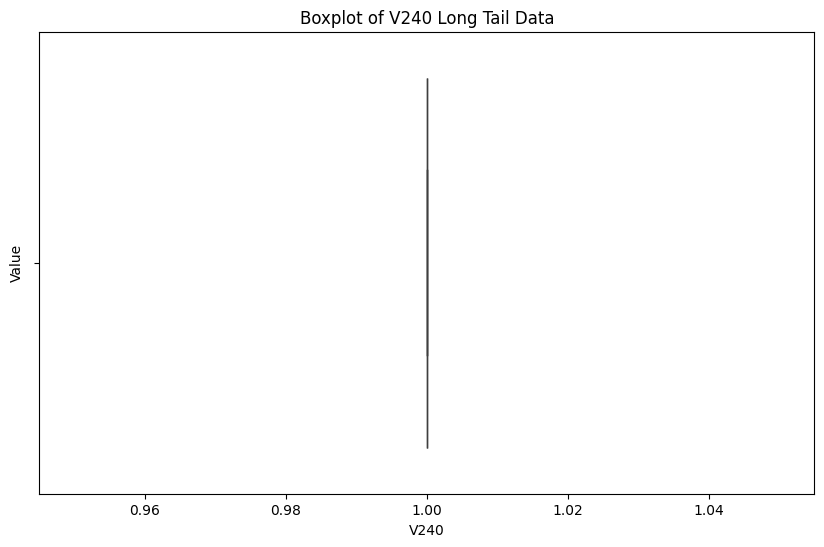

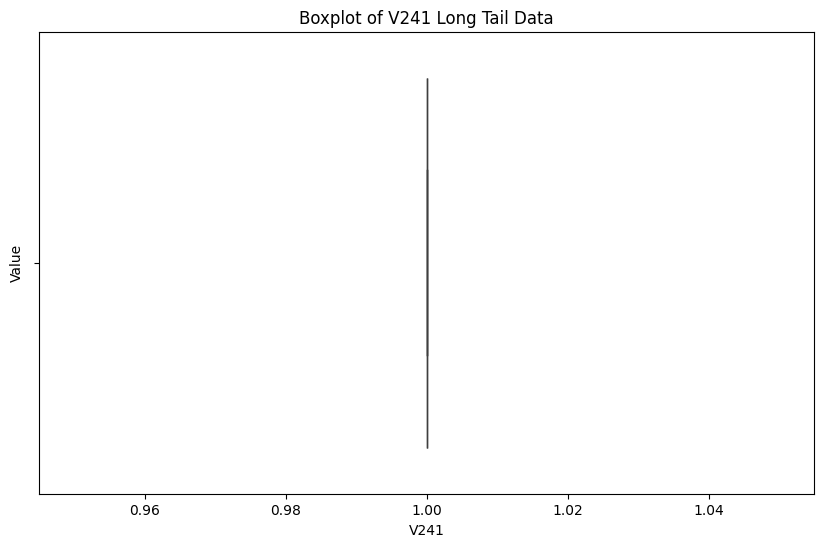

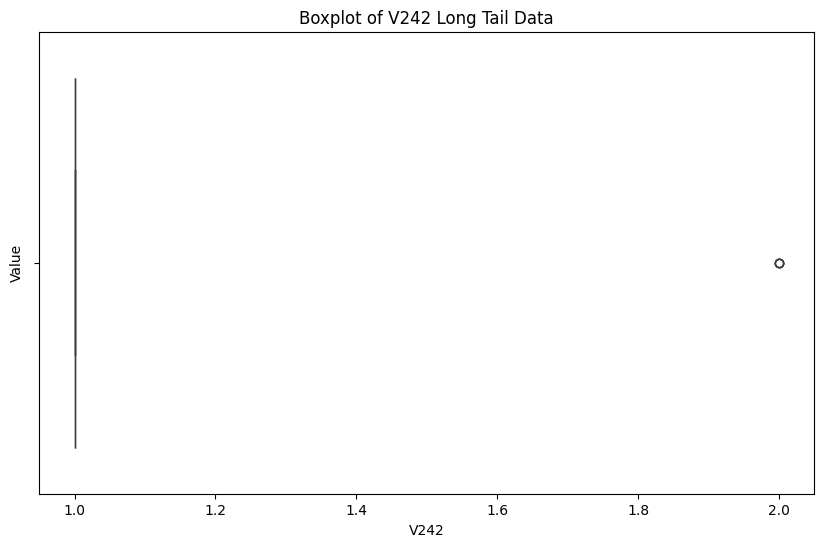

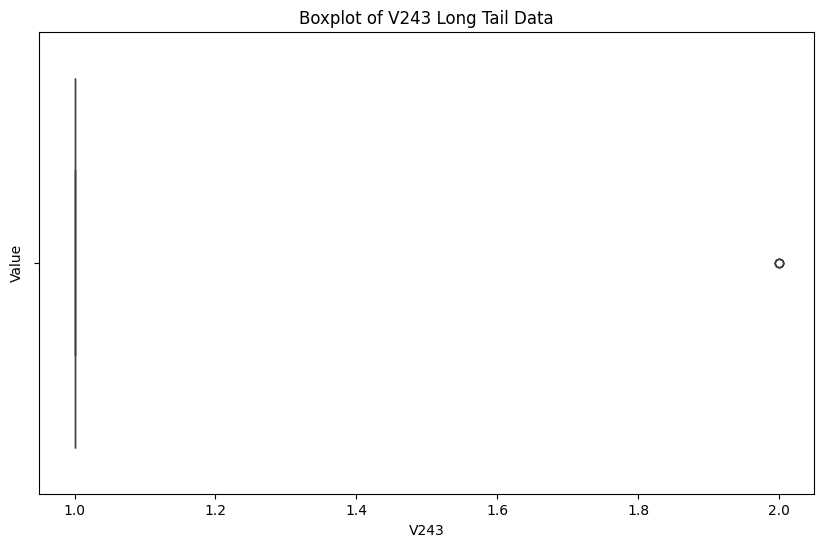

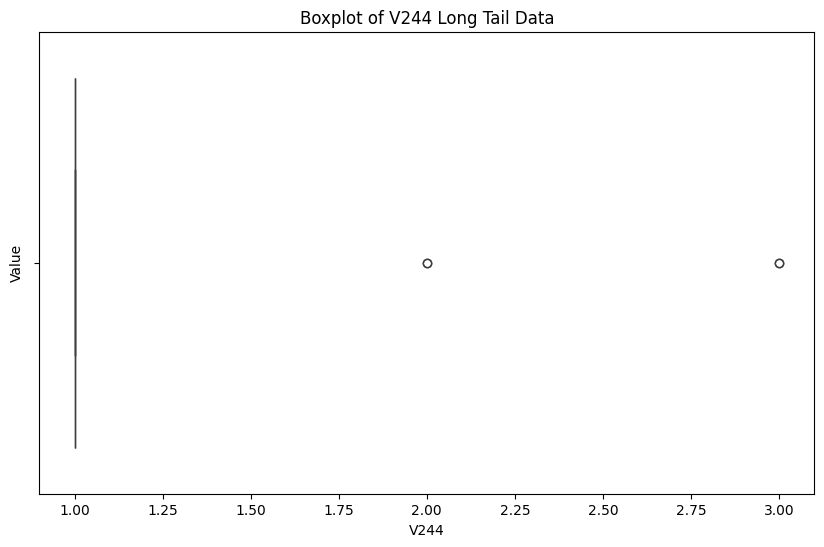

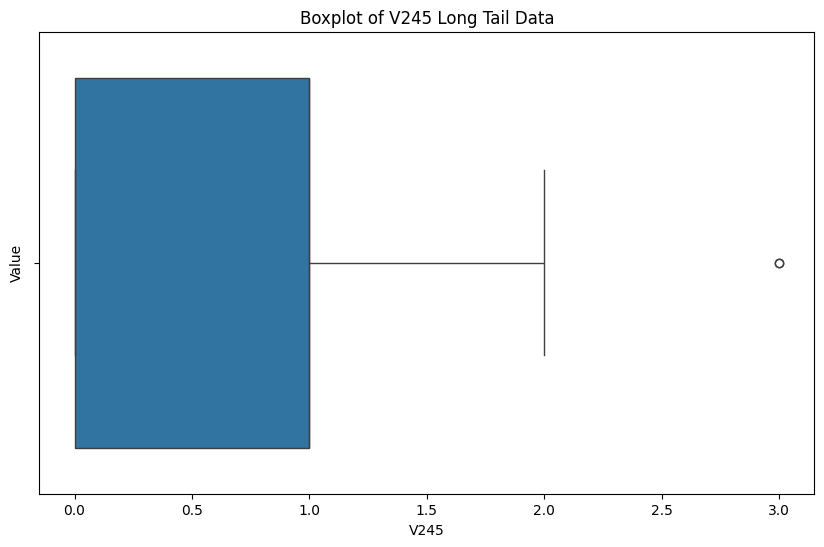

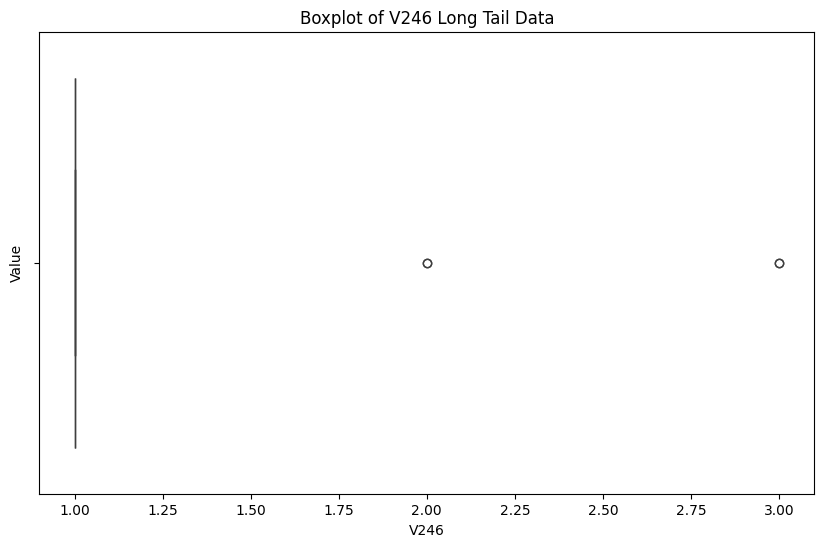

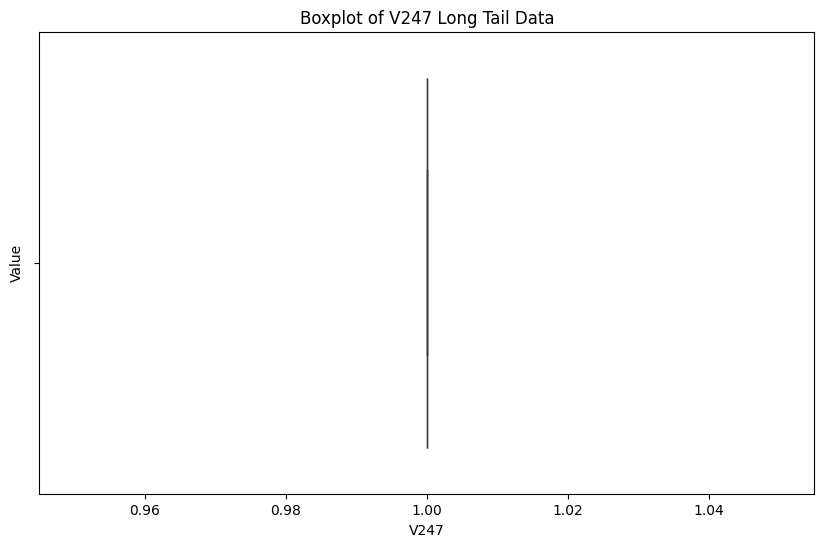

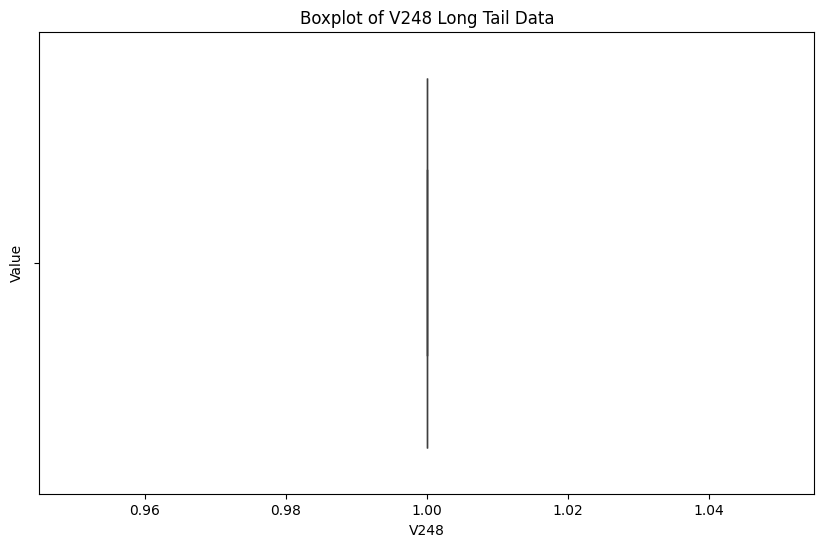

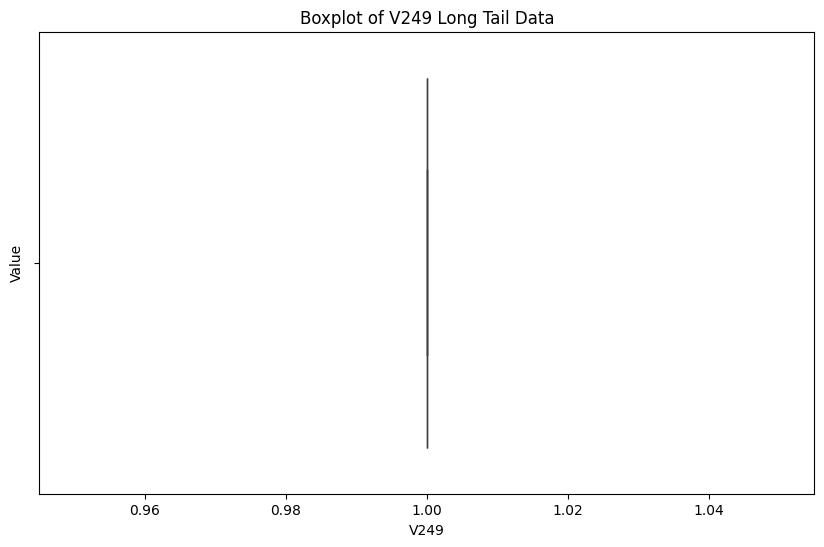

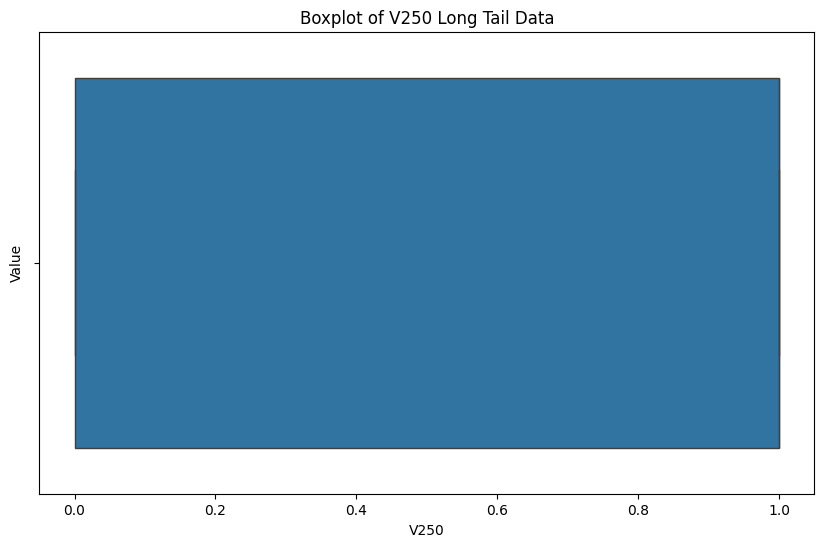

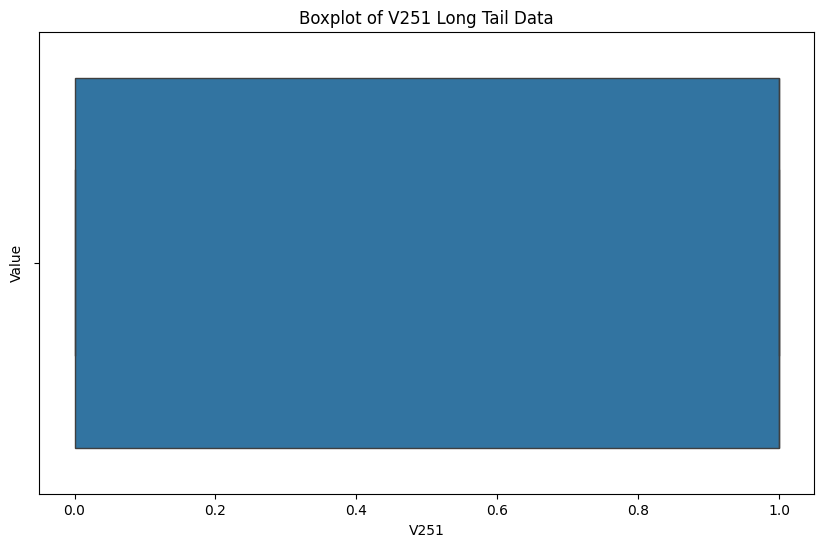

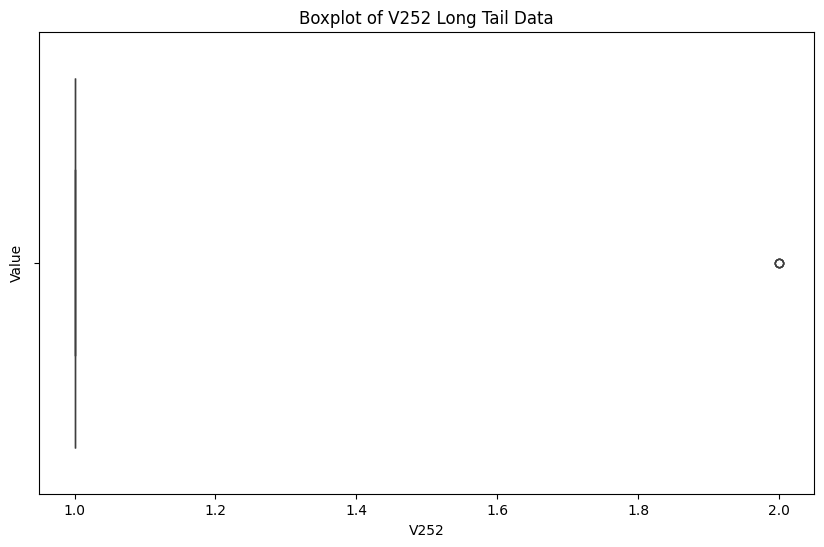

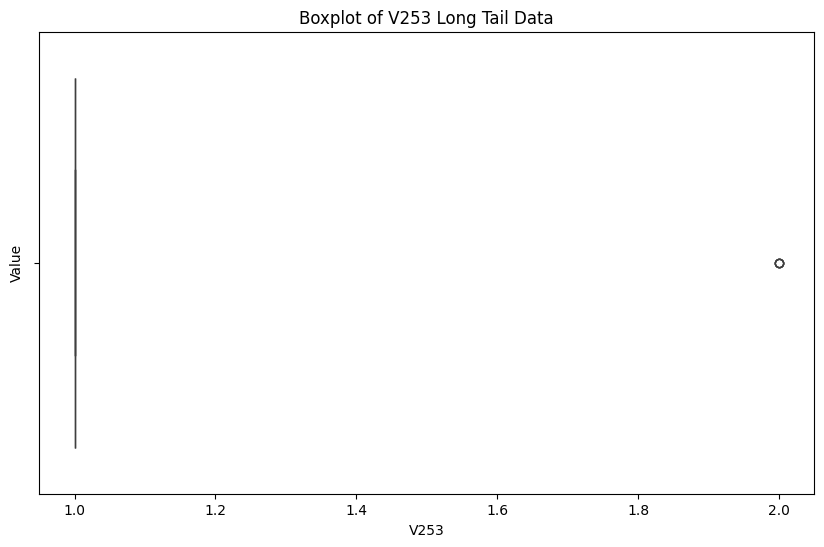

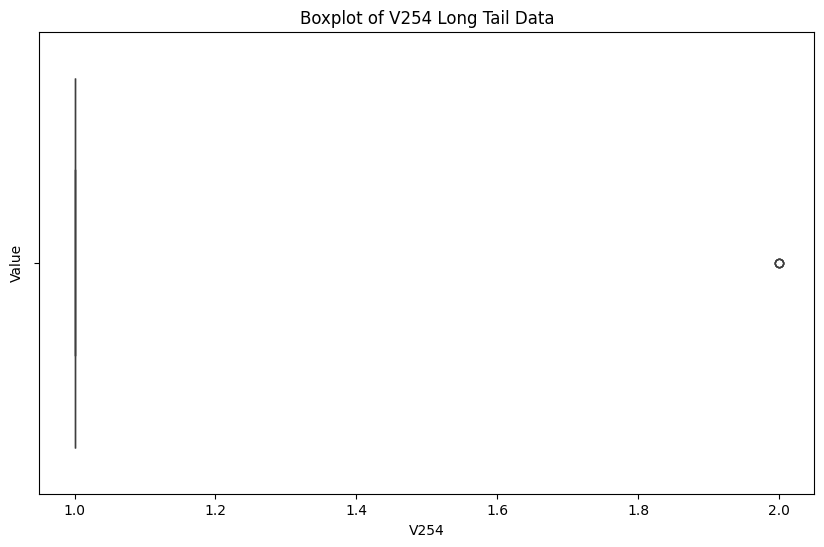

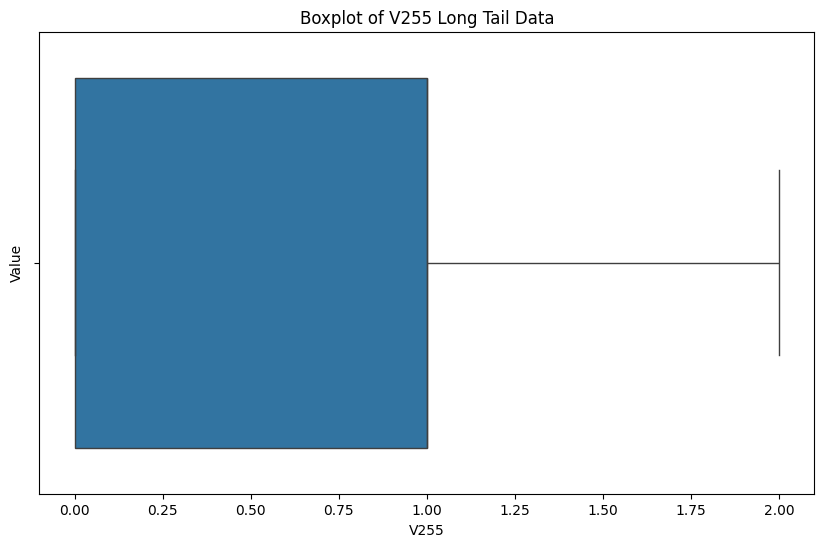

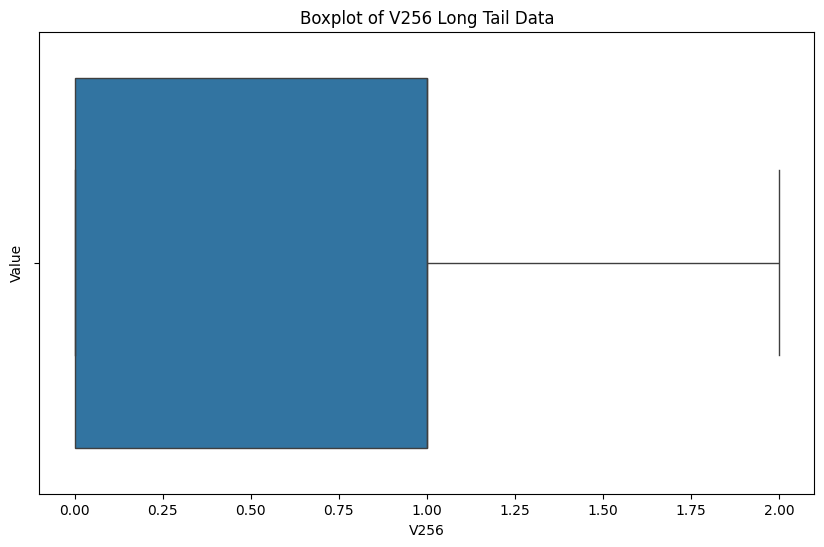

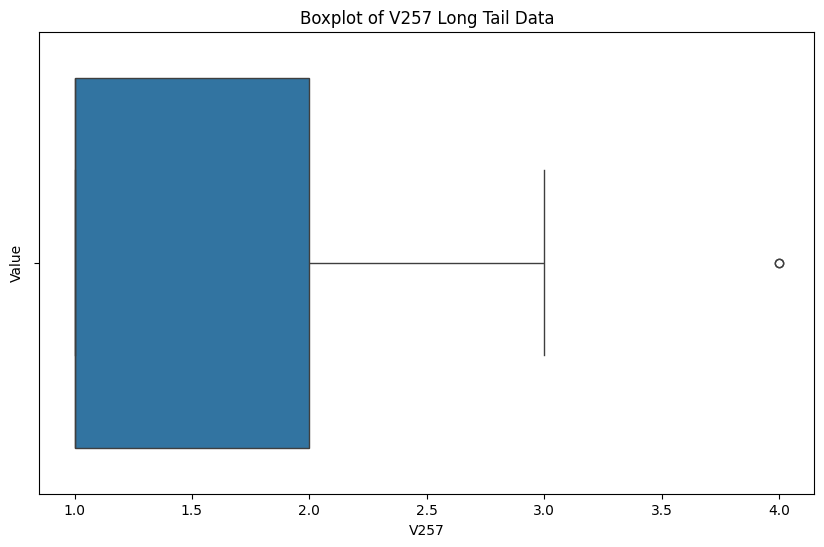

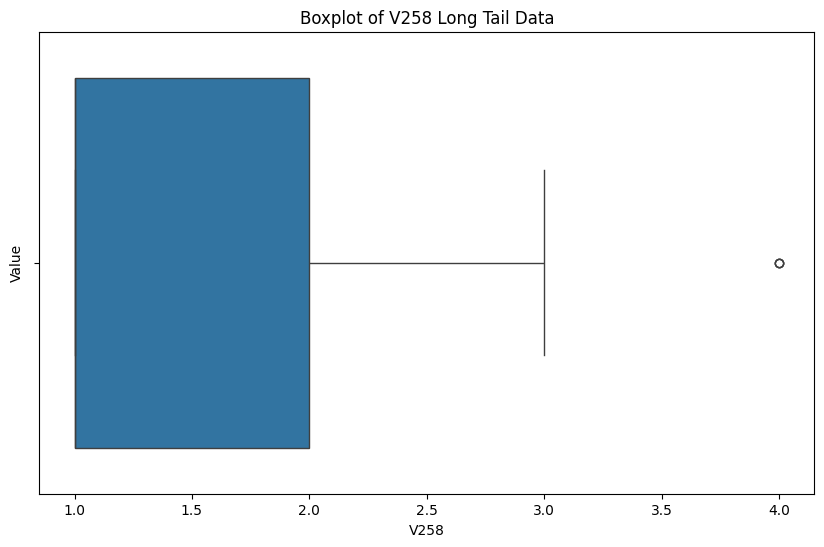

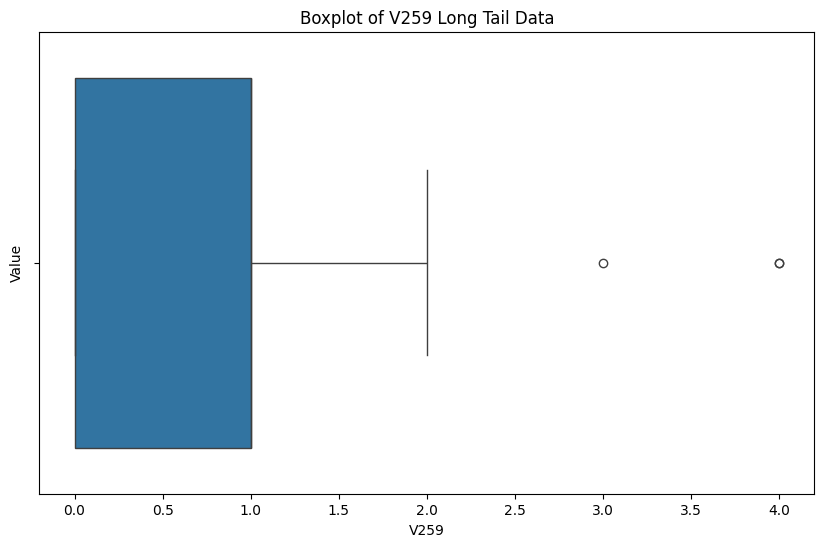

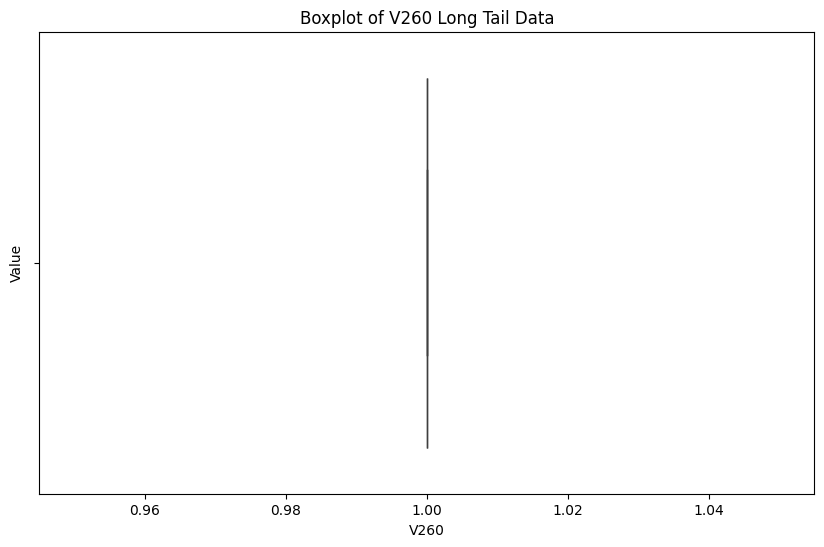

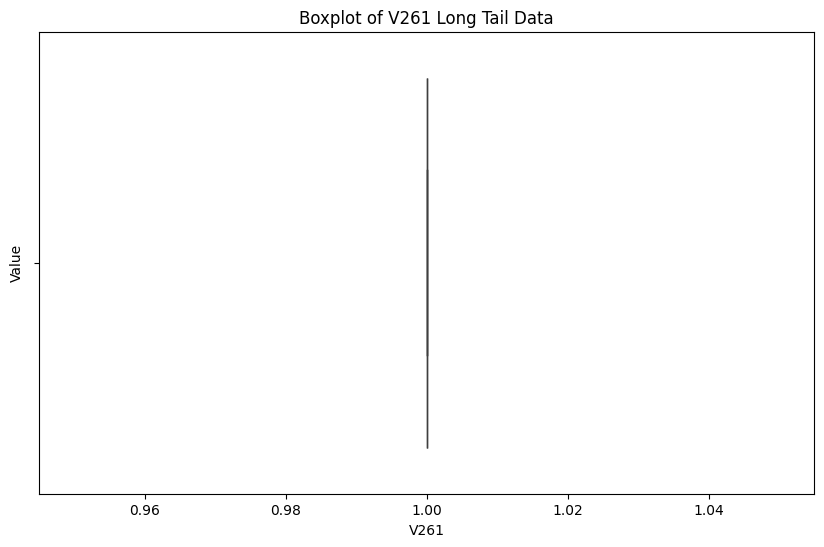

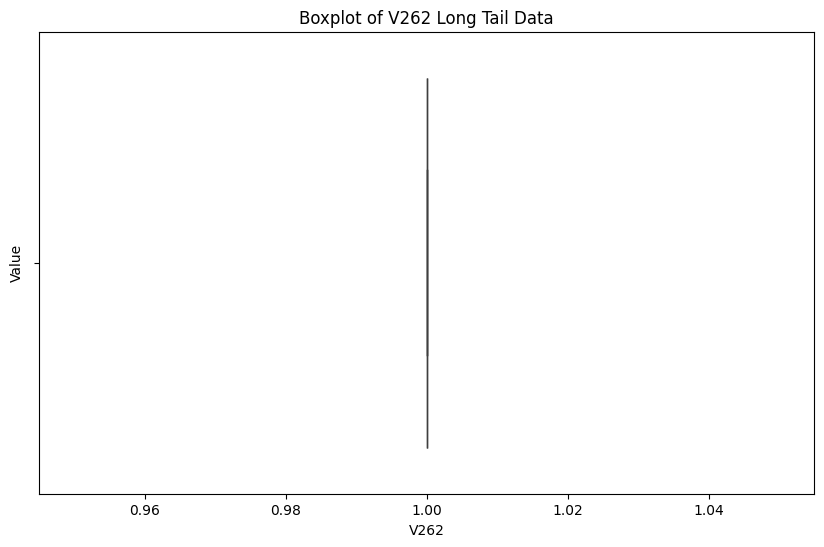

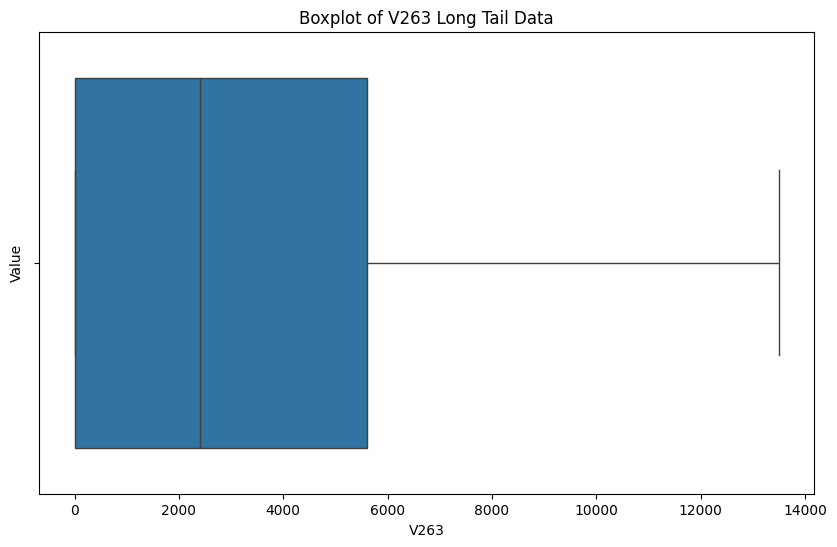

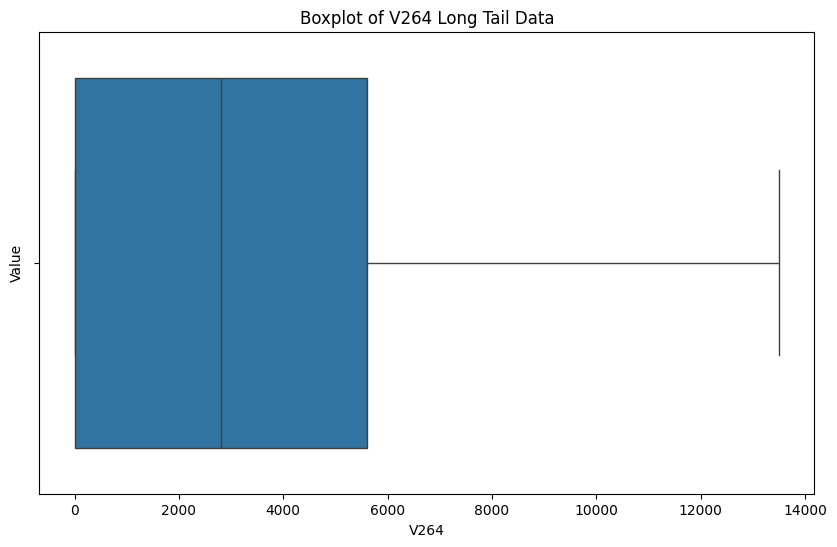

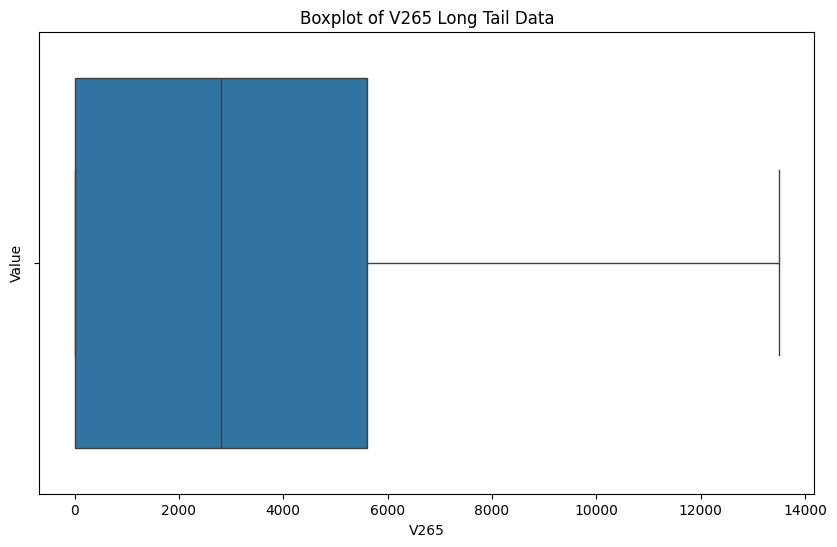

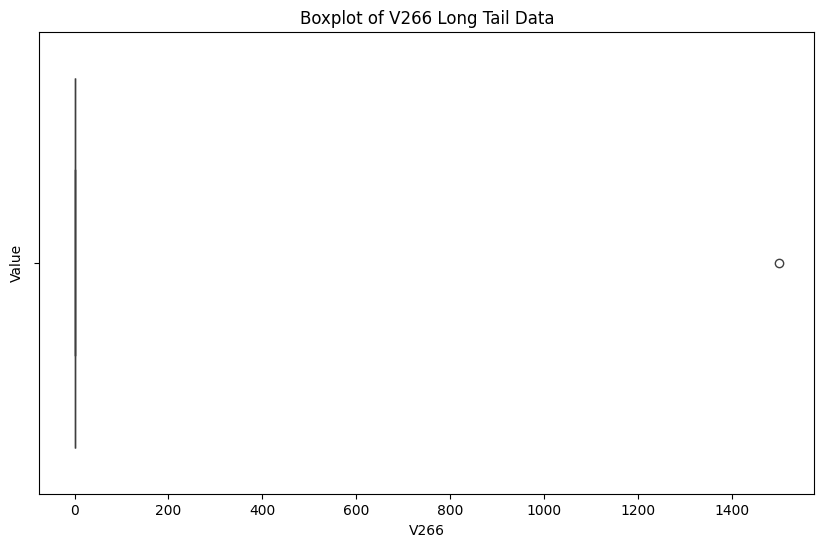

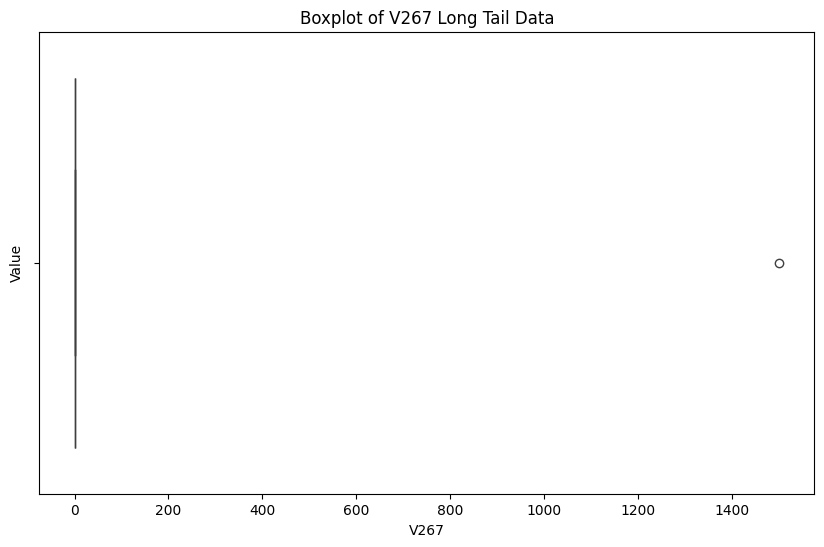

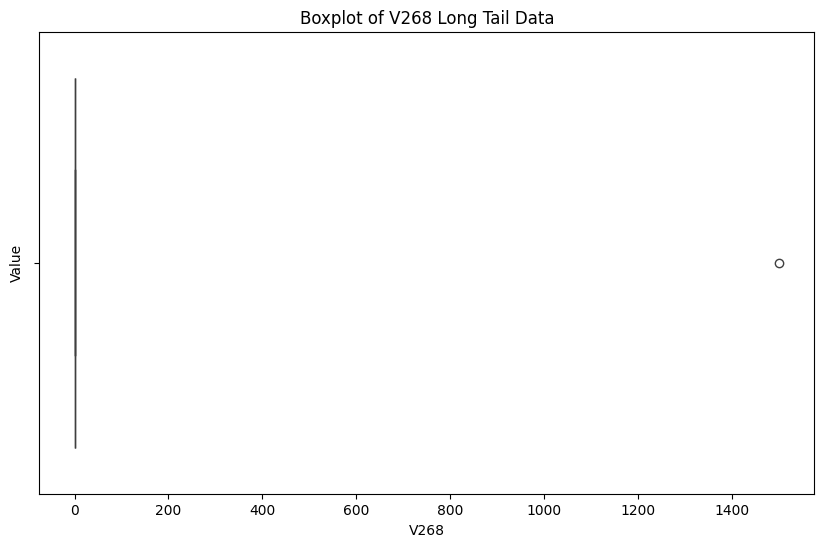

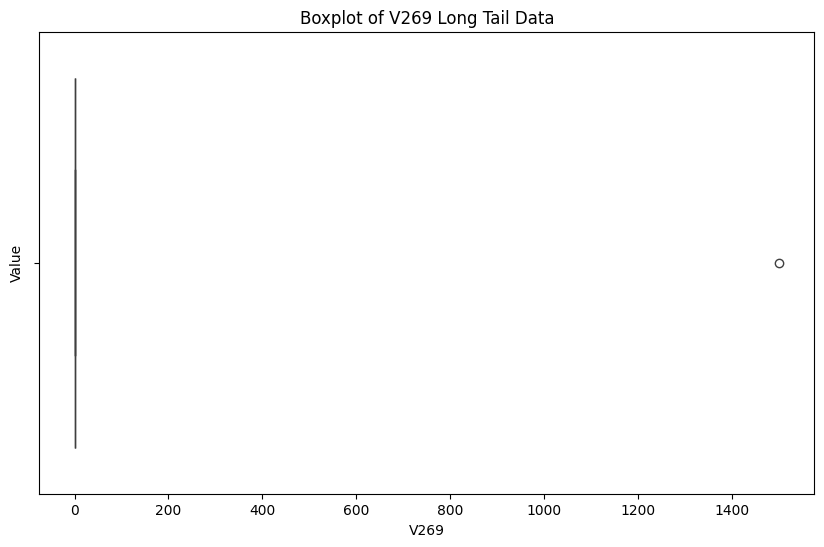

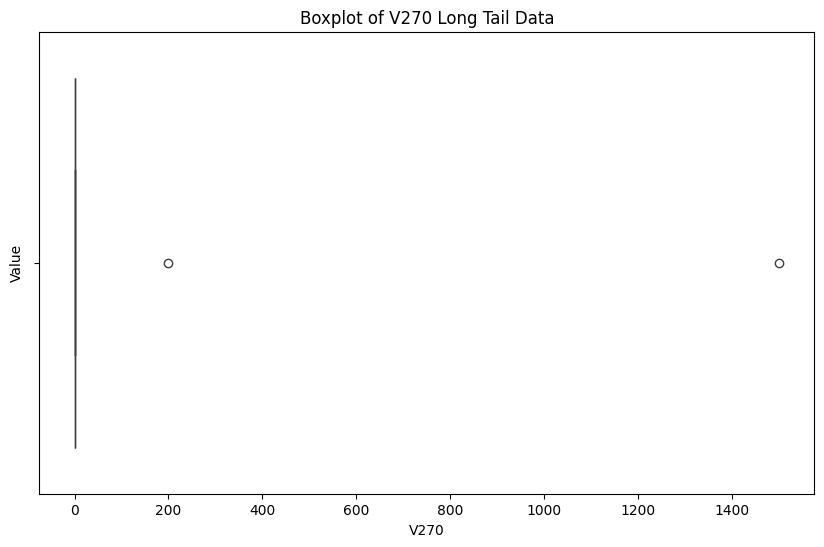

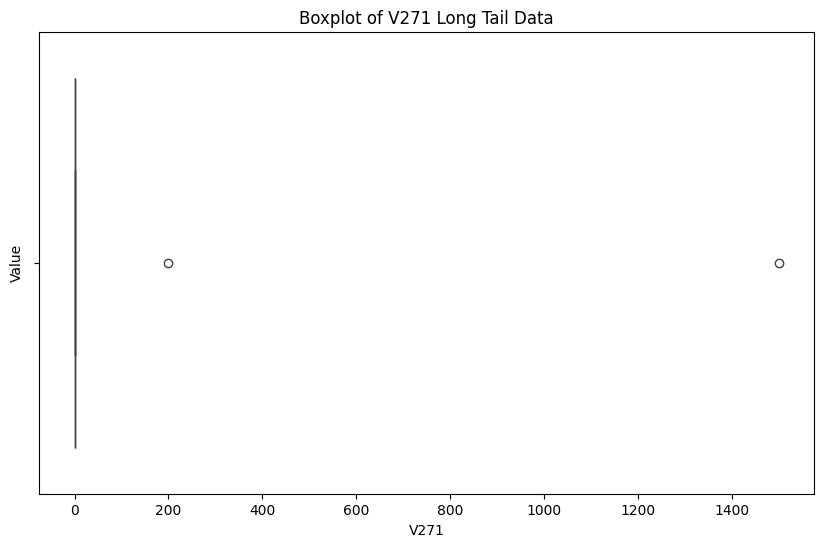

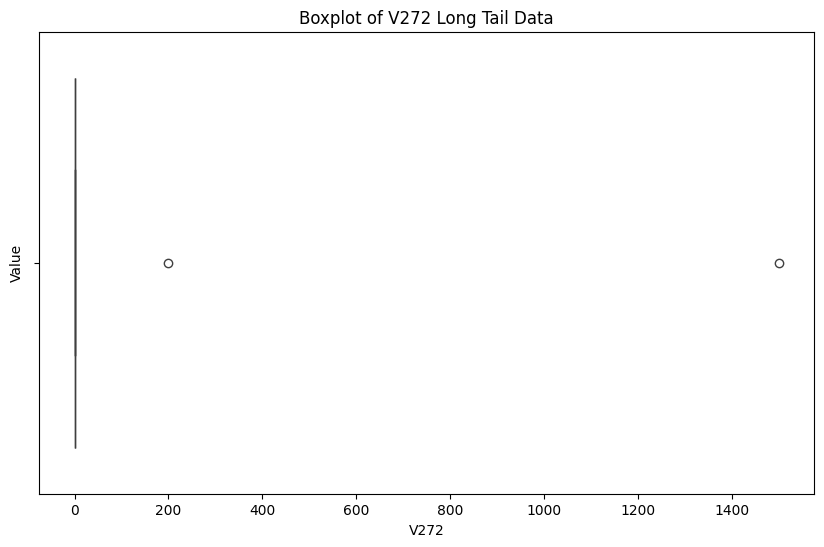

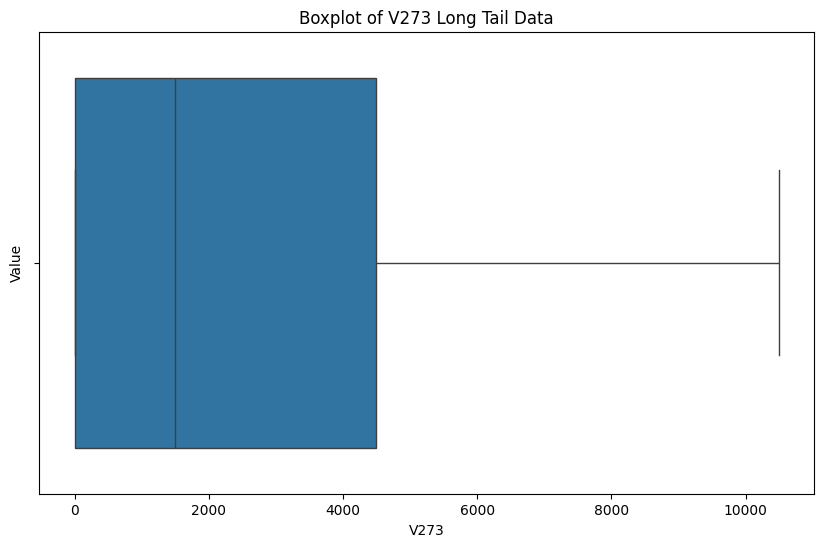

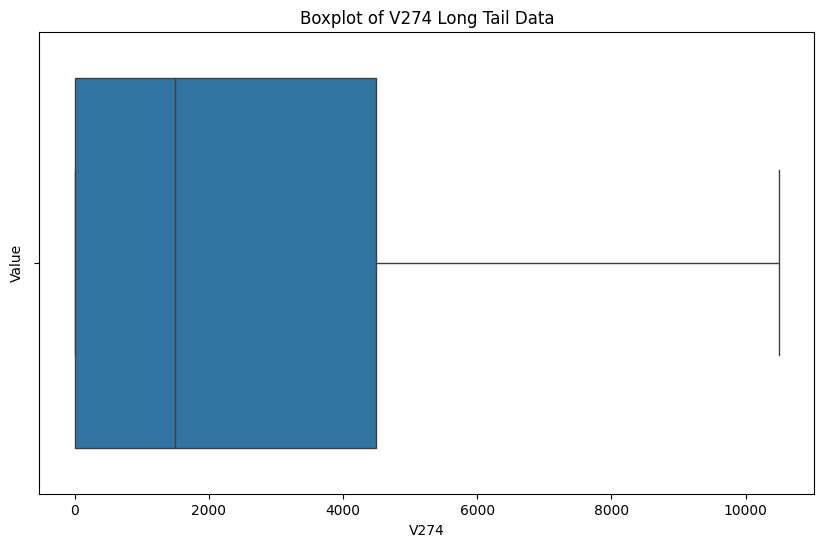

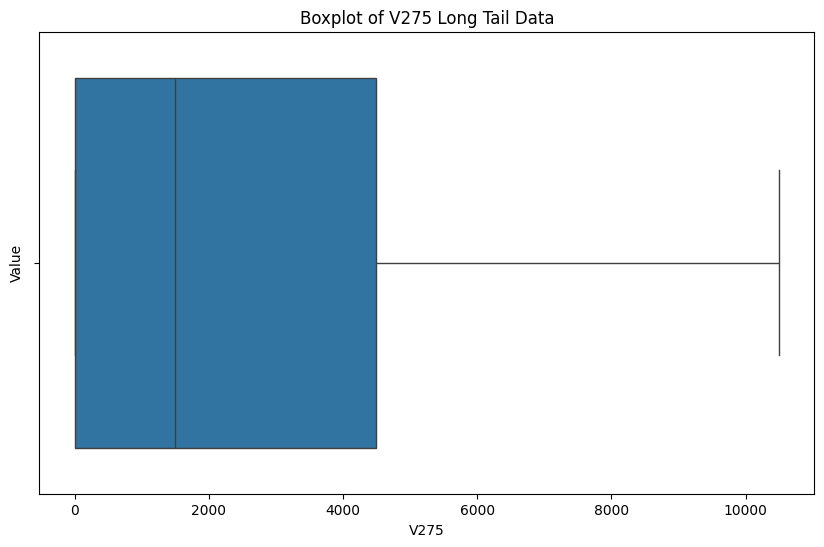

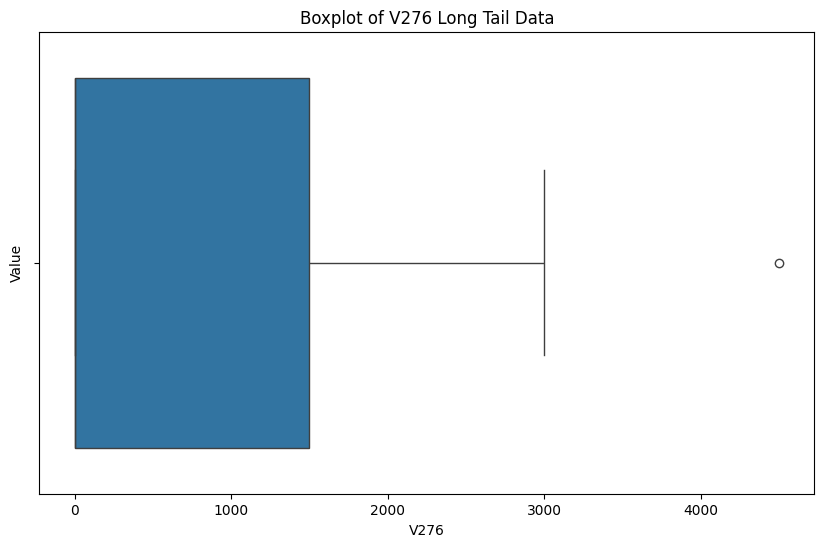

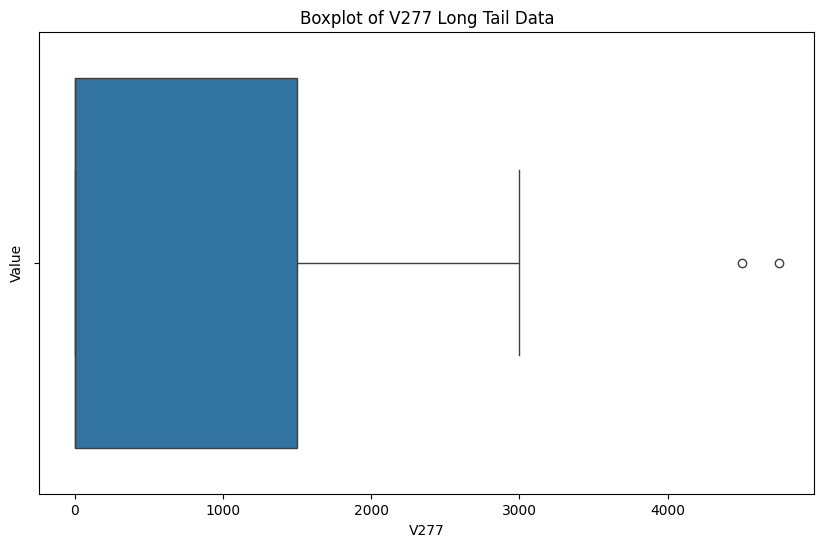

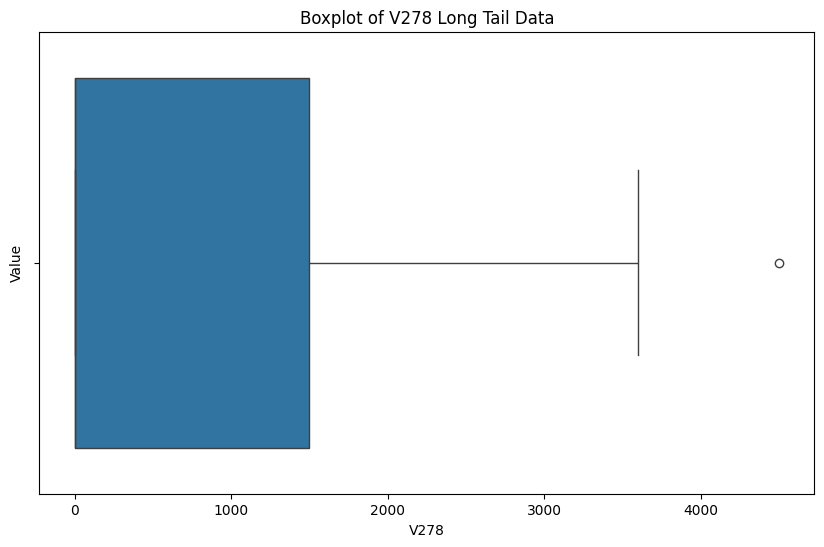

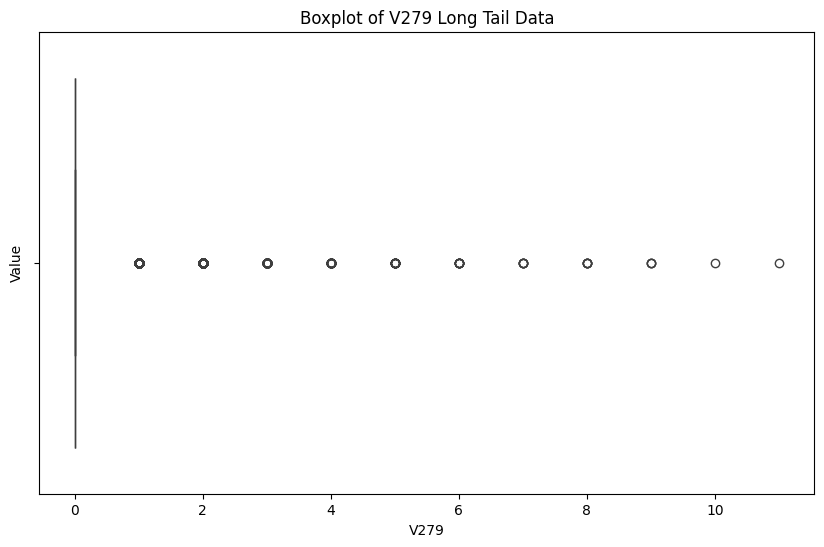

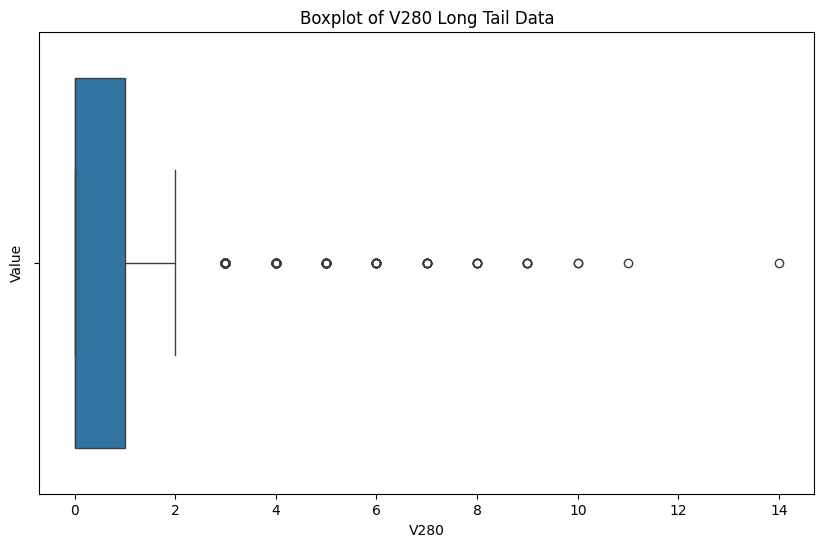

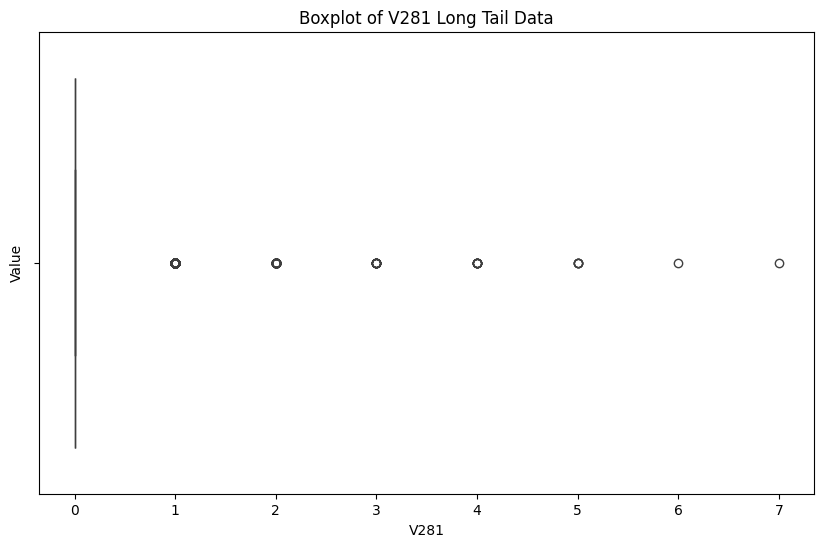

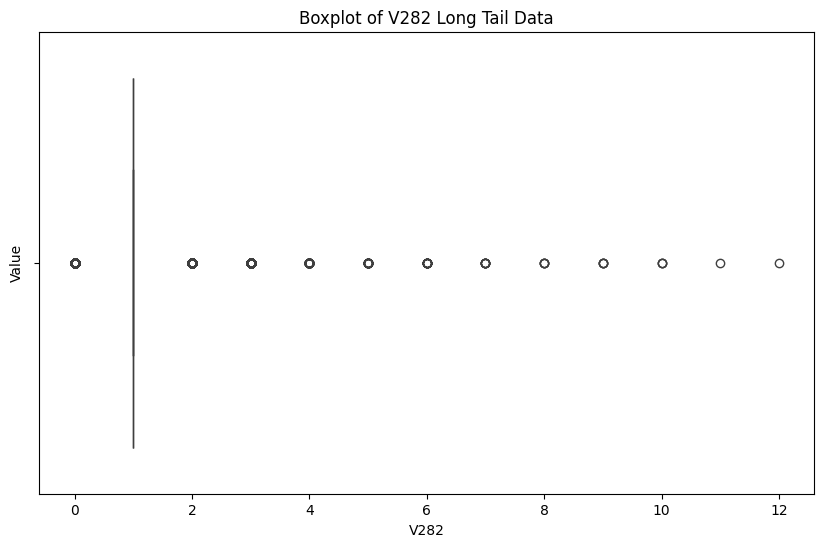

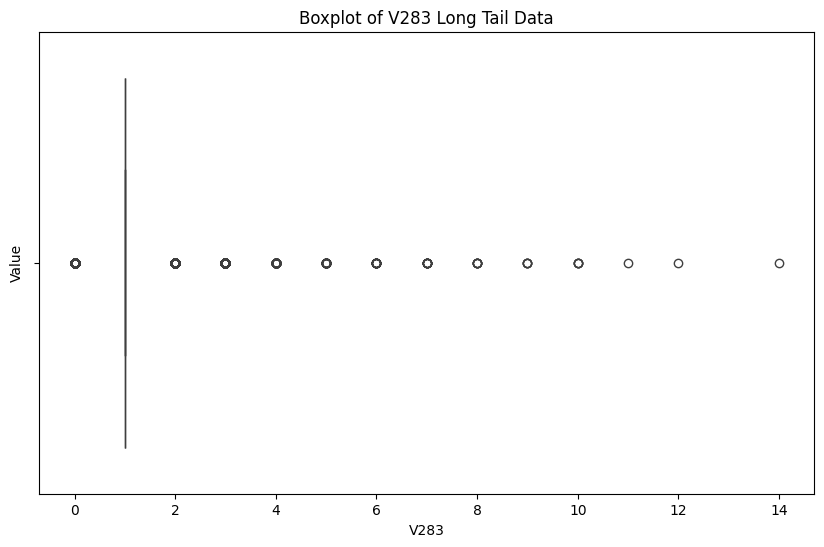

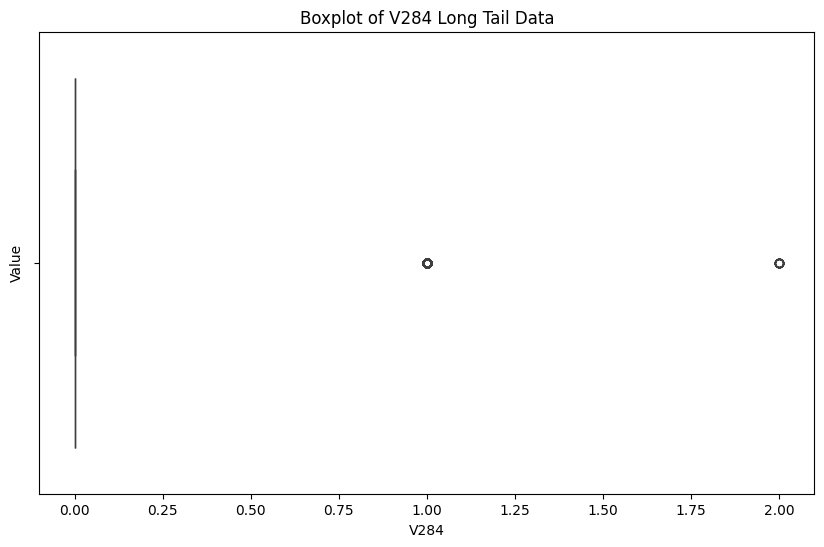

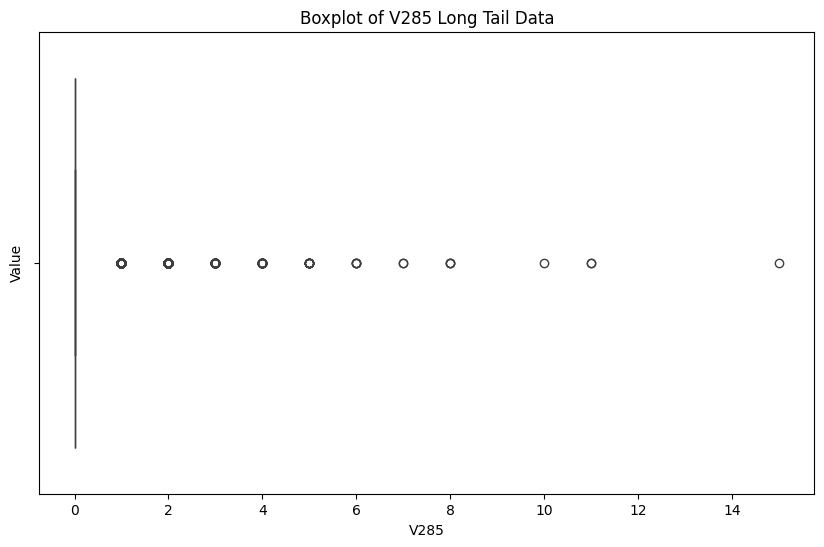

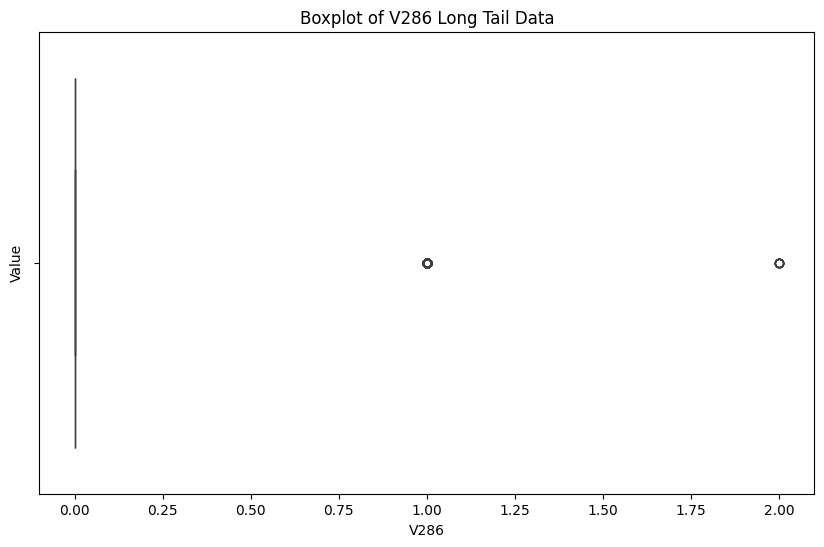

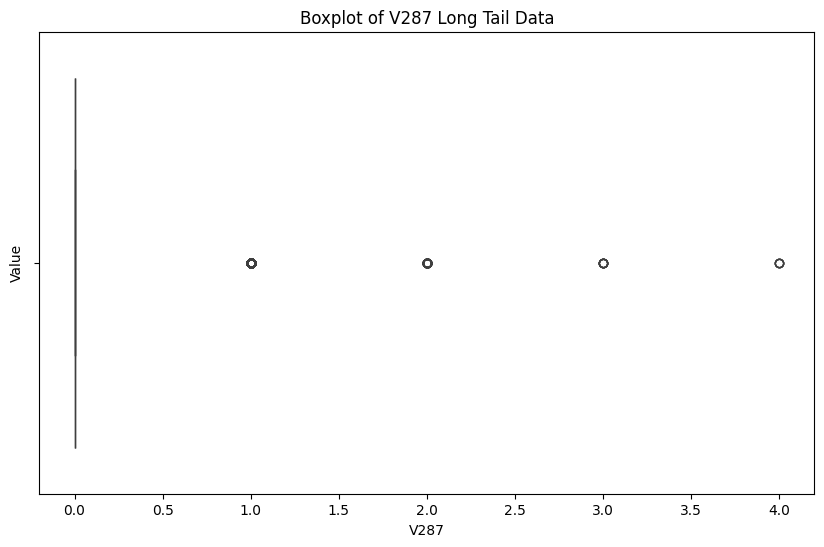

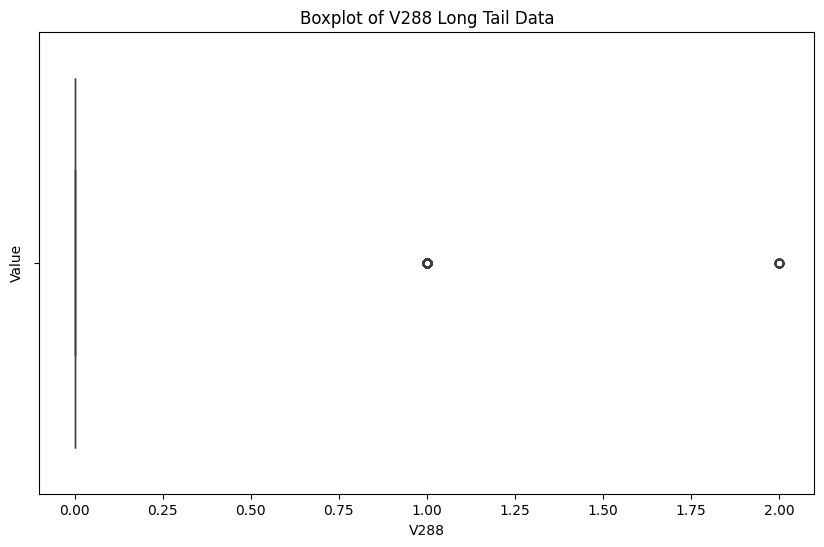

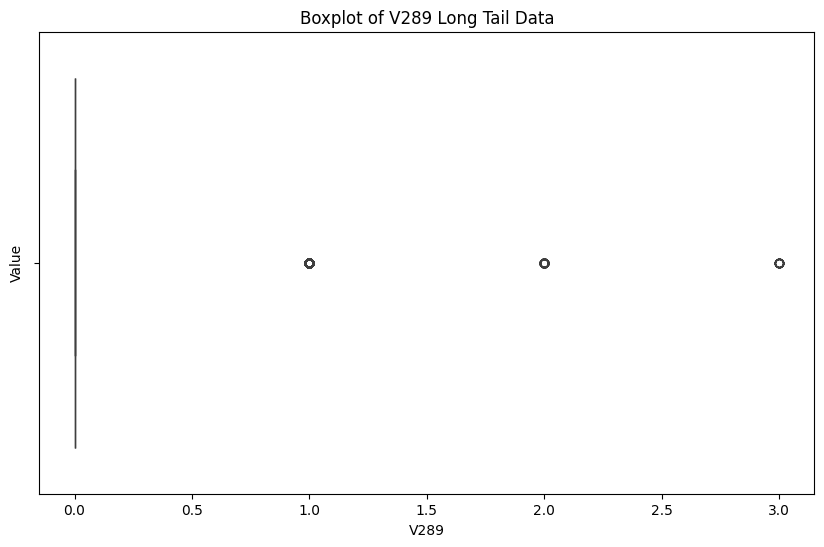

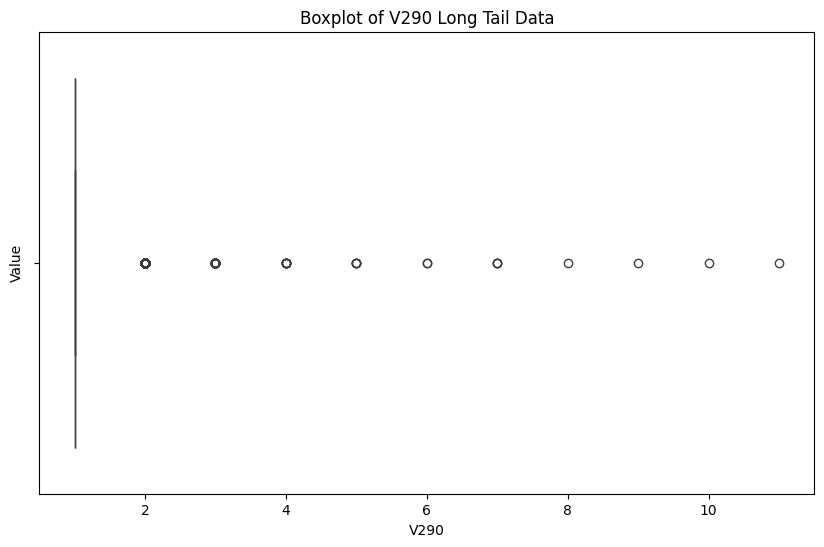

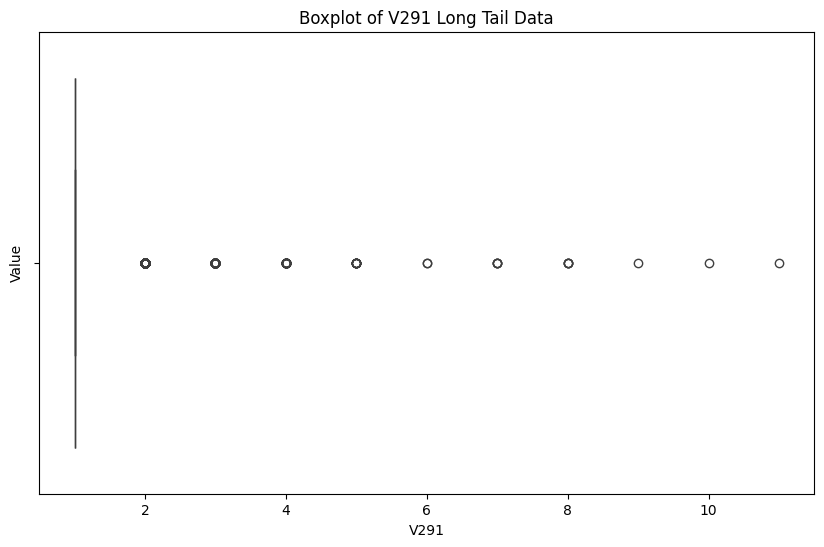

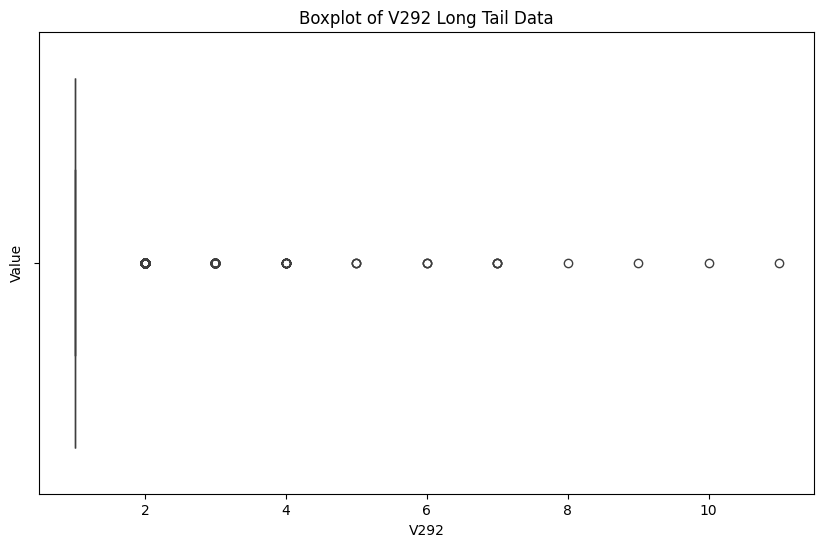

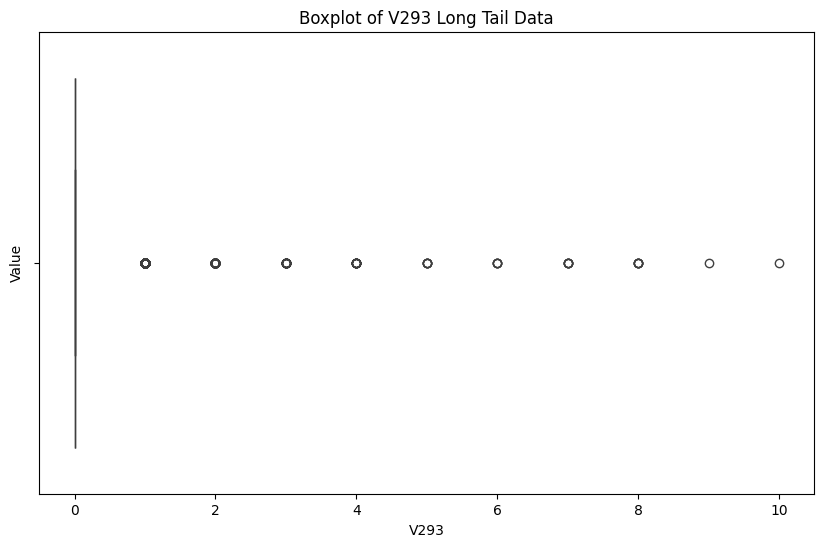

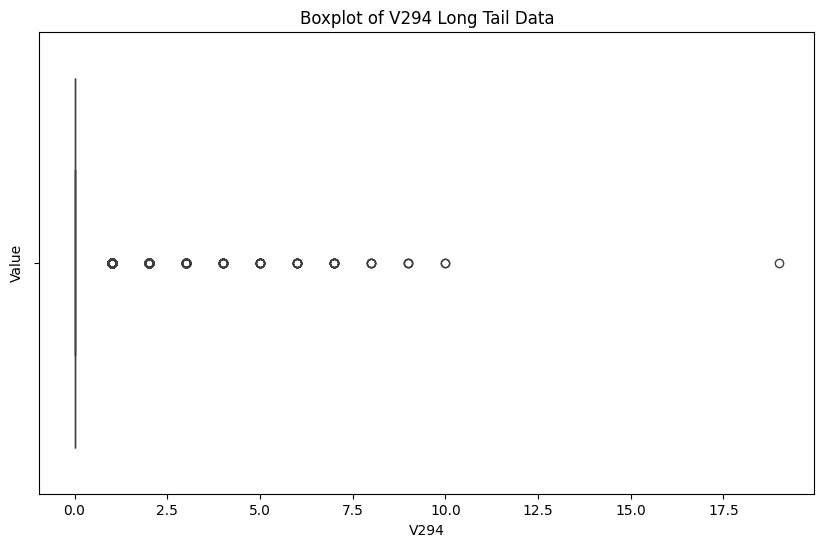

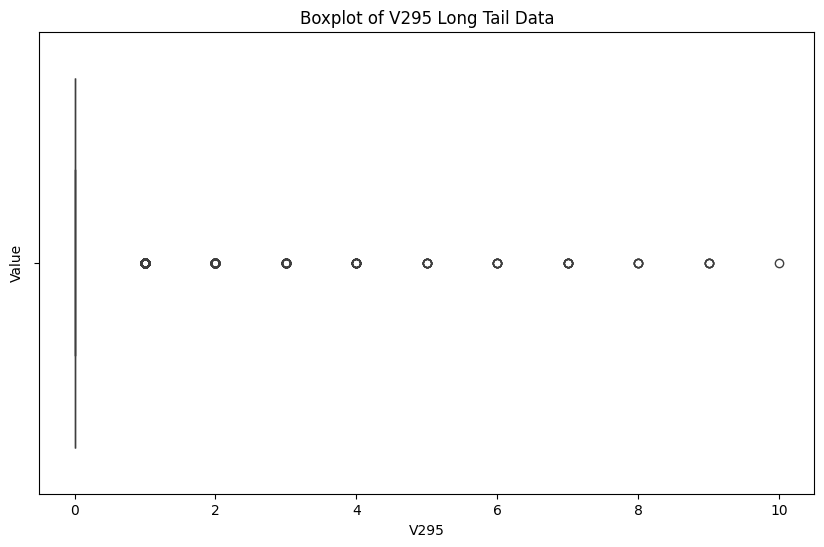

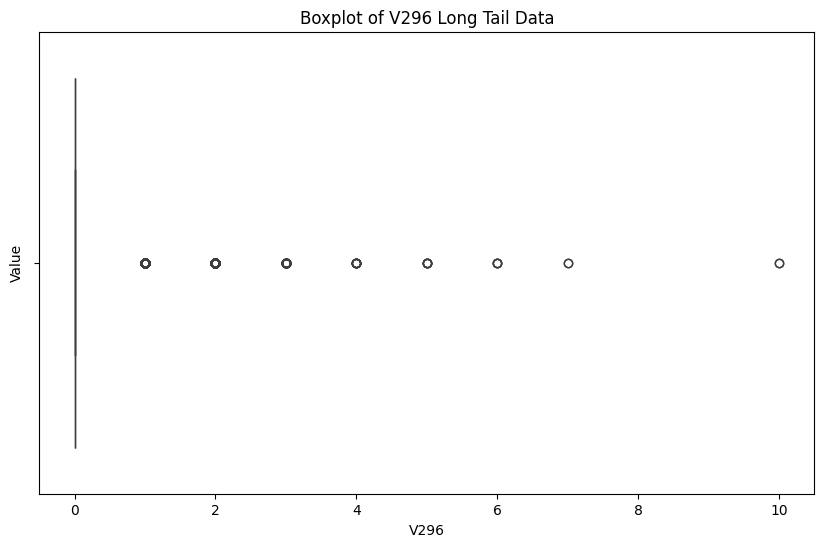

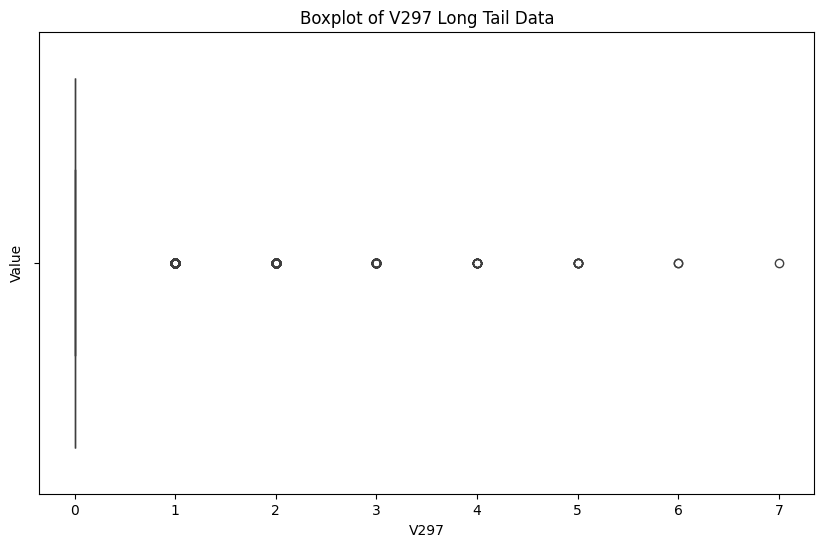

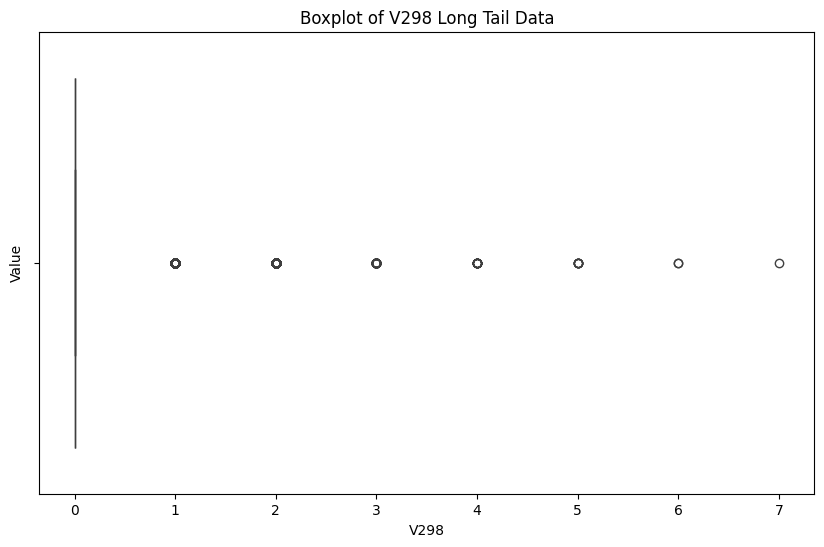

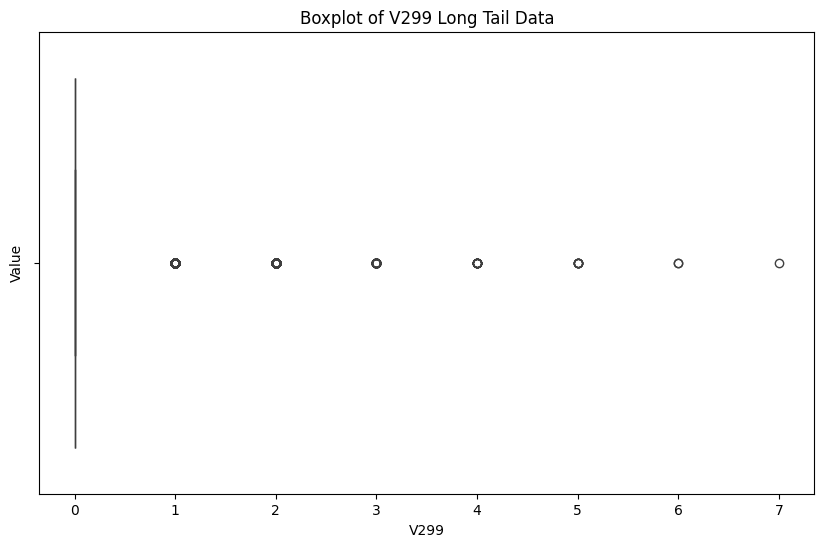

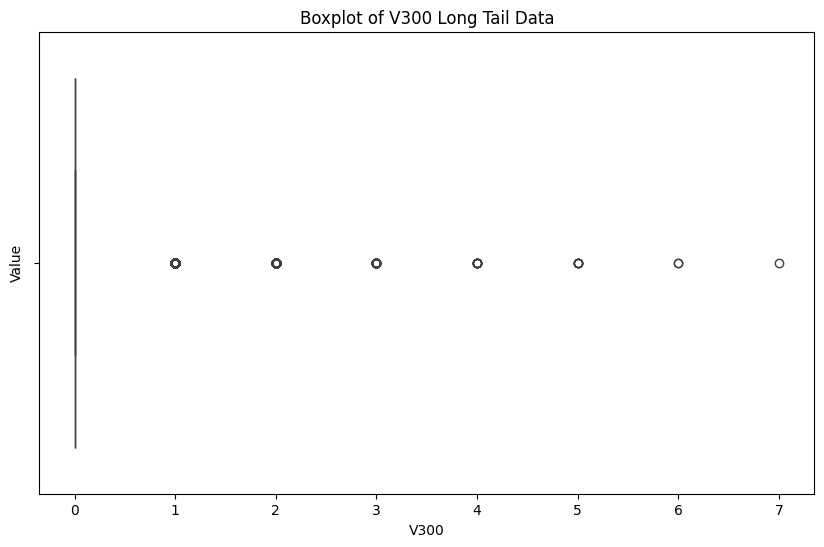

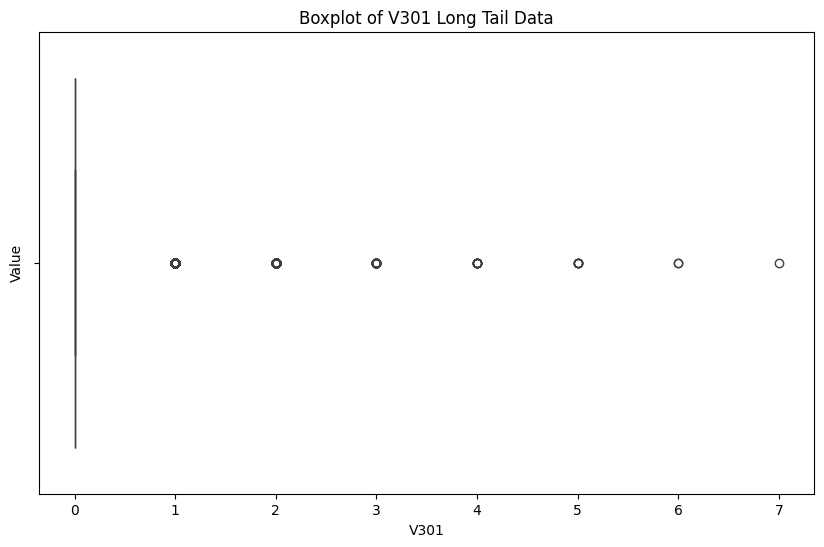

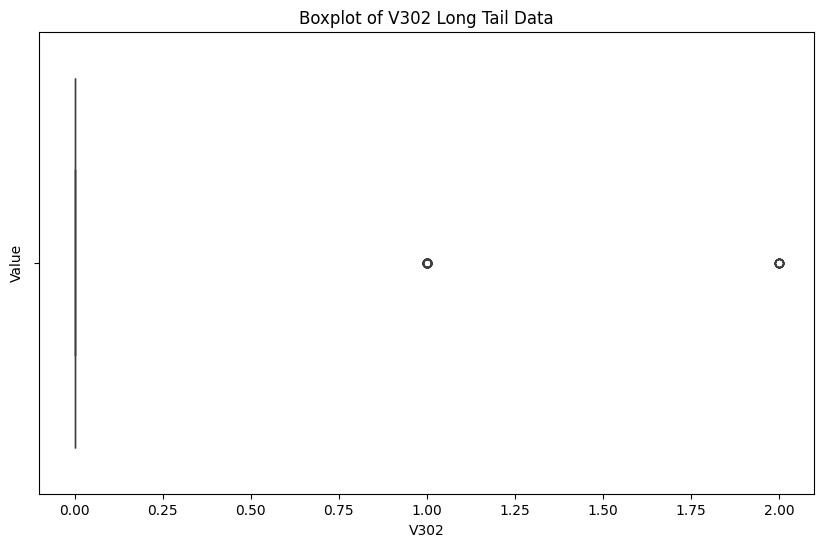

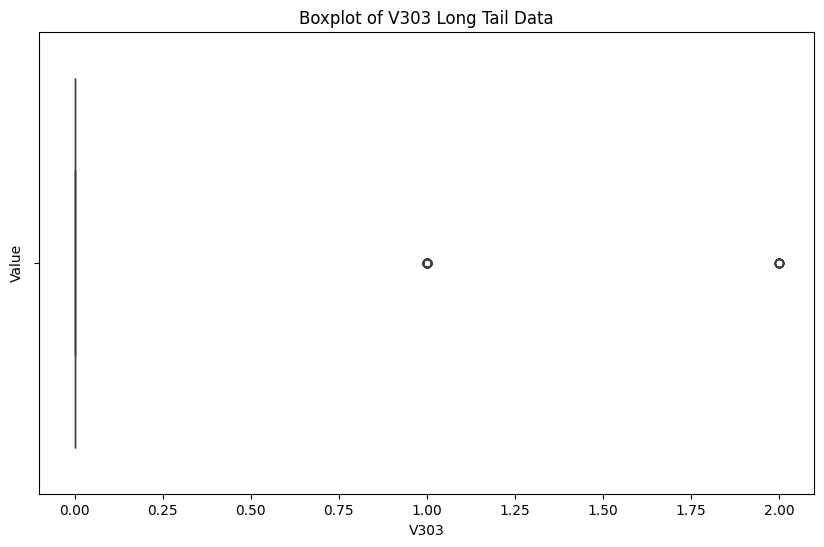

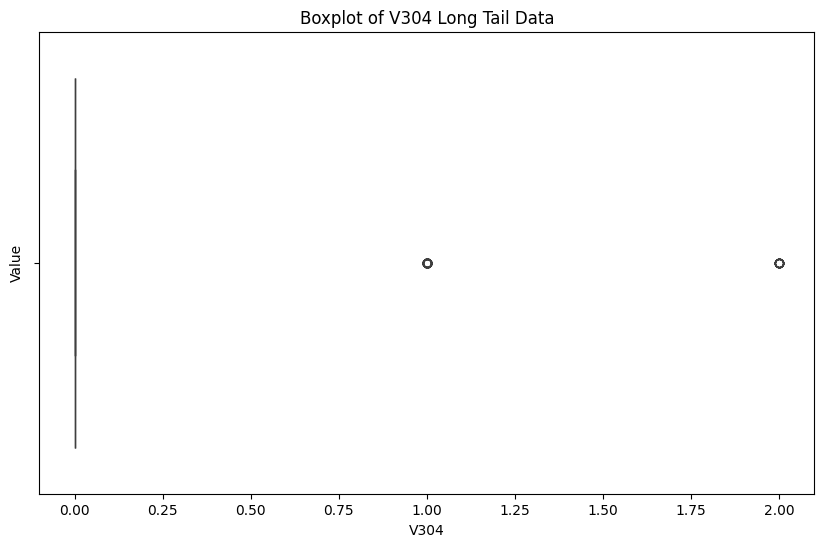

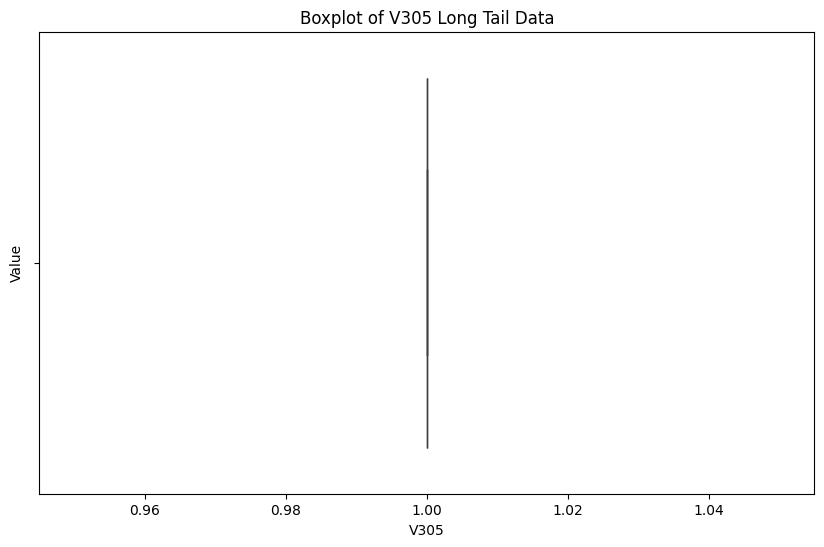

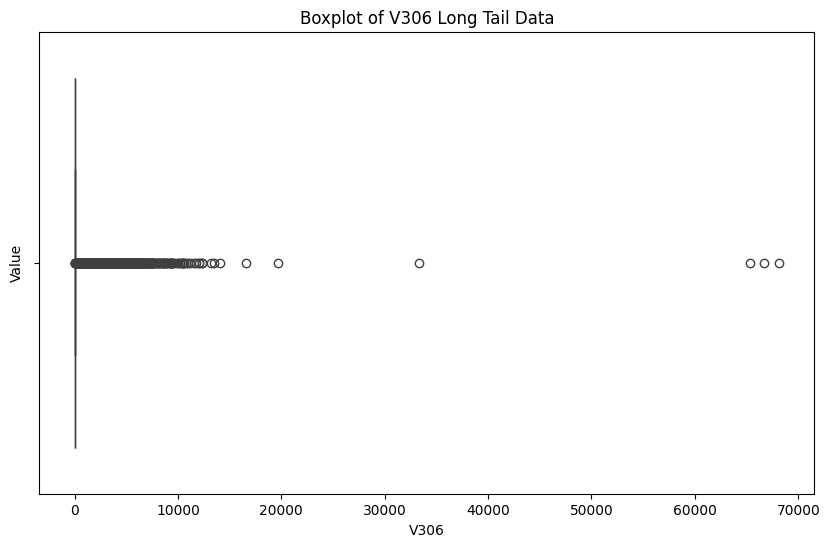

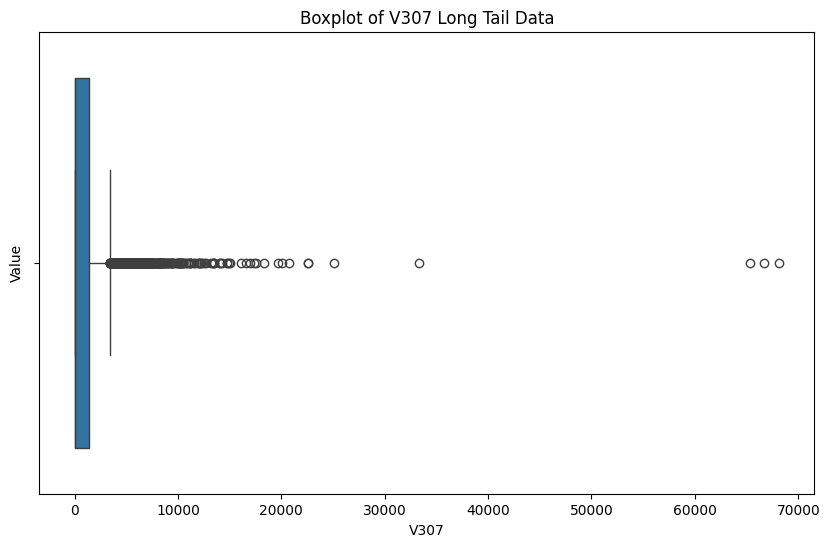

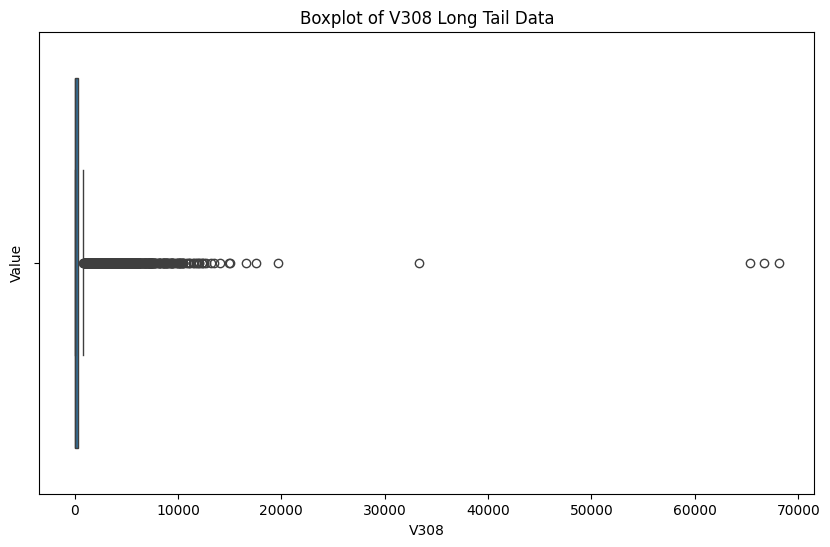

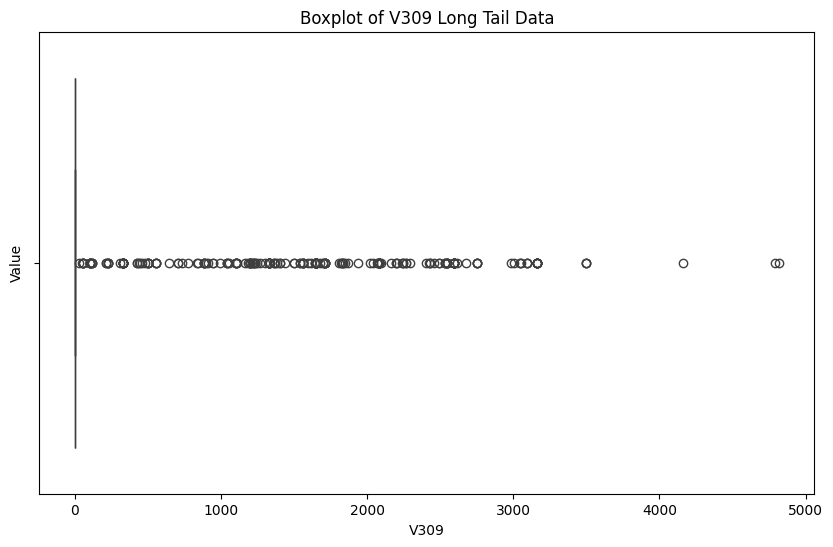

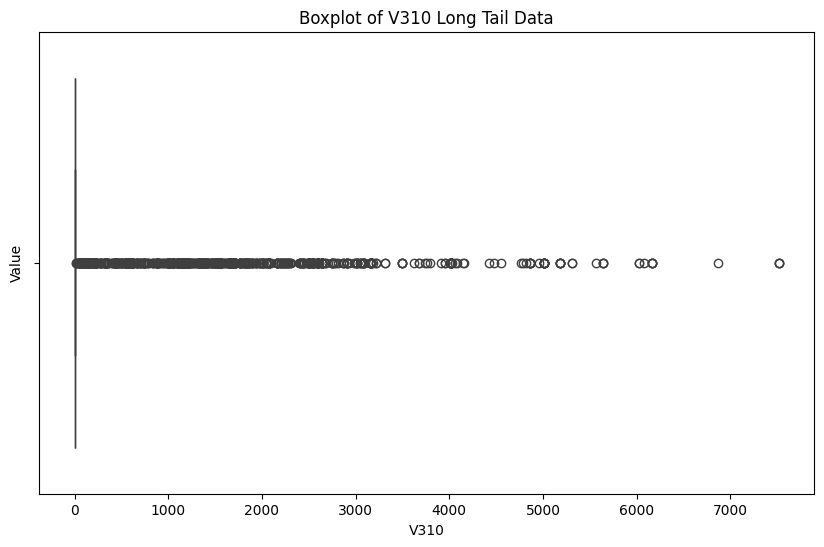

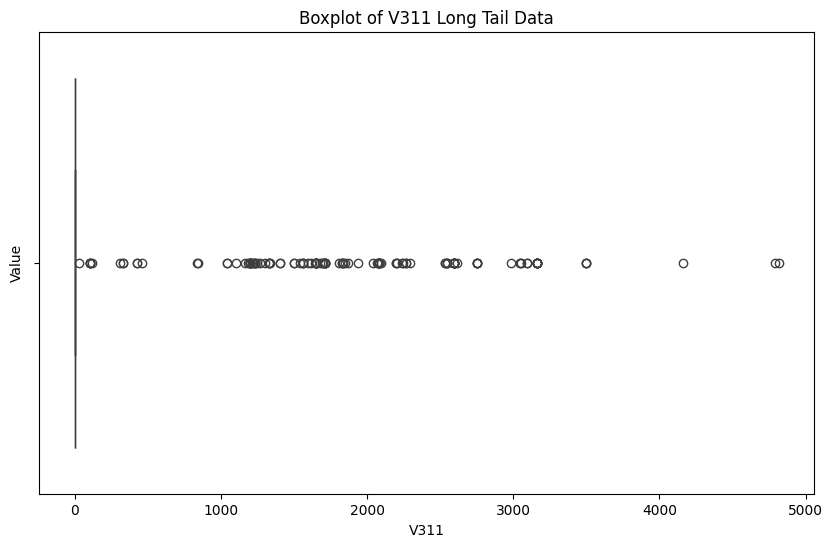

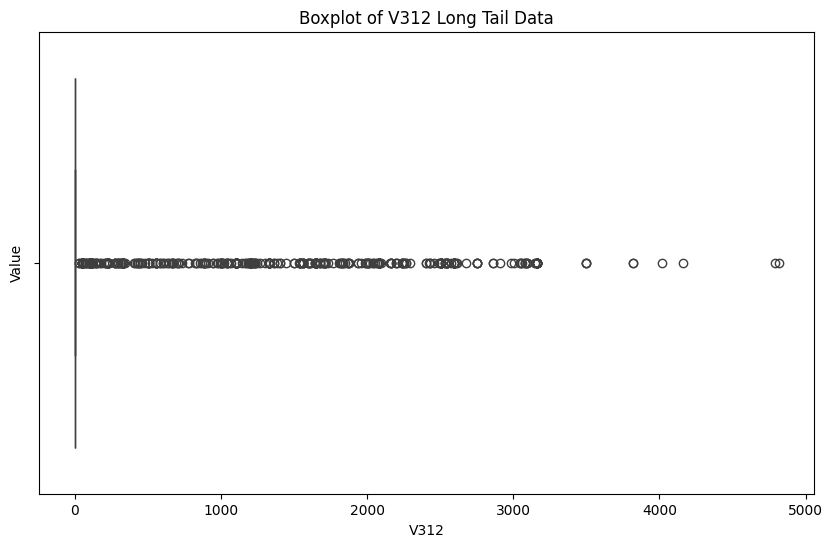

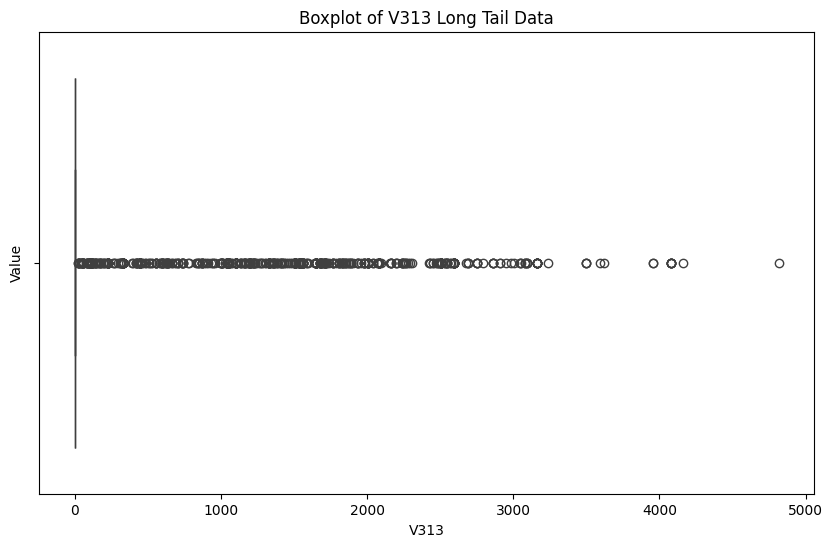

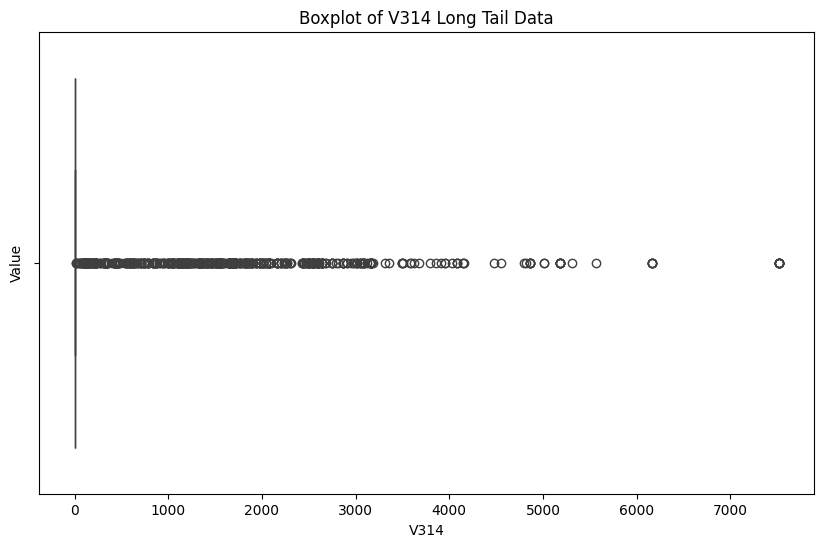

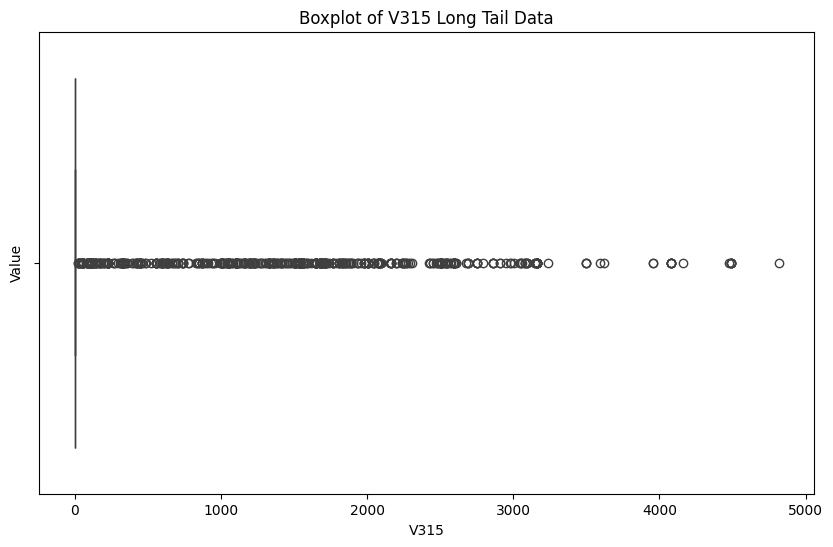

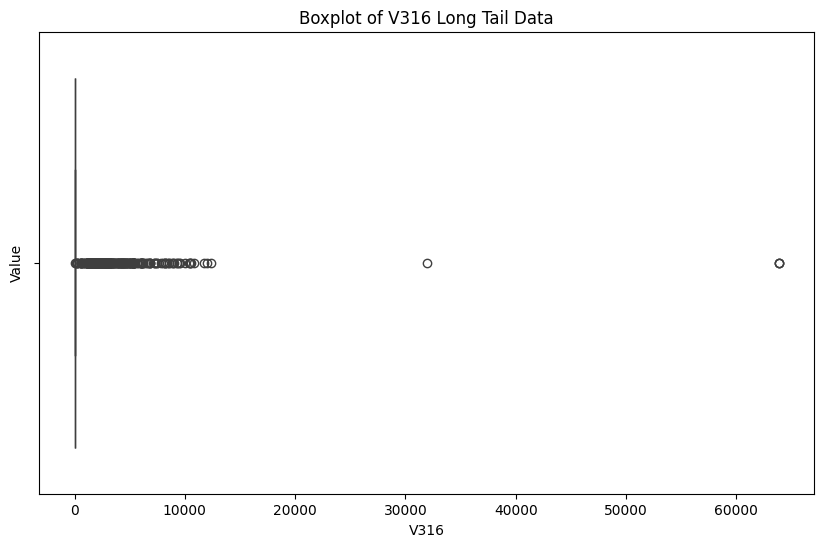

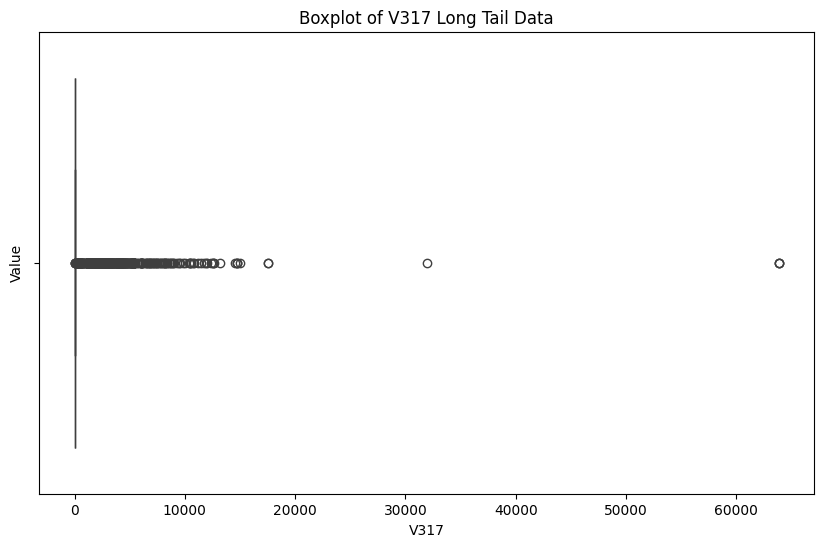

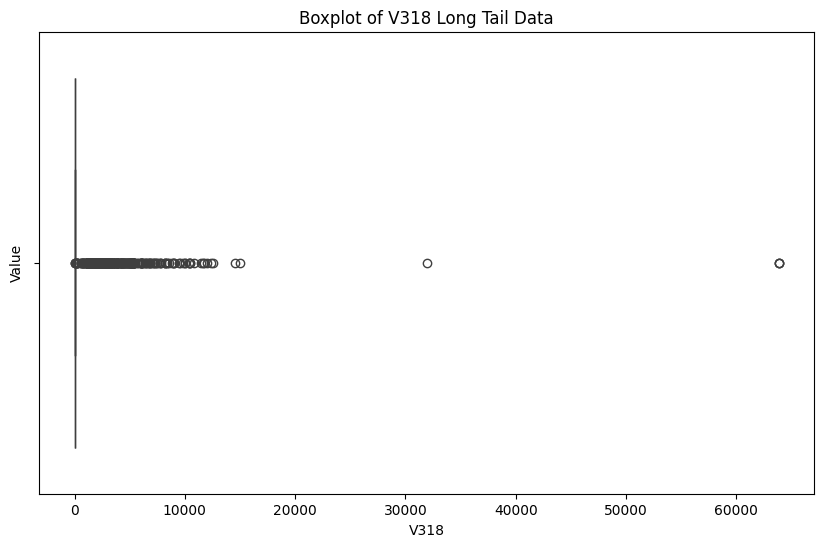

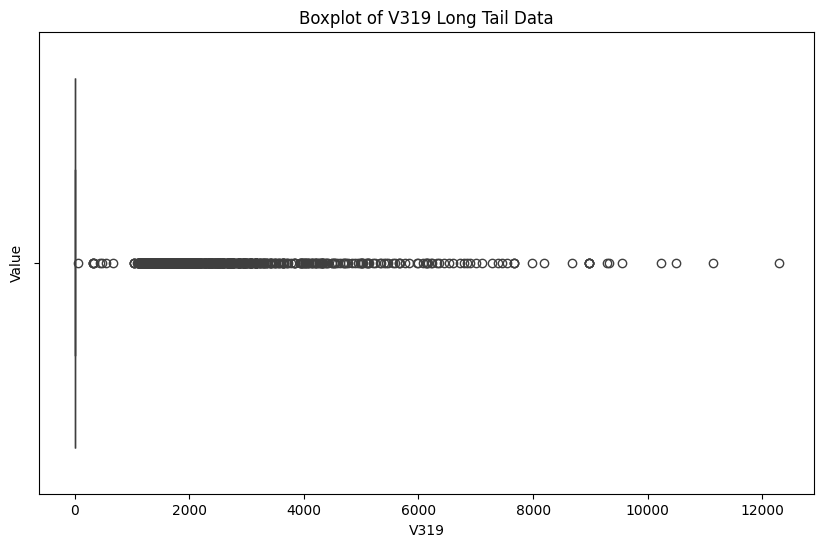

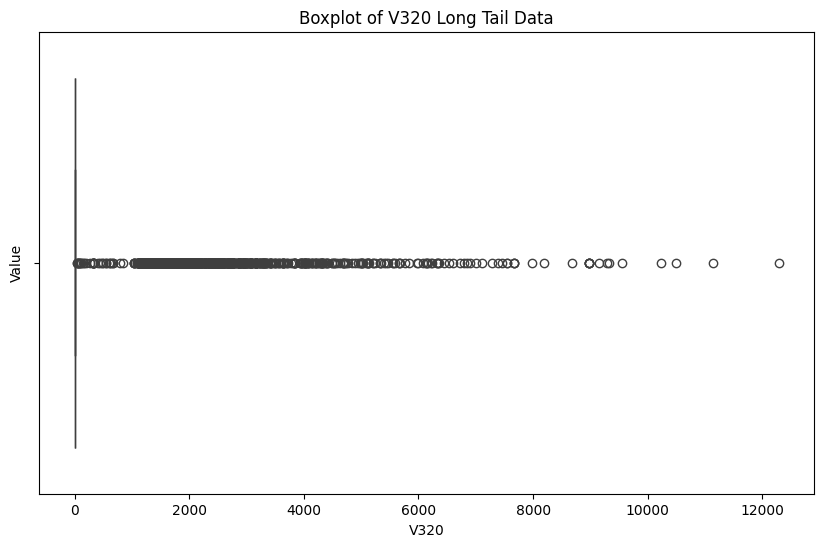

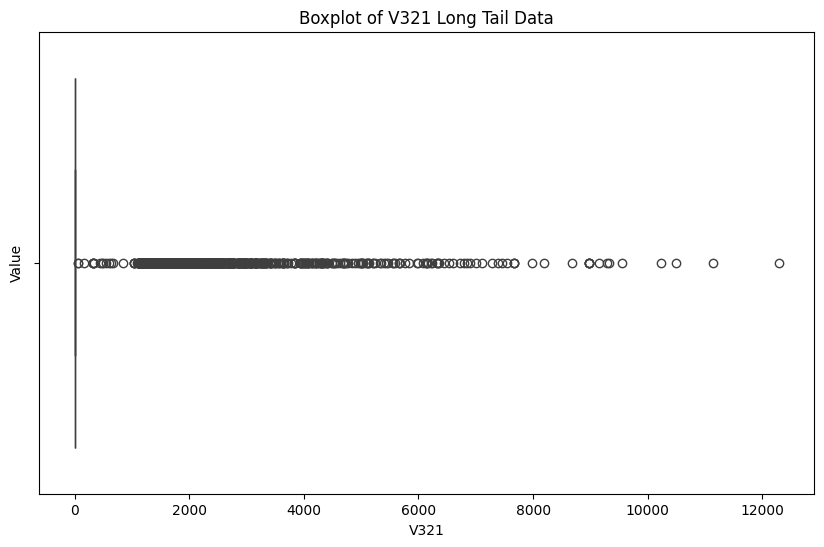

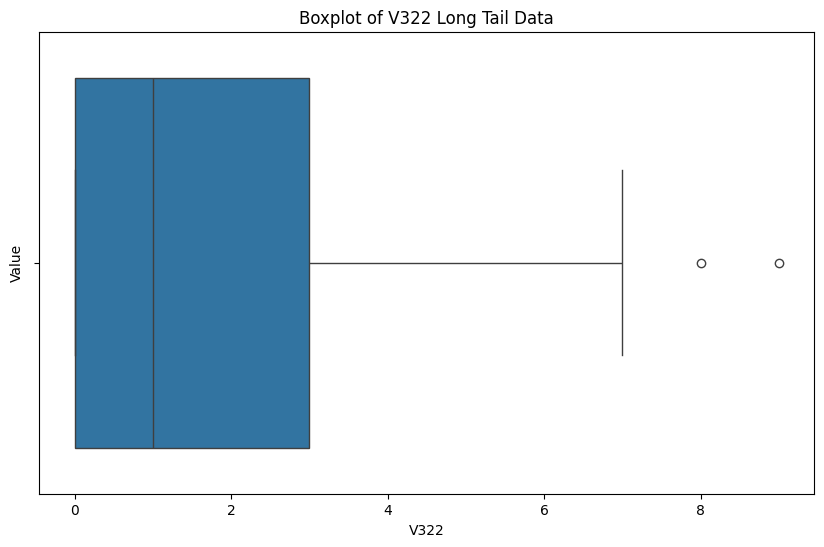

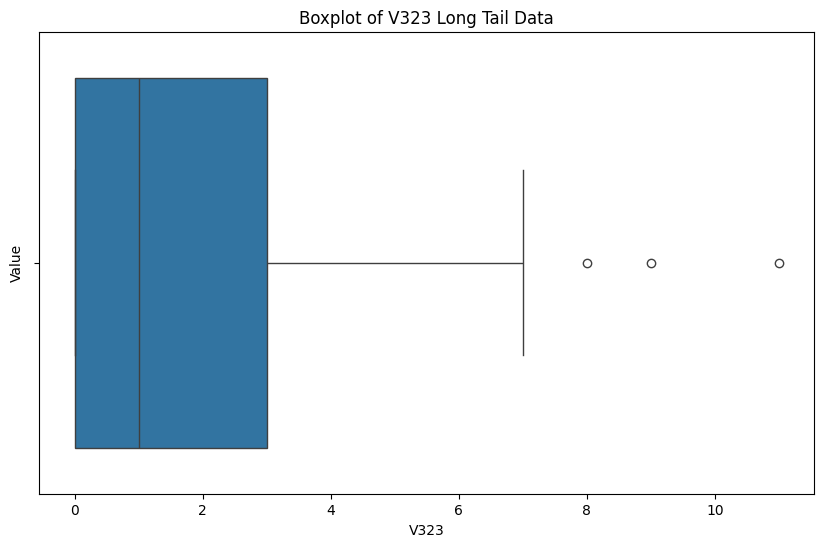

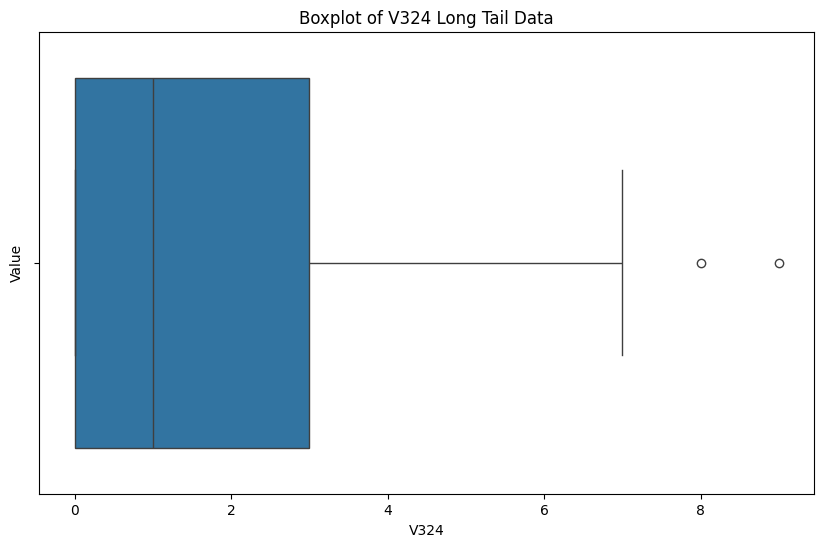

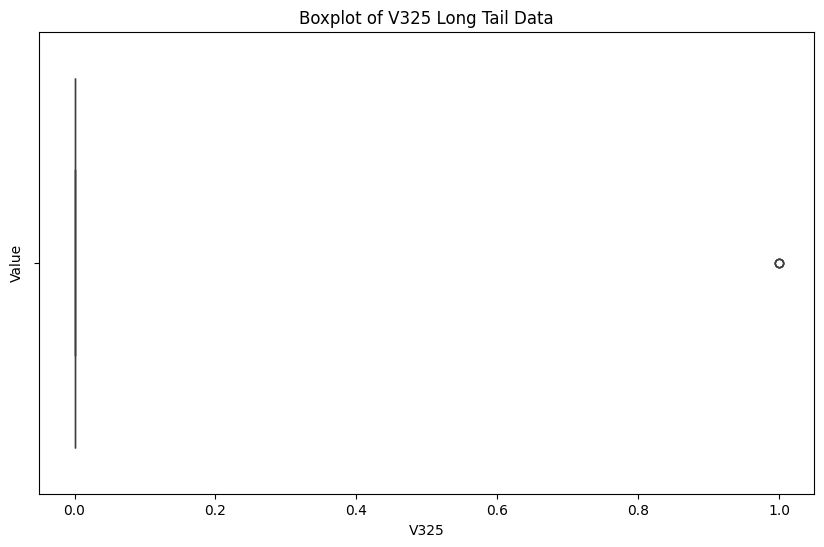

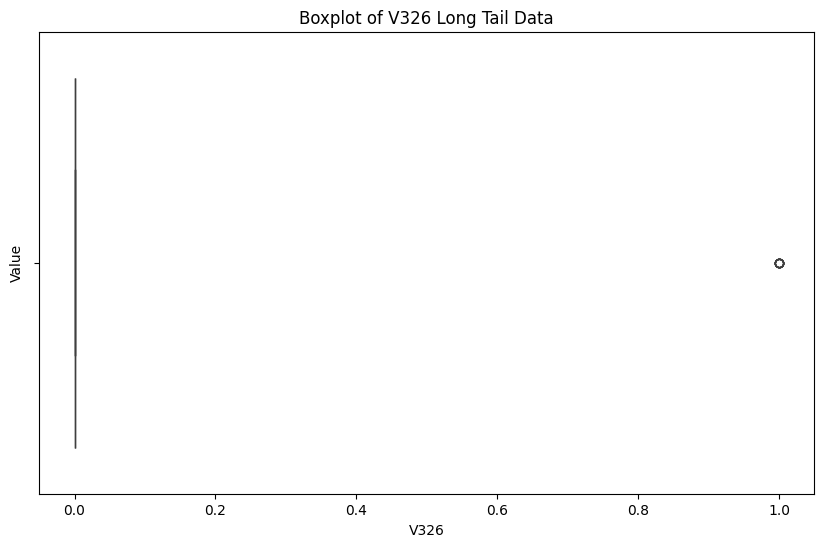

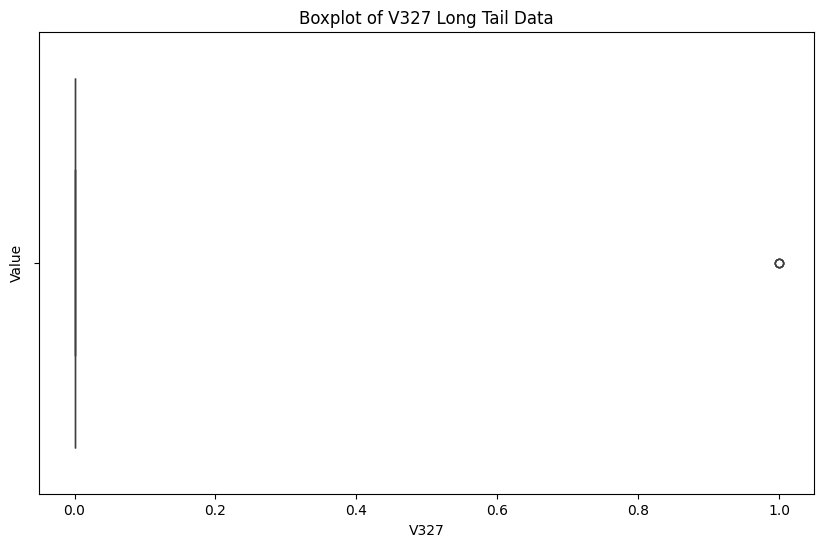

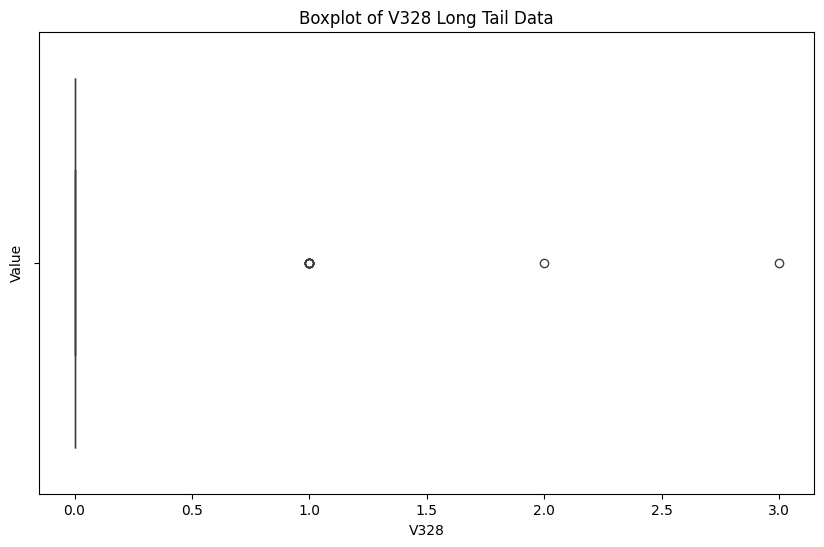

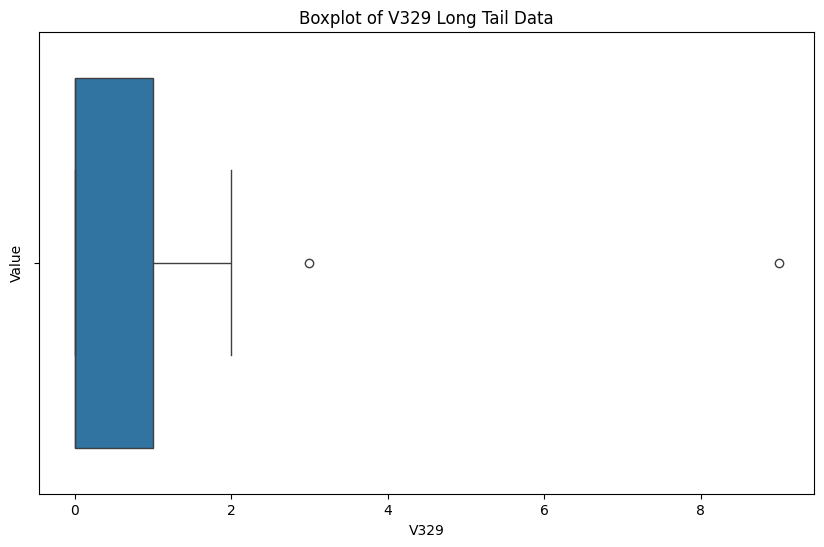

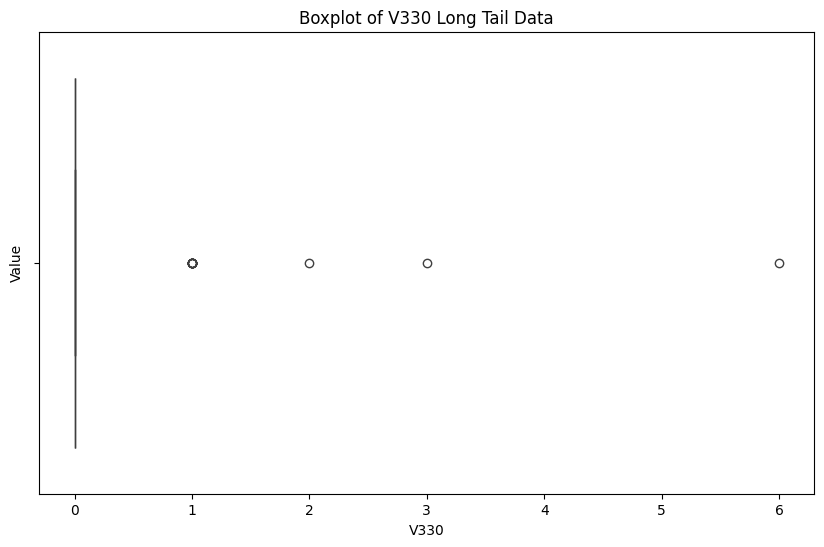

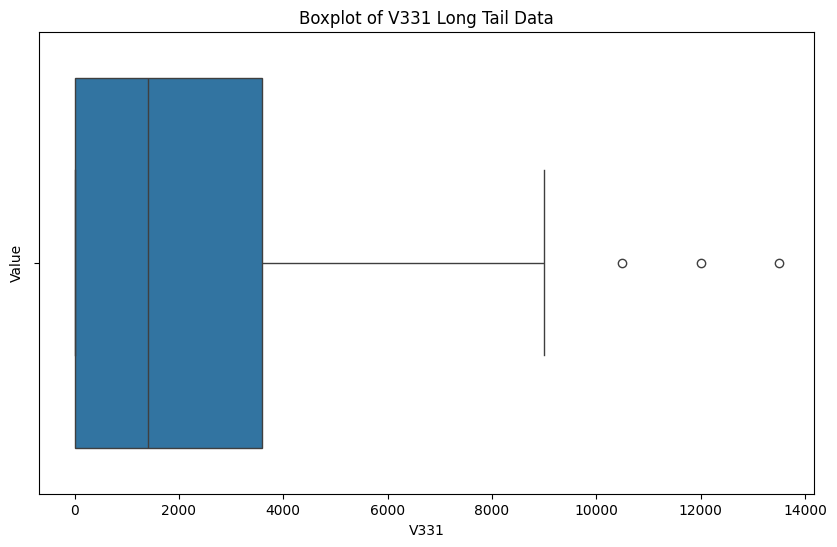

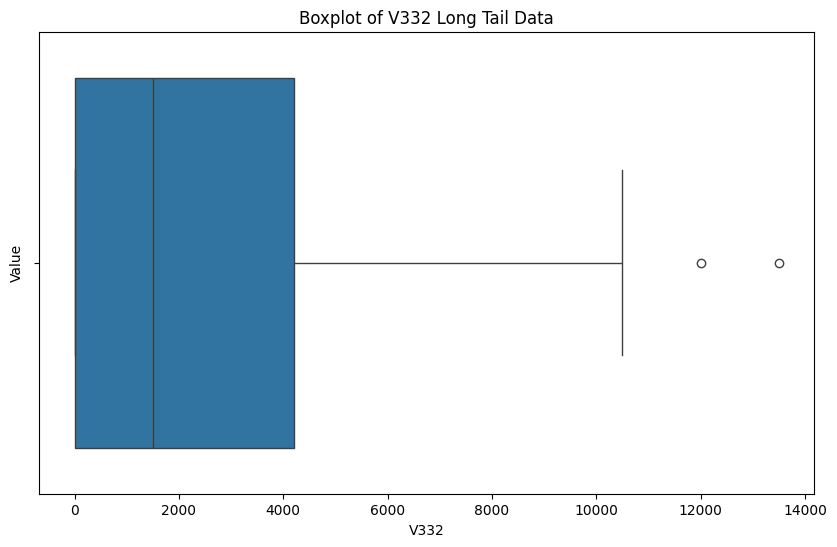

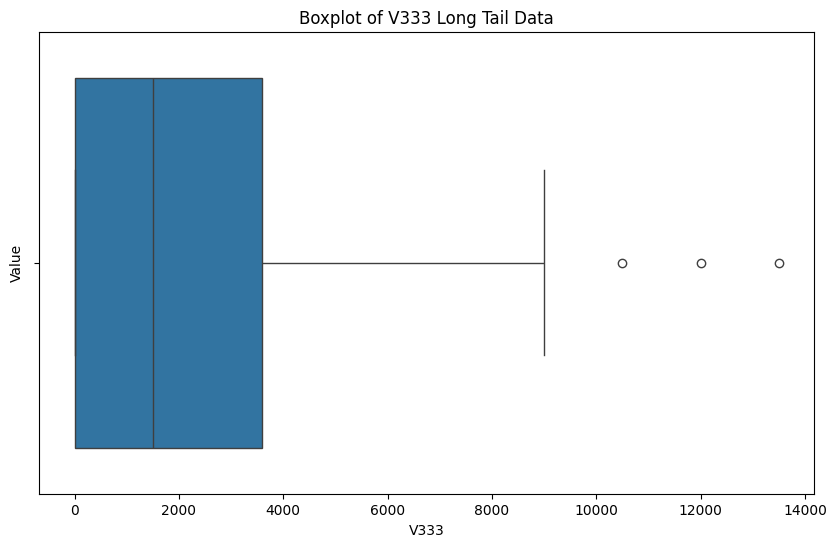

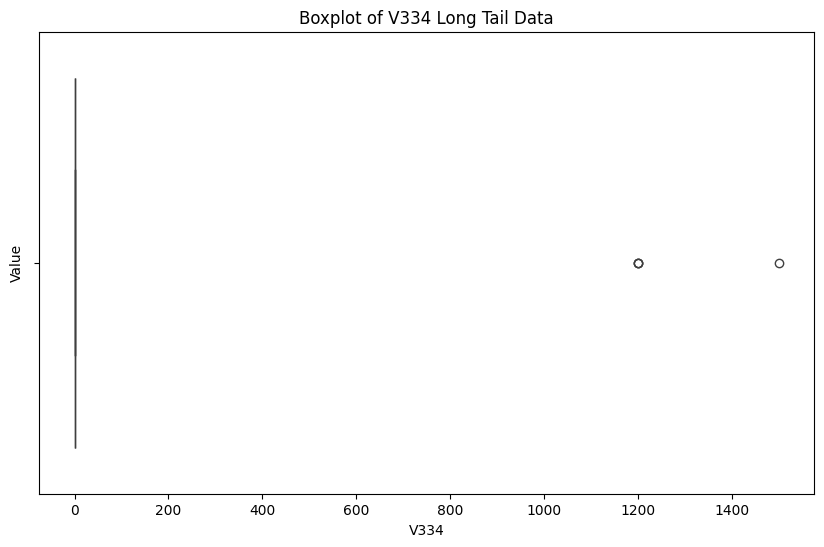

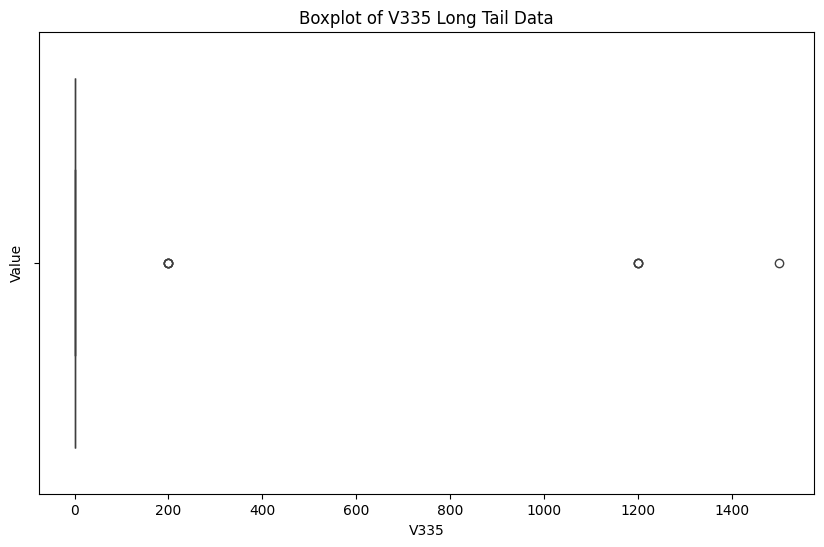

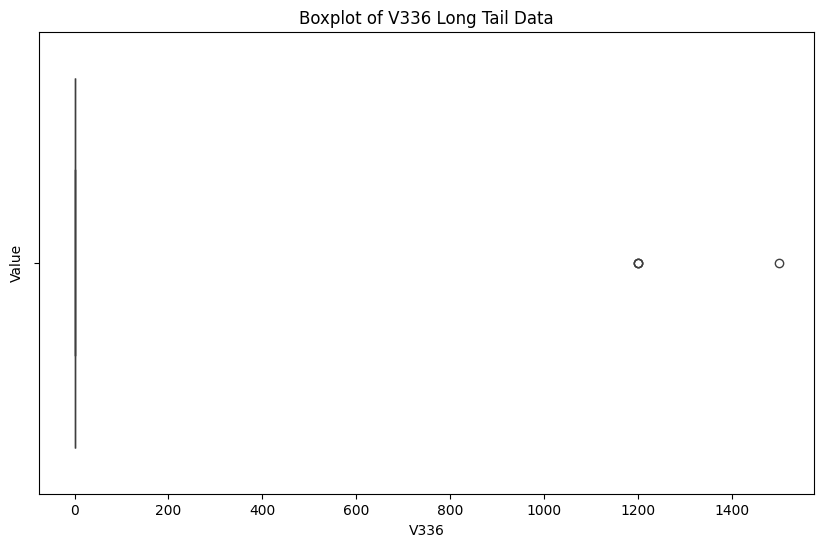

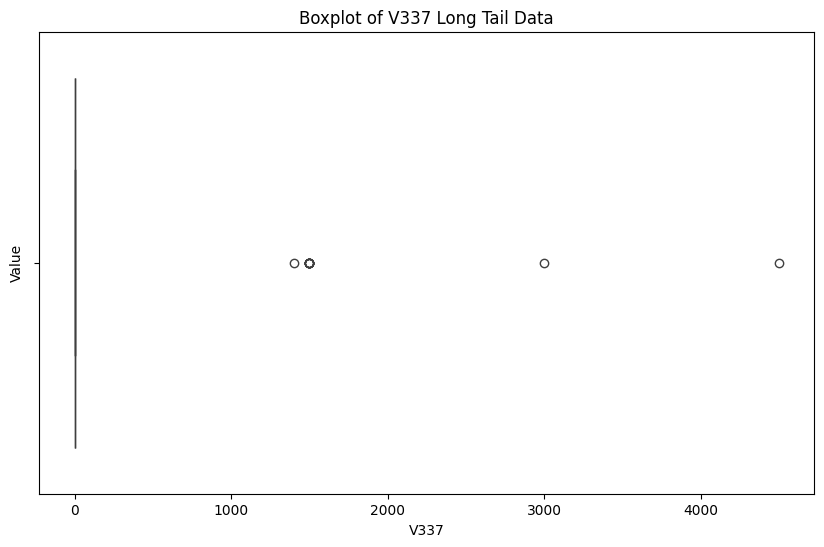

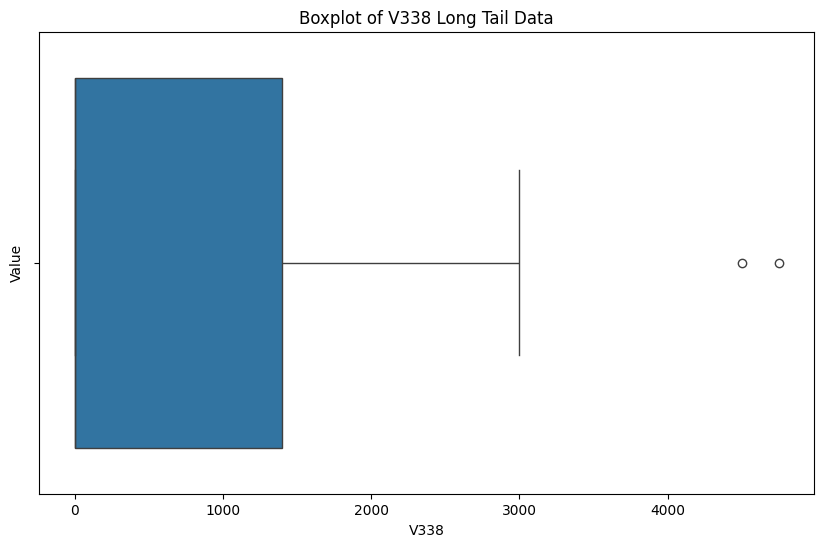

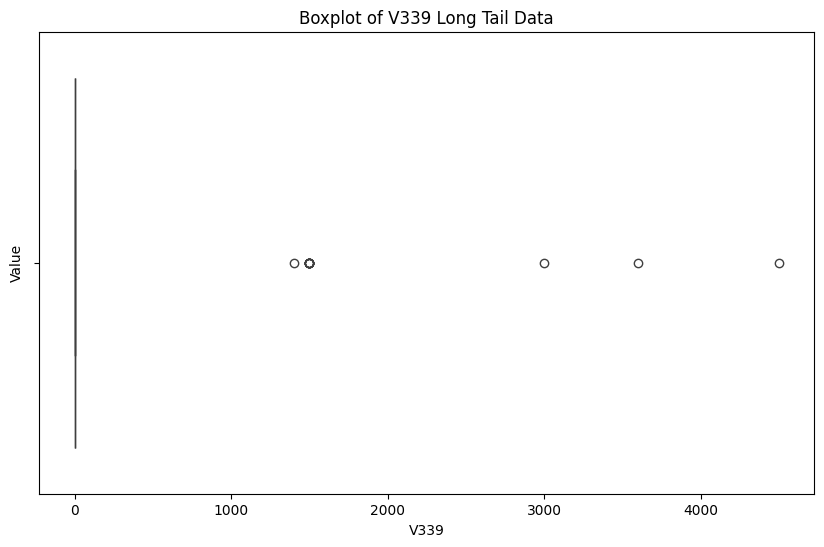

In [7]:
#Long Tail Analysis 
plt.hist(train_transaction['TransactionAmt'],bins=100,log=True)
plt.title('Log-Scaled Histogram of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency (log scale)')
plt.show()

long_tail_threshold = train_transaction['TransactionAmt'].quantile(0.99)
long_tail_data = train_transaction[train_transaction['TransactionAmt'] > long_tail_threshold]
long_tail_fraud_ratio = long_tail_data['isFraud'].mean()
print(f"Fraud Ratio in Long-Tail Transactions: {long_tail_fraud_ratio}")

numeric_cols = long_tail_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

for feature in numeric_cols:
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x=long_tail_data[feature].dropna())
    
    plt.title(f"Boxplot of {feature} Long Tail Data")
    plt.xlabel(feature)
    plt.ylabel("Value")
    plt.show()

In [8]:
# Create Isolation Forest and fit it based on the training data.

forest = IsolationForest(contamination=0.01)
forest.fit(train)

# Generate predictions based on the Isolation Forest

predictions = forest.predict(train)


NameError: name 'IsolationForest' is not defined